In [1]:
from trainer import *

/home/tsou/.conda/envs/pyg/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


=================[dataset is set to compas ]=================
[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
=================[run config is loaded]=================


In [2]:
test_run()

[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
tensor([1.3323], device='cuda:0')
epoch 0 -----------------------------------------
tensor([2.3315], device='cuda:0')
epoch 1 -----------------------------------------
tensor([0.6919], device='cuda:0')
epoch 2 -----------------------------------------
tensor([1.1602], device='cuda:0')
epoch 3 -----------------------------------------
tensor([1.1673], device='cuda:0')
epoch 4 -----------------------------------------
done


In [3]:
test_run()

[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
tensor([1.3323], device='cuda:0')
epoch 0 -----------------------------------------
tensor([2.3315], device='cuda:0')
epoch 1 -----------------------------------------
tensor([0.6919], device='cuda:0')
epoch 2 -----------------------------------------
tensor([1.1602], device='cuda:0')
epoch 3 -----------------------------------------
tensor([1.1673], device='cuda:0')
epoch 4 -----------------------------------------
done


In [4]:
extractor = get_feature_importance_extractor()
extractor.get()

tensor([ 0.3896, -0.3427,  0.6038, -1.2940,  0.5364, -0.1376,  0.4883,  1.2569,
        -0.5813, -0.6019, -0.3175], device='cuda:0', grad_fn=<DivBackward0>)

In [5]:
train_K_fold(get_run_config())

[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
=================[ 1 Fold ]=================
train_data: torch.Size([2979, 11])
train_label: torch.Size([2979])
validation_data: torch.Size([331, 11])
validation_label: torch.Size([331])
test_data: torch.Size([1656, 11])
test_label: torch.Size([1656])
-----------------------------------------


Epoch 1:  67%|██████▋   | 2/3 [00:00<00:00, 12.77it/s]/home/tsou/.conda/envs/pyg/lib/python3.10/site-packages/torcheval/metrics/functional/classification/auroc.py:175: UserWarning: cumsum_cuda_kernel does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:82.)
  return _binary_auroc_compute_jit(input, target, weight)
Epoch 1: 100%|██████████| 3/3 [00:00<00:00,  5.09it/s, loss=25, acc=0.528, AUC=0.546, val_acc=0.511, val_AUC=0.631]


tensor([ 0.3459, -0.0405,  0.4957, -1.0193,  0.3857, -0.3946,  0.4513,  0.8977,
        -0.4563, -0.3362, -0.3293], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 10.84it/s, loss=22.9, acc=0.582, AUC=0.606, val_acc=0.65, val_AUC=0.68]


tensor([ 0.1780,  0.4733,  0.1838, -0.2377,  0.0913, -0.9807,  0.3080,  0.0272,
        -0.1621,  0.3452, -0.2262], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 15.06it/s, loss=21.6, acc=0.604, AUC=0.657, val_acc=0.589, val_AUC=0.653]


tensor([ 0.1624,  0.4693,  0.1509, -0.1991,  0.1104, -0.9565,  0.2854,  0.0074,
        -0.1511,  0.3459, -0.2251], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 14.85it/s, loss=21.5, acc=0.626, AUC=0.667, val_acc=0.616, val_AUC=0.669]


tensor([ 0.1632,  0.5013,  0.1332, -0.1767,  0.1609, -0.9898,  0.2542, -0.0061,
        -0.1599,  0.3494, -0.2296], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 14.71it/s, loss=21, acc=0.64, AUC=0.692, val_acc=0.625, val_AUC=0.674]


tensor([ 0.1637,  0.4940,  0.1129, -0.1726,  0.1776, -1.0000,  0.2740,  0.0045,
        -0.1725,  0.3466, -0.2281], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 6: 100%|██████████| 3/3 [00:00<00:00, 14.64it/s, loss=20.9, acc=0.649, AUC=0.696, val_acc=0.613, val_AUC=0.681]


tensor([ 0.1568,  0.4857,  0.1035, -0.1610,  0.2238, -1.0339,  0.2958,  0.0020,
        -0.2044,  0.3829, -0.2511], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 7: 100%|██████████| 3/3 [00:00<00:00, 14.48it/s, loss=21, acc=0.634, AUC=0.691, val_acc=0.656, val_AUC=0.694]


tensor([ 0.1441,  0.4667,  0.0954, -0.1867,  0.2513, -1.0369,  0.3162,  0.0137,
        -0.2327,  0.4164, -0.2474], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 8: 100%|██████████| 3/3 [00:00<00:00, 14.50it/s, loss=20.8, acc=0.647, AUC=0.696, val_acc=0.637, val_AUC=0.693]


tensor([ 0.1350,  0.4910,  0.0738, -0.1624,  0.2300, -1.0359,  0.3243,  0.0229,
        -0.2226,  0.4139, -0.2700], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 9: 100%|██████████| 3/3 [00:00<00:00, 14.46it/s, loss=20.8, acc=0.641, AUC=0.699, val_acc=0.644, val_AUC=0.696]


tensor([ 0.1652,  0.4959,  0.0648, -0.1644,  0.2523, -1.0242,  0.3008, -0.0102,
        -0.2227,  0.4105, -0.2679], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 10: 100%|██████████| 3/3 [00:00<00:00, 14.45it/s, loss=21, acc=0.636, AUC=0.689, val_acc=0.665, val_AUC=0.723]


tensor([ 0.1462,  0.4718,  0.0540, -0.1246,  0.2510, -1.0096,  0.2903, -0.0225,
        -0.1833,  0.4264, -0.2996], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 11: 100%|██████████| 3/3 [00:00<00:00, 14.38it/s, loss=20.8, acc=0.649, AUC=0.698, val_acc=0.668, val_AUC=0.693]


tensor([ 0.1851,  0.4321,  0.0051, -0.1260,  0.2561, -0.9896,  0.3118, -0.0189,
        -0.1672,  0.4659, -0.3545], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 12: 100%|██████████| 3/3 [00:00<00:00, 11.58it/s, loss=20.6, acc=0.66, AUC=0.708, val_acc=0.65, val_AUC=0.68]


tensor([ 0.1616,  0.4704,  0.0081, -0.1534,  0.2833, -0.9676,  0.3192, -0.0257,
        -0.2173,  0.4514, -0.3298], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 13: 100%|██████████| 3/3 [00:00<00:00, 14.23it/s, loss=20.6, acc=0.653, AUC=0.71, val_acc=0.647, val_AUC=0.718]


tensor([ 0.1830,  0.4640, -0.0030, -0.1268,  0.2879, -0.9674,  0.2997, -0.0410,
        -0.1732,  0.4230, -0.3461], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 14: 100%|██████████| 3/3 [00:00<00:00, 13.72it/s, loss=20.4, acc=0.662, AUC=0.716, val_acc=0.665, val_AUC=0.717]


tensor([ 0.1584,  0.4936,  0.0050, -0.1326,  0.3027, -0.9457,  0.2681, -0.0271,
        -0.1993,  0.3984, -0.3216], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 15: 100%|██████████| 3/3 [00:00<00:00, 14.16it/s, loss=20.7, acc=0.648, AUC=0.704, val_acc=0.637, val_AUC=0.715]


tensor([ 0.1673,  0.4813,  0.0089, -0.1254,  0.3036, -0.9638,  0.2376, -0.0307,
        -0.1821,  0.4130, -0.3098], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 16: 100%|██████████| 3/3 [00:00<00:00, 14.10it/s, loss=20.6, acc=0.66, AUC=0.71, val_acc=0.628, val_AUC=0.694]


tensor([ 1.7313e-01,  4.8721e-01, -5.9824e-04, -9.6131e-02,  3.2380e-01,
        -9.4441e-01,  2.4519e-01, -3.9419e-02, -1.9951e-01,  3.9204e-01,
        -3.4130e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 17: 100%|██████████| 3/3 [00:00<00:00, 14.01it/s, loss=20.4, acc=0.657, AUC=0.715, val_acc=0.692, val_AUC=0.704]


tensor([ 0.1822,  0.5018,  0.0053, -0.1238,  0.2903, -0.9519,  0.2570, -0.0271,
        -0.1821,  0.4094, -0.3612], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 18: 100%|██████████| 3/3 [00:00<00:00, 14.04it/s, loss=20.4, acc=0.669, AUC=0.717, val_acc=0.662, val_AUC=0.707]


tensor([ 0.1850,  0.4706, -0.0208, -0.1154,  0.2805, -0.9417,  0.2630, -0.0405,
        -0.1484,  0.4037, -0.3360], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 19: 100%|██████████| 3/3 [00:00<00:00, 14.16it/s, loss=20.6, acc=0.655, AUC=0.708, val_acc=0.65, val_AUC=0.698]


tensor([ 0.1741,  0.4622, -0.0030, -0.0965,  0.3139, -0.9432,  0.2559, -0.0534,
        -0.1772,  0.4283, -0.3610], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 20: 100%|██████████| 3/3 [00:00<00:00, 14.10it/s, loss=20.4, acc=0.659, AUC=0.716, val_acc=0.644, val_AUC=0.709]


tensor([ 0.1978,  0.4665,  0.0196, -0.0995,  0.2923, -0.9471,  0.2831, -0.0599,
        -0.1911,  0.4210, -0.3827], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 21: 100%|██████████| 3/3 [00:00<00:00, 14.09it/s, loss=20.3, acc=0.665, AUC=0.72, val_acc=0.628, val_AUC=0.709]


tensor([ 0.2038,  0.4421, -0.0082, -0.1217,  0.2879, -0.9386,  0.3183, -0.0233,
        -0.2209,  0.4291, -0.3686], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 22: 100%|██████████| 3/3 [00:00<00:00, 13.99it/s, loss=20.4, acc=0.651, AUC=0.717, val_acc=0.619, val_AUC=0.69]


tensor([ 0.1992,  0.4649, -0.0380, -0.1006,  0.3147, -0.9397,  0.2980, -0.0229,
        -0.2380,  0.4221, -0.3597], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 23: 100%|██████████| 3/3 [00:00<00:00, 14.00it/s, loss=20.4, acc=0.658, AUC=0.717, val_acc=0.622, val_AUC=0.698]


tensor([ 0.2206,  0.4333, -0.0471, -0.0808,  0.3006, -0.9531,  0.2818, -0.0022,
        -0.1954,  0.4080, -0.3659], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 24: 100%|██████████| 3/3 [00:00<00:00, 14.05it/s, loss=20.5, acc=0.663, AUC=0.713, val_acc=0.677, val_AUC=0.727]


tensor([ 0.2045,  0.4465, -0.0370, -0.1041,  0.3101, -0.8943,  0.2672, -0.0226,
        -0.2208,  0.4248, -0.3742], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 25: 100%|██████████| 3/3 [00:00<00:00, 13.90it/s, loss=20.2, acc=0.67, AUC=0.722, val_acc=0.674, val_AUC=0.731]


tensor([ 0.2137,  0.4373, -0.0498, -0.1110,  0.3223, -0.8895,  0.2865, -0.0215,
        -0.2227,  0.3979, -0.3633], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 26: 100%|██████████| 3/3 [00:00<00:00, 13.93it/s, loss=20.2, acc=0.669, AUC=0.722, val_acc=0.64, val_AUC=0.71]


tensor([ 0.2091,  0.4511, -0.0624, -0.1040,  0.3294, -0.8641,  0.2732, -0.0229,
        -0.2095,  0.3995, -0.3993], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 27: 100%|██████████| 3/3 [00:00<00:00, 13.99it/s, loss=20.2, acc=0.669, AUC=0.722, val_acc=0.656, val_AUC=0.729]


tensor([ 0.2258,  0.4423, -0.0549, -0.1125,  0.3469, -0.8863,  0.2702, -0.0311,
        -0.2219,  0.3949, -0.3734], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 28: 100%|██████████| 3/3 [00:00<00:00, 13.80it/s, loss=20.2, acc=0.671, AUC=0.726, val_acc=0.653, val_AUC=0.712]


tensor([ 0.2343,  0.4243, -0.0552, -0.1255,  0.3391, -0.8583,  0.2729, -0.0330,
        -0.2067,  0.4106, -0.4026], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 29: 100%|██████████| 3/3 [00:00<00:00, 13.72it/s, loss=20.3, acc=0.66, AUC=0.722, val_acc=0.668, val_AUC=0.703]


tensor([ 0.2514,  0.4154, -0.0728, -0.1287,  0.3534, -0.8462,  0.2746, -0.0476,
        -0.2339,  0.4082, -0.3740], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 30: 100%|██████████| 3/3 [00:00<00:00, 13.90it/s, loss=20.3, acc=0.658, AUC=0.718, val_acc=0.631, val_AUC=0.719]


tensor([ 0.2363,  0.4285, -0.0994, -0.1297,  0.3593, -0.8504,  0.2851, -0.0145,
        -0.2332,  0.3905, -0.3723], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 31: 100%|██████████| 3/3 [00:00<00:00, 13.53it/s, loss=20.3, acc=0.67, AUC=0.723, val_acc=0.634, val_AUC=0.704]


tensor([ 0.2752,  0.4451, -0.1229, -0.1390,  0.3626, -0.8439,  0.3008, -0.0470,
        -0.2454,  0.3951, -0.3806], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 32: 100%|██████████| 3/3 [00:00<00:00, 13.68it/s, loss=20.4, acc=0.662, AUC=0.716, val_acc=0.671, val_AUC=0.729]


tensor([ 0.2754,  0.4383, -0.1011, -0.1481,  0.3529, -0.8527,  0.2903, -0.0362,
        -0.2517,  0.3971, -0.3642], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 33: 100%|██████████| 3/3 [00:00<00:00, 13.72it/s, loss=20.4, acc=0.658, AUC=0.717, val_acc=0.653, val_AUC=0.736]


tensor([ 0.2821,  0.4163, -0.1037, -0.1535,  0.3434, -0.8331,  0.3011, -0.0277,
        -0.2217,  0.3751, -0.3784], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 34: 100%|██████████| 3/3 [00:00<00:00, 13.62it/s, loss=20.1, acc=0.665, AUC=0.727, val_acc=0.637, val_AUC=0.717]


tensor([ 0.2990,  0.4344, -0.1250, -0.1686,  0.3591, -0.8330,  0.2934, -0.0314,
        -0.2133,  0.3742, -0.3889], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 35: 100%|██████████| 3/3 [00:00<00:00, 13.53it/s, loss=20.2, acc=0.672, AUC=0.724, val_acc=0.683, val_AUC=0.731]


tensor([ 0.2775,  0.4273, -0.1223, -0.1599,  0.3614, -0.8241,  0.2763, -0.0227,
        -0.2191,  0.3837, -0.3781], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 36: 100%|██████████| 3/3 [00:00<00:00, 13.63it/s, loss=20, acc=0.674, AUC=0.73, val_acc=0.677, val_AUC=0.711]


tensor([ 0.2726,  0.4104, -0.1329, -0.1476,  0.3543, -0.8057,  0.2841, -0.0082,
        -0.2222,  0.3664, -0.3713], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 37: 100%|██████████| 3/3 [00:00<00:00, 13.48it/s, loss=20.2, acc=0.672, AUC=0.724, val_acc=0.662, val_AUC=0.729]


tensor([ 0.3073,  0.4168, -0.1460, -0.1742,  0.3572, -0.7651,  0.2504, -0.0273,
        -0.2089,  0.3642, -0.3745], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 38: 100%|██████████| 3/3 [00:00<00:00, 13.54it/s, loss=20.2, acc=0.675, AUC=0.727, val_acc=0.674, val_AUC=0.726]


tensor([ 0.3278,  0.4114, -0.1697, -0.1652,  0.3512, -0.7666,  0.2527, -0.0269,
        -0.2193,  0.3638, -0.3592], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 39: 100%|██████████| 3/3 [00:00<00:00, 13.54it/s, loss=20.1, acc=0.675, AUC=0.728, val_acc=0.662, val_AUC=0.73]


tensor([ 0.3426,  0.4129, -0.1645, -0.1612,  0.3492, -0.7429,  0.2581, -0.0448,
        -0.2085,  0.3490, -0.3898], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 40: 100%|██████████| 3/3 [00:00<00:00, 13.62it/s, loss=20.1, acc=0.663, AUC=0.729, val_acc=0.656, val_AUC=0.713]


tensor([ 0.3237,  0.4245, -0.1686, -0.1364,  0.3585, -0.7767,  0.2471, -0.0280,
        -0.2114,  0.3492, -0.3821], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 41: 100%|██████████| 3/3 [00:00<00:00, 13.48it/s, loss=20.1, acc=0.679, AUC=0.73, val_acc=0.668, val_AUC=0.718]


tensor([ 0.3479,  0.3966, -0.1756, -0.1628,  0.3534, -0.7889,  0.2674, -0.0020,
        -0.1981,  0.3424, -0.3804], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 42: 100%|██████████| 3/3 [00:00<00:00, 13.53it/s, loss=20.3, acc=0.668, AUC=0.719, val_acc=0.656, val_AUC=0.721]


tensor([ 0.3415,  0.3827, -0.1707, -0.1489,  0.3713, -0.7881,  0.2593,  0.0018,
        -0.2211,  0.3508, -0.3787], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 43: 100%|██████████| 3/3 [00:00<00:00, 13.44it/s, loss=20.3, acc=0.665, AUC=0.722, val_acc=0.656, val_AUC=0.721]


tensor([ 0.3466,  0.4039, -0.1597, -0.1533,  0.3738, -0.7898,  0.2666, -0.0031,
        -0.2250,  0.3485, -0.4086], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 44: 100%|██████████| 3/3 [00:00<00:00, 13.39it/s, loss=20, acc=0.678, AUC=0.732, val_acc=0.692, val_AUC=0.736]


tensor([ 0.3333,  0.4022, -0.1535, -0.1647,  0.3610, -0.7565,  0.2782, -0.0195,
        -0.2254,  0.3527, -0.4079], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 45: 100%|██████████| 3/3 [00:00<00:00, 13.38it/s, loss=20.1, acc=0.672, AUC=0.729, val_acc=0.662, val_AUC=0.709]


tensor([ 0.3378,  0.3999, -0.1548, -0.1704,  0.3778, -0.7542,  0.2674, -0.0185,
        -0.2397,  0.3491, -0.3945], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 46: 100%|██████████| 3/3 [00:00<00:00, 13.32it/s, loss=20, acc=0.675, AUC=0.729, val_acc=0.674, val_AUC=0.734]


tensor([ 0.3405,  0.4051, -0.1482, -0.1861,  0.3642, -0.7366,  0.2687, -0.0056,
        -0.2256,  0.3280, -0.4043], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 47: 100%|██████████| 3/3 [00:00<00:00, 13.44it/s, loss=20.2, acc=0.673, AUC=0.725, val_acc=0.662, val_AUC=0.721]


tensor([ 0.3527,  0.3736, -0.1561, -0.1913,  0.3467, -0.7206,  0.2644,  0.0023,
        -0.2354,  0.3536, -0.3900], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 48: 100%|██████████| 3/3 [00:00<00:00, 13.36it/s, loss=20.2, acc=0.664, AUC=0.723, val_acc=0.659, val_AUC=0.724]


tensor([ 0.3447,  0.3897, -0.1610, -0.1794,  0.3632, -0.7532,  0.2441,  0.0008,
        -0.2178,  0.3461, -0.3772], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 49: 100%|██████████| 3/3 [00:00<00:00, 13.26it/s, loss=20.2, acc=0.672, AUC=0.723, val_acc=0.665, val_AUC=0.712]


tensor([ 0.3465,  0.3822, -0.1637, -0.1849,  0.3646, -0.7287,  0.2565,  0.0243,
        -0.2452,  0.3418, -0.3933], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 50: 100%|██████████| 3/3 [00:00<00:00, 13.47it/s, loss=20, acc=0.67, AUC=0.731, val_acc=0.656, val_AUC=0.735]


tensor([ 0.3578,  0.3850, -0.1884, -0.1841,  0.3643, -0.7480,  0.2642,  0.0287,
        -0.2311,  0.3589, -0.4072], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 51: 100%|██████████| 3/3 [00:00<00:00, 13.10it/s, loss=20.2, acc=0.677, AUC=0.726, val_acc=0.653, val_AUC=0.719]


tensor([ 0.3703,  0.3738, -0.1779, -0.2045,  0.3671, -0.7447,  0.2500,  0.0528,
        -0.2316,  0.3473, -0.4024], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 52: 100%|██████████| 3/3 [00:00<00:00, 13.26it/s, loss=20.1, acc=0.677, AUC=0.729, val_acc=0.659, val_AUC=0.723]


tensor([ 0.3604,  0.3703, -0.1677, -0.1937,  0.3585, -0.7586,  0.2313,  0.0674,
        -0.2412,  0.3617, -0.3885], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 53: 100%|██████████| 3/3 [00:00<00:00, 13.41it/s, loss=20.2, acc=0.659, AUC=0.723, val_acc=0.659, val_AUC=0.732]


tensor([ 0.3611,  0.3508, -0.1643, -0.1832,  0.3506, -0.7393,  0.2052,  0.0659,
        -0.2153,  0.3562, -0.3878], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 54: 100%|██████████| 3/3 [00:00<00:00, 13.22it/s, loss=20.1, acc=0.667, AUC=0.726, val_acc=0.665, val_AUC=0.719]


tensor([ 0.3448,  0.3830, -0.1868, -0.2165,  0.3648, -0.7676,  0.2249,  0.0665,
        -0.2091,  0.3794, -0.3835], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 55: 100%|██████████| 3/3 [00:00<00:00, 13.24it/s, loss=20, acc=0.668, AUC=0.729, val_acc=0.659, val_AUC=0.709]


tensor([ 0.3741,  0.3852, -0.1857, -0.2321,  0.3535, -0.7334,  0.2227,  0.0725,
        -0.2179,  0.3548, -0.3937], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 56: 100%|██████████| 3/3 [00:00<00:00, 13.17it/s, loss=20, acc=0.677, AUC=0.73, val_acc=0.665, val_AUC=0.725]


tensor([ 0.3880,  0.3689, -0.1776, -0.2411,  0.3790, -0.7621,  0.1882,  0.0802,
        -0.2115,  0.3780, -0.3901], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 57: 100%|██████████| 3/3 [00:00<00:00, 13.21it/s, loss=20.2, acc=0.675, AUC=0.723, val_acc=0.671, val_AUC=0.712]


tensor([ 0.4062,  0.3639, -0.2056, -0.2460,  0.3688, -0.7563,  0.2289,  0.0726,
        -0.1893,  0.3523, -0.3955], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 58: 100%|██████████| 3/3 [00:00<00:00, 13.08it/s, loss=20.1, acc=0.668, AUC=0.726, val_acc=0.659, val_AUC=0.726]


tensor([ 0.3954,  0.3883, -0.1842, -0.2599,  0.3682, -0.7466,  0.1956,  0.0694,
        -0.2017,  0.3741, -0.3986], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 59: 100%|██████████| 3/3 [00:00<00:00, 13.12it/s, loss=20.2, acc=0.667, AUC=0.724, val_acc=0.662, val_AUC=0.722]


tensor([ 0.4086,  0.3726, -0.1955, -0.2392,  0.3628, -0.7298,  0.1977,  0.0719,
        -0.2109,  0.3646, -0.4028], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 60: 100%|██████████| 3/3 [00:00<00:00, 13.13it/s, loss=20.1, acc=0.663, AUC=0.726, val_acc=0.662, val_AUC=0.739]


tensor([ 0.4145,  0.3636, -0.2039, -0.2296,  0.3644, -0.7307,  0.2050,  0.0416,
        -0.1790,  0.3607, -0.4066], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 61: 100%|██████████| 3/3 [00:00<00:00, 12.97it/s, loss=20, acc=0.673, AUC=0.729, val_acc=0.683, val_AUC=0.736]


tensor([ 0.4158,  0.3820, -0.1773, -0.2608,  0.3564, -0.7328,  0.2311,  0.0473,
        -0.2059,  0.3484, -0.4041], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 62: 100%|██████████| 3/3 [00:00<00:00, 13.20it/s, loss=20.1, acc=0.676, AUC=0.729, val_acc=0.671, val_AUC=0.73]


tensor([ 0.4145,  0.3742, -0.1903, -0.2757,  0.3606, -0.7103,  0.2317,  0.0753,
        -0.2022,  0.3374, -0.4151], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 63: 100%|██████████| 3/3 [00:00<00:00, 13.03it/s, loss=20, acc=0.677, AUC=0.733, val_acc=0.68, val_AUC=0.737]


tensor([ 0.4212,  0.3760, -0.2088, -0.2514,  0.3824, -0.7266,  0.2214,  0.0634,
        -0.2209,  0.3458, -0.4024], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 64: 100%|██████████| 3/3 [00:00<00:00, 13.10it/s, loss=20, acc=0.678, AUC=0.731, val_acc=0.662, val_AUC=0.734]


tensor([ 0.3954,  0.3633, -0.1995, -0.2720,  0.3772, -0.7254,  0.2381,  0.0568,
        -0.1869,  0.3367, -0.3836], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 65: 100%|██████████| 3/3 [00:00<00:00, 13.02it/s, loss=20, acc=0.668, AUC=0.729, val_acc=0.665, val_AUC=0.735]


tensor([ 0.4125,  0.3755, -0.1950, -0.2786,  0.3816, -0.6902,  0.2114,  0.0734,
        -0.1972,  0.3228, -0.4160], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 66: 100%|██████████| 3/3 [00:00<00:00, 12.95it/s, loss=20, acc=0.677, AUC=0.729, val_acc=0.701, val_AUC=0.735]


tensor([ 0.4117,  0.3516, -0.1924, -0.2845,  0.3877, -0.7083,  0.2129,  0.0836,
        -0.2210,  0.3561, -0.3975], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 67: 100%|██████████| 3/3 [00:00<00:00, 13.00it/s, loss=19.9, acc=0.68, AUC=0.733, val_acc=0.707, val_AUC=0.735]


tensor([ 0.3921,  0.3754, -0.1935, -0.2689,  0.3881, -0.7142,  0.2173,  0.0788,
        -0.2088,  0.3513, -0.4177], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 68: 100%|██████████| 3/3 [00:00<00:00, 13.01it/s, loss=19.9, acc=0.675, AUC=0.733, val_acc=0.656, val_AUC=0.723]


tensor([ 0.4095,  0.3633, -0.1874, -0.2748,  0.4230, -0.7201,  0.2069,  0.0678,
        -0.2145,  0.3504, -0.4242], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 69: 100%|██████████| 3/3 [00:00<00:00, 12.85it/s, loss=20, acc=0.677, AUC=0.732, val_acc=0.668, val_AUC=0.746]


tensor([ 0.3855,  0.3696, -0.1873, -0.2773,  0.4022, -0.7243,  0.2065,  0.0764,
        -0.2159,  0.3619, -0.3973], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 70: 100%|██████████| 3/3 [00:00<00:00, 12.88it/s, loss=20, acc=0.683, AUC=0.732, val_acc=0.671, val_AUC=0.724]


tensor([ 0.4015,  0.3676, -0.1786, -0.2983,  0.3926, -0.7275,  0.2250,  0.0835,
        -0.2017,  0.3508, -0.4149], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 71: 100%|██████████| 3/3 [00:00<00:00, 12.90it/s, loss=20, acc=0.671, AUC=0.732, val_acc=0.656, val_AUC=0.732]


tensor([ 0.4232,  0.3571, -0.1956, -0.2715,  0.4157, -0.7187,  0.2199,  0.0882,
        -0.2351,  0.3454, -0.4287], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 72: 100%|██████████| 3/3 [00:00<00:00, 13.01it/s, loss=19.8, acc=0.682, AUC=0.738, val_acc=0.665, val_AUC=0.737]


tensor([ 0.4023,  0.3711, -0.2159, -0.2762,  0.4006, -0.7231,  0.2305,  0.1157,
        -0.2268,  0.3370, -0.4151], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 73: 100%|██████████| 3/3 [00:00<00:00, 13.02it/s, loss=19.8, acc=0.678, AUC=0.738, val_acc=0.677, val_AUC=0.733]


tensor([ 0.3897,  0.3683, -0.2035, -0.2564,  0.4023, -0.7551,  0.2261,  0.0875,
        -0.2014,  0.3515, -0.4090], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 74: 100%|██████████| 3/3 [00:00<00:00, 12.94it/s, loss=20, acc=0.668, AUC=0.73, val_acc=0.671, val_AUC=0.735]


tensor([ 0.3996,  0.3787, -0.1982, -0.2703,  0.3895, -0.7457,  0.2150,  0.1092,
        -0.2195,  0.3522, -0.4106], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 75: 100%|██████████| 3/3 [00:00<00:00, 12.73it/s, loss=20, acc=0.674, AUC=0.73, val_acc=0.671, val_AUC=0.731]


tensor([ 0.4136,  0.3624, -0.2056, -0.2779,  0.4154, -0.7435,  0.2160,  0.0947,
        -0.2053,  0.3585, -0.4283], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 76: 100%|██████████| 3/3 [00:00<00:00, 12.83it/s, loss=19.9, acc=0.676, AUC=0.735, val_acc=0.662, val_AUC=0.733]


tensor([ 0.4100,  0.3824, -0.2147, -0.2819,  0.3873, -0.7229,  0.2089,  0.1129,
        -0.2100,  0.3488, -0.4208], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 77: 100%|██████████| 3/3 [00:00<00:00, 12.88it/s, loss=20.1, acc=0.679, AUC=0.728, val_acc=0.686, val_AUC=0.723]


tensor([ 0.4098,  0.3723, -0.2125, -0.2887,  0.3873, -0.6997,  0.1999,  0.0960,
        -0.2017,  0.3653, -0.4281], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 78: 100%|██████████| 3/3 [00:00<00:00, 12.79it/s, loss=20.1, acc=0.673, AUC=0.727, val_acc=0.64, val_AUC=0.74]


tensor([ 0.4035,  0.3695, -0.2158, -0.2912,  0.3830, -0.7034,  0.2094,  0.1121,
        -0.2244,  0.3637, -0.4066], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 79: 100%|██████████| 3/3 [00:00<00:00, 12.72it/s, loss=19.9, acc=0.681, AUC=0.733, val_acc=0.668, val_AUC=0.737]


tensor([ 0.4255,  0.3684, -0.1975, -0.3065,  0.3875, -0.7106,  0.1879,  0.1225,
        -0.2166,  0.3551, -0.4157], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 80: 100%|██████████| 3/3 [00:00<00:00, 12.75it/s, loss=19.8, acc=0.676, AUC=0.737, val_acc=0.665, val_AUC=0.733]


tensor([ 0.4264,  0.3644, -0.2065, -0.3091,  0.3826, -0.6990,  0.1916,  0.1132,
        -0.2005,  0.3569, -0.4200], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 81: 100%|██████████| 3/3 [00:00<00:00, 12.73it/s, loss=19.9, acc=0.676, AUC=0.735, val_acc=0.665, val_AUC=0.725]


tensor([ 0.4267,  0.3609, -0.2059, -0.3366,  0.3873, -0.6892,  0.1975,  0.1255,
        -0.2058,  0.3601, -0.4204], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 82: 100%|██████████| 3/3 [00:00<00:00, 12.87it/s, loss=20.1, acc=0.669, AUC=0.729, val_acc=0.671, val_AUC=0.732]


tensor([ 0.4293,  0.3457, -0.2184, -0.3139,  0.3698, -0.6721,  0.1973,  0.1183,
        -0.1869,  0.3606, -0.4297], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 83: 100%|██████████| 3/3 [00:00<00:00, 12.69it/s, loss=19.9, acc=0.676, AUC=0.734, val_acc=0.692, val_AUC=0.743]


tensor([ 0.4262,  0.3487, -0.2017, -0.3211,  0.3659, -0.6823,  0.1961,  0.1327,
        -0.2175,  0.3661, -0.4132], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 84: 100%|██████████| 3/3 [00:00<00:00, 12.78it/s, loss=19.9, acc=0.669, AUC=0.735, val_acc=0.665, val_AUC=0.731]


tensor([ 0.4409,  0.3424, -0.1874, -0.3188,  0.3687, -0.6896,  0.2056,  0.1318,
        -0.2244,  0.3585, -0.4275], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 85: 100%|██████████| 3/3 [00:00<00:00, 12.70it/s, loss=20, acc=0.678, AUC=0.731, val_acc=0.677, val_AUC=0.729]


tensor([ 0.4198,  0.3400, -0.2124, -0.3115,  0.3857, -0.6818,  0.2231,  0.1158,
        -0.2105,  0.3497, -0.4178], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 86: 100%|██████████| 3/3 [00:00<00:00, 12.85it/s, loss=19.8, acc=0.676, AUC=0.737, val_acc=0.677, val_AUC=0.724]


tensor([ 0.4292,  0.3378, -0.1999, -0.3124,  0.3667, -0.6767,  0.1928,  0.1415,
        -0.2220,  0.3635, -0.4204], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 87: 100%|██████████| 3/3 [00:00<00:00, 12.75it/s, loss=19.9, acc=0.673, AUC=0.732, val_acc=0.65, val_AUC=0.723]


tensor([ 0.4256,  0.3600, -0.2084, -0.3147,  0.3801, -0.6701,  0.2006,  0.1235,
        -0.2161,  0.3540, -0.4345], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 88: 100%|██████████| 3/3 [00:00<00:00, 12.63it/s, loss=20, acc=0.676, AUC=0.732, val_acc=0.692, val_AUC=0.734]


tensor([ 0.4491,  0.3609, -0.1998, -0.3250,  0.3610, -0.6749,  0.2128,  0.1083,
        -0.2309,  0.3552, -0.4168], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 89: 100%|██████████| 3/3 [00:00<00:00, 12.70it/s, loss=19.9, acc=0.676, AUC=0.735, val_acc=0.659, val_AUC=0.732]


tensor([ 0.4371,  0.3484, -0.2091, -0.3470,  0.3797, -0.6555,  0.2077,  0.1218,
        -0.2246,  0.3616, -0.4202], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 90: 100%|██████████| 3/3 [00:00<00:00, 12.78it/s, loss=19.8, acc=0.683, AUC=0.739, val_acc=0.665, val_AUC=0.718]


tensor([ 0.4448,  0.3680, -0.2124, -0.3379,  0.3781, -0.6504,  0.2063,  0.1104,
        -0.2139,  0.3422, -0.4351], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 91: 100%|██████████| 3/3 [00:00<00:00, 12.69it/s, loss=19.7, acc=0.686, AUC=0.74, val_acc=0.653, val_AUC=0.721]


tensor([ 0.4410,  0.3462, -0.2042, -0.3670,  0.3776, -0.6370,  0.2207,  0.1202,
        -0.2242,  0.3618, -0.4350], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 92: 100%|██████████| 3/3 [00:00<00:00, 12.61it/s, loss=19.9, acc=0.68, AUC=0.734, val_acc=0.659, val_AUC=0.726]


tensor([ 0.4490,  0.3688, -0.1945, -0.3627,  0.3810, -0.6625,  0.1993,  0.1273,
        -0.2073,  0.3309, -0.4293], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 93: 100%|██████████| 3/3 [00:00<00:00, 12.68it/s, loss=19.8, acc=0.684, AUC=0.738, val_acc=0.674, val_AUC=0.737]


tensor([ 0.4536,  0.3493, -0.2199, -0.3595,  0.4028, -0.6382,  0.2122,  0.1246,
        -0.2272,  0.3410, -0.4386], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 94: 100%|██████████| 3/3 [00:00<00:00, 12.66it/s, loss=19.9, acc=0.681, AUC=0.734, val_acc=0.671, val_AUC=0.724]


tensor([ 0.4372,  0.3639, -0.2154, -0.3525,  0.3748, -0.6436,  0.2032,  0.1460,
        -0.2297,  0.3422, -0.4261], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 95: 100%|██████████| 3/3 [00:00<00:00, 12.71it/s, loss=19.9, acc=0.68, AUC=0.733, val_acc=0.677, val_AUC=0.739]


tensor([ 0.4629,  0.3551, -0.2109, -0.3730,  0.3853, -0.6266,  0.2088,  0.1364,
        -0.2325,  0.3310, -0.4364], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 96: 100%|██████████| 3/3 [00:00<00:00, 12.64it/s, loss=19.8, acc=0.677, AUC=0.737, val_acc=0.698, val_AUC=0.737]


tensor([ 0.4523,  0.3561, -0.2121, -0.3827,  0.3830, -0.6113,  0.2005,  0.1443,
        -0.2295,  0.3397, -0.4405], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 97: 100%|██████████| 3/3 [00:00<00:00, 12.52it/s, loss=19.8, acc=0.686, AUC=0.738, val_acc=0.665, val_AUC=0.728]


tensor([ 0.4554,  0.3823, -0.2326, -0.3898,  0.3847, -0.6056,  0.1975,  0.1360,
        -0.2232,  0.3328, -0.4374], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 98: 100%|██████████| 3/3 [00:00<00:00, 12.63it/s, loss=19.8, acc=0.675, AUC=0.738, val_acc=0.665, val_AUC=0.736]


tensor([ 0.4633,  0.3640, -0.2049, -0.3846,  0.3904, -0.6261,  0.1826,  0.1391,
        -0.2241,  0.3303, -0.4300], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 99: 100%|██████████| 3/3 [00:00<00:00, 12.52it/s, loss=19.8, acc=0.681, AUC=0.739, val_acc=0.674, val_AUC=0.731]


tensor([ 0.4530,  0.3625, -0.2057, -0.4084,  0.4005, -0.6153,  0.1860,  0.1364,
        -0.2022,  0.3422, -0.4491], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 100: 100%|██████████| 3/3 [00:00<00:00, 12.65it/s, loss=19.8, acc=0.681, AUC=0.739, val_acc=0.634, val_AUC=0.724]


tensor([ 0.4592,  0.3641, -0.2226, -0.3948,  0.3823, -0.6000,  0.2174,  0.1332,
        -0.2430,  0.3468, -0.4426], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 101: 100%|██████████| 3/3 [00:00<00:00, 12.39it/s, loss=19.9, acc=0.681, AUC=0.732, val_acc=0.695, val_AUC=0.739]


tensor([ 0.4479,  0.3703, -0.2153, -0.4096,  0.3795, -0.5818,  0.1915,  0.1420,
        -0.2069,  0.3413, -0.4591], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 102: 100%|██████████| 3/3 [00:00<00:00, 12.50it/s, loss=19.8, acc=0.679, AUC=0.736, val_acc=0.671, val_AUC=0.74]


tensor([ 0.4592,  0.3477, -0.2147, -0.3999,  0.3928, -0.5769,  0.2104,  0.1417,
        -0.2369,  0.3277, -0.4511], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 103: 100%|██████████| 3/3 [00:00<00:00, 12.53it/s, loss=19.9, acc=0.681, AUC=0.732, val_acc=0.692, val_AUC=0.746]


tensor([ 0.4639,  0.3452, -0.2004, -0.4214,  0.3930, -0.5896,  0.2079,  0.1463,
        -0.2282,  0.3384, -0.4550], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 104: 100%|██████████| 3/3 [00:00<00:00, 12.46it/s, loss=19.9, acc=0.676, AUC=0.735, val_acc=0.659, val_AUC=0.73]


tensor([ 0.4634,  0.3607, -0.1900, -0.4140,  0.3805, -0.5999,  0.2112,  0.1323,
        -0.2270,  0.3334, -0.4506], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 105: 100%|██████████| 3/3 [00:00<00:00, 12.46it/s, loss=20, acc=0.678, AUC=0.733, val_acc=0.68, val_AUC=0.741]


tensor([ 0.4639,  0.3415, -0.2203, -0.4121,  0.3972, -0.5958,  0.2182,  0.1359,
        -0.2309,  0.3295, -0.4271], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 106: 100%|██████████| 3/3 [00:00<00:00, 12.49it/s, loss=19.9, acc=0.674, AUC=0.735, val_acc=0.665, val_AUC=0.737]


tensor([ 0.4539,  0.3596, -0.2180, -0.4266,  0.3805, -0.5979,  0.2084,  0.1534,
        -0.2143,  0.3438, -0.4426], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 107: 100%|██████████| 3/3 [00:00<00:00, 12.62it/s, loss=19.8, acc=0.683, AUC=0.738, val_acc=0.647, val_AUC=0.721]


tensor([ 0.4656,  0.3391, -0.1986, -0.4285,  0.3990, -0.5986,  0.2094,  0.1408,
        -0.2354,  0.3333, -0.4261], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 108: 100%|██████████| 3/3 [00:00<00:00, 12.52it/s, loss=19.8, acc=0.68, AUC=0.738, val_acc=0.68, val_AUC=0.727]


tensor([ 0.4546,  0.3327, -0.2015, -0.4227,  0.4111, -0.6032,  0.2113,  0.1322,
        -0.2232,  0.3306, -0.4218], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 109: 100%|██████████| 3/3 [00:00<00:00, 12.49it/s, loss=19.9, acc=0.68, AUC=0.736, val_acc=0.671, val_AUC=0.737]


tensor([ 0.4499,  0.3301, -0.2110, -0.4293,  0.4052, -0.5836,  0.2126,  0.1434,
        -0.2324,  0.3479, -0.4329], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 110: 100%|██████████| 3/3 [00:00<00:00, 12.49it/s, loss=19.9, acc=0.68, AUC=0.736, val_acc=0.662, val_AUC=0.732]


tensor([ 0.4589,  0.3286, -0.2252, -0.4308,  0.4110, -0.5924,  0.2275,  0.1274,
        -0.2104,  0.3294, -0.4241], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 111: 100%|██████████| 3/3 [00:00<00:00, 12.37it/s, loss=19.9, acc=0.678, AUC=0.734, val_acc=0.665, val_AUC=0.732]


tensor([ 0.4617,  0.3375, -0.2215, -0.4379,  0.4004, -0.5831,  0.2246,  0.1370,
        -0.2315,  0.3433, -0.4304], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 112: 100%|██████████| 3/3 [00:00<00:00, 12.51it/s, loss=19.6, acc=0.688, AUC=0.745, val_acc=0.692, val_AUC=0.744]


tensor([ 0.4510,  0.3345, -0.2385, -0.4304,  0.3926, -0.5838,  0.2346,  0.1567,
        -0.2183,  0.3348, -0.4333], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 113: 100%|██████████| 3/3 [00:00<00:00, 12.39it/s, loss=19.7, acc=0.687, AUC=0.741, val_acc=0.668, val_AUC=0.728]


tensor([ 0.4694,  0.3062, -0.2125, -0.4465,  0.4229, -0.5886,  0.2184,  0.1485,
        -0.2239,  0.3302, -0.4240], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 114: 100%|██████████| 3/3 [00:00<00:00, 12.35it/s, loss=19.8, acc=0.683, AUC=0.738, val_acc=0.653, val_AUC=0.718]


tensor([ 0.4912,  0.3204, -0.2256, -0.4562,  0.4114, -0.5701,  0.2058,  0.1422,
        -0.2294,  0.3373, -0.4271], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 115: 100%|██████████| 3/3 [00:00<00:00, 12.44it/s, loss=19.7, acc=0.685, AUC=0.74, val_acc=0.68, val_AUC=0.741]


tensor([ 0.4863,  0.3180, -0.2180, -0.4467,  0.4170, -0.5923,  0.2038,  0.1301,
        -0.2029,  0.3274, -0.4228], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 116: 100%|██████████| 3/3 [00:00<00:00, 12.50it/s, loss=19.7, acc=0.687, AUC=0.743, val_acc=0.677, val_AUC=0.732]


tensor([ 0.4959,  0.3306, -0.2323, -0.4642,  0.4221, -0.5824,  0.2023,  0.1477,
        -0.2044,  0.3270, -0.4422], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 117: 100%|██████████| 3/3 [00:00<00:00, 12.42it/s, loss=19.6, acc=0.684, AUC=0.743, val_acc=0.662, val_AUC=0.727]


tensor([ 0.4762,  0.3124, -0.2097, -0.4548,  0.4113, -0.5994,  0.2080,  0.1622,
        -0.1952,  0.3105, -0.4215], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 118: 100%|██████████| 3/3 [00:00<00:00, 12.33it/s, loss=19.8, acc=0.681, AUC=0.738, val_acc=0.707, val_AUC=0.743]


tensor([ 0.4681,  0.3277, -0.2077, -0.4750,  0.4238, -0.5855,  0.2084,  0.1421,
        -0.2103,  0.3367, -0.4282], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 119: 100%|██████████| 3/3 [00:00<00:00, 12.42it/s, loss=19.9, acc=0.676, AUC=0.732, val_acc=0.653, val_AUC=0.726]


tensor([ 0.4960,  0.3295, -0.2175, -0.4621,  0.4091, -0.5875,  0.2031,  0.1303,
        -0.2083,  0.3346, -0.4271], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 120: 100%|██████████| 3/3 [00:00<00:00, 12.48it/s, loss=19.8, acc=0.684, AUC=0.738, val_acc=0.683, val_AUC=0.735]


tensor([ 0.4965,  0.3306, -0.2238, -0.4724,  0.4164, -0.6012,  0.2086,  0.1540,
        -0.2137,  0.3242, -0.4191], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 121: 100%|██████████| 3/3 [00:00<00:00, 12.35it/s, loss=19.8, acc=0.674, AUC=0.737, val_acc=0.695, val_AUC=0.731]


tensor([ 0.4955,  0.3339, -0.2315, -0.4811,  0.4107, -0.5881,  0.2199,  0.1460,
        -0.1978,  0.3322, -0.4398], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 122: 100%|██████████| 3/3 [00:00<00:00, 12.32it/s, loss=19.8, acc=0.676, AUC=0.738, val_acc=0.656, val_AUC=0.739]


tensor([ 0.5049,  0.3295, -0.2245, -0.5030,  0.4112, -0.5862,  0.2268,  0.1550,
        -0.2061,  0.3289, -0.4365], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 123: 100%|██████████| 3/3 [00:00<00:00, 12.38it/s, loss=19.8, acc=0.683, AUC=0.737, val_acc=0.677, val_AUC=0.737]


tensor([ 0.4897,  0.3250, -0.2089, -0.5021,  0.4073, -0.6007,  0.2320,  0.1415,
        -0.2032,  0.3373, -0.4179], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 124: 100%|██████████| 3/3 [00:00<00:00, 12.32it/s, loss=19.9, acc=0.678, AUC=0.735, val_acc=0.677, val_AUC=0.733]


tensor([ 0.5087,  0.3323, -0.2266, -0.5087,  0.4156, -0.5794,  0.2189,  0.1419,
        -0.2017,  0.3383, -0.4392], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 125: 100%|██████████| 3/3 [00:00<00:00, 12.22it/s, loss=19.8, acc=0.69, AUC=0.739, val_acc=0.671, val_AUC=0.746]


tensor([ 0.5076,  0.3298, -0.2084, -0.5198,  0.4384, -0.5837,  0.2150,  0.1470,
        -0.2087,  0.3246, -0.4419], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 126: 100%|██████████| 3/3 [00:00<00:00, 12.21it/s, loss=19.8, acc=0.679, AUC=0.738, val_acc=0.68, val_AUC=0.733]


tensor([ 0.5187,  0.3197, -0.2111, -0.5337,  0.4208, -0.5921,  0.2254,  0.1485,
        -0.2132,  0.3384, -0.4215], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 127: 100%|██████████| 3/3 [00:00<00:00, 12.24it/s, loss=19.7, acc=0.691, AUC=0.742, val_acc=0.659, val_AUC=0.744]


tensor([ 0.5017,  0.3420, -0.2218, -0.5297,  0.4183, -0.5720,  0.2233,  0.1465,
        -0.1993,  0.3413, -0.4504], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 128: 100%|██████████| 3/3 [00:00<00:00, 12.30it/s, loss=19.9, acc=0.68, AUC=0.734, val_acc=0.659, val_AUC=0.727]


tensor([ 0.5185,  0.3281, -0.2390, -0.5292,  0.4060, -0.5730,  0.2435,  0.1499,
        -0.1910,  0.3308, -0.4445], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 129: 100%|██████████| 3/3 [00:00<00:00, 12.31it/s, loss=19.8, acc=0.683, AUC=0.736, val_acc=0.704, val_AUC=0.741]


tensor([ 0.5285,  0.3199, -0.2306, -0.5340,  0.4153, -0.5645,  0.2383,  0.1365,
        -0.1979,  0.3385, -0.4500], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 130: 100%|██████████| 3/3 [00:00<00:00, 12.29it/s, loss=19.7, acc=0.681, AUC=0.741, val_acc=0.674, val_AUC=0.742]


tensor([ 0.5283,  0.3276, -0.2421, -0.5445,  0.4139, -0.5635,  0.2361,  0.1499,
        -0.1975,  0.3319, -0.4400], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 131: 100%|██████████| 3/3 [00:00<00:00, 12.29it/s, loss=19.7, acc=0.692, AUC=0.739, val_acc=0.704, val_AUC=0.754]


tensor([ 0.5186,  0.3303, -0.2344, -0.5476,  0.4060, -0.5513,  0.2427,  0.1526,
        -0.2047,  0.3445, -0.4566], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 132: 100%|██████████| 3/3 [00:00<00:00, 12.30it/s, loss=19.7, acc=0.676, AUC=0.742, val_acc=0.653, val_AUC=0.727]


tensor([ 0.5191,  0.3281, -0.2277, -0.5505,  0.4079, -0.5576,  0.2233,  0.1632,
        -0.2166,  0.3479, -0.4372], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 133: 100%|██████████| 3/3 [00:00<00:00, 12.29it/s, loss=19.7, acc=0.683, AUC=0.741, val_acc=0.662, val_AUC=0.736]


tensor([ 0.5279,  0.3297, -0.2288, -0.5726,  0.3902, -0.5312,  0.2187,  0.1694,
        -0.1919,  0.3373, -0.4486], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 134: 100%|██████████| 3/3 [00:00<00:00, 12.27it/s, loss=19.9, acc=0.675, AUC=0.735, val_acc=0.647, val_AUC=0.721]


tensor([ 0.5128,  0.3325, -0.2281, -0.5790,  0.4021, -0.5338,  0.2183,  0.1703,
        -0.1918,  0.3462, -0.4494], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 135: 100%|██████████| 3/3 [00:00<00:00, 12.29it/s, loss=19.7, acc=0.679, AUC=0.74, val_acc=0.677, val_AUC=0.735]


tensor([ 0.5053,  0.3291, -0.2268, -0.5568,  0.4067, -0.5406,  0.2180,  0.1731,
        -0.2006,  0.3415, -0.4489], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 136: 100%|██████████| 3/3 [00:00<00:00, 12.35it/s, loss=19.9, acc=0.676, AUC=0.736, val_acc=0.668, val_AUC=0.736]


tensor([ 0.5165,  0.3122, -0.2224, -0.5642,  0.4071, -0.5287,  0.2164,  0.1650,
        -0.1763,  0.3463, -0.4719], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 137: 100%|██████████| 3/3 [00:00<00:00, 12.26it/s, loss=19.8, acc=0.68, AUC=0.737, val_acc=0.674, val_AUC=0.727]


tensor([ 0.5142,  0.3239, -0.2322, -0.5752,  0.4083, -0.5453,  0.2205,  0.1743,
        -0.1810,  0.3496, -0.4569], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 138: 100%|██████████| 3/3 [00:00<00:00, 12.17it/s, loss=19.7, acc=0.687, AUC=0.742, val_acc=0.653, val_AUC=0.733]


tensor([ 0.5152,  0.3233, -0.2177, -0.5792,  0.4054, -0.5412,  0.2365,  0.1801,
        -0.2120,  0.3576, -0.4680], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 139: 100%|██████████| 3/3 [00:00<00:00, 12.20it/s, loss=19.7, acc=0.689, AUC=0.741, val_acc=0.686, val_AUC=0.744]


tensor([ 0.5281,  0.3382, -0.2298, -0.5701,  0.3982, -0.5524,  0.2428,  0.1765,
        -0.2103,  0.3286, -0.4498], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 140: 100%|██████████| 3/3 [00:00<00:00, 12.16it/s, loss=19.6, acc=0.678, AUC=0.743, val_acc=0.677, val_AUC=0.735]


tensor([ 0.5254,  0.3323, -0.2304, -0.5654,  0.4024, -0.5393,  0.2352,  0.1714,
        -0.2176,  0.3344, -0.4484], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 141: 100%|██████████| 3/3 [00:00<00:00, 12.20it/s, loss=19.7, acc=0.687, AUC=0.743, val_acc=0.677, val_AUC=0.74]


tensor([ 0.5204,  0.3219, -0.2328, -0.5583,  0.4121, -0.5350,  0.2183,  0.1667,
        -0.1890,  0.3345, -0.4587], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 142: 100%|██████████| 3/3 [00:00<00:00, 12.23it/s, loss=19.8, acc=0.677, AUC=0.736, val_acc=0.668, val_AUC=0.732]


tensor([ 0.5147,  0.3300, -0.2159, -0.5981,  0.3995, -0.5492,  0.2373,  0.1816,
        -0.1959,  0.3561, -0.4601], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 143: 100%|██████████| 3/3 [00:00<00:00, 12.21it/s, loss=19.7, acc=0.684, AUC=0.742, val_acc=0.671, val_AUC=0.739]


tensor([ 0.5396,  0.3126, -0.2432, -0.5800,  0.4061, -0.5490,  0.2266,  0.1779,
        -0.1993,  0.3473, -0.4386], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 144: 100%|██████████| 3/3 [00:00<00:00, 12.24it/s, loss=19.8, acc=0.681, AUC=0.74, val_acc=0.659, val_AUC=0.742]


tensor([ 0.5086,  0.3288, -0.2120, -0.5625,  0.4177, -0.5377,  0.2231,  0.1685,
        -0.1924,  0.3296, -0.4716], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 145: 100%|██████████| 3/3 [00:00<00:00, 12.20it/s, loss=19.8, acc=0.685, AUC=0.736, val_acc=0.668, val_AUC=0.726]


tensor([ 0.5243,  0.3398, -0.2071, -0.5883,  0.3966, -0.5405,  0.2287,  0.1786,
        -0.1905,  0.3178, -0.4595], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 146: 100%|██████████| 3/3 [00:00<00:00, 12.31it/s, loss=19.8, acc=0.674, AUC=0.737, val_acc=0.662, val_AUC=0.743]


tensor([ 0.5201,  0.3272, -0.2041, -0.5779,  0.4064, -0.5513,  0.2216,  0.1822,
        -0.1855,  0.3263, -0.4649], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 147: 100%|██████████| 3/3 [00:00<00:00, 12.21it/s, loss=19.8, acc=0.681, AUC=0.738, val_acc=0.692, val_AUC=0.734]


tensor([ 0.5236,  0.3399, -0.2021, -0.5766,  0.4071, -0.5462,  0.2120,  0.1698,
        -0.2028,  0.3328, -0.4575], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 148: 100%|██████████| 3/3 [00:00<00:00, 12.24it/s, loss=19.6, acc=0.683, AUC=0.744, val_acc=0.659, val_AUC=0.727]


tensor([ 0.5253,  0.3424, -0.2163, -0.5818,  0.4043, -0.5375,  0.2193,  0.1730,
        -0.2024,  0.3173, -0.4435], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 149: 100%|██████████| 3/3 [00:00<00:00, 12.18it/s, loss=19.6, acc=0.688, AUC=0.745, val_acc=0.665, val_AUC=0.731]


tensor([ 0.5194,  0.3398, -0.2119, -0.5729,  0.3996, -0.5357,  0.2200,  0.1724,
        -0.2096,  0.3238, -0.4447], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 150: 100%|██████████| 3/3 [00:00<00:00, 12.17it/s, loss=19.7, acc=0.678, AUC=0.742, val_acc=0.674, val_AUC=0.732]


tensor([ 0.5165,  0.3214, -0.2110, -0.5884,  0.4192, -0.5249,  0.2110,  0.1774,
        -0.1952,  0.3161, -0.4420], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 151: 100%|██████████| 3/3 [00:00<00:00, 12.24it/s, loss=19.6, acc=0.685, AUC=0.744, val_acc=0.68, val_AUC=0.724]


tensor([ 0.5256,  0.3484, -0.2161, -0.5763,  0.4027, -0.5371,  0.2069,  0.1775,
        -0.1970,  0.3059, -0.4408], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 152: 100%|██████████| 3/3 [00:00<00:00, 12.19it/s, loss=19.7, acc=0.678, AUC=0.742, val_acc=0.707, val_AUC=0.74]


tensor([ 0.5208,  0.3198, -0.2208, -0.5889,  0.4049, -0.5237,  0.2238,  0.1784,
        -0.1889,  0.3246, -0.4500], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 153: 100%|██████████| 3/3 [00:00<00:00, 12.32it/s, loss=19.7, acc=0.688, AUC=0.742, val_acc=0.665, val_AUC=0.732]


tensor([ 0.5137,  0.3247, -0.2364, -0.5881,  0.3982, -0.5168,  0.2250,  0.1939,
        -0.2047,  0.3348, -0.4443], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 154: 100%|██████████| 3/3 [00:00<00:00, 12.11it/s, loss=19.7, acc=0.685, AUC=0.741, val_acc=0.659, val_AUC=0.735]


tensor([ 0.5244,  0.3082, -0.2178, -0.6025,  0.4103, -0.5252,  0.2342,  0.1910,
        -0.1969,  0.3189, -0.4447], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 155: 100%|██████████| 3/3 [00:00<00:00, 12.12it/s, loss=19.7, acc=0.68, AUC=0.74, val_acc=0.668, val_AUC=0.734]


tensor([ 0.5299,  0.3245, -0.2248, -0.6072,  0.4027, -0.5160,  0.2311,  0.1891,
        -0.2129,  0.3237, -0.4399], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 156: 100%|██████████| 3/3 [00:00<00:00, 12.11it/s, loss=19.6, acc=0.68, AUC=0.745, val_acc=0.671, val_AUC=0.74]


tensor([ 0.5305,  0.3214, -0.2223, -0.6240,  0.4107, -0.5111,  0.2366,  0.1781,
        -0.1970,  0.3262, -0.4490], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 157: 100%|██████████| 3/3 [00:00<00:00, 12.16it/s, loss=19.8, acc=0.68, AUC=0.738, val_acc=0.677, val_AUC=0.742]


tensor([ 0.5317,  0.3146, -0.2342, -0.6054,  0.4045, -0.5253,  0.2290,  0.1934,
        -0.1877,  0.3339, -0.4546], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 158: 100%|██████████| 3/3 [00:00<00:00, 12.14it/s, loss=19.7, acc=0.676, AUC=0.742, val_acc=0.665, val_AUC=0.745]


tensor([ 0.5251,  0.3155, -0.2400, -0.5991,  0.4200, -0.5152,  0.2395,  0.2000,
        -0.2165,  0.3250, -0.4544], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 159: 100%|██████████| 3/3 [00:00<00:00, 12.12it/s, loss=19.7, acc=0.688, AUC=0.743, val_acc=0.695, val_AUC=0.737]


tensor([ 0.5381,  0.3283, -0.2347, -0.6291,  0.4162, -0.5129,  0.2384,  0.1911,
        -0.2149,  0.3323, -0.4527], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 160: 100%|██████████| 3/3 [00:00<00:00, 12.17it/s, loss=19.7, acc=0.681, AUC=0.742, val_acc=0.683, val_AUC=0.742]


tensor([ 0.5358,  0.3241, -0.2428, -0.6196,  0.4252, -0.5176,  0.2410,  0.1819,
        -0.2194,  0.3464, -0.4550], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 161: 100%|██████████| 3/3 [00:00<00:00, 12.04it/s, loss=19.7, acc=0.684, AUC=0.74, val_acc=0.671, val_AUC=0.72]


tensor([ 0.5116,  0.3214, -0.2392, -0.6274,  0.4223, -0.5146,  0.2562,  0.1938,
        -0.2312,  0.3322, -0.4250], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 162: 100%|██████████| 3/3 [00:00<00:00, 11.93it/s, loss=19.8, acc=0.677, AUC=0.738, val_acc=0.665, val_AUC=0.728]


tensor([ 0.5270,  0.3021, -0.2313, -0.6363,  0.4416, -0.5244,  0.2411,  0.1982,
        -0.2296,  0.3480, -0.4366], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 163: 100%|██████████| 3/3 [00:00<00:00, 11.98it/s, loss=19.6, acc=0.679, AUC=0.742, val_acc=0.665, val_AUC=0.723]


tensor([ 0.5267,  0.3084, -0.2185, -0.6433,  0.4161, -0.5129,  0.2370,  0.2087,
        -0.2270,  0.3394, -0.4346], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 164: 100%|██████████| 3/3 [00:00<00:00, 11.97it/s, loss=19.7, acc=0.686, AUC=0.742, val_acc=0.671, val_AUC=0.736]


tensor([ 0.5189,  0.3226, -0.2283, -0.6523,  0.4341, -0.5104,  0.2470,  0.1893,
        -0.2243,  0.3319, -0.4284], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 165: 100%|██████████| 3/3 [00:00<00:00, 12.03it/s, loss=19.7, acc=0.685, AUC=0.742, val_acc=0.695, val_AUC=0.742]


tensor([ 0.5313,  0.2996, -0.2313, -0.6550,  0.4104, -0.5051,  0.2501,  0.2141,
        -0.2224,  0.3421, -0.4339], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 166: 100%|██████████| 3/3 [00:00<00:00, 11.98it/s, loss=19.6, acc=0.684, AUC=0.746, val_acc=0.662, val_AUC=0.733]


tensor([ 0.5232,  0.2980, -0.2289, -0.6513,  0.4326, -0.5030,  0.2428,  0.2104,
        -0.2356,  0.3334, -0.4216], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 167: 100%|██████████| 3/3 [00:00<00:00, 12.18it/s, loss=19.8, acc=0.681, AUC=0.74, val_acc=0.674, val_AUC=0.738]


tensor([ 0.5305,  0.3046, -0.2110, -0.6535,  0.4205, -0.5192,  0.2573,  0.1961,
        -0.2323,  0.3458, -0.4389], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 168: 100%|██████████| 3/3 [00:00<00:00, 11.95it/s, loss=19.7, acc=0.691, AUC=0.742, val_acc=0.686, val_AUC=0.741]


tensor([ 0.5233,  0.3202, -0.2175, -0.6536,  0.4252, -0.5172,  0.2354,  0.2082,
        -0.2256,  0.3419, -0.4403], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 169: 100%|██████████| 3/3 [00:00<00:00, 11.98it/s, loss=19.9, acc=0.673, AUC=0.737, val_acc=0.65, val_AUC=0.726]


tensor([ 0.5197,  0.3155, -0.2313, -0.6472,  0.4286, -0.5114,  0.2302,  0.2004,
        -0.2252,  0.3510, -0.4304], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 170: 100%|██████████| 3/3 [00:00<00:00, 12.13it/s, loss=19.6, acc=0.687, AUC=0.745, val_acc=0.662, val_AUC=0.734]


tensor([ 0.5165,  0.2969, -0.2278, -0.6534,  0.4285, -0.5232,  0.2516,  0.2091,
        -0.2069,  0.3454, -0.4368], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 171: 100%|██████████| 3/3 [00:00<00:00, 12.04it/s, loss=19.7, acc=0.683, AUC=0.741, val_acc=0.683, val_AUC=0.733]


tensor([ 0.5042,  0.2854, -0.2249, -0.6399,  0.4365, -0.5182,  0.2430,  0.2164,
        -0.2344,  0.3622, -0.4301], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 172: 100%|██████████| 3/3 [00:00<00:00, 11.99it/s, loss=19.7, acc=0.687, AUC=0.744, val_acc=0.677, val_AUC=0.726]


tensor([ 0.5026,  0.2855, -0.2208, -0.6501,  0.4410, -0.5349,  0.2556,  0.2103,
        -0.2208,  0.3574, -0.4258], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 173: 100%|██████████| 3/3 [00:00<00:00, 12.04it/s, loss=19.6, acc=0.686, AUC=0.745, val_acc=0.68, val_AUC=0.744]


tensor([ 0.5226,  0.3040, -0.2289, -0.6433,  0.4343, -0.5185,  0.2533,  0.2047,
        -0.2192,  0.3346, -0.4437], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 174: 100%|██████████| 3/3 [00:00<00:00, 12.05it/s, loss=19.7, acc=0.69, AUC=0.742, val_acc=0.686, val_AUC=0.735]


tensor([ 0.5156,  0.2988, -0.2289, -0.6540,  0.4332, -0.5207,  0.2466,  0.2081,
        -0.2083,  0.3520, -0.4424], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 175: 100%|██████████| 3/3 [00:00<00:00, 12.07it/s, loss=19.7, acc=0.68, AUC=0.742, val_acc=0.665, val_AUC=0.739]


tensor([ 0.5059,  0.3051, -0.2170, -0.6708,  0.4339, -0.5430,  0.2507,  0.2145,
        -0.1903,  0.3576, -0.4468], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 176: 100%|██████████| 3/3 [00:00<00:00, 11.94it/s, loss=19.5, acc=0.686, AUC=0.748, val_acc=0.68, val_AUC=0.731]


tensor([ 0.5299,  0.2923, -0.2312, -0.6571,  0.4307, -0.5236,  0.2397,  0.2258,
        -0.2010,  0.3510, -0.4566], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 177: 100%|██████████| 3/3 [00:00<00:00, 11.49it/s, loss=19.6, acc=0.683, AUC=0.743, val_acc=0.692, val_AUC=0.739]


tensor([ 0.5279,  0.2818, -0.2164, -0.6839,  0.4459, -0.5311,  0.2416,  0.2312,
        -0.1983,  0.3537, -0.4525], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 178: 100%|██████████| 3/3 [00:00<00:00, 11.94it/s, loss=19.6, acc=0.685, AUC=0.744, val_acc=0.68, val_AUC=0.748]


tensor([ 0.5205,  0.2912, -0.2206, -0.6883,  0.4280, -0.5254,  0.2597,  0.2406,
        -0.2183,  0.3417, -0.4291], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 179: 100%|██████████| 3/3 [00:00<00:00, 11.93it/s, loss=19.6, acc=0.684, AUC=0.742, val_acc=0.686, val_AUC=0.734]


tensor([ 0.5299,  0.2949, -0.2359, -0.6977,  0.4443, -0.5290,  0.2477,  0.2312,
        -0.1955,  0.3505, -0.4405], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 180: 100%|██████████| 3/3 [00:00<00:00, 11.94it/s, loss=19.6, acc=0.679, AUC=0.744, val_acc=0.68, val_AUC=0.742]


tensor([ 0.5283,  0.2898, -0.2463, -0.6674,  0.4446, -0.5322,  0.2518,  0.2383,
        -0.2137,  0.3459, -0.4391], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 181: 100%|██████████| 3/3 [00:00<00:00, 11.97it/s, loss=19.5, acc=0.689, AUC=0.749, val_acc=0.665, val_AUC=0.735]


tensor([ 0.5217,  0.2845, -0.2324, -0.6760,  0.4506, -0.5476,  0.2489,  0.2482,
        -0.2102,  0.3421, -0.4297], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 182: 100%|██████████| 3/3 [00:00<00:00, 11.73it/s, loss=19.6, acc=0.69, AUC=0.745, val_acc=0.695, val_AUC=0.735]


tensor([ 0.5367,  0.2835, -0.2358, -0.6779,  0.4451, -0.5170,  0.2511,  0.2324,
        -0.2232,  0.3377, -0.4325], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 183: 100%|██████████| 3/3 [00:00<00:00, 11.86it/s, loss=19.6, acc=0.685, AUC=0.745, val_acc=0.665, val_AUC=0.734]


tensor([ 0.5431,  0.2927, -0.2401, -0.7100,  0.4437, -0.5117,  0.2516,  0.2368,
        -0.2053,  0.3500, -0.4510], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 184: 100%|██████████| 3/3 [00:00<00:00, 11.94it/s, loss=19.6, acc=0.688, AUC=0.745, val_acc=0.68, val_AUC=0.735]


tensor([ 0.5366,  0.2832, -0.2295, -0.7065,  0.4483, -0.5235,  0.2567,  0.2477,
        -0.1996,  0.3269, -0.4402], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 185: 100%|██████████| 3/3 [00:00<00:00, 11.94it/s, loss=19.6, acc=0.687, AUC=0.745, val_acc=0.686, val_AUC=0.739]


tensor([ 0.5317,  0.2869, -0.2251, -0.7058,  0.4363, -0.5251,  0.2603,  0.2573,
        -0.2077,  0.3423, -0.4512], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 186: 100%|██████████| 3/3 [00:00<00:00, 11.90it/s, loss=19.6, acc=0.687, AUC=0.743, val_acc=0.683, val_AUC=0.748]


tensor([ 0.5354,  0.2866, -0.2210, -0.7089,  0.4389, -0.5240,  0.2609,  0.2455,
        -0.2162,  0.3480, -0.4454], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 187: 100%|██████████| 3/3 [00:00<00:00, 12.04it/s, loss=19.6, acc=0.687, AUC=0.744, val_acc=0.677, val_AUC=0.741]


tensor([ 0.5232,  0.2870, -0.2292, -0.7102,  0.4505, -0.5218,  0.2565,  0.2615,
        -0.2035,  0.3375, -0.4515], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 188: 100%|██████████| 3/3 [00:00<00:00, 11.75it/s, loss=19.6, acc=0.682, AUC=0.742, val_acc=0.692, val_AUC=0.742]


tensor([ 0.5262,  0.2988, -0.2033, -0.7154,  0.4594, -0.5348,  0.2532,  0.2583,
        -0.2230,  0.3344, -0.4538], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 189: 100%|██████████| 3/3 [00:00<00:00, 11.92it/s, loss=19.7, acc=0.684, AUC=0.742, val_acc=0.698, val_AUC=0.745]


tensor([ 0.5467,  0.2884, -0.2267, -0.7231,  0.4509, -0.5324,  0.2538,  0.2429,
        -0.2084,  0.3486, -0.4408], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 190: 100%|██████████| 3/3 [00:00<00:00, 11.87it/s, loss=19.7, acc=0.684, AUC=0.742, val_acc=0.668, val_AUC=0.735]


tensor([ 0.5178,  0.2912, -0.2232, -0.7136,  0.4517, -0.5149,  0.2573,  0.2577,
        -0.2134,  0.3357, -0.4462], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 191: 100%|██████████| 3/3 [00:00<00:00, 11.88it/s, loss=19.6, acc=0.687, AUC=0.747, val_acc=0.659, val_AUC=0.731]


tensor([ 0.5424,  0.2898, -0.2209, -0.7141,  0.4332, -0.5277,  0.2546,  0.2673,
        -0.2223,  0.3384, -0.4407], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 192: 100%|██████████| 3/3 [00:00<00:00, 11.84it/s, loss=19.6, acc=0.686, AUC=0.744, val_acc=0.668, val_AUC=0.736]


tensor([ 0.5398,  0.3083, -0.2250, -0.7282,  0.4597, -0.5289,  0.2362,  0.2510,
        -0.2027,  0.3364, -0.4466], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 193: 100%|██████████| 3/3 [00:00<00:00, 11.79it/s, loss=19.6, acc=0.681, AUC=0.746, val_acc=0.674, val_AUC=0.74]


tensor([ 0.5420,  0.3072, -0.2224, -0.7354,  0.4499, -0.5303,  0.2493,  0.2516,
        -0.2054,  0.3365, -0.4430], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 194: 100%|██████████| 3/3 [00:00<00:00, 11.86it/s, loss=19.6, acc=0.685, AUC=0.744, val_acc=0.659, val_AUC=0.734]


tensor([ 0.5254,  0.3082, -0.2337, -0.7367,  0.4616, -0.5246,  0.2312,  0.2603,
        -0.1928,  0.3387, -0.4374], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 195: 100%|██████████| 3/3 [00:00<00:00, 11.88it/s, loss=19.7, acc=0.676, AUC=0.742, val_acc=0.677, val_AUC=0.741]


tensor([ 0.5525,  0.3104, -0.2130, -0.7445,  0.4509, -0.5279,  0.2340,  0.2516,
        -0.2106,  0.3346, -0.4379], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 196: 100%|██████████| 3/3 [00:00<00:00, 11.91it/s, loss=19.7, acc=0.681, AUC=0.742, val_acc=0.692, val_AUC=0.738]


tensor([ 0.5303,  0.2965, -0.2192, -0.7177,  0.4503, -0.5236,  0.2436,  0.2656,
        -0.2171,  0.3376, -0.4463], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 197: 100%|██████████| 3/3 [00:00<00:00, 11.84it/s, loss=20, acc=0.669, AUC=0.734, val_acc=0.616, val_AUC=0.742]


tensor([ 0.5252,  0.3029, -0.2147, -0.7422,  0.4592, -0.5195,  0.2449,  0.2657,
        -0.2153,  0.3401, -0.4465], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 198: 100%|██████████| 3/3 [00:00<00:00, 11.91it/s, loss=20.1, acc=0.668, AUC=0.728, val_acc=0.674, val_AUC=0.739]


tensor([ 0.5176,  0.2911, -0.2231, -0.7258,  0.4514, -0.5167,  0.2593,  0.2679,
        -0.2162,  0.3327, -0.4384], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 199: 100%|██████████| 3/3 [00:00<00:00, 11.84it/s, loss=20, acc=0.665, AUC=0.733, val_acc=0.647, val_AUC=0.739]


tensor([ 0.5077,  0.2820, -0.2217, -0.7089,  0.4614, -0.5180,  0.2530,  0.2757,
        -0.2285,  0.3408, -0.4436], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 200: 100%|██████████| 3/3 [00:00<00:00, 11.94it/s, loss=19.8, acc=0.681, AUC=0.739, val_acc=0.698, val_AUC=0.743]


tensor([ 0.5038,  0.2771, -0.2135, -0.7265,  0.4550, -0.5004,  0.2575,  0.2718,
        -0.2200,  0.3384, -0.4432], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 201: 100%|██████████| 3/3 [00:00<00:00, 11.85it/s, loss=19.7, acc=0.68, AUC=0.741, val_acc=0.662, val_AUC=0.736]


tensor([ 0.4982,  0.2802, -0.2090, -0.7233,  0.4757, -0.5037,  0.2557,  0.2824,
        -0.2373,  0.3361, -0.4550], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 202: 100%|██████████| 3/3 [00:00<00:00, 11.74it/s, loss=19.6, acc=0.689, AUC=0.742, val_acc=0.662, val_AUC=0.728]


tensor([ 0.5092,  0.2662, -0.2234, -0.7219,  0.4648, -0.4968,  0.2340,  0.2692,
        -0.2117,  0.3460, -0.4356], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 203: 100%|██████████| 3/3 [00:00<00:00, 11.76it/s, loss=19.6, acc=0.677, AUC=0.746, val_acc=0.662, val_AUC=0.744]


tensor([ 0.5107,  0.2690, -0.2316, -0.7408,  0.4542, -0.5036,  0.2613,  0.2834,
        -0.2103,  0.3438, -0.4361], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 204: 100%|██████████| 3/3 [00:00<00:00, 11.82it/s, loss=19.6, acc=0.692, AUC=0.745, val_acc=0.686, val_AUC=0.735]


tensor([ 0.5046,  0.2840, -0.2365, -0.7357,  0.4520, -0.4833,  0.2411,  0.2766,
        -0.2095,  0.3478, -0.4413], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 205: 100%|██████████| 3/3 [00:00<00:00, 11.79it/s, loss=19.6, acc=0.685, AUC=0.745, val_acc=0.671, val_AUC=0.733]


tensor([ 0.5097,  0.2825, -0.2259, -0.7314,  0.4648, -0.4893,  0.2449,  0.2668,
        -0.2234,  0.3476, -0.4464], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 206: 100%|██████████| 3/3 [00:00<00:00, 11.74it/s, loss=19.6, acc=0.69, AUC=0.744, val_acc=0.686, val_AUC=0.745]


tensor([ 0.5205,  0.2844, -0.2262, -0.7519,  0.4682, -0.5008,  0.2590,  0.2780,
        -0.2101,  0.3278, -0.4489], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 207: 100%|██████████| 3/3 [00:00<00:00, 11.94it/s, loss=19.6, acc=0.682, AUC=0.745, val_acc=0.68, val_AUC=0.734]


tensor([ 0.5297,  0.2796, -0.2449, -0.7641,  0.4495, -0.4679,  0.2503,  0.2837,
        -0.2121,  0.3401, -0.4438], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 208: 100%|██████████| 3/3 [00:00<00:00, 11.89it/s, loss=19.7, acc=0.689, AUC=0.743, val_acc=0.683, val_AUC=0.73]


tensor([ 0.5109,  0.2807, -0.2394, -0.7663,  0.4508, -0.4814,  0.2541,  0.2954,
        -0.2156,  0.3568, -0.4458], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 209: 100%|██████████| 3/3 [00:00<00:00, 11.88it/s, loss=19.5, acc=0.691, AUC=0.748, val_acc=0.677, val_AUC=0.744]


tensor([ 0.5256,  0.2758, -0.2423, -0.7530,  0.4541, -0.4721,  0.2553,  0.2753,
        -0.2237,  0.3392, -0.4343], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 210: 100%|██████████| 3/3 [00:00<00:00, 11.80it/s, loss=19.5, acc=0.685, AUC=0.748, val_acc=0.683, val_AUC=0.755]


tensor([ 0.5211,  0.2723, -0.2419, -0.7665,  0.4612, -0.4768,  0.2407,  0.2856,
        -0.2019,  0.3460, -0.4400], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 211: 100%|██████████| 3/3 [00:00<00:00, 11.90it/s, loss=19.6, acc=0.688, AUC=0.746, val_acc=0.674, val_AUC=0.752]


tensor([ 0.5169,  0.2780, -0.2358, -0.7677,  0.4443, -0.4848,  0.2462,  0.2920,
        -0.2109,  0.3539, -0.4320], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 212: 100%|██████████| 3/3 [00:00<00:00, 11.79it/s, loss=19.5, acc=0.683, AUC=0.746, val_acc=0.677, val_AUC=0.737]


tensor([ 0.5146,  0.2890, -0.2337, -0.7695,  0.4477, -0.4808,  0.2392,  0.2855,
        -0.2168,  0.3518, -0.4271], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 213: 100%|██████████| 3/3 [00:00<00:00, 11.86it/s, loss=19.6, acc=0.686, AUC=0.745, val_acc=0.686, val_AUC=0.751]


tensor([ 0.5105,  0.3000, -0.2347, -0.7729,  0.4423, -0.4763,  0.2313,  0.2905,
        -0.1944,  0.3437, -0.4400], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 214: 100%|██████████| 3/3 [00:00<00:00, 11.72it/s, loss=19.5, acc=0.69, AUC=0.745, val_acc=0.668, val_AUC=0.734]


tensor([ 0.5294,  0.3069, -0.2299, -0.7797,  0.4341, -0.4925,  0.2402,  0.2897,
        -0.1921,  0.3427, -0.4487], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 215: 100%|██████████| 3/3 [00:00<00:00, 11.78it/s, loss=19.5, acc=0.684, AUC=0.748, val_acc=0.659, val_AUC=0.741]


tensor([ 0.5290,  0.2842, -0.2233, -0.7925,  0.4456, -0.4654,  0.2255,  0.2955,
        -0.2080,  0.3453, -0.4359], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 216: 100%|██████████| 3/3 [00:00<00:00, 11.86it/s, loss=19.5, acc=0.692, AUC=0.748, val_acc=0.677, val_AUC=0.732]


tensor([ 0.5317,  0.3078, -0.2238, -0.7981,  0.4321, -0.4729,  0.2331,  0.3018,
        -0.2141,  0.3360, -0.4337], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 217: 100%|██████████| 3/3 [00:00<00:00, 11.72it/s, loss=19.5, acc=0.692, AUC=0.749, val_acc=0.677, val_AUC=0.733]


tensor([ 0.5290,  0.3003, -0.2342, -0.8023,  0.4492, -0.4630,  0.2226,  0.3049,
        -0.1993,  0.3312, -0.4384], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 218: 100%|██████████| 3/3 [00:00<00:00, 11.73it/s, loss=19.5, acc=0.688, AUC=0.747, val_acc=0.68, val_AUC=0.746]


tensor([ 0.5226,  0.2906, -0.2295, -0.7875,  0.4523, -0.4668,  0.2335,  0.3024,
        -0.2123,  0.3401, -0.4454], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 219: 100%|██████████| 3/3 [00:00<00:00, 11.76it/s, loss=19.6, acc=0.692, AUC=0.747, val_acc=0.704, val_AUC=0.746]


tensor([ 0.5282,  0.3074, -0.2386, -0.7996,  0.4408, -0.4812,  0.2423,  0.2946,
        -0.1903,  0.3486, -0.4522], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 220: 100%|██████████| 3/3 [00:00<00:00, 11.71it/s, loss=19.5, acc=0.69, AUC=0.75, val_acc=0.692, val_AUC=0.735]


tensor([ 0.5396,  0.3002, -0.2422, -0.7857,  0.4611, -0.4718,  0.2330,  0.2852,
        -0.1959,  0.3368, -0.4602], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 221: 100%|██████████| 3/3 [00:00<00:00, 11.67it/s, loss=19.6, acc=0.683, AUC=0.745, val_acc=0.677, val_AUC=0.736]


tensor([ 0.5352,  0.2975, -0.2437, -0.7820,  0.4463, -0.4688,  0.2391,  0.2946,
        -0.1962,  0.3252, -0.4473], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 222: 100%|██████████| 3/3 [00:00<00:00, 11.81it/s, loss=19.5, acc=0.693, AUC=0.747, val_acc=0.653, val_AUC=0.727]


tensor([ 0.5371,  0.2978, -0.2465, -0.7892,  0.4405, -0.4521,  0.2330,  0.2947,
        -0.1969,  0.3248, -0.4431], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 223: 100%|██████████| 3/3 [00:00<00:00, 11.83it/s, loss=19.6, acc=0.679, AUC=0.745, val_acc=0.674, val_AUC=0.731]


tensor([ 0.5487,  0.2927, -0.2439, -0.7978,  0.4492, -0.4527,  0.2360,  0.2896,
        -0.2008,  0.3271, -0.4482], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 224: 100%|██████████| 3/3 [00:00<00:00, 11.80it/s, loss=19.5, acc=0.687, AUC=0.747, val_acc=0.668, val_AUC=0.729]


tensor([ 0.5300,  0.3021, -0.2325, -0.8116,  0.4490, -0.4646,  0.2420,  0.2926,
        -0.1841,  0.3257, -0.4485], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 225: 100%|██████████| 3/3 [00:00<00:00, 11.69it/s, loss=19.5, acc=0.693, AUC=0.749, val_acc=0.677, val_AUC=0.74]


tensor([ 0.5489,  0.2927, -0.2325, -0.8025,  0.4483, -0.4567,  0.2356,  0.3085,
        -0.2099,  0.3204, -0.4529], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 226: 100%|██████████| 3/3 [00:00<00:00, 11.80it/s, loss=19.6, acc=0.683, AUC=0.744, val_acc=0.659, val_AUC=0.743]


tensor([ 0.5425,  0.2923, -0.2302, -0.8275,  0.4486, -0.4695,  0.2520,  0.3029,
        -0.1966,  0.3465, -0.4609], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 227: 100%|██████████| 3/3 [00:00<00:00, 11.65it/s, loss=19.5, acc=0.693, AUC=0.746, val_acc=0.677, val_AUC=0.749]


tensor([ 0.5418,  0.2950, -0.2412, -0.8098,  0.4530, -0.4686,  0.2395,  0.2993,
        -0.1755,  0.3246, -0.4581], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 228: 100%|██████████| 3/3 [00:00<00:00, 11.71it/s, loss=19.4, acc=0.686, AUC=0.75, val_acc=0.659, val_AUC=0.737]


tensor([ 0.5303,  0.3031, -0.2297, -0.8137,  0.4523, -0.4843,  0.2360,  0.3058,
        -0.2030,  0.3386, -0.4354], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 229: 100%|██████████| 3/3 [00:00<00:00, 11.67it/s, loss=19.6, acc=0.689, AUC=0.745, val_acc=0.668, val_AUC=0.74]


tensor([ 0.5377,  0.2955, -0.2299, -0.8178,  0.4496, -0.4655,  0.2309,  0.3074,
        -0.2023,  0.3432, -0.4488], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 230: 100%|██████████| 3/3 [00:00<00:00, 11.76it/s, loss=19.4, acc=0.684, AUC=0.752, val_acc=0.668, val_AUC=0.751]


tensor([ 0.5476,  0.2836, -0.2460, -0.8141,  0.4590, -0.4633,  0.2217,  0.3139,
        -0.1957,  0.3330, -0.4397], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 231: 100%|██████████| 3/3 [00:00<00:00, 11.73it/s, loss=19.5, acc=0.687, AUC=0.747, val_acc=0.674, val_AUC=0.742]


tensor([ 0.5287,  0.3028, -0.2457, -0.8164,  0.4705, -0.4749,  0.2349,  0.2982,
        -0.1880,  0.3305, -0.4406], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 232: 100%|██████████| 3/3 [00:00<00:00, 11.74it/s, loss=19.5, acc=0.686, AUC=0.749, val_acc=0.665, val_AUC=0.73]


tensor([ 0.5363,  0.3069, -0.2309, -0.8204,  0.4433, -0.4451,  0.2278,  0.3054,
        -0.2020,  0.3272, -0.4485], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 233: 100%|██████████| 3/3 [00:00<00:00, 11.63it/s, loss=19.5, acc=0.692, AUC=0.747, val_acc=0.659, val_AUC=0.724]


tensor([ 0.5474,  0.2897, -0.2160, -0.8307,  0.4622, -0.4397,  0.2215,  0.2985,
        -0.1827,  0.3272, -0.4773], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 234: 100%|██████████| 3/3 [00:00<00:00, 11.69it/s, loss=19.5, acc=0.684, AUC=0.75, val_acc=0.653, val_AUC=0.738]


tensor([ 0.5433,  0.3051, -0.2376, -0.8345,  0.4640, -0.4589,  0.2376,  0.3005,
        -0.2009,  0.3273, -0.4459], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 235: 100%|██████████| 3/3 [00:00<00:00, 11.69it/s, loss=19.4, acc=0.693, AUC=0.75, val_acc=0.671, val_AUC=0.736]


tensor([ 0.5523,  0.3040, -0.2443, -0.8428,  0.4453, -0.4544,  0.2350,  0.2989,
        -0.1657,  0.3264, -0.4548], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 236: 100%|██████████| 3/3 [00:00<00:00, 11.82it/s, loss=19.6, acc=0.686, AUC=0.746, val_acc=0.686, val_AUC=0.746]


tensor([ 0.5438,  0.3124, -0.2294, -0.8371,  0.4481, -0.4508,  0.2364,  0.2943,
        -0.1871,  0.3231, -0.4537], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 237: 100%|██████████| 3/3 [00:00<00:00, 11.72it/s, loss=19.5, acc=0.691, AUC=0.749, val_acc=0.701, val_AUC=0.739]


tensor([ 0.5475,  0.3056, -0.2393, -0.8463,  0.4601, -0.4448,  0.2325,  0.2989,
        -0.1887,  0.3274, -0.4529], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 238: 100%|██████████| 3/3 [00:00<00:00, 11.68it/s, loss=19.5, acc=0.687, AUC=0.748, val_acc=0.665, val_AUC=0.74]


tensor([ 0.5445,  0.3085, -0.2449, -0.8359,  0.4589, -0.4312,  0.2367,  0.2933,
        -0.1933,  0.3241, -0.4607], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 239: 100%|██████████| 3/3 [00:00<00:00, 11.78it/s, loss=19.5, acc=0.69, AUC=0.747, val_acc=0.653, val_AUC=0.731]


tensor([ 0.5440,  0.3110, -0.2356, -0.8512,  0.4671, -0.4304,  0.2315,  0.2913,
        -0.1942,  0.3248, -0.4584], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 240: 100%|██████████| 3/3 [00:00<00:00, 11.78it/s, loss=19.5, acc=0.683, AUC=0.746, val_acc=0.686, val_AUC=0.739]


tensor([ 0.5309,  0.3016, -0.2294, -0.8505,  0.4702, -0.4370,  0.2515,  0.2919,
        -0.2065,  0.3287, -0.4514], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 241: 100%|██████████| 3/3 [00:00<00:00, 11.64it/s, loss=19.5, acc=0.687, AUC=0.748, val_acc=0.662, val_AUC=0.738]


tensor([ 0.5346,  0.3007, -0.2239, -0.8449,  0.4592, -0.4337,  0.2509,  0.2959,
        -0.1993,  0.3330, -0.4725], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 242: 100%|██████████| 3/3 [00:00<00:00, 11.62it/s, loss=19.4, acc=0.69, AUC=0.75, val_acc=0.686, val_AUC=0.733]


tensor([ 0.5418,  0.3029, -0.2254, -0.8638,  0.4711, -0.4256,  0.2468,  0.2931,
        -0.2009,  0.3349, -0.4747], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 243: 100%|██████████| 3/3 [00:00<00:00, 11.68it/s, loss=19.5, acc=0.687, AUC=0.75, val_acc=0.674, val_AUC=0.736]


tensor([ 0.5391,  0.3141, -0.2244, -0.8515,  0.4569, -0.4309,  0.2423,  0.3014,
        -0.2129,  0.3314, -0.4656], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 244: 100%|██████████| 3/3 [00:00<00:00, 11.65it/s, loss=19.6, acc=0.685, AUC=0.745, val_acc=0.656, val_AUC=0.735]


tensor([ 0.5489,  0.3104, -0.2401, -0.8598,  0.4476, -0.4292,  0.2430,  0.3050,
        -0.1965,  0.3329, -0.4623], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 245: 100%|██████████| 3/3 [00:00<00:00, 11.67it/s, loss=19.7, acc=0.683, AUC=0.742, val_acc=0.683, val_AUC=0.732]


tensor([ 0.5430,  0.3061, -0.2355, -0.8391,  0.4604, -0.4298,  0.2433,  0.2967,
        -0.1981,  0.3188, -0.4659], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 246: 100%|██████████| 3/3 [00:00<00:00, 11.66it/s, loss=19.6, acc=0.683, AUC=0.747, val_acc=0.665, val_AUC=0.736]


tensor([ 0.5376,  0.3045, -0.2336, -0.8503,  0.4481, -0.4191,  0.2454,  0.2960,
        -0.2006,  0.3489, -0.4769], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 247: 100%|██████████| 3/3 [00:00<00:00, 11.76it/s, loss=19.7, acc=0.687, AUC=0.742, val_acc=0.677, val_AUC=0.733]


tensor([ 0.5291,  0.3075, -0.2441, -0.8512,  0.4533, -0.4334,  0.2387,  0.3112,
        -0.1883,  0.3440, -0.4669], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 248: 100%|██████████| 3/3 [00:00<00:00, 11.64it/s, loss=19.5, acc=0.68, AUC=0.749, val_acc=0.647, val_AUC=0.738]


tensor([ 0.5180,  0.2927, -0.2320, -0.8680,  0.4405, -0.4173,  0.2567,  0.3090,
        -0.1846,  0.3480, -0.4630], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 249: 100%|██████████| 3/3 [00:00<00:00, 11.69it/s, loss=19.5, acc=0.689, AUC=0.748, val_acc=0.695, val_AUC=0.749]


tensor([ 0.5297,  0.2983, -0.2189, -0.8560,  0.4448, -0.4276,  0.2493,  0.3045,
        -0.1939,  0.3358, -0.4660], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 250: 100%|██████████| 3/3 [00:00<00:00, 11.64it/s, loss=19.5, acc=0.681, AUC=0.748, val_acc=0.68, val_AUC=0.747]


tensor([ 0.5287,  0.3030, -0.2317, -0.8566,  0.4616, -0.4392,  0.2564,  0.3128,
        -0.2107,  0.3459, -0.4701], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 251: 100%|██████████| 3/3 [00:00<00:00, 11.68it/s, loss=19.5, acc=0.685, AUC=0.748, val_acc=0.686, val_AUC=0.741]


tensor([ 0.5316,  0.3037, -0.2156, -0.8568,  0.4527, -0.4354,  0.2499,  0.3077,
        -0.1926,  0.3329, -0.4783], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 252: 100%|██████████| 3/3 [00:00<00:00, 11.73it/s, loss=19.6, acc=0.687, AUC=0.746, val_acc=0.659, val_AUC=0.734]


tensor([ 0.5332,  0.2990, -0.2410, -0.8505,  0.4572, -0.4106,  0.2406,  0.3099,
        -0.1992,  0.3342, -0.4729], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 253: 100%|██████████| 3/3 [00:00<00:00, 11.76it/s, loss=19.5, acc=0.692, AUC=0.75, val_acc=0.68, val_AUC=0.732]


tensor([ 0.5273,  0.2838, -0.2299, -0.8484,  0.4469, -0.4084,  0.2461,  0.3130,
        -0.1999,  0.3343, -0.4648], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 254: 100%|██████████| 3/3 [00:00<00:00, 11.69it/s, loss=19.5, acc=0.682, AUC=0.748, val_acc=0.692, val_AUC=0.744]


tensor([ 0.5259,  0.2869, -0.2322, -0.8491,  0.4783, -0.4179,  0.2344,  0.3142,
        -0.1975,  0.3329, -0.4759], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 255: 100%|██████████| 3/3 [00:00<00:00, 11.63it/s, loss=19.4, acc=0.693, AUC=0.752, val_acc=0.68, val_AUC=0.747]


tensor([ 0.5435,  0.2803, -0.2201, -0.8600,  0.4722, -0.4150,  0.2469,  0.3081,
        -0.2152,  0.3288, -0.4694], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 256: 100%|██████████| 3/3 [00:00<00:00, 11.60it/s, loss=19.4, acc=0.689, AUC=0.751, val_acc=0.674, val_AUC=0.743]


tensor([ 0.5423,  0.2999, -0.2291, -0.8541,  0.4651, -0.4257,  0.2403,  0.3170,
        -0.2129,  0.3332, -0.4761], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 257: 100%|██████████| 3/3 [00:00<00:00, 11.60it/s, loss=19.5, acc=0.689, AUC=0.749, val_acc=0.68, val_AUC=0.744]


tensor([ 0.5272,  0.3061, -0.2358, -0.8723,  0.4632, -0.4022,  0.2558,  0.3035,
        -0.1978,  0.3220, -0.4696], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 258: 100%|██████████| 3/3 [00:00<00:00, 11.66it/s, loss=19.5, acc=0.692, AUC=0.748, val_acc=0.686, val_AUC=0.737]


tensor([ 0.5253,  0.2889, -0.2268, -0.8705,  0.4562, -0.4089,  0.2575,  0.3030,
        -0.1898,  0.3300, -0.4649], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 259: 100%|██████████| 3/3 [00:00<00:00, 11.63it/s, loss=19.4, acc=0.691, AUC=0.752, val_acc=0.656, val_AUC=0.73]


tensor([ 0.5313,  0.3008, -0.2348, -0.8728,  0.4732, -0.4099,  0.2396,  0.3038,
        -0.1912,  0.3363, -0.4763], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 260: 100%|██████████| 3/3 [00:00<00:00, 11.64it/s, loss=19.4, acc=0.695, AUC=0.752, val_acc=0.68, val_AUC=0.751]


tensor([ 0.5259,  0.3048, -0.2274, -0.8785,  0.4691, -0.4213,  0.2559,  0.2992,
        -0.2076,  0.3348, -0.4550], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 261: 100%|██████████| 3/3 [00:00<00:00, 11.62it/s, loss=19.4, acc=0.691, AUC=0.752, val_acc=0.692, val_AUC=0.738]


tensor([ 0.5419,  0.2932, -0.2291, -0.8829,  0.4617, -0.4022,  0.2414,  0.3108,
        -0.2025,  0.3431, -0.4754], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 262: 100%|██████████| 3/3 [00:00<00:00, 11.62it/s, loss=19.4, acc=0.691, AUC=0.751, val_acc=0.665, val_AUC=0.732]


tensor([ 0.5376,  0.2951, -0.2379, -0.8904,  0.4768, -0.4011,  0.2536,  0.3038,
        -0.2037,  0.3341, -0.4680], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 263: 100%|██████████| 3/3 [00:00<00:00, 11.66it/s, loss=19.4, acc=0.685, AUC=0.748, val_acc=0.659, val_AUC=0.733]


tensor([ 0.5340,  0.2997, -0.2120, -0.8878,  0.4605, -0.4027,  0.2497,  0.3102,
        -0.1982,  0.3282, -0.4815], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 264: 100%|██████████| 3/3 [00:00<00:00, 11.62it/s, loss=19.4, acc=0.686, AUC=0.751, val_acc=0.677, val_AUC=0.738]


tensor([ 0.5335,  0.3024, -0.2339, -0.8929,  0.4666, -0.3993,  0.2544,  0.2995,
        -0.2068,  0.3449, -0.4683], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 265: 100%|██████████| 3/3 [00:00<00:00, 11.62it/s, loss=19.4, acc=0.69, AUC=0.753, val_acc=0.68, val_AUC=0.738]


tensor([ 0.5373,  0.2782, -0.2237, -0.8873,  0.4652, -0.4017,  0.2708,  0.3054,
        -0.2123,  0.3465, -0.4785], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 266: 100%|██████████| 3/3 [00:00<00:00, 11.61it/s, loss=19.5, acc=0.679, AUC=0.748, val_acc=0.686, val_AUC=0.742]


tensor([ 0.5374,  0.2895, -0.2289, -0.8841,  0.4652, -0.3895,  0.2563,  0.3142,
        -0.2048,  0.3253, -0.4807], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 267: 100%|██████████| 3/3 [00:00<00:00, 11.68it/s, loss=19.5, acc=0.682, AUC=0.749, val_acc=0.653, val_AUC=0.732]


tensor([ 0.5531,  0.2997, -0.2312, -0.9019,  0.4548, -0.4036,  0.2606,  0.3025,
        -0.2153,  0.3510, -0.4696], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 268: 100%|██████████| 3/3 [00:00<00:00, 11.64it/s, loss=19.4, acc=0.691, AUC=0.75, val_acc=0.686, val_AUC=0.744]


tensor([ 0.5417,  0.2962, -0.2259, -0.9002,  0.4624, -0.4054,  0.2671,  0.2937,
        -0.2181,  0.3514, -0.4628], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 269: 100%|██████████| 3/3 [00:00<00:00, 11.70it/s, loss=19.4, acc=0.689, AUC=0.749, val_acc=0.674, val_AUC=0.735]


tensor([ 0.5455,  0.2908, -0.2214, -0.9092,  0.4655, -0.4017,  0.2743,  0.3012,
        -0.2122,  0.3410, -0.4739], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 270: 100%|██████████| 3/3 [00:00<00:00, 11.59it/s, loss=19.3, acc=0.699, AUC=0.755, val_acc=0.68, val_AUC=0.753]


tensor([ 0.5402,  0.3017, -0.2200, -0.9000,  0.4598, -0.3951,  0.2611,  0.3063,
        -0.2122,  0.3330, -0.4747], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 271: 100%|██████████| 3/3 [00:00<00:00, 11.64it/s, loss=19.5, acc=0.686, AUC=0.749, val_acc=0.668, val_AUC=0.734]


tensor([ 0.5421,  0.2917, -0.2310, -0.9011,  0.4616, -0.3912,  0.2591,  0.3107,
        -0.2096,  0.3341, -0.4665], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 272: 100%|██████████| 3/3 [00:00<00:00, 11.54it/s, loss=19.5, acc=0.686, AUC=0.747, val_acc=0.674, val_AUC=0.74]


tensor([ 0.5463,  0.2969, -0.2282, -0.9002,  0.4603, -0.4021,  0.2609,  0.2970,
        -0.1978,  0.3470, -0.4801], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 273: 100%|██████████| 3/3 [00:00<00:00, 11.74it/s, loss=19.4, acc=0.686, AUC=0.752, val_acc=0.674, val_AUC=0.737]


tensor([ 0.5337,  0.3043, -0.2194, -0.9106,  0.4640, -0.4034,  0.2649,  0.3012,
        -0.2050,  0.3377, -0.4674], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 274: 100%|██████████| 3/3 [00:00<00:00, 11.66it/s, loss=19.5, acc=0.696, AUC=0.749, val_acc=0.662, val_AUC=0.732]


tensor([ 0.5418,  0.2894, -0.2381, -0.8909,  0.4797, -0.4063,  0.2689,  0.2934,
        -0.1961,  0.3376, -0.4796], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 275: 100%|██████████| 3/3 [00:00<00:00, 11.64it/s, loss=19.6, acc=0.685, AUC=0.748, val_acc=0.659, val_AUC=0.738]


tensor([ 0.5377,  0.2890, -0.2288, -0.8925,  0.4693, -0.4031,  0.2751,  0.2997,
        -0.2135,  0.3430, -0.4759], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 276: 100%|██████████| 3/3 [00:00<00:00, 11.68it/s, loss=19.5, acc=0.693, AUC=0.748, val_acc=0.671, val_AUC=0.726]


tensor([ 0.5530,  0.2915, -0.2313, -0.8901,  0.4575, -0.4022,  0.2581,  0.3151,
        -0.2125,  0.3415, -0.4806], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 277: 100%|██████████| 3/3 [00:00<00:00, 11.65it/s, loss=19.6, acc=0.681, AUC=0.746, val_acc=0.64, val_AUC=0.744]


tensor([ 0.5363,  0.2944, -0.2324, -0.8842,  0.4571, -0.3992,  0.2681,  0.3132,
        -0.2174,  0.3445, -0.4804], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 278: 100%|██████████| 3/3 [00:00<00:00, 11.68it/s, loss=19.5, acc=0.686, AUC=0.747, val_acc=0.689, val_AUC=0.73]


tensor([ 0.5386,  0.2907, -0.2329, -0.9011,  0.4541, -0.3987,  0.2778,  0.3126,
        -0.2124,  0.3406, -0.4694], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 279: 100%|██████████| 3/3 [00:00<00:00, 11.61it/s, loss=19.6, acc=0.677, AUC=0.746, val_acc=0.637, val_AUC=0.739]


tensor([ 0.5281,  0.2854, -0.2347, -0.9068,  0.4650, -0.3714,  0.2785,  0.3071,
        -0.2135,  0.3414, -0.4791], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 280: 100%|██████████| 3/3 [00:00<00:00, 11.63it/s, loss=19.6, acc=0.682, AUC=0.743, val_acc=0.674, val_AUC=0.728]


tensor([ 0.5385,  0.3031, -0.2210, -0.9083,  0.4646, -0.3894,  0.2579,  0.3050,
        -0.2144,  0.3396, -0.4758], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 281: 100%|██████████| 3/3 [00:00<00:00, 11.66it/s, loss=19.7, acc=0.678, AUC=0.744, val_acc=0.656, val_AUC=0.748]


tensor([ 0.5337,  0.2974, -0.2227, -0.9159,  0.4596, -0.3912,  0.2740,  0.3114,
        -0.2162,  0.3458, -0.4759], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 282: 100%|██████████| 3/3 [00:00<00:00, 11.59it/s, loss=19.5, acc=0.692, AUC=0.747, val_acc=0.689, val_AUC=0.74]


tensor([ 0.5361,  0.2810, -0.2154, -0.8994,  0.4488, -0.4065,  0.2762,  0.3124,
        -0.2125,  0.3525, -0.4733], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 283: 100%|██████████| 3/3 [00:00<00:00, 11.55it/s, loss=19.5, acc=0.684, AUC=0.752, val_acc=0.677, val_AUC=0.734]


tensor([ 0.5437,  0.2743, -0.2250, -0.9123,  0.4650, -0.3961,  0.2608,  0.3110,
        -0.2084,  0.3567, -0.4697], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 284: 100%|██████████| 3/3 [00:00<00:00, 11.57it/s, loss=19.5, acc=0.686, AUC=0.747, val_acc=0.671, val_AUC=0.74]


tensor([ 0.5297,  0.2772, -0.2243, -0.9065,  0.4629, -0.3957,  0.2697,  0.3168,
        -0.2027,  0.3503, -0.4773], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 285: 100%|██████████| 3/3 [00:00<00:00, 11.67it/s, loss=19.4, acc=0.683, AUC=0.75, val_acc=0.68, val_AUC=0.74]


tensor([ 0.5389,  0.2780, -0.2172, -0.9004,  0.4506, -0.3999,  0.2483,  0.3198,
        -0.2008,  0.3503, -0.4677], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 286: 100%|██████████| 3/3 [00:00<00:00, 11.68it/s, loss=19.4, acc=0.698, AUC=0.753, val_acc=0.674, val_AUC=0.745]


tensor([ 0.5429,  0.2800, -0.2141, -0.9167,  0.4517, -0.3939,  0.2512,  0.3120,
        -0.2058,  0.3523, -0.4595], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 287: 100%|██████████| 3/3 [00:00<00:00, 11.62it/s, loss=19.5, acc=0.686, AUC=0.75, val_acc=0.671, val_AUC=0.74]


tensor([ 0.5335,  0.2692, -0.2263, -0.9064,  0.4524, -0.3807,  0.2667,  0.3070,
        -0.1932,  0.3509, -0.4730], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 288: 100%|██████████| 3/3 [00:00<00:00, 11.73it/s, loss=19.3, acc=0.7, AUC=0.755, val_acc=0.692, val_AUC=0.745]


tensor([ 0.5472,  0.2794, -0.2370, -0.9012,  0.4503, -0.3910,  0.2517,  0.3228,
        -0.2063,  0.3390, -0.4548], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 289: 100%|██████████| 3/3 [00:00<00:00, 11.58it/s, loss=19.4, acc=0.694, AUC=0.751, val_acc=0.698, val_AUC=0.73]


tensor([ 0.5405,  0.2696, -0.2160, -0.9277,  0.4507, -0.3865,  0.2650,  0.3288,
        -0.2018,  0.3519, -0.4745], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 290: 100%|██████████| 3/3 [00:00<00:00, 11.62it/s, loss=19.4, acc=0.687, AUC=0.752, val_acc=0.677, val_AUC=0.733]


tensor([ 0.5386,  0.2779, -0.2217, -0.9118,  0.4615, -0.3953,  0.2562,  0.3180,
        -0.2027,  0.3480, -0.4685], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 291: 100%|██████████| 3/3 [00:00<00:00, 11.64it/s, loss=19.3, acc=0.687, AUC=0.753, val_acc=0.677, val_AUC=0.739]


tensor([ 0.5368,  0.2764, -0.2245, -0.9115,  0.4561, -0.3925,  0.2475,  0.3282,
        -0.1997,  0.3525, -0.4693], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 292: 100%|██████████| 3/3 [00:00<00:00, 11.66it/s, loss=19.3, acc=0.695, AUC=0.754, val_acc=0.674, val_AUC=0.737]


tensor([ 0.5465,  0.2848, -0.2212, -0.9270,  0.4650, -0.3921,  0.2436,  0.3200,
        -0.2080,  0.3628, -0.4745], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 293: 100%|██████████| 3/3 [00:00<00:00, 11.53it/s, loss=19.4, acc=0.691, AUC=0.752, val_acc=0.689, val_AUC=0.742]


tensor([ 0.5369,  0.2728, -0.2265, -0.9172,  0.4582, -0.3900,  0.2596,  0.3171,
        -0.2027,  0.3662, -0.4743], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 294: 100%|██████████| 3/3 [00:00<00:00, 11.64it/s, loss=19.4, acc=0.689, AUC=0.752, val_acc=0.683, val_AUC=0.736]


tensor([ 0.5290,  0.2841, -0.2203, -0.9285,  0.4612, -0.3907,  0.2473,  0.3131,
        -0.1900,  0.3550, -0.4602], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 295: 100%|██████████| 3/3 [00:00<00:00, 11.51it/s, loss=19.3, acc=0.699, AUC=0.755, val_acc=0.674, val_AUC=0.735]


tensor([ 0.5391,  0.2806, -0.2244, -0.9298,  0.4653, -0.3894,  0.2440,  0.3254,
        -0.1944,  0.3508, -0.4671], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 296: 100%|██████████| 3/3 [00:00<00:00, 11.49it/s, loss=19.3, acc=0.693, AUC=0.756, val_acc=0.683, val_AUC=0.742]


tensor([ 0.5514,  0.2631, -0.2201, -0.9305,  0.4766, -0.3825,  0.2441,  0.3194,
        -0.2010,  0.3555, -0.4760], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 297: 100%|██████████| 3/3 [00:00<00:00, 11.40it/s, loss=19.3, acc=0.691, AUC=0.757, val_acc=0.671, val_AUC=0.737]


tensor([ 0.5427,  0.2707, -0.2097, -0.9250,  0.4610, -0.3876,  0.2519,  0.3214,
        -0.1894,  0.3479, -0.4839], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 298: 100%|██████████| 3/3 [00:00<00:00, 11.45it/s, loss=19.3, acc=0.691, AUC=0.754, val_acc=0.68, val_AUC=0.729]


tensor([ 0.5481,  0.2816, -0.2192, -0.9398,  0.4609, -0.3815,  0.2527,  0.3229,
        -0.1970,  0.3414, -0.4701], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 299: 100%|██████████| 3/3 [00:00<00:00, 11.61it/s, loss=19.3, acc=0.695, AUC=0.753, val_acc=0.677, val_AUC=0.731]


tensor([ 0.5532,  0.2835, -0.2234, -0.9321,  0.4618, -0.3989,  0.2502,  0.3236,
        -0.1970,  0.3435, -0.4645], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 300: 100%|██████████| 3/3 [00:00<00:00, 11.50it/s, loss=19.5, acc=0.69, AUC=0.749, val_acc=0.653, val_AUC=0.722]


tensor([ 0.5609,  0.2832, -0.2237, -0.9389,  0.4622, -0.3770,  0.2352,  0.3139,
        -0.1884,  0.3424, -0.4698], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 301: 100%|██████████| 3/3 [00:00<00:00, 11.66it/s, loss=19.3, acc=0.697, AUC=0.755, val_acc=0.677, val_AUC=0.749]


tensor([ 0.5461,  0.2745, -0.2227, -0.9379,  0.4584, -0.3762,  0.2567,  0.3127,
        -0.1968,  0.3463, -0.4608], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 302: 100%|██████████| 3/3 [00:00<00:00, 11.62it/s, loss=19.4, acc=0.692, AUC=0.753, val_acc=0.665, val_AUC=0.734]


tensor([ 0.5487,  0.2836, -0.2298, -0.9519,  0.4737, -0.3702,  0.2583,  0.3131,
        -0.1940,  0.3390, -0.4705], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 303: 100%|██████████| 3/3 [00:00<00:00,  9.73it/s, loss=19.3, acc=0.697, AUC=0.754, val_acc=0.692, val_AUC=0.739]


tensor([ 0.5546,  0.2753, -0.2190, -0.9430,  0.4558, -0.3776,  0.2530,  0.3129,
        -0.1934,  0.3416, -0.4603], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 304: 100%|██████████| 3/3 [00:00<00:00, 11.57it/s, loss=19.4, acc=0.686, AUC=0.749, val_acc=0.68, val_AUC=0.737]


tensor([ 0.5484,  0.2735, -0.2170, -0.9459,  0.4538, -0.3672,  0.2534,  0.3296,
        -0.2093,  0.3456, -0.4649], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 305: 100%|██████████| 3/3 [00:00<00:00, 11.57it/s, loss=19.3, acc=0.69, AUC=0.755, val_acc=0.677, val_AUC=0.736]


tensor([ 0.5598,  0.2905, -0.2199, -0.9389,  0.4567, -0.3859,  0.2535,  0.3130,
        -0.1886,  0.3251, -0.4655], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 306: 100%|██████████| 3/3 [00:00<00:00, 11.48it/s, loss=19.3, acc=0.693, AUC=0.754, val_acc=0.674, val_AUC=0.737]


tensor([ 0.5522,  0.2710, -0.2288, -0.9525,  0.4593, -0.3673,  0.2522,  0.3188,
        -0.1908,  0.3478, -0.4619], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 307: 100%|██████████| 3/3 [00:00<00:00, 11.59it/s, loss=19.3, acc=0.687, AUC=0.753, val_acc=0.644, val_AUC=0.733]


tensor([ 0.5505,  0.2774, -0.2270, -0.9544,  0.4652, -0.3732,  0.2574,  0.3195,
        -0.1970,  0.3468, -0.4653], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 308: 100%|██████████| 3/3 [00:00<00:00, 11.60it/s, loss=19.4, acc=0.693, AUC=0.751, val_acc=0.677, val_AUC=0.735]


tensor([ 0.5529,  0.2877, -0.2217, -0.9485,  0.4539, -0.3772,  0.2479,  0.3091,
        -0.1870,  0.3454, -0.4628], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 309: 100%|██████████| 3/3 [00:00<00:00, 11.53it/s, loss=19.6, acc=0.676, AUC=0.745, val_acc=0.634, val_AUC=0.733]


tensor([ 0.5604,  0.2731, -0.2110, -0.9520,  0.4660, -0.3828,  0.2453,  0.3202,
        -0.1955,  0.3384, -0.4621], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 310: 100%|██████████| 3/3 [00:00<00:00, 11.45it/s, loss=19.7, acc=0.678, AUC=0.74, val_acc=0.668, val_AUC=0.733]


tensor([ 0.5455,  0.2761, -0.2205, -0.9451,  0.4717, -0.3811,  0.2566,  0.3186,
        -0.1968,  0.3339, -0.4589], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 311: 100%|██████████| 3/3 [00:00<00:00, 11.53it/s, loss=19.8, acc=0.677, AUC=0.741, val_acc=0.644, val_AUC=0.746]


tensor([ 0.5416,  0.2653, -0.2127, -0.9348,  0.4514, -0.3781,  0.2455,  0.3207,
        -0.1916,  0.3409, -0.4482], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 312: 100%|██████████| 3/3 [00:00<00:00, 11.59it/s, loss=19.6, acc=0.689, AUC=0.744, val_acc=0.683, val_AUC=0.731]


tensor([ 0.5329,  0.2670, -0.2182, -0.9298,  0.4674, -0.3815,  0.2630,  0.3192,
        -0.2028,  0.3489, -0.4662], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 313: 100%|██████████| 3/3 [00:00<00:00, 11.42it/s, loss=19.4, acc=0.684, AUC=0.751, val_acc=0.653, val_AUC=0.741]


tensor([ 0.5246,  0.2604, -0.2102, -0.9281,  0.4730, -0.3780,  0.2570,  0.3043,
        -0.1924,  0.3425, -0.4532], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 314: 100%|██████████| 3/3 [00:00<00:00, 11.49it/s, loss=19.4, acc=0.691, AUC=0.752, val_acc=0.668, val_AUC=0.738]


tensor([ 0.5355,  0.2723, -0.2248, -0.9278,  0.4652, -0.3890,  0.2461,  0.3184,
        -0.1798,  0.3396, -0.4557], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 315: 100%|██████████| 3/3 [00:00<00:00, 11.47it/s, loss=19.3, acc=0.692, AUC=0.754, val_acc=0.683, val_AUC=0.733]


tensor([ 0.5318,  0.2493, -0.2180, -0.9289,  0.4729, -0.3782,  0.2647,  0.3305,
        -0.2057,  0.3482, -0.4667], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 316: 100%|██████████| 3/3 [00:00<00:00, 11.51it/s, loss=19.5, acc=0.684, AUC=0.747, val_acc=0.677, val_AUC=0.728]


tensor([ 0.5310,  0.2533, -0.2095, -0.9313,  0.4715, -0.3740,  0.2507,  0.3246,
        -0.1999,  0.3484, -0.4648], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 317: 100%|██████████| 3/3 [00:00<00:00, 11.41it/s, loss=19.4, acc=0.693, AUC=0.754, val_acc=0.653, val_AUC=0.731]


tensor([ 0.5411,  0.2652, -0.2195, -0.9304,  0.4577, -0.3803,  0.2547,  0.3218,
        -0.1999,  0.3510, -0.4615], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 318: 100%|██████████| 3/3 [00:00<00:00, 11.58it/s, loss=19.3, acc=0.69, AUC=0.755, val_acc=0.677, val_AUC=0.731]


tensor([ 0.5296,  0.2548, -0.2136, -0.9245,  0.4689, -0.3763,  0.2662,  0.3190,
        -0.2150,  0.3451, -0.4541], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 319: 100%|██████████| 3/3 [00:00<00:00, 11.54it/s, loss=19.3, acc=0.694, AUC=0.755, val_acc=0.686, val_AUC=0.742]


tensor([ 0.5277,  0.2667, -0.2132, -0.9390,  0.4890, -0.3801,  0.2420,  0.3192,
        -0.1997,  0.3480, -0.4606], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 320: 100%|██████████| 3/3 [00:00<00:00, 11.50it/s, loss=19.2, acc=0.699, AUC=0.758, val_acc=0.68, val_AUC=0.74]


tensor([ 0.5349,  0.2639, -0.2249, -0.9320,  0.4771, -0.3944,  0.2530,  0.3239,
        -0.1996,  0.3569, -0.4587], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 321: 100%|██████████| 3/3 [00:00<00:00, 11.38it/s, loss=19.4, acc=0.687, AUC=0.753, val_acc=0.692, val_AUC=0.746]


tensor([ 0.5511,  0.2623, -0.2272, -0.9272,  0.4671, -0.3843,  0.2433,  0.3241,
        -0.2040,  0.3490, -0.4542], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 322: 100%|██████████| 3/3 [00:00<00:00, 11.48it/s, loss=19.3, acc=0.696, AUC=0.756, val_acc=0.674, val_AUC=0.726]


tensor([ 0.5347,  0.2582, -0.2087, -0.9281,  0.4665, -0.3723,  0.2491,  0.3197,
        -0.2046,  0.3534, -0.4679], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 323: 100%|██████████| 3/3 [00:00<00:00, 11.51it/s, loss=19.3, acc=0.692, AUC=0.755, val_acc=0.683, val_AUC=0.742]


tensor([ 0.5401,  0.2584, -0.2164, -0.9211,  0.4654, -0.3822,  0.2525,  0.3222,
        -0.2045,  0.3432, -0.4575], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 324: 100%|██████████| 3/3 [00:00<00:00, 11.50it/s, loss=19.4, acc=0.693, AUC=0.753, val_acc=0.689, val_AUC=0.743]


tensor([ 0.5480,  0.2564, -0.2232, -0.9300,  0.4647, -0.3752,  0.2563,  0.3196,
        -0.1966,  0.3469, -0.4668], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 325: 100%|██████████| 3/3 [00:00<00:00, 11.45it/s, loss=19.3, acc=0.692, AUC=0.755, val_acc=0.677, val_AUC=0.745]


tensor([ 0.5448,  0.2384, -0.2150, -0.9335,  0.4697, -0.3601,  0.2458,  0.3301,
        -0.2121,  0.3492, -0.4574], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 326: 100%|██████████| 3/3 [00:00<00:00, 11.54it/s, loss=19.3, acc=0.697, AUC=0.753, val_acc=0.677, val_AUC=0.741]


tensor([ 0.5493,  0.2530, -0.2153, -0.9308,  0.4624, -0.3643,  0.2315,  0.3264,
        -0.1908,  0.3507, -0.4720], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 327: 100%|██████████| 3/3 [00:00<00:00, 11.52it/s, loss=19.3, acc=0.69, AUC=0.754, val_acc=0.662, val_AUC=0.73]


tensor([ 0.5340,  0.2537, -0.2147, -0.9363,  0.4673, -0.3572,  0.2467,  0.3211,
        -0.2024,  0.3488, -0.4609], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 328: 100%|██████████| 3/3 [00:00<00:00, 11.47it/s, loss=19.4, acc=0.694, AUC=0.754, val_acc=0.65, val_AUC=0.733]


tensor([ 0.5421,  0.2566, -0.2157, -0.9351,  0.4676, -0.3716,  0.2471,  0.3289,
        -0.2124,  0.3575, -0.4649], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 329: 100%|██████████| 3/3 [00:00<00:00, 11.43it/s, loss=19.5, acc=0.693, AUC=0.75, val_acc=0.698, val_AUC=0.737]


tensor([ 0.5438,  0.2615, -0.2183, -0.9425,  0.4706, -0.3681,  0.2466,  0.3244,
        -0.2003,  0.3482, -0.4660], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 330: 100%|██████████| 3/3 [00:00<00:00, 11.33it/s, loss=19.5, acc=0.679, AUC=0.749, val_acc=0.662, val_AUC=0.734]


tensor([ 0.5392,  0.2454, -0.2177, -0.9400,  0.4885, -0.3661,  0.2273,  0.3296,
        -0.1933,  0.3483, -0.4614], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 331: 100%|██████████| 3/3 [00:00<00:00, 11.42it/s, loss=19.5, acc=0.689, AUC=0.748, val_acc=0.686, val_AUC=0.732]


tensor([ 0.5507,  0.2535, -0.2145, -0.9332,  0.4742, -0.3763,  0.2327,  0.3262,
        -0.2049,  0.3527, -0.4611], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 332: 100%|██████████| 3/3 [00:00<00:00, 11.44it/s, loss=19.5, acc=0.69, AUC=0.75, val_acc=0.668, val_AUC=0.741]


tensor([ 0.5433,  0.2537, -0.2110, -0.9346,  0.4679, -0.3547,  0.2351,  0.3240,
        -0.2044,  0.3463, -0.4657], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 333: 100%|██████████| 3/3 [00:00<00:00, 11.41it/s, loss=19.5, acc=0.695, AUC=0.749, val_acc=0.686, val_AUC=0.742]


tensor([ 0.5407,  0.2526, -0.2124, -0.9356,  0.4676, -0.3741,  0.2429,  0.3075,
        -0.1967,  0.3615, -0.4541], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 334: 100%|██████████| 3/3 [00:00<00:00, 11.45it/s, loss=19.5, acc=0.685, AUC=0.75, val_acc=0.665, val_AUC=0.731]


tensor([ 0.5326,  0.2416, -0.1966, -0.9596,  0.4796, -0.3630,  0.2356,  0.3227,
        -0.1954,  0.3526, -0.4500], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 335: 100%|██████████| 3/3 [00:00<00:00, 11.29it/s, loss=19.4, acc=0.693, AUC=0.751, val_acc=0.671, val_AUC=0.742]


tensor([ 0.5295,  0.2420, -0.2039, -0.9513,  0.4806, -0.3712,  0.2426,  0.3362,
        -0.2040,  0.3556, -0.4562], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 336: 100%|██████████| 3/3 [00:00<00:00, 11.37it/s, loss=19.5, acc=0.685, AUC=0.748, val_acc=0.668, val_AUC=0.741]


tensor([ 0.5459,  0.2364, -0.2010, -0.9445,  0.4780, -0.3737,  0.2343,  0.3279,
        -0.1961,  0.3512, -0.4584], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 337: 100%|██████████| 3/3 [00:00<00:00, 11.45it/s, loss=19.3, acc=0.696, AUC=0.753, val_acc=0.665, val_AUC=0.731]


tensor([ 0.5354,  0.2422, -0.1945, -0.9497,  0.4738, -0.3630,  0.2457,  0.3090,
        -0.1981,  0.3597, -0.4605], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 338: 100%|██████████| 3/3 [00:00<00:00, 11.46it/s, loss=19.5, acc=0.681, AUC=0.749, val_acc=0.677, val_AUC=0.737]


tensor([ 0.5377,  0.2289, -0.2088, -0.9279,  0.4640, -0.3571,  0.2416,  0.3264,
        -0.2100,  0.3630, -0.4577], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 339: 100%|██████████| 3/3 [00:00<00:00, 11.33it/s, loss=19.4, acc=0.689, AUC=0.752, val_acc=0.689, val_AUC=0.739]


tensor([ 0.5258,  0.2360, -0.1934, -0.9507,  0.4822, -0.3660,  0.2460,  0.3204,
        -0.1921,  0.3577, -0.4660], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 340: 100%|██████████| 3/3 [00:00<00:00, 11.44it/s, loss=19.4, acc=0.686, AUC=0.751, val_acc=0.677, val_AUC=0.727]


tensor([ 0.5417,  0.2422, -0.2076, -0.9443,  0.4741, -0.3806,  0.2358,  0.3263,
        -0.1870,  0.3570, -0.4577], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 341: 100%|██████████| 3/3 [00:00<00:00, 11.38it/s, loss=19.3, acc=0.694, AUC=0.753, val_acc=0.674, val_AUC=0.724]


tensor([ 0.5430,  0.2298, -0.1878, -0.9554,  0.4799, -0.3671,  0.2331,  0.3203,
        -0.2033,  0.3633, -0.4558], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 342: 100%|██████████| 3/3 [00:00<00:00, 11.37it/s, loss=19.3, acc=0.694, AUC=0.757, val_acc=0.668, val_AUC=0.739]


tensor([ 0.5469,  0.2256, -0.1979, -0.9572,  0.4901, -0.3605,  0.2392,  0.3213,
        -0.1988,  0.3555, -0.4642], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 343: 100%|██████████| 3/3 [00:00<00:00, 11.40it/s, loss=19.3, acc=0.696, AUC=0.758, val_acc=0.662, val_AUC=0.728]


tensor([ 0.5424,  0.2304, -0.2079, -0.9503,  0.4771, -0.3547,  0.2405,  0.3114,
        -0.1952,  0.3581, -0.4519], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 344: 100%|██████████| 3/3 [00:00<00:00, 11.44it/s, loss=19.3, acc=0.698, AUC=0.756, val_acc=0.665, val_AUC=0.735]


tensor([ 0.5441,  0.2329, -0.1969, -0.9586,  0.4799, -0.3649,  0.2327,  0.3250,
        -0.1878,  0.3572, -0.4635], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 345: 100%|██████████| 3/3 [00:00<00:00, 11.40it/s, loss=19.4, acc=0.692, AUC=0.753, val_acc=0.668, val_AUC=0.736]


tensor([ 0.5518,  0.2494, -0.2082, -0.9590,  0.4800, -0.3520,  0.2294,  0.3109,
        -0.2101,  0.3573, -0.4495], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 346: 100%|██████████| 3/3 [00:00<00:00, 11.31it/s, loss=19.4, acc=0.691, AUC=0.753, val_acc=0.659, val_AUC=0.739]


tensor([ 0.5525,  0.2288, -0.1915, -0.9443,  0.4894, -0.3711,  0.2245,  0.3141,
        -0.2061,  0.3537, -0.4499], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 347: 100%|██████████| 3/3 [00:00<00:00, 11.35it/s, loss=19.5, acc=0.688, AUC=0.747, val_acc=0.677, val_AUC=0.742]


tensor([ 0.5497,  0.2382, -0.2136, -0.9487,  0.4849, -0.3638,  0.2344,  0.3071,
        -0.1919,  0.3622, -0.4583], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 348: 100%|██████████| 3/3 [00:00<00:00, 11.39it/s, loss=19.3, acc=0.687, AUC=0.757, val_acc=0.653, val_AUC=0.739]


tensor([ 0.5411,  0.2263, -0.2089, -0.9618,  0.4862, -0.3587,  0.2484,  0.3198,
        -0.2095,  0.3599, -0.4428], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 349: 100%|██████████| 3/3 [00:00<00:00, 11.21it/s, loss=19.3, acc=0.696, AUC=0.756, val_acc=0.677, val_AUC=0.736]


tensor([ 0.5407,  0.2164, -0.2094, -0.9463,  0.4898, -0.3669,  0.2366,  0.3182,
        -0.1966,  0.3586, -0.4410], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 350: 100%|██████████| 3/3 [00:00<00:00, 11.36it/s, loss=19.3, acc=0.693, AUC=0.756, val_acc=0.671, val_AUC=0.726]


tensor([ 0.5391,  0.2200, -0.2128, -0.9498,  0.4794, -0.3680,  0.2447,  0.3273,
        -0.1970,  0.3555, -0.4384], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 351: 100%|██████████| 3/3 [00:00<00:00, 11.36it/s, loss=19.2, acc=0.697, AUC=0.758, val_acc=0.677, val_AUC=0.741]


tensor([ 0.5501,  0.2216, -0.2209, -0.9545,  0.4956, -0.3554,  0.2222,  0.3152,
        -0.1979,  0.3629, -0.4389], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 352: 100%|██████████| 3/3 [00:00<00:00, 11.38it/s, loss=19.3, acc=0.694, AUC=0.753, val_acc=0.677, val_AUC=0.728]


tensor([ 0.5489,  0.2323, -0.2131, -0.9484,  0.4856, -0.3613,  0.2350,  0.3205,
        -0.2103,  0.3549, -0.4441], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 353: 100%|██████████| 3/3 [00:00<00:00, 11.36it/s, loss=19.2, acc=0.696, AUC=0.758, val_acc=0.683, val_AUC=0.743]


tensor([ 0.5426,  0.2248, -0.2197, -0.9527,  0.5058, -0.3666,  0.2371,  0.3147,
        -0.2011,  0.3576, -0.4424], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 354: 100%|██████████| 3/3 [00:00<00:00, 11.22it/s, loss=19.3, acc=0.699, AUC=0.754, val_acc=0.668, val_AUC=0.734]


tensor([ 0.5379,  0.2367, -0.2192, -0.9500,  0.4884, -0.3645,  0.2392,  0.3241,
        -0.2000,  0.3498, -0.4425], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 355: 100%|██████████| 3/3 [00:00<00:00, 11.28it/s, loss=19.4, acc=0.689, AUC=0.75, val_acc=0.662, val_AUC=0.733]


tensor([ 0.5304,  0.2246, -0.2142, -0.9528,  0.4888, -0.3486,  0.2415,  0.3220,
        -0.1910,  0.3464, -0.4472], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 356: 100%|██████████| 3/3 [00:00<00:00, 11.31it/s, loss=19.3, acc=0.696, AUC=0.757, val_acc=0.668, val_AUC=0.736]


tensor([ 0.5411,  0.2260, -0.1975, -0.9587,  0.4899, -0.3557,  0.2404,  0.3227,
        -0.2013,  0.3458, -0.4527], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 357: 100%|██████████| 3/3 [00:00<00:00, 11.36it/s, loss=19.4, acc=0.689, AUC=0.752, val_acc=0.668, val_AUC=0.732]


tensor([ 0.5412,  0.2307, -0.2167, -0.9437,  0.4957, -0.3492,  0.2446,  0.3063,
        -0.1942,  0.3380, -0.4527], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 358: 100%|██████████| 3/3 [00:00<00:00, 11.36it/s, loss=19.4, acc=0.69, AUC=0.754, val_acc=0.686, val_AUC=0.734]


tensor([ 0.5479,  0.2433, -0.2257, -0.9670,  0.4906, -0.3391,  0.2507,  0.3064,
        -0.1987,  0.3438, -0.4521], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 359: 100%|██████████| 3/3 [00:00<00:00, 11.20it/s, loss=19.4, acc=0.695, AUC=0.753, val_acc=0.665, val_AUC=0.732]


tensor([ 0.5458,  0.2264, -0.2134, -0.9423,  0.4892, -0.3551,  0.2408,  0.3101,
        -0.1906,  0.3460, -0.4569], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 360: 100%|██████████| 3/3 [00:00<00:00, 11.43it/s, loss=19.5, acc=0.679, AUC=0.748, val_acc=0.64, val_AUC=0.735]


tensor([ 0.5499,  0.2261, -0.2120, -0.9563,  0.4805, -0.3564,  0.2481,  0.3138,
        -0.1853,  0.3480, -0.4564], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 361: 100%|██████████| 3/3 [00:00<00:00, 11.29it/s, loss=19.4, acc=0.696, AUC=0.751, val_acc=0.671, val_AUC=0.724]


tensor([ 0.5426,  0.2297, -0.2224, -0.9559,  0.4914, -0.3576,  0.2594,  0.3072,
        -0.1915,  0.3551, -0.4581], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 362: 100%|██████████| 3/3 [00:00<00:00, 11.35it/s, loss=19.3, acc=0.689, AUC=0.755, val_acc=0.665, val_AUC=0.727]


tensor([ 0.5480,  0.2297, -0.2053, -0.9465,  0.4885, -0.3591,  0.2416,  0.3140,
        -0.2030,  0.3503, -0.4584], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 363: 100%|██████████| 3/3 [00:00<00:00, 11.36it/s, loss=19.2, acc=0.699, AUC=0.757, val_acc=0.668, val_AUC=0.729]


tensor([ 0.5406,  0.2138, -0.2059, -0.9517,  0.4894, -0.3705,  0.2456,  0.3245,
        -0.1838,  0.3506, -0.4526], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 364: 100%|██████████| 3/3 [00:00<00:00, 11.31it/s, loss=19.3, acc=0.693, AUC=0.756, val_acc=0.674, val_AUC=0.737]


tensor([ 0.5342,  0.2248, -0.2099, -0.9465,  0.4827, -0.3527,  0.2493,  0.3280,
        -0.1926,  0.3437, -0.4609], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 365: 100%|██████████| 3/3 [00:00<00:00, 11.39it/s, loss=19.2, acc=0.691, AUC=0.756, val_acc=0.68, val_AUC=0.74]


tensor([ 0.5253,  0.2293, -0.1970, -0.9553,  0.4817, -0.3474,  0.2549,  0.3177,
        -0.1966,  0.3586, -0.4711], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 366: 100%|██████████| 3/3 [00:00<00:00, 11.35it/s, loss=19.2, acc=0.696, AUC=0.759, val_acc=0.701, val_AUC=0.742]


tensor([ 0.5472,  0.2085, -0.2200, -0.9566,  0.4992, -0.3472,  0.2455,  0.3214,
        -0.1908,  0.3527, -0.4599], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 367: 100%|██████████| 3/3 [00:00<00:00, 11.42it/s, loss=19.3, acc=0.695, AUC=0.754, val_acc=0.665, val_AUC=0.725]


tensor([ 0.5468,  0.2313, -0.2086, -0.9692,  0.4818, -0.3511,  0.2487,  0.3141,
        -0.1943,  0.3575, -0.4569], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 368: 100%|██████████| 3/3 [00:00<00:00, 11.20it/s, loss=19.3, acc=0.694, AUC=0.756, val_acc=0.686, val_AUC=0.741]


tensor([ 0.5491,  0.2228, -0.2077, -0.9767,  0.4926, -0.3363,  0.2443,  0.3110,
        -0.1961,  0.3561, -0.4590], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 369: 100%|██████████| 3/3 [00:00<00:00, 11.29it/s, loss=19.2, acc=0.694, AUC=0.759, val_acc=0.671, val_AUC=0.73]


tensor([ 0.5492,  0.2031, -0.2140, -0.9597,  0.4949, -0.3357,  0.2411,  0.3153,
        -0.1881,  0.3485, -0.4546], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 370: 100%|██████████| 3/3 [00:00<00:00, 11.32it/s, loss=19.3, acc=0.688, AUC=0.754, val_acc=0.692, val_AUC=0.746]


tensor([ 0.5445,  0.2274, -0.2105, -0.9753,  0.4935, -0.3328,  0.2419,  0.3172,
        -0.1943,  0.3544, -0.4660], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 371: 100%|██████████| 3/3 [00:00<00:00, 11.32it/s, loss=19.2, acc=0.695, AUC=0.758, val_acc=0.665, val_AUC=0.729]


tensor([ 0.5364,  0.2080, -0.2115, -0.9765,  0.5037, -0.3347,  0.2461,  0.3208,
        -0.1912,  0.3532, -0.4545], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 372: 100%|██████████| 3/3 [00:00<00:00, 11.37it/s, loss=19.3, acc=0.694, AUC=0.754, val_acc=0.668, val_AUC=0.734]


tensor([ 0.5424,  0.2231, -0.2270, -0.9619,  0.4931, -0.3238,  0.2447,  0.3231,
        -0.2105,  0.3500, -0.4534], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 373: 100%|██████████| 3/3 [00:00<00:00, 11.32it/s, loss=19.3, acc=0.693, AUC=0.756, val_acc=0.662, val_AUC=0.738]


tensor([ 0.5449,  0.2124, -0.2155, -0.9617,  0.4821, -0.3351,  0.2520,  0.3251,
        -0.1825,  0.3378, -0.4597], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 374: 100%|██████████| 3/3 [00:00<00:00, 11.32it/s, loss=19.3, acc=0.695, AUC=0.754, val_acc=0.659, val_AUC=0.722]


tensor([ 0.5417,  0.2274, -0.2161, -0.9555,  0.4844, -0.3406,  0.2504,  0.3187,
        -0.1949,  0.3439, -0.4593], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 375: 100%|██████████| 3/3 [00:00<00:00, 11.29it/s, loss=19.4, acc=0.688, AUC=0.753, val_acc=0.634, val_AUC=0.726]


tensor([ 0.5467,  0.2108, -0.2275, -0.9465,  0.4874, -0.3299,  0.2494,  0.3029,
        -0.1851,  0.3475, -0.4557], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 376: 100%|██████████| 3/3 [00:00<00:00, 11.35it/s, loss=19.4, acc=0.691, AUC=0.75, val_acc=0.689, val_AUC=0.737]


tensor([ 0.5548,  0.2171, -0.2176, -0.9673,  0.4881, -0.3389,  0.2631,  0.3164,
        -0.2043,  0.3472, -0.4587], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 377: 100%|██████████| 3/3 [00:00<00:00, 11.34it/s, loss=19.5, acc=0.686, AUC=0.749, val_acc=0.668, val_AUC=0.734]


tensor([ 0.5249,  0.2188, -0.2029, -0.9468,  0.4833, -0.3458,  0.2637,  0.3054,
        -0.1863,  0.3495, -0.4637], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 378: 100%|██████████| 3/3 [00:00<00:00, 11.33it/s, loss=19.3, acc=0.701, AUC=0.754, val_acc=0.668, val_AUC=0.735]


tensor([ 0.5179,  0.2216, -0.1958, -0.9393,  0.4866, -0.3513,  0.2549,  0.3215,
        -0.2044,  0.3535, -0.4650], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 379: 100%|██████████| 3/3 [00:00<00:00, 11.20it/s, loss=19.4, acc=0.688, AUC=0.754, val_acc=0.668, val_AUC=0.724]


tensor([ 0.5437,  0.2091, -0.2137, -0.9382,  0.4962, -0.3264,  0.2512,  0.3114,
        -0.2019,  0.3464, -0.4778], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 380: 100%|██████████| 3/3 [00:00<00:00, 11.34it/s, loss=19.4, acc=0.694, AUC=0.753, val_acc=0.674, val_AUC=0.739]


tensor([ 0.5285,  0.2198, -0.2027, -0.9545,  0.4983, -0.3522,  0.2525,  0.3130,
        -0.1972,  0.3580, -0.4634], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 381: 100%|██████████| 3/3 [00:00<00:00, 11.29it/s, loss=19.3, acc=0.685, AUC=0.754, val_acc=0.68, val_AUC=0.74]


tensor([ 0.5367,  0.2103, -0.2068, -0.9522,  0.4890, -0.3553,  0.2580,  0.3184,
        -0.1893,  0.3472, -0.4561], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 382: 100%|██████████| 3/3 [00:00<00:00, 11.31it/s, loss=19.2, acc=0.693, AUC=0.757, val_acc=0.674, val_AUC=0.738]


tensor([ 0.5365,  0.2012, -0.2113, -0.9482,  0.4946, -0.3399,  0.2586,  0.3122,
        -0.1819,  0.3475, -0.4692], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 383: 100%|██████████| 3/3 [00:00<00:00, 11.31it/s, loss=19.3, acc=0.695, AUC=0.758, val_acc=0.677, val_AUC=0.728]


tensor([ 0.5421,  0.2085, -0.2166, -0.9513,  0.4988, -0.3444,  0.2581,  0.3145,
        -0.2042,  0.3534, -0.4589], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 384: 100%|██████████| 3/3 [00:00<00:00, 11.26it/s, loss=19.2, acc=0.69, AUC=0.756, val_acc=0.671, val_AUC=0.73]


tensor([ 0.5424,  0.2152, -0.2103, -0.9668,  0.4956, -0.3452,  0.2660,  0.3031,
        -0.1924,  0.3526, -0.4603], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 385: 100%|██████████| 3/3 [00:00<00:00, 11.24it/s, loss=19.3, acc=0.688, AUC=0.756, val_acc=0.65, val_AUC=0.733]


tensor([ 0.5466,  0.2278, -0.2100, -0.9554,  0.4815, -0.3427,  0.2626,  0.3063,
        -0.1939,  0.3417, -0.4646], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 386: 100%|██████████| 3/3 [00:00<00:00, 11.28it/s, loss=19.2, acc=0.697, AUC=0.758, val_acc=0.686, val_AUC=0.737]


tensor([ 0.5463,  0.2059, -0.2079, -0.9528,  0.4857, -0.3429,  0.2670,  0.3105,
        -0.1891,  0.3388, -0.4615], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 387: 100%|██████████| 3/3 [00:00<00:00, 11.35it/s, loss=19.2, acc=0.693, AUC=0.758, val_acc=0.662, val_AUC=0.728]


tensor([ 0.5412,  0.2133, -0.2214, -0.9499,  0.4969, -0.3358,  0.2660,  0.3062,
        -0.2040,  0.3471, -0.4595], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 388: 100%|██████████| 3/3 [00:00<00:00, 11.26it/s, loss=19.2, acc=0.695, AUC=0.758, val_acc=0.68, val_AUC=0.727]


tensor([ 0.5455,  0.2113, -0.2111, -0.9556,  0.4925, -0.3401,  0.2617,  0.3128,
        -0.2004,  0.3490, -0.4656], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 389: 100%|██████████| 3/3 [00:00<00:00, 11.24it/s, loss=19.3, acc=0.698, AUC=0.757, val_acc=0.674, val_AUC=0.725]


tensor([ 0.5510,  0.2165, -0.2040, -0.9570,  0.4936, -0.3353,  0.2573,  0.2966,
        -0.2107,  0.3476, -0.4558], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 390: 100%|██████████| 3/3 [00:00<00:00, 11.29it/s, loss=19.2, acc=0.695, AUC=0.759, val_acc=0.662, val_AUC=0.743]


tensor([ 0.5434,  0.2066, -0.2114, -0.9535,  0.4867, -0.3395,  0.2639,  0.3105,
        -0.2026,  0.3466, -0.4505], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 391: 100%|██████████| 3/3 [00:00<00:00, 11.28it/s, loss=19.2, acc=0.695, AUC=0.758, val_acc=0.686, val_AUC=0.734]


tensor([ 0.5375,  0.2129, -0.2146, -0.9563,  0.4884, -0.3308,  0.2587,  0.3158,
        -0.1988,  0.3381, -0.4510], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 392: 100%|██████████| 3/3 [00:00<00:00, 11.21it/s, loss=19.2, acc=0.697, AUC=0.76, val_acc=0.695, val_AUC=0.736]


tensor([ 0.5533,  0.1994, -0.1986, -0.9789,  0.4943, -0.3357,  0.2617,  0.3127,
        -0.1885,  0.3497, -0.4695], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 393: 100%|██████████| 3/3 [00:00<00:00, 11.22it/s, loss=19.2, acc=0.691, AUC=0.758, val_acc=0.674, val_AUC=0.733]


tensor([ 0.5382,  0.2060, -0.2247, -0.9666,  0.4958, -0.3246,  0.2521,  0.3217,
        -0.1881,  0.3460, -0.4557], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 394: 100%|██████████| 3/3 [00:00<00:00, 11.22it/s, loss=19.2, acc=0.7, AUC=0.758, val_acc=0.668, val_AUC=0.729]


tensor([ 0.5484,  0.2089, -0.2132, -0.9538,  0.4858, -0.3314,  0.2538,  0.3093,
        -0.1988,  0.3490, -0.4580], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 395: 100%|██████████| 3/3 [00:00<00:00, 11.27it/s, loss=19.4, acc=0.688, AUC=0.752, val_acc=0.662, val_AUC=0.732]


tensor([ 0.5340,  0.2029, -0.1956, -0.9770,  0.4952, -0.3212,  0.2520,  0.3218,
        -0.1904,  0.3479, -0.4697], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 396: 100%|██████████| 3/3 [00:00<00:00, 11.29it/s, loss=19.3, acc=0.693, AUC=0.755, val_acc=0.677, val_AUC=0.739]


tensor([ 0.5505,  0.2080, -0.2164, -0.9689,  0.5021, -0.3417,  0.2625,  0.3136,
        -0.1997,  0.3540, -0.4640], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 397: 100%|██████████| 3/3 [00:00<00:00, 11.18it/s, loss=19.3, acc=0.693, AUC=0.756, val_acc=0.662, val_AUC=0.722]


tensor([ 0.5410,  0.2010, -0.2125, -0.9605,  0.5107, -0.3409,  0.2659,  0.3263,
        -0.1972,  0.3418, -0.4757], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 398: 100%|██████████| 3/3 [00:00<00:00, 11.35it/s, loss=19.2, acc=0.694, AUC=0.76, val_acc=0.683, val_AUC=0.731]


tensor([ 0.5503,  0.2030, -0.2087, -0.9590,  0.4871, -0.3467,  0.2570,  0.3217,
        -0.1959,  0.3503, -0.4591], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 399: 100%|██████████| 3/3 [00:00<00:00, 11.21it/s, loss=19.3, acc=0.689, AUC=0.755, val_acc=0.671, val_AUC=0.736]


tensor([ 0.5461,  0.2024, -0.2173, -0.9605,  0.4971, -0.3326,  0.2530,  0.3145,
        -0.1832,  0.3412, -0.4609], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 400: 100%|██████████| 3/3 [00:00<00:00, 11.10it/s, loss=19.3, acc=0.695, AUC=0.756, val_acc=0.662, val_AUC=0.728]


tensor([ 0.5527,  0.1865, -0.1993, -0.9637,  0.4940, -0.3266,  0.2549,  0.3250,
        -0.1937,  0.3343, -0.4641], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 401: 100%|██████████| 3/3 [00:00<00:00, 11.10it/s, loss=19.4, acc=0.679, AUC=0.753, val_acc=0.656, val_AUC=0.738]


tensor([ 0.5572,  0.1905, -0.2046, -0.9657,  0.4935, -0.3301,  0.2551,  0.3154,
        -0.1877,  0.3393, -0.4630], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 402: 100%|██████████| 3/3 [00:00<00:00, 11.24it/s, loss=19.3, acc=0.698, AUC=0.756, val_acc=0.656, val_AUC=0.734]


tensor([ 0.5491,  0.1918, -0.2087, -0.9619,  0.5001, -0.3270,  0.2624,  0.3078,
        -0.1932,  0.3471, -0.4674], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 403: 100%|██████████| 3/3 [00:00<00:00, 11.24it/s, loss=19.5, acc=0.686, AUC=0.75, val_acc=0.677, val_AUC=0.732]


tensor([ 0.5408,  0.1892, -0.1959, -0.9673,  0.4843, -0.3474,  0.2659,  0.3306,
        -0.1882,  0.3547, -0.4667], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 404: 100%|██████████| 3/3 [00:00<00:00, 11.24it/s, loss=19.3, acc=0.693, AUC=0.756, val_acc=0.701, val_AUC=0.746]


tensor([ 0.5371,  0.1953, -0.2022, -0.9504,  0.4934, -0.3441,  0.2504,  0.3169,
        -0.1915,  0.3512, -0.4562], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 405: 100%|██████████| 3/3 [00:00<00:00, 11.26it/s, loss=19.2, acc=0.696, AUC=0.759, val_acc=0.671, val_AUC=0.74]


tensor([ 0.5435,  0.2070, -0.2066, -0.9567,  0.4884, -0.3420,  0.2631,  0.3134,
        -0.1968,  0.3444, -0.4575], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 406: 100%|██████████| 3/3 [00:00<00:00, 11.25it/s, loss=19.2, acc=0.693, AUC=0.758, val_acc=0.668, val_AUC=0.735]


tensor([ 0.5554,  0.1921, -0.1890, -0.9569,  0.4904, -0.3609,  0.2558,  0.3109,
        -0.1909,  0.3477, -0.4548], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 407: 100%|██████████| 3/3 [00:00<00:00, 11.18it/s, loss=19.2, acc=0.695, AUC=0.759, val_acc=0.683, val_AUC=0.73]


tensor([ 0.5527,  0.1990, -0.2149, -0.9422,  0.4932, -0.3409,  0.2507,  0.3211,
        -0.1898,  0.3379, -0.4669], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 408: 100%|██████████| 3/3 [00:00<00:00, 11.32it/s, loss=19.3, acc=0.691, AUC=0.756, val_acc=0.686, val_AUC=0.737]


tensor([ 0.5563,  0.1878, -0.2096, -0.9644,  0.4877, -0.3500,  0.2607,  0.3284,
        -0.1869,  0.3515, -0.4616], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 409: 100%|██████████| 3/3 [00:00<00:00, 11.25it/s, loss=19.2, acc=0.696, AUC=0.758, val_acc=0.674, val_AUC=0.726]


tensor([ 0.5353,  0.2076, -0.2057, -0.9551,  0.4815, -0.3429,  0.2529,  0.3153,
        -0.1831,  0.3569, -0.4630], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 410: 100%|██████████| 3/3 [00:00<00:00, 11.30it/s, loss=19.2, acc=0.695, AUC=0.757, val_acc=0.68, val_AUC=0.731]


tensor([ 0.5440,  0.1958, -0.2094, -0.9638,  0.4926, -0.3346,  0.2537,  0.3268,
        -0.1794,  0.3459, -0.4718], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 411: 100%|██████████| 3/3 [00:00<00:00, 11.17it/s, loss=19.2, acc=0.7, AUC=0.759, val_acc=0.671, val_AUC=0.735]


tensor([ 0.5499,  0.2000, -0.2138, -0.9690,  0.4987, -0.3414,  0.2656,  0.3215,
        -0.1866,  0.3493, -0.4743], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 412: 100%|██████████| 3/3 [00:00<00:00, 11.24it/s, loss=19.1, acc=0.697, AUC=0.76, val_acc=0.68, val_AUC=0.734]


tensor([ 0.5449,  0.2015, -0.2265, -0.9611,  0.4889, -0.3436,  0.2668,  0.3296,
        -0.1932,  0.3471, -0.4544], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 413: 100%|██████████| 3/3 [00:00<00:00, 11.26it/s, loss=19.1, acc=0.702, AUC=0.761, val_acc=0.686, val_AUC=0.735]


tensor([ 0.5460,  0.1859, -0.2129, -0.9616,  0.4909, -0.3252,  0.2607,  0.3210,
        -0.1855,  0.3475, -0.4668], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 414: 100%|██████████| 3/3 [00:00<00:00, 11.29it/s, loss=19.3, acc=0.691, AUC=0.757, val_acc=0.665, val_AUC=0.732]


tensor([ 0.5541,  0.1998, -0.2293, -0.9569,  0.4920, -0.3330,  0.2526,  0.3194,
        -0.1945,  0.3536, -0.4578], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 415: 100%|██████████| 3/3 [00:00<00:00, 11.25it/s, loss=19.2, acc=0.7, AUC=0.757, val_acc=0.68, val_AUC=0.728]


tensor([ 0.5448,  0.2040, -0.2204, -0.9693,  0.5036, -0.3260,  0.2509,  0.3113,
        -0.1815,  0.3477, -0.4650], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 416: 100%|██████████| 3/3 [00:00<00:00, 11.23it/s, loss=19.1, acc=0.696, AUC=0.761, val_acc=0.674, val_AUC=0.738]


tensor([ 0.5341,  0.1915, -0.2185, -0.9592,  0.4954, -0.3123,  0.2548,  0.3087,
        -0.1718,  0.3466, -0.4693], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 417: 100%|██████████| 3/3 [00:00<00:00, 11.13it/s, loss=19.2, acc=0.697, AUC=0.758, val_acc=0.677, val_AUC=0.731]


tensor([ 0.5521,  0.1948, -0.2239, -0.9549,  0.4998, -0.3240,  0.2544,  0.3124,
        -0.1886,  0.3329, -0.4550], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 418: 100%|██████████| 3/3 [00:00<00:00, 11.30it/s, loss=19.2, acc=0.694, AUC=0.759, val_acc=0.686, val_AUC=0.73]


tensor([ 0.5346,  0.2036, -0.2084, -0.9643,  0.5054, -0.3260,  0.2457,  0.3177,
        -0.1868,  0.3422, -0.4638], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 419: 100%|██████████| 3/3 [00:00<00:00, 11.24it/s, loss=19.2, acc=0.696, AUC=0.759, val_acc=0.677, val_AUC=0.734]


tensor([ 0.5358,  0.1946, -0.2144, -0.9533,  0.4978, -0.3283,  0.2652,  0.3119,
        -0.1790,  0.3401, -0.4704], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 420: 100%|██████████| 3/3 [00:00<00:00, 11.27it/s, loss=19.1, acc=0.698, AUC=0.76, val_acc=0.674, val_AUC=0.736]


tensor([ 0.5502,  0.1764, -0.2092, -0.9656,  0.4870, -0.3303,  0.2654,  0.3081,
        -0.1680,  0.3467, -0.4607], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 421: 100%|██████████| 3/3 [00:00<00:00, 11.27it/s, loss=19.2, acc=0.699, AUC=0.759, val_acc=0.674, val_AUC=0.735]


tensor([ 0.5615,  0.1990, -0.2068, -0.9626,  0.4904, -0.3331,  0.2512,  0.3068,
        -0.1856,  0.3442, -0.4650], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 422: 100%|██████████| 3/3 [00:00<00:00, 11.21it/s, loss=19.3, acc=0.693, AUC=0.758, val_acc=0.68, val_AUC=0.738]


tensor([ 0.5484,  0.2115, -0.2160, -0.9542,  0.4930, -0.3291,  0.2630,  0.3056,
        -0.1848,  0.3339, -0.4713], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 423: 100%|██████████| 3/3 [00:00<00:00, 11.24it/s, loss=19.2, acc=0.704, AUC=0.759, val_acc=0.677, val_AUC=0.728]


tensor([ 0.5685,  0.1963, -0.2079, -0.9459,  0.4997, -0.3335,  0.2568,  0.2986,
        -0.1797,  0.3295, -0.4825], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 424: 100%|██████████| 3/3 [00:00<00:00, 11.30it/s, loss=19.2, acc=0.688, AUC=0.757, val_acc=0.665, val_AUC=0.742]


tensor([ 0.5492,  0.2154, -0.2008, -0.9645,  0.4853, -0.3240,  0.2455,  0.3053,
        -0.1733,  0.3304, -0.4686], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 425: 100%|██████████| 3/3 [00:00<00:00, 11.17it/s, loss=19.2, acc=0.691, AUC=0.757, val_acc=0.674, val_AUC=0.734]


tensor([ 0.5542,  0.2096, -0.2088, -0.9637,  0.4927, -0.3196,  0.2493,  0.3080,
        -0.1809,  0.3358, -0.4766], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 426: 100%|██████████| 3/3 [00:00<00:00, 11.22it/s, loss=19.4, acc=0.693, AUC=0.753, val_acc=0.65, val_AUC=0.731]


tensor([ 0.5403,  0.2086, -0.2024, -0.9671,  0.4897, -0.3275,  0.2547,  0.3121,
        -0.1695,  0.3365, -0.4753], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 427: 100%|██████████| 3/3 [00:00<00:00, 11.22it/s, loss=19.3, acc=0.699, AUC=0.755, val_acc=0.665, val_AUC=0.721]


tensor([ 0.5524,  0.2053, -0.2031, -0.9733,  0.4913, -0.3384,  0.2702,  0.3047,
        -0.1692,  0.3340, -0.4740], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 428: 100%|██████████| 3/3 [00:00<00:00, 11.12it/s, loss=19.4, acc=0.688, AUC=0.754, val_acc=0.665, val_AUC=0.737]


tensor([ 0.5559,  0.2072, -0.2064, -0.9787,  0.5031, -0.3231,  0.2585,  0.2990,
        -0.1816,  0.3374, -0.4715], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 429: 100%|██████████| 3/3 [00:00<00:00, 11.25it/s, loss=19.3, acc=0.696, AUC=0.756, val_acc=0.695, val_AUC=0.734]


tensor([ 0.5609,  0.1953, -0.2005, -0.9623,  0.4946, -0.3222,  0.2600,  0.3031,
        -0.1814,  0.3344, -0.4817], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 430: 100%|██████████| 3/3 [00:00<00:00, 11.17it/s, loss=19.5, acc=0.687, AUC=0.752, val_acc=0.656, val_AUC=0.742]


tensor([ 0.5544,  0.2108, -0.1872, -0.9688,  0.4877, -0.3383,  0.2538,  0.3084,
        -0.1875,  0.3443, -0.4776], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 431: 100%|██████████| 3/3 [00:00<00:00, 11.24it/s, loss=19.3, acc=0.698, AUC=0.754, val_acc=0.68, val_AUC=0.725]


tensor([ 0.5383,  0.2007, -0.1941, -0.9622,  0.4982, -0.3307,  0.2626,  0.3039,
        -0.1801,  0.3403, -0.4771], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 432: 100%|██████████| 3/3 [00:00<00:00, 11.26it/s, loss=19.3, acc=0.689, AUC=0.755, val_acc=0.656, val_AUC=0.729]


tensor([ 0.5409,  0.1957, -0.1883, -0.9518,  0.4722, -0.3281,  0.2599,  0.3115,
        -0.1771,  0.3409, -0.4757], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 433: 100%|██████████| 3/3 [00:00<00:00, 11.27it/s, loss=19.2, acc=0.699, AUC=0.759, val_acc=0.677, val_AUC=0.734]


tensor([ 0.5582,  0.1942, -0.1888, -0.9488,  0.4804, -0.3340,  0.2557,  0.3034,
        -0.1811,  0.3400, -0.4793], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 434: 100%|██████████| 3/3 [00:00<00:00, 11.20it/s, loss=19.2, acc=0.695, AUC=0.76, val_acc=0.665, val_AUC=0.731]


tensor([ 0.5356,  0.1977, -0.1957, -0.9591,  0.4831, -0.3241,  0.2564,  0.3079,
        -0.1752,  0.3432, -0.4698], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 435: 100%|██████████| 3/3 [00:00<00:00, 11.24it/s, loss=19.2, acc=0.698, AUC=0.758, val_acc=0.68, val_AUC=0.733]


tensor([ 0.5457,  0.1931, -0.2053, -0.9536,  0.4922, -0.3341,  0.2551,  0.3089,
        -0.1765,  0.3420, -0.4675], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 436: 100%|██████████| 3/3 [00:00<00:00, 11.15it/s, loss=19.2, acc=0.699, AUC=0.759, val_acc=0.683, val_AUC=0.735]


tensor([ 0.5593,  0.1901, -0.2041, -0.9589,  0.4771, -0.3259,  0.2623,  0.3063,
        -0.1765,  0.3408, -0.4704], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 437: 100%|██████████| 3/3 [00:00<00:00, 11.22it/s, loss=19.2, acc=0.697, AUC=0.758, val_acc=0.677, val_AUC=0.737]


tensor([ 0.5505,  0.1842, -0.1930, -0.9567,  0.4885, -0.3282,  0.2519,  0.3138,
        -0.1725,  0.3317, -0.4702], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 438: 100%|██████████| 3/3 [00:00<00:00, 11.18it/s, loss=19.2, acc=0.693, AUC=0.761, val_acc=0.668, val_AUC=0.731]


tensor([ 0.5477,  0.1866, -0.1992, -0.9565,  0.4864, -0.3237,  0.2636,  0.3087,
        -0.1689,  0.3480, -0.4928], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 439: 100%|██████████| 3/3 [00:00<00:00, 11.25it/s, loss=19.2, acc=0.692, AUC=0.758, val_acc=0.68, val_AUC=0.741]


tensor([ 0.5568,  0.1869, -0.1954, -0.9517,  0.4851, -0.3260,  0.2541,  0.3025,
        -0.1803,  0.3493, -0.4813], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 440: 100%|██████████| 3/3 [00:00<00:00, 11.20it/s, loss=19.1, acc=0.699, AUC=0.761, val_acc=0.668, val_AUC=0.734]


tensor([ 0.5512,  0.1930, -0.2147, -0.9591,  0.4898, -0.3319,  0.2574,  0.3099,
        -0.1706,  0.3450, -0.4699], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 441: 100%|██████████| 3/3 [00:00<00:00, 11.22it/s, loss=19.2, acc=0.692, AUC=0.759, val_acc=0.683, val_AUC=0.729]


tensor([ 0.5417,  0.1826, -0.2022, -0.9702,  0.4879, -0.3158,  0.2559,  0.3139,
        -0.1689,  0.3500, -0.4749], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 442: 100%|██████████| 3/3 [00:00<00:00, 11.25it/s, loss=19.2, acc=0.697, AUC=0.759, val_acc=0.674, val_AUC=0.749]


tensor([ 0.5401,  0.1803, -0.2094, -0.9630,  0.4828, -0.3230,  0.2732,  0.3117,
        -0.1723,  0.3558, -0.4762], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 443: 100%|██████████| 3/3 [00:00<00:00, 11.19it/s, loss=19.1, acc=0.701, AUC=0.763, val_acc=0.674, val_AUC=0.736]


tensor([ 0.5508,  0.1729, -0.2001, -0.9680,  0.4865, -0.3161,  0.2653,  0.3026,
        -0.1671,  0.3492, -0.4760], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 444: 100%|██████████| 3/3 [00:00<00:00, 11.18it/s, loss=19.2, acc=0.692, AUC=0.758, val_acc=0.674, val_AUC=0.738]


tensor([ 0.5468,  0.1808, -0.2089, -0.9652,  0.4884, -0.3214,  0.2734,  0.3195,
        -0.1820,  0.3471, -0.4786], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 445: 100%|██████████| 3/3 [00:00<00:00, 11.16it/s, loss=19.2, acc=0.691, AUC=0.759, val_acc=0.644, val_AUC=0.731]


tensor([ 0.5551,  0.1906, -0.2034, -0.9816,  0.4944, -0.3264,  0.2737,  0.3054,
        -0.1749,  0.3409, -0.4738], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 446: 100%|██████████| 3/3 [00:00<00:00, 11.19it/s, loss=19.2, acc=0.696, AUC=0.757, val_acc=0.686, val_AUC=0.734]


tensor([ 0.5597,  0.1791, -0.2040, -0.9738,  0.4973, -0.3360,  0.2783,  0.3080,
        -0.1729,  0.3435, -0.4792], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 447: 100%|██████████| 3/3 [00:00<00:00, 10.99it/s, loss=19.3, acc=0.691, AUC=0.757, val_acc=0.662, val_AUC=0.735]


tensor([ 0.5548,  0.1751, -0.2039, -0.9639,  0.4981, -0.3376,  0.2685,  0.3106,
        -0.1759,  0.3501, -0.4758], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 448: 100%|██████████| 3/3 [00:00<00:00, 11.10it/s, loss=19.2, acc=0.7, AUC=0.759, val_acc=0.686, val_AUC=0.742]


tensor([ 0.5658,  0.1791, -0.1986, -0.9616,  0.4915, -0.3290,  0.2640,  0.2966,
        -0.1798,  0.3423, -0.4703], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 449: 100%|██████████| 3/3 [00:00<00:00, 11.11it/s, loss=19.4, acc=0.692, AUC=0.753, val_acc=0.671, val_AUC=0.736]


tensor([ 0.5589,  0.1884, -0.2024, -0.9694,  0.4911, -0.3242,  0.2731,  0.2984,
        -0.1842,  0.3502, -0.4799], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 450: 100%|██████████| 3/3 [00:00<00:00, 11.19it/s, loss=19.3, acc=0.696, AUC=0.753, val_acc=0.665, val_AUC=0.733]


tensor([ 0.5426,  0.1864, -0.2102, -0.9623,  0.4954, -0.3335,  0.2700,  0.3060,
        -0.1800,  0.3541, -0.4684], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 451: 100%|██████████| 3/3 [00:00<00:00, 11.01it/s, loss=19.3, acc=0.691, AUC=0.755, val_acc=0.671, val_AUC=0.719]


tensor([ 0.5599,  0.1739, -0.2010, -0.9596,  0.4855, -0.3344,  0.2684,  0.3104,
        -0.1834,  0.3509, -0.4707], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 452: 100%|██████████| 3/3 [00:00<00:00, 11.11it/s, loss=19.1, acc=0.696, AUC=0.761, val_acc=0.671, val_AUC=0.731]


tensor([ 0.5659,  0.1691, -0.1927, -0.9635,  0.4922, -0.3328,  0.2622,  0.2977,
        -0.1714,  0.3458, -0.4726], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 453: 100%|██████████| 3/3 [00:00<00:00, 11.16it/s, loss=19.2, acc=0.692, AUC=0.758, val_acc=0.68, val_AUC=0.737]


tensor([ 0.5533,  0.1734, -0.2069, -0.9511,  0.4971, -0.3354,  0.2652,  0.3020,
        -0.1792,  0.3569, -0.4753], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 454: 100%|██████████| 3/3 [00:00<00:00, 11.16it/s, loss=19.2, acc=0.698, AUC=0.757, val_acc=0.686, val_AUC=0.74]


tensor([ 0.5674,  0.1829, -0.2072, -0.9584,  0.4973, -0.3254,  0.2733,  0.2870,
        -0.1849,  0.3503, -0.4823], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 455: 100%|██████████| 3/3 [00:00<00:00, 11.13it/s, loss=19.1, acc=0.689, AUC=0.761, val_acc=0.665, val_AUC=0.732]


tensor([ 0.5518,  0.1853, -0.1952, -0.9662,  0.4852, -0.3413,  0.2712,  0.2976,
        -0.1715,  0.3546, -0.4716], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 456: 100%|██████████| 3/3 [00:00<00:00, 11.14it/s, loss=19.1, acc=0.698, AUC=0.76, val_acc=0.683, val_AUC=0.739]


tensor([ 0.5554,  0.1742, -0.1979, -0.9709,  0.4978, -0.3292,  0.2702,  0.2945,
        -0.1754,  0.3516, -0.4703], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 457: 100%|██████████| 3/3 [00:00<00:00, 11.07it/s, loss=19.1, acc=0.697, AUC=0.763, val_acc=0.683, val_AUC=0.739]


tensor([ 0.5517,  0.1730, -0.2107, -0.9648,  0.5018, -0.3239,  0.2560,  0.3080,
        -0.1813,  0.3570, -0.4667], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 458: 100%|██████████| 3/3 [00:00<00:00, 11.07it/s, loss=19.1, acc=0.698, AUC=0.761, val_acc=0.671, val_AUC=0.731]


tensor([ 0.5675,  0.1598, -0.2045, -0.9706,  0.5036, -0.3226,  0.2745,  0.2989,
        -0.1798,  0.3486, -0.4755], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 459: 100%|██████████| 3/3 [00:00<00:00, 11.17it/s, loss=19.1, acc=0.697, AUC=0.762, val_acc=0.668, val_AUC=0.727]


tensor([ 0.5567,  0.1793, -0.2023, -0.9734,  0.4942, -0.3215,  0.2699,  0.2994,
        -0.1749,  0.3528, -0.4802], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 460: 100%|██████████| 3/3 [00:00<00:00, 11.09it/s, loss=19.1, acc=0.698, AUC=0.759, val_acc=0.665, val_AUC=0.723]


tensor([ 0.5648,  0.1793, -0.2131, -0.9745,  0.4972, -0.3233,  0.2642,  0.3028,
        -0.1739,  0.3548, -0.4783], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 461: 100%|██████████| 3/3 [00:00<00:00, 11.04it/s, loss=19.2, acc=0.692, AUC=0.759, val_acc=0.662, val_AUC=0.731]


tensor([ 0.5698,  0.1765, -0.2037, -0.9679,  0.4913, -0.3290,  0.2627,  0.2956,
        -0.1685,  0.3525, -0.4794], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 462: 100%|██████████| 3/3 [00:00<00:00, 11.08it/s, loss=19.1, acc=0.696, AUC=0.762, val_acc=0.677, val_AUC=0.73]


tensor([ 0.5731,  0.1741, -0.2156, -0.9765,  0.4923, -0.3305,  0.2702,  0.2976,
        -0.1826,  0.3637, -0.4657], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 463: 100%|██████████| 3/3 [00:00<00:00, 11.18it/s, loss=19.1, acc=0.698, AUC=0.762, val_acc=0.671, val_AUC=0.723]


tensor([ 0.5590,  0.1725, -0.2047, -0.9774,  0.4920, -0.3147,  0.2697,  0.3021,
        -0.1679,  0.3526, -0.4832], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 464: 100%|██████████| 3/3 [00:00<00:00, 11.28it/s, loss=19.1, acc=0.697, AUC=0.764, val_acc=0.668, val_AUC=0.729]


tensor([ 0.5465,  0.1803, -0.2099, -0.9722,  0.4905, -0.3092,  0.2631,  0.3071,
        -0.1836,  0.3550, -0.4677], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 465: 100%|██████████| 3/3 [00:00<00:00, 11.22it/s, loss=19.1, acc=0.696, AUC=0.761, val_acc=0.668, val_AUC=0.726]


tensor([ 0.5606,  0.1826, -0.2115, -0.9841,  0.4939, -0.3206,  0.2657,  0.2989,
        -0.1741,  0.3565, -0.4677], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 466: 100%|██████████| 3/3 [00:00<00:00, 10.99it/s, loss=19.1, acc=0.701, AUC=0.763, val_acc=0.68, val_AUC=0.723]


tensor([ 0.5650,  0.1761, -0.2043, -0.9755,  0.5047, -0.3232,  0.2661,  0.2966,
        -0.1848,  0.3580, -0.4786], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 467: 100%|██████████| 3/3 [00:00<00:00, 11.13it/s, loss=19.1, acc=0.701, AUC=0.763, val_acc=0.677, val_AUC=0.731]


tensor([ 0.5585,  0.1688, -0.2123, -0.9801,  0.4881, -0.3175,  0.2722,  0.2989,
        -0.1693,  0.3557, -0.4629], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 468: 100%|██████████| 3/3 [00:00<00:00, 11.16it/s, loss=19.1, acc=0.697, AUC=0.761, val_acc=0.686, val_AUC=0.725]


tensor([ 0.5704,  0.1833, -0.2165, -0.9887,  0.4877, -0.3177,  0.2575,  0.3117,
        -0.1838,  0.3549, -0.4589], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 469: 100%|██████████| 3/3 [00:00<00:00, 11.13it/s, loss=19.2, acc=0.691, AUC=0.759, val_acc=0.659, val_AUC=0.719]


tensor([ 0.5527,  0.1783, -0.2202, -0.9754,  0.5001, -0.3131,  0.2668,  0.3033,
        -0.1801,  0.3563, -0.4686], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 470: 100%|██████████| 3/3 [00:00<00:00, 11.07it/s, loss=19.2, acc=0.698, AUC=0.758, val_acc=0.659, val_AUC=0.727]


tensor([ 0.5726,  0.1688, -0.2208, -0.9770,  0.5013, -0.3180,  0.2677,  0.2943,
        -0.1838,  0.3535, -0.4585], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 471: 100%|██████████| 3/3 [00:00<00:00, 11.15it/s, loss=19.3, acc=0.688, AUC=0.755, val_acc=0.659, val_AUC=0.734]


tensor([ 0.5563,  0.1826, -0.2096, -0.9824,  0.5069, -0.3265,  0.2749,  0.3054,
        -0.1874,  0.3454, -0.4657], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 472: 100%|██████████| 3/3 [00:00<00:00, 11.06it/s, loss=19.3, acc=0.691, AUC=0.755, val_acc=0.683, val_AUC=0.742]


tensor([ 0.5535,  0.1808, -0.2088, -0.9807,  0.5041, -0.3191,  0.2712,  0.3027,
        -0.1825,  0.3504, -0.4716], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 473: 100%|██████████| 3/3 [00:00<00:00, 11.09it/s, loss=19.4, acc=0.685, AUC=0.755, val_acc=0.65, val_AUC=0.724]


tensor([ 0.5632,  0.1838, -0.2005, -0.9776,  0.4934, -0.3238,  0.2746,  0.3005,
        -0.1826,  0.3438, -0.4748], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 474: 100%|██████████| 3/3 [00:00<00:00, 11.06it/s, loss=19.3, acc=0.694, AUC=0.756, val_acc=0.692, val_AUC=0.74]


tensor([ 0.5569,  0.1827, -0.2080, -0.9649,  0.5117, -0.3211,  0.2465,  0.3074,
        -0.1882,  0.3443, -0.4674], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 475: 100%|██████████| 3/3 [00:00<00:00, 11.03it/s, loss=19.4, acc=0.688, AUC=0.754, val_acc=0.668, val_AUC=0.733]


tensor([ 0.5511,  0.1851, -0.1939, -0.9819,  0.5024, -0.3159,  0.2636,  0.3035,
        -0.1843,  0.3316, -0.4612], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 476: 100%|██████████| 3/3 [00:00<00:00, 11.08it/s, loss=19.2, acc=0.691, AUC=0.759, val_acc=0.674, val_AUC=0.722]


tensor([ 0.5578,  0.1801, -0.2047, -0.9814,  0.5045, -0.3271,  0.2678,  0.3155,
        -0.1881,  0.3413, -0.4658], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 477: 100%|██████████| 3/3 [00:00<00:00, 11.05it/s, loss=19.1, acc=0.698, AUC=0.762, val_acc=0.695, val_AUC=0.737]


tensor([ 0.5608,  0.1724, -0.2016, -0.9707,  0.4987, -0.3104,  0.2585,  0.3106,
        -0.1954,  0.3465, -0.4695], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 478: 100%|██████████| 3/3 [00:00<00:00, 11.18it/s, loss=19.1, acc=0.698, AUC=0.762, val_acc=0.68, val_AUC=0.727]


tensor([ 0.5523,  0.1795, -0.1890, -0.9731,  0.5006, -0.3262,  0.2714,  0.3126,
        -0.1951,  0.3428, -0.4758], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 479: 100%|██████████| 3/3 [00:00<00:00, 11.07it/s, loss=19, acc=0.696, AUC=0.765, val_acc=0.683, val_AUC=0.731]


tensor([ 0.5466,  0.1665, -0.2106, -0.9809,  0.5052, -0.3097,  0.2637,  0.3158,
        -0.1805,  0.3450, -0.4611], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 480: 100%|██████████| 3/3 [00:00<00:00, 11.12it/s, loss=19.1, acc=0.699, AUC=0.76, val_acc=0.677, val_AUC=0.73]


tensor([ 0.5559,  0.1730, -0.2116, -0.9649,  0.4872, -0.3077,  0.2688,  0.3085,
        -0.1824,  0.3447, -0.4716], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 481: 100%|██████████| 3/3 [00:00<00:00, 11.02it/s, loss=19.1, acc=0.703, AUC=0.764, val_acc=0.671, val_AUC=0.737]


tensor([ 0.5607,  0.1709, -0.1947, -0.9806,  0.4979, -0.3165,  0.2609,  0.3089,
        -0.1812,  0.3436, -0.4701], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 482: 100%|██████████| 3/3 [00:00<00:00, 11.07it/s, loss=19.1, acc=0.698, AUC=0.761, val_acc=0.665, val_AUC=0.728]


tensor([ 0.5539,  0.1684, -0.1975, -0.9741,  0.5009, -0.3050,  0.2614,  0.3007,
        -0.1852,  0.3369, -0.4604], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 483: 100%|██████████| 3/3 [00:00<00:00, 11.16it/s, loss=19.1, acc=0.699, AUC=0.763, val_acc=0.701, val_AUC=0.738]


tensor([ 0.5538,  0.1838, -0.2086, -0.9804,  0.5059, -0.3177,  0.2707,  0.3031,
        -0.1739,  0.3404, -0.4771], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 484: 100%|██████████| 3/3 [00:00<00:00, 11.19it/s, loss=19.1, acc=0.698, AUC=0.761, val_acc=0.671, val_AUC=0.727]


tensor([ 0.5451,  0.1837, -0.1975, -0.9754,  0.4948, -0.3120,  0.2656,  0.3100,
        -0.1810,  0.3355, -0.4687], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 485: 100%|██████████| 3/3 [00:00<00:00, 11.12it/s, loss=19.2, acc=0.699, AUC=0.76, val_acc=0.683, val_AUC=0.72]


tensor([ 0.5570,  0.1746, -0.2045, -0.9931,  0.4991, -0.3139,  0.2578,  0.3102,
        -0.1720,  0.3527, -0.4678], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 486: 100%|██████████| 3/3 [00:00<00:00, 11.12it/s, loss=19.2, acc=0.688, AUC=0.759, val_acc=0.677, val_AUC=0.742]


tensor([ 0.5423,  0.1877, -0.2030, -0.9826,  0.4982, -0.3141,  0.2664,  0.3099,
        -0.1805,  0.3526, -0.4768], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 487: 100%|██████████| 3/3 [00:00<00:00, 11.17it/s, loss=19.2, acc=0.694, AUC=0.757, val_acc=0.683, val_AUC=0.731]


tensor([ 0.5505,  0.1789, -0.2000, -0.9884,  0.5112, -0.3090,  0.2649,  0.3158,
        -0.1857,  0.3397, -0.4779], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 488: 100%|██████████| 3/3 [00:00<00:00, 11.21it/s, loss=19.2, acc=0.693, AUC=0.76, val_acc=0.68, val_AUC=0.736]


tensor([ 0.5480,  0.1868, -0.1993, -0.9862,  0.4934, -0.3103,  0.2769,  0.3090,
        -0.1802,  0.3374, -0.4756], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 489: 100%|██████████| 3/3 [00:00<00:00, 11.19it/s, loss=19.1, acc=0.691, AUC=0.762, val_acc=0.686, val_AUC=0.722]


tensor([ 0.5528,  0.1834, -0.2079, -0.9702,  0.4987, -0.3094,  0.2662,  0.2910,
        -0.1728,  0.3420, -0.4738], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 490: 100%|██████████| 3/3 [00:00<00:00, 11.26it/s, loss=19.2, acc=0.694, AUC=0.759, val_acc=0.689, val_AUC=0.735]


tensor([ 0.5481,  0.1996, -0.1860, -0.9706,  0.4931, -0.3216,  0.2659,  0.3053,
        -0.1870,  0.3333, -0.4801], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 491: 100%|██████████| 3/3 [00:00<00:00, 11.20it/s, loss=19.2, acc=0.697, AUC=0.759, val_acc=0.686, val_AUC=0.732]


tensor([ 0.5470,  0.1883, -0.2076, -0.9766,  0.4890, -0.3145,  0.2824,  0.3032,
        -0.1912,  0.3452, -0.4653], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 492: 100%|██████████| 3/3 [00:00<00:00, 11.02it/s, loss=19.1, acc=0.697, AUC=0.762, val_acc=0.662, val_AUC=0.725]


tensor([ 0.5548,  0.1863, -0.1993, -0.9858,  0.4939, -0.3120,  0.2692,  0.3011,
        -0.1906,  0.3555, -0.4731], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 493: 100%|██████████| 3/3 [00:00<00:00, 11.14it/s, loss=19, acc=0.704, AUC=0.764, val_acc=0.701, val_AUC=0.738]


tensor([ 0.5457,  0.1825, -0.1982, -0.9778,  0.5064, -0.3117,  0.2634,  0.3116,
        -0.1910,  0.3454, -0.4762], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 494: 100%|██████████| 3/3 [00:00<00:00, 11.20it/s, loss=19.1, acc=0.697, AUC=0.762, val_acc=0.671, val_AUC=0.736]


tensor([ 0.5557,  0.1887, -0.1973, -0.9735,  0.4902, -0.3097,  0.2563,  0.3051,
        -0.1809,  0.3427, -0.4773], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 495: 100%|██████████| 3/3 [00:00<00:00, 11.15it/s, loss=19, acc=0.704, AUC=0.764, val_acc=0.695, val_AUC=0.736]


tensor([ 0.5557,  0.1843, -0.1934, -0.9864,  0.4910, -0.3134,  0.2694,  0.3035,
        -0.1823,  0.3451, -0.4735], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 496: 100%|██████████| 3/3 [00:00<00:00, 11.16it/s, loss=19, acc=0.702, AUC=0.763, val_acc=0.662, val_AUC=0.726]


tensor([ 0.5456,  0.2023, -0.2070, -0.9875,  0.5001, -0.3150,  0.2635,  0.3104,
        -0.1961,  0.3467, -0.4630], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 497: 100%|██████████| 3/3 [00:00<00:00, 11.20it/s, loss=19.1, acc=0.699, AUC=0.763, val_acc=0.686, val_AUC=0.735]


tensor([ 0.5541,  0.1881, -0.1907, -0.9841,  0.4959, -0.3140,  0.2610,  0.3047,
        -0.1887,  0.3450, -0.4715], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 498: 100%|██████████| 3/3 [00:00<00:00, 11.19it/s, loss=19.1, acc=0.698, AUC=0.761, val_acc=0.674, val_AUC=0.736]


tensor([ 0.5564,  0.1963, -0.2039, -0.9938,  0.4921, -0.3125,  0.2615,  0.3128,
        -0.1890,  0.3380, -0.4578], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 499: 100%|██████████| 3/3 [00:00<00:00, 11.18it/s, loss=19, acc=0.698, AUC=0.765, val_acc=0.68, val_AUC=0.729]


tensor([ 0.5565,  0.1779, -0.1901, -0.9916,  0.4967, -0.3058,  0.2702,  0.2929,
        -0.1781,  0.3394, -0.4681], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 500: 100%|██████████| 3/3 [00:00<00:00, 11.18it/s, loss=19.1, acc=0.696, AUC=0.762, val_acc=0.68, val_AUC=0.735]


tensor([ 0.5495,  0.1839, -0.1899, -0.9857,  0.4902, -0.3064,  0.2584,  0.3062,
        -0.1741,  0.3351, -0.4673], device='cuda:0', grad_fn=<DivBackward0>)
test_acc: 0.6677215099334717
test_auc: 0.7145361650971749
-----------------------------------------


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


=================[ 2 Fold ]=================
train_data: torch.Size([2980, 11])
train_label: torch.Size([2980])
validation_data: torch.Size([331, 11])
validation_label: torch.Size([331])
test_data: torch.Size([1655, 11])
test_label: torch.Size([1655])
-----------------------------------------


Epoch 1:  67%|██████▋   | 2/3 [00:00<00:00, 12.22it/s]/home/tsou/.conda/envs/pyg/lib/python3.10/site-packages/torcheval/metrics/functional/classification/auroc.py:175: UserWarning: cumsum_cuda_kernel does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:82.)
  return _binary_auroc_compute_jit(input, target, weight)
Epoch 1: 100%|██████████| 3/3 [00:00<00:00,  7.52it/s, loss=25, acc=0.534, AUC=0.563, val_acc=0.538, val_AUC=0.568]


tensor([ 0.2596, -0.0279, -0.5143,  0.2677,  0.3800,  0.0222,  0.1317,  0.4158,
        -0.0963, -0.4040, -0.4345], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 12.70it/s, loss=23.7, acc=0.557, AUC=0.605, val_acc=0.577, val_AUC=0.67]


tensor([ 0.1673, -0.0569, -0.7118,  0.8432,  0.2917,  0.2092,  0.0451,  0.5176,
        -0.0916, -0.7613, -0.4525], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 12.44it/s, loss=21.8, acc=0.608, AUC=0.653, val_acc=0.61, val_AUC=0.656]


tensor([ 0.1869, -0.0131, -0.8583,  0.8826,  0.2599,  0.2017,  0.0019,  0.5120,
        -0.0554, -0.6871, -0.4310], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 12.33it/s, loss=21.1, acc=0.64, AUC=0.687, val_acc=0.64, val_AUC=0.71]


tensor([ 0.1911,  0.0052, -0.9990,  0.9344,  0.2484,  0.2133, -0.0205,  0.5154,
        -0.0646, -0.6166, -0.4070], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 12.37it/s, loss=20.9, acc=0.649, AUC=0.698, val_acc=0.665, val_AUC=0.704]


tensor([ 0.1945, -0.0151, -1.1008,  0.9387,  0.2678,  0.2125, -0.0269,  0.5330,
        -0.0563, -0.5737, -0.3737], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 6: 100%|██████████| 3/3 [00:00<00:00, 12.39it/s, loss=20.9, acc=0.649, AUC=0.699, val_acc=0.644, val_AUC=0.701]


tensor([ 0.2266,  0.0057, -1.1992,  0.9719,  0.2497,  0.1923, -0.0095,  0.5250,
        -0.0550, -0.5058, -0.4016], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 7: 100%|██████████| 3/3 [00:00<00:00, 12.35it/s, loss=20.8, acc=0.656, AUC=0.704, val_acc=0.665, val_AUC=0.727]


tensor([ 0.2446,  0.0116, -1.2779,  0.9870,  0.2501,  0.2011,  0.0019,  0.5221,
        -0.0584, -0.4865, -0.3957], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 8: 100%|██████████| 3/3 [00:00<00:00, 11.98it/s, loss=20.8, acc=0.663, AUC=0.704, val_acc=0.659, val_AUC=0.719]


tensor([ 2.3814e-01,  1.7701e-02, -1.3408e+00,  1.0252e+00,  2.2714e-01,
         2.2221e-01,  1.0659e-03,  5.4398e-01, -5.2149e-02, -4.8460e-01,
        -3.9790e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 9: 100%|██████████| 3/3 [00:00<00:00, 11.86it/s, loss=20.7, acc=0.662, AUC=0.71, val_acc=0.674, val_AUC=0.718]


tensor([ 0.2466,  0.0170, -1.3749,  1.0269,  0.2325,  0.2107,  0.0060,  0.5269,
        -0.0440, -0.4534, -0.3942], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 10: 100%|██████████| 3/3 [00:00<00:00, 11.85it/s, loss=20.5, acc=0.661, AUC=0.713, val_acc=0.668, val_AUC=0.719]


tensor([ 0.2623,  0.0038, -1.4228,  1.0277,  0.2347,  0.1839,  0.0114,  0.5274,
        -0.0241, -0.4370, -0.3674], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 11: 100%|██████████| 3/3 [00:00<00:00, 12.14it/s, loss=20.6, acc=0.66, AUC=0.714, val_acc=0.659, val_AUC=0.704]


tensor([ 0.2540,  0.0231, -1.4281,  1.0429,  0.2391,  0.2000, -0.0124,  0.5240,
        -0.0348, -0.4458, -0.3619], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 12: 100%|██████████| 3/3 [00:00<00:00, 11.60it/s, loss=20.3, acc=0.665, AUC=0.721, val_acc=0.68, val_AUC=0.734]


tensor([ 0.2613,  0.0326, -1.4708,  1.0713,  0.2057,  0.2049,  0.0226,  0.5419,
        -0.0845, -0.4250, -0.3598], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 13: 100%|██████████| 3/3 [00:00<00:00, 11.70it/s, loss=20.4, acc=0.669, AUC=0.719, val_acc=0.674, val_AUC=0.708]


tensor([ 0.2589,  0.0314, -1.4872,  1.0644,  0.2201,  0.1907,  0.0150,  0.5180,
        -0.0433, -0.3972, -0.3707], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 14: 100%|██████████| 3/3 [00:00<00:00, 11.84it/s, loss=20.2, acc=0.672, AUC=0.725, val_acc=0.656, val_AUC=0.708]


tensor([ 0.2686,  0.0217, -1.5055,  1.1021,  0.2131,  0.1982,  0.0202,  0.5177,
        -0.0551, -0.4117, -0.3693], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 15: 100%|██████████| 3/3 [00:00<00:00, 11.93it/s, loss=20.1, acc=0.671, AUC=0.73, val_acc=0.644, val_AUC=0.725]


tensor([ 0.2629,  0.0207, -1.5344,  1.0806,  0.2046,  0.1968,  0.0143,  0.5239,
        -0.0520, -0.3895, -0.3279], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 16: 100%|██████████| 3/3 [00:00<00:00, 11.88it/s, loss=20.3, acc=0.673, AUC=0.725, val_acc=0.674, val_AUC=0.729]


tensor([ 0.2896,  0.0145, -1.5384,  1.0993,  0.2096,  0.1940,  0.0277,  0.4883,
        -0.0467, -0.3814, -0.3565], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 17: 100%|██████████| 3/3 [00:00<00:00, 11.81it/s, loss=20.3, acc=0.676, AUC=0.726, val_acc=0.65, val_AUC=0.72]


tensor([ 0.2908,  0.0287, -1.5471,  1.0835,  0.1756,  0.1999,  0.0323,  0.4979,
        -0.0598, -0.3556, -0.3462], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 18: 100%|██████████| 3/3 [00:00<00:00,  8.14it/s, loss=20.2, acc=0.665, AUC=0.724, val_acc=0.656, val_AUC=0.731]


tensor([ 0.2968,  0.0248, -1.5799,  1.0852,  0.1812,  0.1847,  0.0359,  0.5033,
        -0.0268, -0.3522, -0.3529], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 19: 100%|██████████| 3/3 [00:00<00:00, 11.63it/s, loss=20.5, acc=0.662, AUC=0.716, val_acc=0.662, val_AUC=0.743]


tensor([ 0.3049,  0.0340, -1.5836,  1.0777,  0.1767,  0.2002,  0.0241,  0.5125,
        -0.0396, -0.3622, -0.3447], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 20: 100%|██████████| 3/3 [00:00<00:00, 11.81it/s, loss=20.5, acc=0.667, AUC=0.717, val_acc=0.634, val_AUC=0.733]


tensor([ 0.3247,  0.0419, -1.6005,  1.0719,  0.1637,  0.1776,  0.0272,  0.5332,
        -0.0545, -0.3361, -0.3490], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 21: 100%|██████████| 3/3 [00:00<00:00, 11.75it/s, loss=20.5, acc=0.661, AUC=0.718, val_acc=0.671, val_AUC=0.74]


tensor([ 0.3029,  0.0145, -1.6136,  1.0891,  0.1729,  0.1888,  0.0083,  0.5264,
        -0.0309, -0.3187, -0.3398], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 22: 100%|██████████| 3/3 [00:00<00:00, 11.79it/s, loss=20.3, acc=0.67, AUC=0.725, val_acc=0.665, val_AUC=0.744]


tensor([ 0.3416,  0.0217, -1.6042,  1.1102,  0.1416,  0.2125, -0.0038,  0.5177,
        -0.0397, -0.3484, -0.3491], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 23: 100%|██████████| 3/3 [00:00<00:00, 11.68it/s, loss=20.1, acc=0.67, AUC=0.73, val_acc=0.689, val_AUC=0.737]


tensor([ 3.2907e-01,  3.3703e-02, -1.6165e+00,  1.0909e+00,  1.3943e-01,
         2.1417e-01, -5.9912e-05,  5.2272e-01, -4.0137e-02, -3.3335e-01,
        -3.4004e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 24: 100%|██████████| 3/3 [00:00<00:00, 11.76it/s, loss=20.1, acc=0.68, AUC=0.732, val_acc=0.65, val_AUC=0.721]


tensor([ 0.3319,  0.0494, -1.6360,  1.0852,  0.1421,  0.1847, -0.0045,  0.5282,
        -0.0504, -0.3093, -0.3213], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 25: 100%|██████████| 3/3 [00:00<00:00, 11.74it/s, loss=20, acc=0.675, AUC=0.732, val_acc=0.668, val_AUC=0.746]


tensor([ 0.3413,  0.0396, -1.6514,  1.0837,  0.1404,  0.1940, -0.0052,  0.5488,
        -0.0479, -0.3057, -0.3377], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 26: 100%|██████████| 3/3 [00:00<00:00, 11.47it/s, loss=19.9, acc=0.681, AUC=0.738, val_acc=0.671, val_AUC=0.744]


tensor([ 0.3282,  0.0438, -1.6615,  1.1035,  0.1344,  0.1952,  0.0052,  0.5521,
        -0.0584, -0.3105, -0.3320], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 27: 100%|██████████| 3/3 [00:00<00:00, 11.60it/s, loss=20.1, acc=0.672, AUC=0.731, val_acc=0.674, val_AUC=0.743]


tensor([ 0.3536,  0.0317, -1.6640,  1.0970,  0.1484,  0.1968, -0.0040,  0.5459,
        -0.0630, -0.3168, -0.3255], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 28: 100%|██████████| 3/3 [00:00<00:00, 11.31it/s, loss=19.9, acc=0.678, AUC=0.735, val_acc=0.665, val_AUC=0.736]


tensor([ 0.3317,  0.0384, -1.6644,  1.1117,  0.1472,  0.1954, -0.0063,  0.5417,
        -0.0501, -0.3201, -0.3252], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 29: 100%|██████████| 3/3 [00:00<00:00, 11.44it/s, loss=19.9, acc=0.68, AUC=0.738, val_acc=0.647, val_AUC=0.725]


tensor([ 0.3371,  0.0439, -1.6808,  1.1050,  0.1384,  0.2010, -0.0131,  0.5555,
        -0.0515, -0.3145, -0.3212], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 30: 100%|██████████| 3/3 [00:00<00:00, 11.41it/s, loss=20, acc=0.67, AUC=0.733, val_acc=0.665, val_AUC=0.734]


tensor([ 0.3423,  0.0363, -1.6707,  1.1139,  0.1333,  0.1994, -0.0182,  0.5501,
        -0.0476, -0.3189, -0.3198], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 31: 100%|██████████| 3/3 [00:00<00:00, 11.25it/s, loss=19.9, acc=0.678, AUC=0.736, val_acc=0.665, val_AUC=0.724]


tensor([ 0.3597,  0.0323, -1.6751,  1.1210,  0.1269,  0.1883, -0.0097,  0.5606,
        -0.0628, -0.3173, -0.3238], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 32: 100%|██████████| 3/3 [00:00<00:00, 11.32it/s, loss=20, acc=0.676, AUC=0.734, val_acc=0.683, val_AUC=0.736]


tensor([ 0.3667,  0.0336, -1.6942,  1.1277,  0.1248,  0.1831,  0.0083,  0.5351,
        -0.0594, -0.3147, -0.3109], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 33: 100%|██████████| 3/3 [00:00<00:00, 11.28it/s, loss=19.9, acc=0.673, AUC=0.739, val_acc=0.668, val_AUC=0.731]


tensor([ 0.3690,  0.0625, -1.7017,  1.1188,  0.1114,  0.1824, -0.0027,  0.5312,
        -0.0537, -0.3055, -0.3117], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 34: 100%|██████████| 3/3 [00:00<00:00, 11.11it/s, loss=19.8, acc=0.683, AUC=0.74, val_acc=0.671, val_AUC=0.739]


tensor([ 0.3540,  0.0543, -1.7118,  1.1293,  0.1107,  0.1943, -0.0091,  0.5522,
        -0.0574, -0.3026, -0.3138], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 35: 100%|██████████| 3/3 [00:00<00:00, 11.10it/s, loss=19.8, acc=0.682, AUC=0.742, val_acc=0.689, val_AUC=0.74]


tensor([ 0.3660,  0.0304, -1.7082,  1.1313,  0.1131,  0.1689, -0.0060,  0.5577,
        -0.0475, -0.2861, -0.3196], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 36: 100%|██████████| 3/3 [00:00<00:00, 11.34it/s, loss=20, acc=0.677, AUC=0.736, val_acc=0.656, val_AUC=0.744]


tensor([ 3.5587e-01,  3.8383e-02, -1.7029e+00,  1.1351e+00,  1.0035e-01,
         1.6525e-01, -5.6795e-04,  5.4598e-01, -5.4579e-02, -2.7767e-01,
        -3.0518e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 37: 100%|██████████| 3/3 [00:00<00:00, 11.20it/s, loss=19.9, acc=0.68, AUC=0.737, val_acc=0.662, val_AUC=0.742]


tensor([ 0.3675,  0.0368, -1.6970,  1.1298,  0.1036,  0.1566,  0.0095,  0.5598,
        -0.0569, -0.3016, -0.3081], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 38: 100%|██████████| 3/3 [00:00<00:00, 11.06it/s, loss=19.9, acc=0.673, AUC=0.737, val_acc=0.674, val_AUC=0.738]


tensor([ 0.3656,  0.0429, -1.7196,  1.1349,  0.1015,  0.1660, -0.0023,  0.5659,
        -0.0565, -0.2998, -0.2985], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 39: 100%|██████████| 3/3 [00:00<00:00, 10.95it/s, loss=20, acc=0.678, AUC=0.735, val_acc=0.65, val_AUC=0.747]


tensor([ 0.3694,  0.0346, -1.7009,  1.1656,  0.1019,  0.1607, -0.0055,  0.5445,
        -0.0379, -0.3025, -0.3299], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 40: 100%|██████████| 3/3 [00:00<00:00, 10.97it/s, loss=19.9, acc=0.682, AUC=0.738, val_acc=0.674, val_AUC=0.744]


tensor([ 0.3736,  0.0088, -1.7108,  1.1584,  0.0995,  0.1470,  0.0042,  0.5484,
        -0.0491, -0.2644, -0.3157], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 41: 100%|██████████| 3/3 [00:00<00:00, 11.08it/s, loss=19.9, acc=0.682, AUC=0.736, val_acc=0.668, val_AUC=0.744]


tensor([ 0.3739,  0.0404, -1.7259,  1.1679,  0.0889,  0.1669, -0.0231,  0.5401,
        -0.0474, -0.2850, -0.2967], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 42: 100%|██████████| 3/3 [00:00<00:00, 10.97it/s, loss=19.8, acc=0.674, AUC=0.74, val_acc=0.677, val_AUC=0.743]


tensor([ 0.4065,  0.0120, -1.7422,  1.1460,  0.0862,  0.1608, -0.0141,  0.5487,
        -0.0366, -0.2824, -0.2849], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 43: 100%|██████████| 3/3 [00:00<00:00, 10.88it/s, loss=19.8, acc=0.68, AUC=0.74, val_acc=0.686, val_AUC=0.755]


tensor([ 0.3822,  0.0234, -1.7306,  1.1580,  0.0843,  0.1613,  0.0041,  0.5490,
        -0.0300, -0.2882, -0.3135], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 44: 100%|██████████| 3/3 [00:00<00:00, 10.90it/s, loss=19.8, acc=0.68, AUC=0.741, val_acc=0.668, val_AUC=0.734]


tensor([ 0.3842,  0.0368, -1.7240,  1.1580,  0.0731,  0.1618,  0.0044,  0.5381,
        -0.0477, -0.2753, -0.3095], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 45: 100%|██████████| 3/3 [00:00<00:00, 10.94it/s, loss=19.9, acc=0.684, AUC=0.736, val_acc=0.668, val_AUC=0.746]


tensor([ 0.3773,  0.0349, -1.7327,  1.1619,  0.0818,  0.1645,  0.0037,  0.5485,
        -0.0357, -0.2836, -0.3206], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 46: 100%|██████████| 3/3 [00:00<00:00, 11.04it/s, loss=20, acc=0.675, AUC=0.735, val_acc=0.692, val_AUC=0.748]


tensor([ 0.3825,  0.0481, -1.7303,  1.1533,  0.0715,  0.1716,  0.0019,  0.5504,
        -0.0607, -0.2666, -0.3217], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 47: 100%|██████████| 3/3 [00:00<00:00, 10.90it/s, loss=19.7, acc=0.688, AUC=0.743, val_acc=0.668, val_AUC=0.751]


tensor([ 0.3919,  0.0586, -1.7365,  1.1582,  0.0752,  0.1538, -0.0138,  0.5509,
        -0.0594, -0.2776, -0.3012], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 48: 100%|██████████| 3/3 [00:00<00:00, 10.94it/s, loss=19.8, acc=0.682, AUC=0.74, val_acc=0.671, val_AUC=0.743]


tensor([ 3.7370e-01,  5.7617e-02, -1.7435e+00,  1.1482e+00,  7.6576e-02,
         1.6199e-01, -1.5484e-03,  5.6480e-01, -6.9336e-02, -2.5802e-01,
        -3.1041e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 49: 100%|██████████| 3/3 [00:00<00:00, 10.93it/s, loss=19.9, acc=0.68, AUC=0.739, val_acc=0.689, val_AUC=0.751]


tensor([ 0.3739,  0.0504, -1.7499,  1.1736,  0.0766,  0.1524, -0.0094,  0.5539,
        -0.0520, -0.2774, -0.2921], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 50: 100%|██████████| 3/3 [00:00<00:00, 10.85it/s, loss=19.8, acc=0.675, AUC=0.742, val_acc=0.656, val_AUC=0.757]


tensor([ 0.3741,  0.0573, -1.7403,  1.1660,  0.0848,  0.1665, -0.0103,  0.5530,
        -0.0709, -0.2910, -0.2893], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 51: 100%|██████████| 3/3 [00:00<00:00, 11.04it/s, loss=19.9, acc=0.676, AUC=0.737, val_acc=0.665, val_AUC=0.741]


tensor([ 0.3932,  0.0419, -1.7449,  1.1653,  0.0681,  0.1500, -0.0087,  0.5529,
        -0.0799, -0.2514, -0.2866], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 52: 100%|██████████| 3/3 [00:00<00:00, 10.83it/s, loss=19.9, acc=0.68, AUC=0.74, val_acc=0.68, val_AUC=0.739]


tensor([ 0.3911,  0.0578, -1.7466,  1.1854,  0.0544,  0.1532, -0.0211,  0.5518,
        -0.0708, -0.2530, -0.3022], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 53: 100%|██████████| 3/3 [00:00<00:00, 10.96it/s, loss=19.8, acc=0.678, AUC=0.741, val_acc=0.686, val_AUC=0.75]


tensor([ 0.3977,  0.0628, -1.7346,  1.1619,  0.0555,  0.1457, -0.0131,  0.5454,
        -0.0714, -0.2582, -0.2918], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 54: 100%|██████████| 3/3 [00:00<00:00, 10.86it/s, loss=19.8, acc=0.684, AUC=0.741, val_acc=0.662, val_AUC=0.742]


tensor([ 0.3739,  0.0618, -1.7417,  1.1643,  0.0593,  0.1623, -0.0120,  0.5679,
        -0.0893, -0.2648, -0.2817], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 55: 100%|██████████| 3/3 [00:00<00:00, 10.94it/s, loss=19.7, acc=0.686, AUC=0.744, val_acc=0.668, val_AUC=0.752]


tensor([ 3.7313e-01,  4.7506e-02, -1.7415e+00,  1.1871e+00,  5.7777e-02,
         1.5125e-01,  7.7024e-04,  5.4614e-01, -8.4897e-02, -2.4592e-01,
        -2.9133e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 56: 100%|██████████| 3/3 [00:00<00:00, 10.90it/s, loss=19.8, acc=0.681, AUC=0.741, val_acc=0.656, val_AUC=0.738]


tensor([ 0.3836,  0.0360, -1.7343,  1.1672,  0.0671,  0.1605, -0.0129,  0.5608,
        -0.0946, -0.2528, -0.2806], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 57: 100%|██████████| 3/3 [00:00<00:00, 10.76it/s, loss=19.8, acc=0.684, AUC=0.743, val_acc=0.671, val_AUC=0.745]


tensor([ 0.3684,  0.0315, -1.7393,  1.1695,  0.0650,  0.1514, -0.0069,  0.5650,
        -0.0730, -0.2573, -0.2742], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 58: 100%|██████████| 3/3 [00:00<00:00, 10.70it/s, loss=19.7, acc=0.686, AUC=0.744, val_acc=0.659, val_AUC=0.739]


tensor([ 0.3828,  0.0373, -1.7343,  1.1692,  0.0634,  0.1455, -0.0116,  0.5671,
        -0.0877, -0.2532, -0.2785], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 59: 100%|██████████| 3/3 [00:00<00:00, 10.72it/s, loss=19.7, acc=0.679, AUC=0.742, val_acc=0.695, val_AUC=0.75]


tensor([ 0.3774,  0.0191, -1.7423,  1.1941,  0.0771,  0.1318,  0.0028,  0.5480,
        -0.0747, -0.2485, -0.2849], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 60: 100%|██████████| 3/3 [00:00<00:00, 10.82it/s, loss=19.7, acc=0.682, AUC=0.744, val_acc=0.689, val_AUC=0.752]


tensor([ 0.3679,  0.0431, -1.7378,  1.1705,  0.0753,  0.1495, -0.0029,  0.5581,
        -0.0802, -0.2544, -0.2891], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 61: 100%|██████████| 3/3 [00:00<00:00,  8.28it/s, loss=19.6, acc=0.685, AUC=0.748, val_acc=0.653, val_AUC=0.743]


tensor([ 0.3699,  0.0476, -1.7349,  1.1810,  0.0835,  0.1445, -0.0119,  0.5540,
        -0.0924, -0.2541, -0.2871], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 62: 100%|██████████| 3/3 [00:00<00:00, 10.61it/s, loss=19.7, acc=0.677, AUC=0.743, val_acc=0.671, val_AUC=0.743]


tensor([ 0.3671,  0.0262, -1.7327,  1.1615,  0.0459,  0.1538, -0.0029,  0.5786,
        -0.0869, -0.2298, -0.2808], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 63: 100%|██████████| 3/3 [00:00<00:00, 10.72it/s, loss=19.7, acc=0.677, AUC=0.744, val_acc=0.683, val_AUC=0.748]


tensor([ 0.3576,  0.0180, -1.7212,  1.1975,  0.0497,  0.1532, -0.0151,  0.5642,
        -0.0762, -0.2416, -0.2862], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 64: 100%|██████████| 3/3 [00:00<00:00, 10.72it/s, loss=19.7, acc=0.682, AUC=0.745, val_acc=0.671, val_AUC=0.736]


tensor([ 0.3516,  0.0188, -1.7204,  1.1874,  0.0483,  0.1566, -0.0047,  0.5638,
        -0.0704, -0.2445, -0.2865], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 65: 100%|██████████| 3/3 [00:00<00:00, 10.79it/s, loss=19.8, acc=0.68, AUC=0.739, val_acc=0.662, val_AUC=0.743]


tensor([ 0.3762,  0.0409, -1.7374,  1.1676,  0.0679,  0.1540, -0.0040,  0.5737,
        -0.0803, -0.2479, -0.3107], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 66: 100%|██████████| 3/3 [00:00<00:00, 10.86it/s, loss=19.7, acc=0.682, AUC=0.745, val_acc=0.665, val_AUC=0.739]


tensor([ 0.3577,  0.0454, -1.7273,  1.1797,  0.0642,  0.1504, -0.0085,  0.5618,
        -0.0982, -0.2358, -0.2895], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 67: 100%|██████████| 3/3 [00:00<00:00, 10.70it/s, loss=19.7, acc=0.684, AUC=0.744, val_acc=0.689, val_AUC=0.761]


tensor([ 0.3766,  0.0210, -1.7461,  1.1889,  0.0302,  0.1690, -0.0168,  0.5634,
        -0.0585, -0.2406, -0.2872], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 68: 100%|██████████| 3/3 [00:00<00:00, 10.53it/s, loss=19.7, acc=0.685, AUC=0.743, val_acc=0.692, val_AUC=0.742]


tensor([ 0.3508,  0.0324, -1.7437,  1.1948,  0.0389,  0.1543, -0.0192,  0.5802,
        -0.0646, -0.2562, -0.2676], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 69: 100%|██████████| 3/3 [00:00<00:00, 10.62it/s, loss=19.8, acc=0.684, AUC=0.742, val_acc=0.665, val_AUC=0.741]


tensor([ 0.3557,  0.0387, -1.7370,  1.1953,  0.0410,  0.1524, -0.0187,  0.5760,
        -0.0913, -0.2304, -0.2816], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 70: 100%|██████████| 3/3 [00:00<00:00, 10.66it/s, loss=19.7, acc=0.68, AUC=0.744, val_acc=0.683, val_AUC=0.749]


tensor([ 0.3652,  0.0336, -1.7365,  1.1769,  0.0169,  0.1800, -0.0092,  0.5703,
        -0.0778, -0.2504, -0.2690], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 71: 100%|██████████| 3/3 [00:00<00:00, 10.56it/s, loss=19.7, acc=0.684, AUC=0.745, val_acc=0.671, val_AUC=0.746]


tensor([ 0.3551,  0.0241, -1.7336,  1.1876,  0.0178,  0.1658, -0.0108,  0.5846,
        -0.0714, -0.2420, -0.2772], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 72: 100%|██████████| 3/3 [00:00<00:00,  8.87it/s, loss=19.7, acc=0.681, AUC=0.743, val_acc=0.656, val_AUC=0.74]


tensor([ 0.3686,  0.0224, -1.7316,  1.1810,  0.0270,  0.1670, -0.0097,  0.5761,
        -0.0872, -0.2356, -0.2778], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 73: 100%|██████████| 3/3 [00:00<00:00, 10.62it/s, loss=19.7, acc=0.688, AUC=0.746, val_acc=0.677, val_AUC=0.742]


tensor([ 0.3682,  0.0458, -1.7400,  1.1958,  0.0109,  0.1719, -0.0176,  0.5714,
        -0.0889, -0.2354, -0.2822], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 74: 100%|██████████| 3/3 [00:00<00:00, 10.50it/s, loss=19.8, acc=0.68, AUC=0.742, val_acc=0.683, val_AUC=0.742]


tensor([ 3.6223e-01,  3.7827e-02, -1.7477e+00,  1.1914e+00, -8.8087e-04,
         1.7349e-01,  7.1778e-03,  5.8438e-01, -8.2529e-02, -2.3724e-01,
        -2.8814e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 75: 100%|██████████| 3/3 [00:00<00:00, 10.68it/s, loss=19.8, acc=0.677, AUC=0.741, val_acc=0.689, val_AUC=0.76]


tensor([ 0.3705,  0.0344, -1.7508,  1.1960,  0.0152,  0.1599, -0.0172,  0.5721,
        -0.0790, -0.2249, -0.2761], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 76: 100%|██████████| 3/3 [00:00<00:00, 10.74it/s, loss=19.6, acc=0.683, AUC=0.746, val_acc=0.662, val_AUC=0.737]


tensor([ 0.3638,  0.0405, -1.7473,  1.1745,  0.0096,  0.1599,  0.0049,  0.5771,
        -0.0848, -0.2190, -0.2792], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 77: 100%|██████████| 3/3 [00:00<00:00, 10.40it/s, loss=19.8, acc=0.677, AUC=0.742, val_acc=0.677, val_AUC=0.755]


tensor([ 0.3657,  0.0456, -1.7547,  1.1659,  0.0281,  0.1705, -0.0090,  0.5852,
        -0.0874, -0.2168, -0.2931], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 78: 100%|██████████| 3/3 [00:00<00:00, 10.57it/s, loss=19.7, acc=0.685, AUC=0.744, val_acc=0.704, val_AUC=0.765]


tensor([ 0.3711,  0.0529, -1.7442,  1.1662,  0.0080,  0.1632, -0.0290,  0.5874,
        -0.0702, -0.2234, -0.2819], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 79: 100%|██████████| 3/3 [00:00<00:00, 10.60it/s, loss=19.6, acc=0.686, AUC=0.745, val_acc=0.68, val_AUC=0.749]


tensor([ 0.3542,  0.0295, -1.7461,  1.1960, -0.0019,  0.1631, -0.0063,  0.5898,
        -0.0919, -0.2148, -0.2715], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 80: 100%|██████████| 3/3 [00:00<00:00, 10.48it/s, loss=19.7, acc=0.683, AUC=0.745, val_acc=0.689, val_AUC=0.748]


tensor([ 0.3502,  0.0434, -1.7426,  1.1820, -0.0036,  0.1538, -0.0071,  0.5771,
        -0.0582, -0.2190, -0.2759], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 81: 100%|██████████| 3/3 [00:00<00:00, 10.35it/s, loss=19.7, acc=0.68, AUC=0.744, val_acc=0.665, val_AUC=0.75]


tensor([ 0.3413,  0.0436, -1.7397,  1.1931,  0.0100,  0.1627, -0.0166,  0.5947,
        -0.0884, -0.2151, -0.2857], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 82: 100%|██████████| 3/3 [00:00<00:00, 10.47it/s, loss=19.6, acc=0.688, AUC=0.749, val_acc=0.665, val_AUC=0.756]


tensor([ 0.3539,  0.0427, -1.7440,  1.1894, -0.0055,  0.1570, -0.0107,  0.6034,
        -0.0776, -0.2326, -0.2760], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 83: 100%|██████████| 3/3 [00:00<00:00, 10.44it/s, loss=19.7, acc=0.689, AUC=0.745, val_acc=0.68, val_AUC=0.753]


tensor([ 3.6061e-01,  4.3057e-02, -1.7457e+00,  1.1876e+00, -6.8786e-04,
         1.5353e-01, -1.0376e-02,  5.9128e-01, -7.6105e-02, -2.1992e-01,
        -2.8321e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 84: 100%|██████████| 3/3 [00:00<00:00, 10.27it/s, loss=19.7, acc=0.689, AUC=0.746, val_acc=0.671, val_AUC=0.749]


tensor([ 0.3477,  0.0438, -1.7508,  1.1879,  0.0097,  0.1499, -0.0170,  0.5898,
        -0.0798, -0.2099, -0.2713], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 85: 100%|██████████| 3/3 [00:00<00:00, 10.48it/s, loss=19.7, acc=0.684, AUC=0.745, val_acc=0.683, val_AUC=0.749]


tensor([ 3.4448e-01,  4.9681e-02, -1.7466e+00,  1.1918e+00,  1.2465e-03,
         1.4982e-01,  4.1133e-03,  5.9361e-01, -9.6795e-02, -2.1641e-01,
        -2.7491e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 86: 100%|██████████| 3/3 [00:00<00:00, 10.41it/s, loss=19.7, acc=0.678, AUC=0.744, val_acc=0.662, val_AUC=0.738]


tensor([ 0.3446,  0.0392, -1.7535,  1.1810,  0.0192,  0.1584, -0.0092,  0.5882,
        -0.0867, -0.2110, -0.2703], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 87: 100%|██████████| 3/3 [00:00<00:00, 10.32it/s, loss=19.6, acc=0.683, AUC=0.747, val_acc=0.665, val_AUC=0.739]


tensor([ 0.3379,  0.0543, -1.7523,  1.1824, -0.0075,  0.1643, -0.0123,  0.5960,
        -0.0834, -0.2058, -0.2737], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 88: 100%|██████████| 3/3 [00:00<00:00, 10.27it/s, loss=19.7, acc=0.678, AUC=0.744, val_acc=0.668, val_AUC=0.734]


tensor([ 0.3428,  0.0380, -1.7504,  1.1766,  0.0046,  0.1647, -0.0208,  0.6135,
        -0.0812, -0.2108, -0.2769], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 89: 100%|██████████| 3/3 [00:00<00:00, 10.56it/s, loss=19.6, acc=0.686, AUC=0.747, val_acc=0.686, val_AUC=0.761]


tensor([ 0.3325,  0.0597, -1.7430,  1.1773, -0.0130,  0.1544, -0.0184,  0.5921,
        -0.0729, -0.1968, -0.2718], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 90: 100%|██████████| 3/3 [00:00<00:00, 10.44it/s, loss=19.7, acc=0.684, AUC=0.745, val_acc=0.677, val_AUC=0.749]


tensor([ 0.3196,  0.0554, -1.7437,  1.2005, -0.0141,  0.1680, -0.0275,  0.5927,
        -0.0786, -0.2026, -0.2698], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 91: 100%|██████████| 3/3 [00:00<00:00, 10.30it/s, loss=19.6, acc=0.692, AUC=0.75, val_acc=0.668, val_AUC=0.737]


tensor([ 0.3463,  0.0542, -1.7435,  1.1889,  0.0048,  0.1635, -0.0314,  0.6087,
        -0.1093, -0.1996, -0.2826], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 92: 100%|██████████| 3/3 [00:00<00:00, 10.47it/s, loss=19.7, acc=0.685, AUC=0.744, val_acc=0.683, val_AUC=0.741]


tensor([ 0.3324,  0.0609, -1.7575,  1.1771, -0.0043,  0.1680, -0.0222,  0.5948,
        -0.0657, -0.2156, -0.2679], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 93: 100%|██████████| 3/3 [00:00<00:00, 10.46it/s, loss=19.6, acc=0.686, AUC=0.747, val_acc=0.689, val_AUC=0.748]


tensor([ 0.3244,  0.0540, -1.7472,  1.1818, -0.0021,  0.1679, -0.0310,  0.6035,
        -0.0920, -0.1931, -0.2664], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 94: 100%|██████████| 3/3 [00:00<00:00, 10.35it/s, loss=19.6, acc=0.686, AUC=0.747, val_acc=0.695, val_AUC=0.761]


tensor([ 0.3528,  0.0586, -1.7474,  1.1752, -0.0058,  0.1553, -0.0188,  0.6052,
        -0.1020, -0.1977, -0.2753], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 95: 100%|██████████| 3/3 [00:00<00:00, 10.39it/s, loss=19.7, acc=0.685, AUC=0.745, val_acc=0.68, val_AUC=0.752]


tensor([ 0.3144,  0.0464, -1.7523,  1.1797, -0.0089,  0.1756, -0.0121,  0.6062,
        -0.0785, -0.1983, -0.2722], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 96: 100%|██████████| 3/3 [00:00<00:00, 10.52it/s, loss=19.5, acc=0.686, AUC=0.751, val_acc=0.656, val_AUC=0.749]


tensor([ 0.3235,  0.0397, -1.7485,  1.1887, -0.0040,  0.1571, -0.0092,  0.5949,
        -0.0813, -0.1830, -0.2779], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 97: 100%|██████████| 3/3 [00:00<00:00, 10.45it/s, loss=19.6, acc=0.686, AUC=0.747, val_acc=0.683, val_AUC=0.754]


tensor([ 0.3225,  0.0432, -1.7511,  1.1856,  0.0095,  0.1596, -0.0219,  0.6018,
        -0.0918, -0.1844, -0.2733], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 98: 100%|██████████| 3/3 [00:00<00:00, 10.33it/s, loss=19.6, acc=0.692, AUC=0.747, val_acc=0.68, val_AUC=0.743]


tensor([ 0.3094,  0.0559, -1.7588,  1.1729, -0.0082,  0.1863, -0.0187,  0.6139,
        -0.0891, -0.1929, -0.2706], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 99: 100%|██████████| 3/3 [00:00<00:00, 10.22it/s, loss=19.6, acc=0.687, AUC=0.749, val_acc=0.671, val_AUC=0.746]


tensor([ 0.3156,  0.0481, -1.7655,  1.1747, -0.0268,  0.1705, -0.0219,  0.6315,
        -0.0863, -0.1667, -0.2732], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 100: 100%|██████████| 3/3 [00:00<00:00, 10.30it/s, loss=19.5, acc=0.686, AUC=0.75, val_acc=0.674, val_AUC=0.759]


tensor([ 0.3100,  0.0440, -1.7542,  1.1902, -0.0052,  0.1646, -0.0170,  0.6122,
        -0.0805, -0.1871, -0.2770], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 101: 100%|██████████| 3/3 [00:00<00:00, 10.26it/s, loss=19.5, acc=0.683, AUC=0.75, val_acc=0.686, val_AUC=0.751]


tensor([ 2.9349e-01,  5.2644e-02, -1.7676e+00,  1.1803e+00, -1.0178e-02,
         1.7502e-01,  4.3356e-04,  6.2574e-01, -9.0280e-02, -1.7565e-01,
        -2.8398e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 102: 100%|██████████| 3/3 [00:00<00:00, 10.35it/s, loss=19.6, acc=0.683, AUC=0.748, val_acc=0.677, val_AUC=0.748]


tensor([ 0.3002,  0.0473, -1.7546,  1.2041, -0.0056,  0.1751, -0.0185,  0.6069,
        -0.0912, -0.1821, -0.2816], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 103: 100%|██████████| 3/3 [00:00<00:00, 10.14it/s, loss=19.5, acc=0.693, AUC=0.75, val_acc=0.683, val_AUC=0.747]


tensor([ 0.3147,  0.0322, -1.7559,  1.1844, -0.0135,  0.1651, -0.0096,  0.6327,
        -0.0802, -0.1849, -0.2849], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 104: 100%|██████████| 3/3 [00:00<00:00, 10.25it/s, loss=19.7, acc=0.682, AUC=0.745, val_acc=0.683, val_AUC=0.751]


tensor([ 0.3065,  0.0560, -1.7484,  1.1795, -0.0126,  0.1820, -0.0139,  0.6228,
        -0.0878, -0.2003, -0.2838], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 105: 100%|██████████| 3/3 [00:00<00:00, 10.30it/s, loss=19.6, acc=0.683, AUC=0.747, val_acc=0.674, val_AUC=0.754]


tensor([ 0.3019,  0.0436, -1.7514,  1.1901, -0.0131,  0.1689, -0.0189,  0.6187,
        -0.0945, -0.1567, -0.2886], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 106: 100%|██████████| 3/3 [00:00<00:00, 10.36it/s, loss=19.5, acc=0.692, AUC=0.751, val_acc=0.683, val_AUC=0.753]


tensor([ 2.9041e-01,  5.0152e-02, -1.7556e+00,  1.1968e+00, -1.4045e-02,
         1.6317e-01, -1.1045e-03,  6.1090e-01, -8.5045e-02, -1.6472e-01,
        -2.9092e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 107: 100%|██████████| 3/3 [00:00<00:00, 10.23it/s, loss=19.6, acc=0.679, AUC=0.746, val_acc=0.683, val_AUC=0.755]


tensor([ 0.3078,  0.0373, -1.7398,  1.1770, -0.0135,  0.1728, -0.0033,  0.6262,
        -0.0923, -0.1801, -0.2920], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 108: 100%|██████████| 3/3 [00:00<00:00, 10.39it/s, loss=19.6, acc=0.687, AUC=0.748, val_acc=0.68, val_AUC=0.75]


tensor([ 2.9837e-01,  5.8500e-02, -1.7542e+00,  1.1795e+00, -1.9259e-02,
         1.8007e-01,  8.1569e-04,  6.1627e-01, -9.5037e-02, -1.7803e-01,
        -2.8707e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 109: 100%|██████████| 3/3 [00:00<00:00, 10.14it/s, loss=19.5, acc=0.687, AUC=0.751, val_acc=0.68, val_AUC=0.746]


tensor([ 0.2975,  0.0410, -1.7505,  1.1862, -0.0264,  0.1685,  0.0024,  0.6327,
        -0.0956, -0.1719, -0.2839], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 110: 100%|██████████| 3/3 [00:00<00:00, 10.25it/s, loss=19.5, acc=0.693, AUC=0.751, val_acc=0.668, val_AUC=0.746]


tensor([ 0.2830,  0.0397, -1.7459,  1.1880, -0.0329,  0.1790, -0.0099,  0.6152,
        -0.0909, -0.1573, -0.2679], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 111: 100%|██████████| 3/3 [00:00<00:00, 10.14it/s, loss=19.7, acc=0.686, AUC=0.746, val_acc=0.707, val_AUC=0.755]


tensor([ 2.9311e-01,  4.9665e-02, -1.7592e+00,  1.1707e+00, -3.3068e-02,
         1.7419e-01,  1.3764e-03,  6.3413e-01, -6.8042e-02, -1.7673e-01,
        -2.8613e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 112: 100%|██████████| 3/3 [00:00<00:00, 10.20it/s, loss=19.5, acc=0.688, AUC=0.752, val_acc=0.668, val_AUC=0.755]


tensor([ 0.2825,  0.0491, -1.7501,  1.1929, -0.0465,  0.1917, -0.0110,  0.6244,
        -0.0770, -0.1680, -0.2881], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 113: 100%|██████████| 3/3 [00:00<00:00, 10.09it/s, loss=19.6, acc=0.682, AUC=0.749, val_acc=0.668, val_AUC=0.743]


tensor([ 2.9548e-01,  4.1743e-02, -1.7420e+00,  1.1992e+00, -4.3652e-02,
         1.8708e-01, -1.6515e-03,  6.2082e-01, -7.6407e-02, -1.6595e-01,
        -3.1466e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 114: 100%|██████████| 3/3 [00:00<00:00, 10.08it/s, loss=19.6, acc=0.682, AUC=0.749, val_acc=0.674, val_AUC=0.748]


tensor([ 0.2920,  0.0522, -1.7563,  1.1669, -0.0339,  0.1804,  0.0036,  0.6470,
        -0.0831, -0.1653, -0.3036], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 115: 100%|██████████| 3/3 [00:00<00:00, 10.10it/s, loss=19.6, acc=0.682, AUC=0.746, val_acc=0.689, val_AUC=0.755]


tensor([ 0.2903,  0.0301, -1.7608,  1.1798, -0.0147,  0.1856,  0.0022,  0.6280,
        -0.0848, -0.1581, -0.2975], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 116: 100%|██████████| 3/3 [00:00<00:00, 10.24it/s, loss=19.5, acc=0.688, AUC=0.751, val_acc=0.68, val_AUC=0.756]


tensor([ 0.2879,  0.0418, -1.7538,  1.1948, -0.0291,  0.2006, -0.0051,  0.6304,
        -0.1042, -0.1662, -0.2971], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 117: 100%|██████████| 3/3 [00:00<00:00, 10.22it/s, loss=19.6, acc=0.683, AUC=0.749, val_acc=0.677, val_AUC=0.748]


tensor([ 0.2877,  0.0447, -1.7570,  1.1832, -0.0388,  0.1896,  0.0024,  0.6303,
        -0.1025, -0.1505, -0.2892], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 118: 100%|██████████| 3/3 [00:00<00:00, 10.12it/s, loss=19.6, acc=0.687, AUC=0.748, val_acc=0.674, val_AUC=0.743]


tensor([ 2.8463e-01,  4.5016e-02, -1.7528e+00,  1.1936e+00, -3.6283e-02,
         1.9021e-01, -1.4159e-03,  6.2842e-01, -7.9375e-02, -1.6950e-01,
        -3.0247e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 119: 100%|██████████| 3/3 [00:00<00:00, 10.18it/s, loss=19.5, acc=0.686, AUC=0.749, val_acc=0.671, val_AUC=0.747]


tensor([ 0.2943,  0.0235, -1.7506,  1.1860, -0.0402,  0.1969,  0.0100,  0.6162,
        -0.1001, -0.1472, -0.2888], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 120: 100%|██████████| 3/3 [00:00<00:00, 10.14it/s, loss=19.5, acc=0.687, AUC=0.751, val_acc=0.674, val_AUC=0.751]


tensor([ 0.2869,  0.0394, -1.7576,  1.1936, -0.0387,  0.1827,  0.0113,  0.6012,
        -0.0792, -0.1534, -0.2862], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 121: 100%|██████████| 3/3 [00:00<00:00, 10.17it/s, loss=19.5, acc=0.683, AUC=0.751, val_acc=0.674, val_AUC=0.743]


tensor([ 0.2805,  0.0522, -1.7593,  1.1906, -0.0427,  0.1809,  0.0069,  0.6214,
        -0.0812, -0.1583, -0.2910], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 122: 100%|██████████| 3/3 [00:00<00:00, 10.19it/s, loss=19.5, acc=0.684, AUC=0.75, val_acc=0.698, val_AUC=0.76]


tensor([ 0.2976,  0.0346, -1.7516,  1.1781, -0.0574,  0.1772,  0.0049,  0.6284,
        -0.0676, -0.1588, -0.2854], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 123: 100%|██████████| 3/3 [00:00<00:00, 10.12it/s, loss=19.5, acc=0.683, AUC=0.749, val_acc=0.668, val_AUC=0.743]


tensor([ 0.2991,  0.0513, -1.7550,  1.1712, -0.0363,  0.1709, -0.0061,  0.6446,
        -0.0832, -0.1679, -0.2884], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 124: 100%|██████████| 3/3 [00:00<00:00, 10.06it/s, loss=19.5, acc=0.687, AUC=0.751, val_acc=0.665, val_AUC=0.753]


tensor([ 0.2848,  0.0382, -1.7606,  1.1656, -0.0510,  0.1834,  0.0187,  0.6385,
        -0.0666, -0.1532, -0.2978], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 125: 100%|██████████| 3/3 [00:00<00:00,  9.92it/s, loss=19.6, acc=0.685, AUC=0.748, val_acc=0.689, val_AUC=0.753]


tensor([ 0.2800,  0.0431, -1.7469,  1.1843, -0.0421,  0.1874,  0.0111,  0.6384,
        -0.0867, -0.1667, -0.3019], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 126: 100%|██████████| 3/3 [00:00<00:00, 10.08it/s, loss=19.6, acc=0.677, AUC=0.746, val_acc=0.68, val_AUC=0.747]


tensor([ 0.2697,  0.0333, -1.7545,  1.1719, -0.0466,  0.1858,  0.0285,  0.6331,
        -0.0727, -0.1571, -0.2916], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 127: 100%|██████████| 3/3 [00:00<00:00, 10.06it/s, loss=19.4, acc=0.688, AUC=0.753, val_acc=0.677, val_AUC=0.748]


tensor([ 0.2728,  0.0206, -1.7489,  1.1795, -0.0336,  0.1760,  0.0057,  0.6468,
        -0.0677, -0.1478, -0.3034], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 128: 100%|██████████| 3/3 [00:00<00:00, 10.02it/s, loss=19.5, acc=0.69, AUC=0.752, val_acc=0.692, val_AUC=0.756]


tensor([ 0.2867,  0.0293, -1.7615,  1.1704, -0.0309,  0.1836,  0.0129,  0.6410,
        -0.0738, -0.1507, -0.3069], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 129: 100%|██████████| 3/3 [00:00<00:00, 10.05it/s, loss=19.5, acc=0.687, AUC=0.751, val_acc=0.686, val_AUC=0.764]


tensor([ 0.2565,  0.0484, -1.7436,  1.1834, -0.0358,  0.1593,  0.0131,  0.6472,
        -0.0702, -0.1600, -0.2982], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 130: 100%|██████████| 3/3 [00:00<00:00, 10.04it/s, loss=19.6, acc=0.687, AUC=0.749, val_acc=0.68, val_AUC=0.757]


tensor([ 0.2666,  0.0288, -1.7540,  1.1662, -0.0359,  0.1799,  0.0054,  0.6553,
        -0.0617, -0.1512, -0.2995], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 131: 100%|██████████| 3/3 [00:00<00:00, 10.03it/s, loss=19.6, acc=0.683, AUC=0.747, val_acc=0.677, val_AUC=0.762]


tensor([ 0.2743,  0.0438, -1.7549,  1.1752, -0.0442,  0.1675,  0.0057,  0.6427,
        -0.0657, -0.1448, -0.2996], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 132: 100%|██████████| 3/3 [00:00<00:00,  9.91it/s, loss=19.6, acc=0.692, AUC=0.749, val_acc=0.68, val_AUC=0.755]


tensor([ 0.2750,  0.0311, -1.7502,  1.1729, -0.0392,  0.1731,  0.0109,  0.6574,
        -0.0781, -0.1485, -0.3045], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 133: 100%|██████████| 3/3 [00:00<00:00,  9.95it/s, loss=19.5, acc=0.687, AUC=0.75, val_acc=0.671, val_AUC=0.744]


tensor([ 0.2762,  0.0304, -1.7523,  1.1697, -0.0391,  0.1796, -0.0088,  0.6691,
        -0.0810, -0.1356, -0.3081], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 134: 100%|██████████| 3/3 [00:00<00:00,  9.75it/s, loss=19.5, acc=0.691, AUC=0.751, val_acc=0.683, val_AUC=0.749]


tensor([ 0.2710,  0.0544, -1.7556,  1.1739, -0.0535,  0.1730,  0.0044,  0.6581,
        -0.0619, -0.1612, -0.3027], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 135: 100%|██████████| 3/3 [00:00<00:00, 10.04it/s, loss=19.5, acc=0.685, AUC=0.751, val_acc=0.677, val_AUC=0.757]


tensor([ 0.2823,  0.0595, -1.7521,  1.1593, -0.0492,  0.1766,  0.0065,  0.6494,
        -0.0774, -0.1548, -0.3000], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 136: 100%|██████████| 3/3 [00:00<00:00,  9.98it/s, loss=19.5, acc=0.683, AUC=0.75, val_acc=0.677, val_AUC=0.753]


tensor([ 0.2789,  0.0417, -1.7584,  1.1650, -0.0519,  0.1755,  0.0028,  0.6464,
        -0.0706, -0.1494, -0.2800], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 137: 100%|██████████| 3/3 [00:00<00:00,  9.95it/s, loss=19.5, acc=0.686, AUC=0.753, val_acc=0.674, val_AUC=0.743]


tensor([ 0.2806,  0.0409, -1.7423,  1.1780, -0.0575,  0.1832, -0.0032,  0.6477,
        -0.0863, -0.1476, -0.2934], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 138: 100%|██████████| 3/3 [00:00<00:00,  9.96it/s, loss=19.5, acc=0.687, AUC=0.751, val_acc=0.656, val_AUC=0.746]


tensor([ 0.2696,  0.0560, -1.7514,  1.1646, -0.0528,  0.1622,  0.0050,  0.6480,
        -0.0780, -0.1388, -0.2843], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 139: 100%|██████████| 3/3 [00:00<00:00, 10.00it/s, loss=19.4, acc=0.691, AUC=0.754, val_acc=0.692, val_AUC=0.758]


tensor([ 0.2803,  0.0653, -1.7448,  1.1759, -0.0608,  0.1807, -0.0038,  0.6428,
        -0.0931, -0.1437, -0.2986], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 140: 100%|██████████| 3/3 [00:00<00:00, 10.06it/s, loss=19.5, acc=0.692, AUC=0.751, val_acc=0.68, val_AUC=0.747]


tensor([ 0.2681,  0.0471, -1.7574,  1.1634, -0.0689,  0.1835,  0.0131,  0.6520,
        -0.0706, -0.1365, -0.2938], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 141: 100%|██████████| 3/3 [00:00<00:00,  9.78it/s, loss=19.5, acc=0.69, AUC=0.752, val_acc=0.677, val_AUC=0.752]


tensor([ 0.2627,  0.0453, -1.7419,  1.1731, -0.0718,  0.1803,  0.0020,  0.6751,
        -0.0828, -0.1437, -0.2982], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 142: 100%|██████████| 3/3 [00:00<00:00, 10.05it/s, loss=19.5, acc=0.687, AUC=0.751, val_acc=0.68, val_AUC=0.754]


tensor([ 2.6036e-01,  3.5162e-02, -1.7445e+00,  1.1673e+00, -7.5238e-02,
         1.7354e-01,  3.0168e-04,  6.6801e-01, -6.8294e-02, -1.3082e-01,
        -2.8584e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 143: 100%|██████████| 3/3 [00:00<00:00,  9.92it/s, loss=19.4, acc=0.69, AUC=0.753, val_acc=0.689, val_AUC=0.758]


tensor([ 0.2689,  0.0555, -1.7582,  1.1638, -0.0858,  0.1954,  0.0165,  0.6524,
        -0.0648, -0.1561, -0.2876], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 144: 100%|██████████| 3/3 [00:00<00:00,  9.94it/s, loss=19.5, acc=0.69, AUC=0.751, val_acc=0.704, val_AUC=0.746]


tensor([ 0.2578,  0.0526, -1.7444,  1.1647, -0.0840,  0.1886, -0.0046,  0.6628,
        -0.0803, -0.1240, -0.2892], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 145: 100%|██████████| 3/3 [00:00<00:00,  9.91it/s, loss=19.5, acc=0.69, AUC=0.751, val_acc=0.686, val_AUC=0.752]


tensor([ 2.6527e-01,  5.2056e-02, -1.7495e+00,  1.1552e+00, -8.1420e-02,
         1.7743e-01, -1.1929e-03,  6.6790e-01, -7.3532e-02, -1.3838e-01,
        -2.7387e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 146: 100%|██████████| 3/3 [00:00<00:00,  9.81it/s, loss=19.4, acc=0.688, AUC=0.753, val_acc=0.686, val_AUC=0.761]


tensor([ 0.2689,  0.0344, -1.7334,  1.1788, -0.0848,  0.1728, -0.0037,  0.6659,
        -0.0788, -0.1430, -0.2770], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 147: 100%|██████████| 3/3 [00:00<00:00, 10.10it/s, loss=19.6, acc=0.687, AUC=0.748, val_acc=0.698, val_AUC=0.76]


tensor([ 0.2492,  0.0543, -1.7430,  1.1618, -0.0698,  0.1654,  0.0029,  0.6590,
        -0.0738, -0.1358, -0.2703], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 148: 100%|██████████| 3/3 [00:00<00:00,  9.98it/s, loss=19.5, acc=0.688, AUC=0.751, val_acc=0.689, val_AUC=0.753]


tensor([ 0.2623,  0.0536, -1.7383,  1.1714, -0.0702,  0.1751,  0.0097,  0.6580,
        -0.0852, -0.1534, -0.2831], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 149: 100%|██████████| 3/3 [00:00<00:00, 10.00it/s, loss=19.5, acc=0.688, AUC=0.75, val_acc=0.686, val_AUC=0.76]


tensor([ 0.2580,  0.0602, -1.7501,  1.1629, -0.0727,  0.1590,  0.0118,  0.6543,
        -0.0679, -0.1519, -0.2636], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 150: 100%|██████████| 3/3 [00:00<00:00,  9.95it/s, loss=19.5, acc=0.685, AUC=0.752, val_acc=0.662, val_AUC=0.746]


tensor([ 0.2569,  0.0607, -1.7343,  1.1714, -0.0854,  0.1605,  0.0053,  0.6524,
        -0.0804, -0.1412, -0.2660], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 151: 100%|██████████| 3/3 [00:00<00:00,  9.64it/s, loss=19.5, acc=0.684, AUC=0.751, val_acc=0.692, val_AUC=0.763]


tensor([ 0.2449,  0.0477, -1.7455,  1.1784, -0.0683,  0.1647, -0.0057,  0.6733,
        -0.0834, -0.1261, -0.2799], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 152: 100%|██████████| 3/3 [00:00<00:00,  9.84it/s, loss=19.4, acc=0.69, AUC=0.753, val_acc=0.692, val_AUC=0.752]


tensor([ 0.2441,  0.0567, -1.7511,  1.1722, -0.0824,  0.1818,  0.0072,  0.6568,
        -0.0754, -0.1366, -0.2732], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 153: 100%|██████████| 3/3 [00:00<00:00,  9.94it/s, loss=19.5, acc=0.686, AUC=0.75, val_acc=0.683, val_AUC=0.757]


tensor([ 2.6025e-01,  6.8741e-02, -1.7619e+00,  1.1645e+00, -7.9848e-02,
         1.7031e-01,  4.6667e-04,  6.5801e-01, -7.7538e-02, -1.1547e-01,
        -2.8749e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 154: 100%|██████████| 3/3 [00:00<00:00,  9.87it/s, loss=19.5, acc=0.688, AUC=0.75, val_acc=0.674, val_AUC=0.751]


tensor([ 2.5005e-01,  6.2771e-02, -1.7489e+00,  1.1810e+00, -8.7617e-02,
         1.8210e-01, -1.6890e-03,  6.5426e-01, -7.6998e-02, -1.3680e-01,
        -2.7818e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 155: 100%|██████████| 3/3 [00:00<00:00,  9.82it/s, loss=19.5, acc=0.683, AUC=0.751, val_acc=0.692, val_AUC=0.747]


tensor([ 2.5674e-01,  4.7287e-02, -1.7479e+00,  1.1531e+00, -9.3376e-02,
         1.7712e-01,  9.7254e-04,  6.6158e-01, -6.3163e-02, -1.1177e-01,
        -2.8058e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 156: 100%|██████████| 3/3 [00:00<00:00,  9.83it/s, loss=19.4, acc=0.693, AUC=0.753, val_acc=0.695, val_AUC=0.747]


tensor([ 0.2437,  0.0454, -1.7447,  1.1633, -0.0720,  0.1639,  0.0048,  0.6721,
        -0.0793, -0.1115, -0.2857], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 157: 100%|██████████| 3/3 [00:00<00:00,  9.69it/s, loss=19.5, acc=0.685, AUC=0.753, val_acc=0.68, val_AUC=0.75]


tensor([ 0.2408,  0.0497, -1.7366,  1.1899, -0.0840,  0.1641, -0.0234,  0.6709,
        -0.0791, -0.1256, -0.2666], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 158: 100%|██████████| 3/3 [00:00<00:00,  9.70it/s, loss=19.4, acc=0.692, AUC=0.756, val_acc=0.677, val_AUC=0.755]


tensor([ 0.2358,  0.0561, -1.7396,  1.1861, -0.0869,  0.1697, -0.0113,  0.6753,
        -0.0775, -0.1296, -0.2780], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 159: 100%|██████████| 3/3 [00:00<00:00,  9.84it/s, loss=19.4, acc=0.689, AUC=0.753, val_acc=0.698, val_AUC=0.759]


tensor([ 2.5380e-01,  5.2672e-02, -1.7411e+00,  1.1828e+00, -1.0604e-01,
         1.6505e-01,  6.9145e-04,  6.6940e-01, -6.9515e-02, -1.2489e-01,
        -2.8287e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 160: 100%|██████████| 3/3 [00:00<00:00,  9.92it/s, loss=19.5, acc=0.687, AUC=0.752, val_acc=0.683, val_AUC=0.753]


tensor([ 0.2375,  0.0661, -1.7459,  1.1886, -0.0953,  0.1661,  0.0107,  0.6569,
        -0.0898, -0.1238, -0.2710], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 161: 100%|██████████| 3/3 [00:00<00:00,  9.94it/s, loss=19.4, acc=0.691, AUC=0.753, val_acc=0.689, val_AUC=0.757]


tensor([ 0.2351,  0.0610, -1.7339,  1.1983, -0.0967,  0.1653, -0.0089,  0.6566,
        -0.0734, -0.1207, -0.2827], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 162: 100%|██████████| 3/3 [00:00<00:00,  9.76it/s, loss=19.4, acc=0.69, AUC=0.754, val_acc=0.665, val_AUC=0.759]


tensor([ 0.2236,  0.0657, -1.7431,  1.1889, -0.0704,  0.1753,  0.0188,  0.6542,
        -0.0950, -0.1312, -0.2868], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 163: 100%|██████████| 3/3 [00:00<00:00,  9.77it/s, loss=19.4, acc=0.686, AUC=0.754, val_acc=0.668, val_AUC=0.751]


tensor([ 0.2417,  0.0586, -1.7511,  1.1788, -0.0928,  0.1717, -0.0032,  0.6691,
        -0.0730, -0.1256, -0.2742], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 164: 100%|██████████| 3/3 [00:00<00:00,  9.85it/s, loss=19.4, acc=0.692, AUC=0.756, val_acc=0.671, val_AUC=0.745]


tensor([ 0.2393,  0.0638, -1.7321,  1.1680, -0.1116,  0.1805, -0.0070,  0.6613,
        -0.0641, -0.1198, -0.2783], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 165: 100%|██████████| 3/3 [00:00<00:00,  9.84it/s, loss=19.4, acc=0.689, AUC=0.754, val_acc=0.686, val_AUC=0.754]


tensor([ 2.3916e-01,  6.4138e-02, -1.7262e+00,  1.1733e+00, -1.0629e-01,
         1.6624e-01, -1.0494e-03,  6.6377e-01, -8.4098e-02, -1.1754e-01,
        -2.7135e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 166: 100%|██████████| 3/3 [00:00<00:00,  9.81it/s, loss=19.5, acc=0.691, AUC=0.752, val_acc=0.677, val_AUC=0.754]


tensor([ 0.2307,  0.0643, -1.7351,  1.1716, -0.0991,  0.1809, -0.0229,  0.6614,
        -0.0730, -0.1085, -0.2702], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 167: 100%|██████████| 3/3 [00:00<00:00,  9.98it/s, loss=19.4, acc=0.69, AUC=0.753, val_acc=0.683, val_AUC=0.751]


tensor([ 0.2229,  0.0652, -1.7349,  1.1788, -0.0992,  0.1773, -0.0129,  0.6569,
        -0.0768, -0.1128, -0.2644], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 168: 100%|██████████| 3/3 [00:00<00:00,  9.97it/s, loss=19.4, acc=0.691, AUC=0.755, val_acc=0.677, val_AUC=0.749]


tensor([ 2.2533e-01,  5.3380e-02, -1.7489e+00,  1.1745e+00, -9.1770e-02,
         1.7367e-01,  2.5958e-04,  6.5017e-01, -5.2482e-02, -1.1039e-01,
        -2.7382e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 169: 100%|██████████| 3/3 [00:00<00:00,  9.79it/s, loss=19.4, acc=0.689, AUC=0.753, val_acc=0.695, val_AUC=0.767]


tensor([ 0.2275,  0.0534, -1.7423,  1.1826, -0.0979,  0.1829, -0.0043,  0.6635,
        -0.0760, -0.1143, -0.2750], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 170: 100%|██████████| 3/3 [00:00<00:00,  9.68it/s, loss=19.5, acc=0.688, AUC=0.751, val_acc=0.668, val_AUC=0.751]


tensor([ 0.2143,  0.0470, -1.7373,  1.2018, -0.1068,  0.1646,  0.0109,  0.6728,
        -0.0807, -0.1153, -0.2713], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 171: 100%|██████████| 3/3 [00:00<00:00,  9.62it/s, loss=19.5, acc=0.686, AUC=0.752, val_acc=0.689, val_AUC=0.752]


tensor([ 0.2192,  0.0595, -1.7519,  1.1837, -0.0923,  0.1702, -0.0150,  0.6690,
        -0.0606, -0.1125, -0.2692], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 172: 100%|██████████| 3/3 [00:00<00:00,  9.72it/s, loss=19.3, acc=0.691, AUC=0.756, val_acc=0.68, val_AUC=0.753]


tensor([ 0.2263,  0.0465, -1.7455,  1.1796, -0.0942,  0.1786, -0.0076,  0.6793,
        -0.0744, -0.1113, -0.2774], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 173: 100%|██████████| 3/3 [00:00<00:00,  9.85it/s, loss=19.4, acc=0.684, AUC=0.752, val_acc=0.692, val_AUC=0.758]


tensor([ 2.1527e-01,  5.1447e-02, -1.7457e+00,  1.1808e+00, -9.3057e-02,
         1.8800e-01, -6.6106e-04,  6.6621e-01, -7.6398e-02, -1.1785e-01,
        -2.6805e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 174: 100%|██████████| 3/3 [00:00<00:00,  9.79it/s, loss=19.4, acc=0.693, AUC=0.754, val_acc=0.668, val_AUC=0.746]


tensor([ 0.2250,  0.0484, -1.7468,  1.1853, -0.1075,  0.1741,  0.0112,  0.6593,
        -0.0756, -0.1052, -0.2683], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 175: 100%|██████████| 3/3 [00:00<00:00,  9.78it/s, loss=19.4, acc=0.69, AUC=0.755, val_acc=0.707, val_AUC=0.76]


tensor([ 0.1987,  0.0558, -1.7425,  1.1720, -0.1101,  0.1891,  0.0028,  0.6653,
        -0.0614, -0.1045, -0.2653], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 176: 100%|██████████| 3/3 [00:00<00:00,  9.77it/s, loss=19.4, acc=0.688, AUC=0.754, val_acc=0.665, val_AUC=0.752]


tensor([ 0.2117,  0.0599, -1.7525,  1.1816, -0.0981,  0.1611,  0.0036,  0.6761,
        -0.0669, -0.1155, -0.2609], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 177: 100%|██████████| 3/3 [00:00<00:00,  9.60it/s, loss=19.5, acc=0.686, AUC=0.752, val_acc=0.701, val_AUC=0.756]


tensor([ 2.1369e-01,  5.8065e-02, -1.7483e+00,  1.1830e+00, -1.0050e-01,
         1.7063e-01,  3.9950e-04,  6.7897e-01, -8.5479e-02, -1.0618e-01,
        -2.6428e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 178: 100%|██████████| 3/3 [00:00<00:00,  9.71it/s, loss=19.4, acc=0.691, AUC=0.754, val_acc=0.659, val_AUC=0.749]


tensor([ 2.2254e-01,  5.6574e-02, -1.7373e+00,  1.1753e+00, -1.1331e-01,
         1.7415e-01,  7.7721e-04,  6.8535e-01, -9.6160e-02, -9.2625e-02,
        -2.7531e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 179: 100%|██████████| 3/3 [00:00<00:00,  9.82it/s, loss=19.5, acc=0.685, AUC=0.752, val_acc=0.671, val_AUC=0.751]


tensor([ 0.2115,  0.0587, -1.7481,  1.1864, -0.1048,  0.1779, -0.0097,  0.6705,
        -0.0697, -0.0988, -0.2738], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 180: 100%|██████████| 3/3 [00:00<00:00,  9.69it/s, loss=19.4, acc=0.692, AUC=0.755, val_acc=0.689, val_AUC=0.754]


tensor([ 0.2098,  0.0451, -1.7479,  1.1853, -0.1042,  0.1802,  0.0041,  0.6736,
        -0.0580, -0.1169, -0.2713], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 181: 100%|██████████| 3/3 [00:00<00:00,  9.76it/s, loss=19.3, acc=0.686, AUC=0.756, val_acc=0.668, val_AUC=0.751]


tensor([ 0.2319,  0.0580, -1.7538,  1.1945, -0.1026,  0.1653, -0.0052,  0.6688,
        -0.0625, -0.1201, -0.2742], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 182: 100%|██████████| 3/3 [00:00<00:00,  9.68it/s, loss=19.4, acc=0.696, AUC=0.756, val_acc=0.674, val_AUC=0.752]


tensor([ 2.2923e-01,  4.6748e-02, -1.7565e+00,  1.1757e+00, -1.0062e-01,
         1.8116e-01, -5.3522e-04,  6.6998e-01, -6.8299e-02, -1.1456e-01,
        -2.6235e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 183: 100%|██████████| 3/3 [00:00<00:00,  9.70it/s, loss=19.4, acc=0.684, AUC=0.754, val_acc=0.683, val_AUC=0.757]


tensor([ 0.2209,  0.0546, -1.7460,  1.1803, -0.1202,  0.1779,  0.0028,  0.6783,
        -0.0679, -0.1113, -0.2694], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 184: 100%|██████████| 3/3 [00:00<00:00,  9.61it/s, loss=19.4, acc=0.693, AUC=0.754, val_acc=0.689, val_AUC=0.757]


tensor([ 0.2265,  0.0601, -1.7460,  1.1694, -0.1268,  0.1781,  0.0072,  0.6862,
        -0.0638, -0.1195, -0.2716], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 185: 100%|██████████| 3/3 [00:00<00:00,  9.62it/s, loss=19.3, acc=0.695, AUC=0.757, val_acc=0.665, val_AUC=0.748]


tensor([ 0.2102,  0.0573, -1.7394,  1.1848, -0.1150,  0.1790,  0.0035,  0.6790,
        -0.0591, -0.1233, -0.2771], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 186: 100%|██████████| 3/3 [00:00<00:00,  9.80it/s, loss=19.4, acc=0.686, AUC=0.754, val_acc=0.677, val_AUC=0.754]


tensor([ 0.2064,  0.0592, -1.7352,  1.1775, -0.1140,  0.1814,  0.0107,  0.6737,
        -0.0754, -0.1161, -0.2682], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 187: 100%|██████████| 3/3 [00:00<00:00,  9.69it/s, loss=19.4, acc=0.695, AUC=0.753, val_acc=0.692, val_AUC=0.761]


tensor([ 0.2131,  0.0473, -1.7415,  1.1759, -0.1180,  0.1800, -0.0061,  0.6874,
        -0.0553, -0.1121, -0.2708], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 188: 100%|██████████| 3/3 [00:00<00:00,  9.57it/s, loss=19.3, acc=0.696, AUC=0.757, val_acc=0.683, val_AUC=0.751]


tensor([ 0.2192,  0.0588, -1.7429,  1.1824, -0.1220,  0.1887, -0.0054,  0.6868,
        -0.0613, -0.1228, -0.2816], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 189: 100%|██████████| 3/3 [00:00<00:00,  9.66it/s, loss=19.4, acc=0.687, AUC=0.754, val_acc=0.683, val_AUC=0.748]


tensor([ 0.2179,  0.0626, -1.7498,  1.1786, -0.1037,  0.1731,  0.0080,  0.6733,
        -0.0595, -0.1272, -0.2734], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 190: 100%|██████████| 3/3 [00:00<00:00,  9.55it/s, loss=19.3, acc=0.695, AUC=0.757, val_acc=0.671, val_AUC=0.749]


tensor([ 0.2153,  0.0605, -1.7436,  1.1706, -0.1203,  0.1787,  0.0124,  0.6918,
        -0.0531, -0.1243, -0.2880], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 191: 100%|██████████| 3/3 [00:00<00:00,  9.60it/s, loss=19.4, acc=0.692, AUC=0.754, val_acc=0.698, val_AUC=0.751]


tensor([ 2.0556e-01,  6.7462e-02, -1.7363e+00,  1.1619e+00, -1.1278e-01,
         1.7817e-01,  7.3333e-04,  6.9227e-01, -6.5116e-02, -1.1937e-01,
        -2.7252e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 192: 100%|██████████| 3/3 [00:00<00:00,  9.47it/s, loss=19.4, acc=0.689, AUC=0.754, val_acc=0.662, val_AUC=0.753]


tensor([ 0.2238,  0.0698, -1.7436,  1.1739, -0.1199,  0.1645, -0.0121,  0.7022,
        -0.0592, -0.1268, -0.2725], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 193: 100%|██████████| 3/3 [00:00<00:00,  9.50it/s, loss=19.4, acc=0.691, AUC=0.753, val_acc=0.698, val_AUC=0.754]


tensor([ 0.2238,  0.0599, -1.7404,  1.1720, -0.1217,  0.1791, -0.0039,  0.6974,
        -0.0646, -0.1140, -0.2875], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 194: 100%|██████████| 3/3 [00:00<00:00,  9.57it/s, loss=19.5, acc=0.687, AUC=0.752, val_acc=0.647, val_AUC=0.744]


tensor([ 0.2176,  0.0725, -1.7339,  1.1673, -0.1222,  0.1713,  0.0041,  0.6875,
        -0.0709, -0.1243, -0.2689], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 195: 100%|██████████| 3/3 [00:00<00:00,  9.54it/s, loss=19.6, acc=0.687, AUC=0.749, val_acc=0.68, val_AUC=0.742]


tensor([ 0.2116,  0.0715, -1.7254,  1.1777, -0.1262,  0.1769, -0.0037,  0.6864,
        -0.0662, -0.1206, -0.2820], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 196: 100%|██████████| 3/3 [00:00<00:00,  9.57it/s, loss=19.5, acc=0.688, AUC=0.751, val_acc=0.671, val_AUC=0.755]


tensor([ 0.2105,  0.0644, -1.7401,  1.1715, -0.1234,  0.1839, -0.0025,  0.6823,
        -0.0609, -0.1106, -0.2752], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 197: 100%|██████████| 3/3 [00:00<00:00,  9.54it/s, loss=19.4, acc=0.688, AUC=0.755, val_acc=0.677, val_AUC=0.743]


tensor([ 0.2149,  0.0822, -1.7430,  1.1625, -0.1074,  0.1821, -0.0028,  0.7023,
        -0.0717, -0.1404, -0.2788], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 198: 100%|██████████| 3/3 [00:00<00:00,  9.70it/s, loss=19.5, acc=0.685, AUC=0.752, val_acc=0.665, val_AUC=0.748]


tensor([ 0.2043,  0.0729, -1.7413,  1.1707, -0.0991,  0.1877, -0.0161,  0.6955,
        -0.0722, -0.1340, -0.2683], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 199: 100%|██████████| 3/3 [00:00<00:00,  9.52it/s, loss=19.4, acc=0.691, AUC=0.754, val_acc=0.698, val_AUC=0.761]


tensor([ 0.2129,  0.0611, -1.7258,  1.1696, -0.1098,  0.1692, -0.0058,  0.6876,
        -0.0626, -0.1234, -0.2729], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 200: 100%|██████████| 3/3 [00:00<00:00,  9.71it/s, loss=19.3, acc=0.692, AUC=0.757, val_acc=0.677, val_AUC=0.751]


tensor([ 0.2106,  0.0687, -1.7302,  1.1591, -0.1147,  0.1739,  0.0065,  0.6897,
        -0.0658, -0.1181, -0.2799], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 201: 100%|██████████| 3/3 [00:00<00:00,  9.52it/s, loss=19.4, acc=0.687, AUC=0.754, val_acc=0.68, val_AUC=0.753]


tensor([ 0.1848,  0.0712, -1.7436,  1.1626, -0.1084,  0.1868,  0.0073,  0.6955,
        -0.0695, -0.1277, -0.2588], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 202: 100%|██████████| 3/3 [00:00<00:00,  6.97it/s, loss=19.3, acc=0.696, AUC=0.759, val_acc=0.671, val_AUC=0.747]


tensor([ 0.2064,  0.0674, -1.7277,  1.1719, -0.1112,  0.1798,  0.0071,  0.6968,
        -0.0728, -0.1353, -0.2823], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 203: 100%|██████████| 3/3 [00:00<00:00,  9.55it/s, loss=19.4, acc=0.683, AUC=0.755, val_acc=0.704, val_AUC=0.758]


tensor([ 0.2020,  0.0593, -1.7330,  1.1682, -0.1155,  0.1831, -0.0143,  0.6892,
        -0.0525, -0.1221, -0.2644], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 204: 100%|██████████| 3/3 [00:00<00:00,  9.43it/s, loss=19.4, acc=0.69, AUC=0.756, val_acc=0.659, val_AUC=0.755]


tensor([ 0.2092,  0.0603, -1.7457,  1.1538, -0.0995,  0.1787,  0.0078,  0.6980,
        -0.0649, -0.1186, -0.2791], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 205: 100%|██████████| 3/3 [00:00<00:00,  9.37it/s, loss=19.3, acc=0.696, AUC=0.758, val_acc=0.677, val_AUC=0.742]


tensor([ 0.2008,  0.0675, -1.7371,  1.1635, -0.1087,  0.1710, -0.0037,  0.7110,
        -0.0539, -0.1242, -0.2862], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 206: 100%|██████████| 3/3 [00:00<00:00,  9.50it/s, loss=19.3, acc=0.694, AUC=0.756, val_acc=0.686, val_AUC=0.759]


tensor([ 1.9450e-01,  6.9268e-02, -1.7361e+00,  1.1638e+00, -1.0387e-01,
         1.8863e-01,  1.2752e-03,  6.9658e-01, -5.6105e-02, -1.3380e-01,
        -2.8421e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 207: 100%|██████████| 3/3 [00:00<00:00,  9.40it/s, loss=19.3, acc=0.691, AUC=0.756, val_acc=0.686, val_AUC=0.749]


tensor([ 2.0571e-01,  6.3222e-02, -1.7496e+00,  1.1654e+00, -1.0331e-01,
         1.9795e-01, -1.7077e-03,  6.9045e-01, -6.4502e-02, -1.1385e-01,
        -2.8974e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 208: 100%|██████████| 3/3 [00:00<00:00,  9.69it/s, loss=19.3, acc=0.697, AUC=0.759, val_acc=0.695, val_AUC=0.762]


tensor([ 1.9364e-01,  7.7071e-02, -1.7399e+00,  1.1450e+00, -1.0489e-01,
         1.9310e-01,  1.4788e-03,  6.9319e-01, -5.9198e-02, -1.1531e-01,
        -2.8424e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 209: 100%|██████████| 3/3 [00:00<00:00,  9.57it/s, loss=19.3, acc=0.694, AUC=0.757, val_acc=0.686, val_AUC=0.756]


tensor([ 0.1912,  0.0736, -1.7352,  1.1660, -0.1072,  0.1762, -0.0075,  0.6922,
        -0.0587, -0.1140, -0.2765], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 210: 100%|██████████| 3/3 [00:00<00:00,  9.51it/s, loss=19.3, acc=0.69, AUC=0.757, val_acc=0.671, val_AUC=0.756]


tensor([ 1.9254e-01,  6.9089e-02, -1.7337e+00,  1.1724e+00, -1.0164e-01,
         1.8387e-01,  1.4140e-03,  6.9213e-01, -6.7632e-02, -1.1772e-01,
        -2.9079e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 211: 100%|██████████| 3/3 [00:00<00:00,  9.56it/s, loss=19.3, acc=0.688, AUC=0.757, val_acc=0.698, val_AUC=0.756]


tensor([ 0.1896,  0.0778, -1.7445,  1.1624, -0.1024,  0.1884, -0.0097,  0.6932,
        -0.0602, -0.1100, -0.2845], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 212: 100%|██████████| 3/3 [00:00<00:00,  9.44it/s, loss=19.4, acc=0.694, AUC=0.756, val_acc=0.668, val_AUC=0.75]


tensor([ 0.1842,  0.0709, -1.7334,  1.1628, -0.1113,  0.1820, -0.0051,  0.7157,
        -0.0641, -0.1236, -0.2781], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 213: 100%|██████████| 3/3 [00:00<00:00,  9.46it/s, loss=19.3, acc=0.685, AUC=0.757, val_acc=0.701, val_AUC=0.761]


tensor([ 1.8930e-01,  5.8542e-02, -1.7352e+00,  1.1642e+00, -1.0181e-01,
         1.8179e-01,  5.2796e-04,  7.0617e-01, -5.8187e-02, -1.1484e-01,
        -2.9048e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 214: 100%|██████████| 3/3 [00:00<00:00,  9.51it/s, loss=19.3, acc=0.696, AUC=0.759, val_acc=0.683, val_AUC=0.752]


tensor([ 0.1973,  0.0664, -1.7369,  1.1665, -0.0981,  0.1578,  0.0104,  0.6950,
        -0.0506, -0.1254, -0.2824], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 215: 100%|██████████| 3/3 [00:00<00:00,  9.35it/s, loss=19.4, acc=0.692, AUC=0.756, val_acc=0.683, val_AUC=0.757]


tensor([ 0.2026,  0.0643, -1.7356,  1.1596, -0.1011,  0.1753, -0.0074,  0.6997,
        -0.0550, -0.1227, -0.2796], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 216: 100%|██████████| 3/3 [00:00<00:00,  9.43it/s, loss=19.3, acc=0.689, AUC=0.758, val_acc=0.686, val_AUC=0.757]


tensor([ 1.7336e-01,  8.6884e-02, -1.7417e+00,  1.1569e+00, -1.0039e-01,
         1.8097e-01, -6.6493e-04,  7.0819e-01, -6.0373e-02, -1.1728e-01,
        -2.8594e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 217: 100%|██████████| 3/3 [00:00<00:00,  9.57it/s, loss=19.3, acc=0.692, AUC=0.758, val_acc=0.686, val_AUC=0.751]


tensor([ 0.1939,  0.0519, -1.7357,  1.1568, -0.1115,  0.1827,  0.0143,  0.7014,
        -0.0693, -0.1021, -0.2824], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 218: 100%|██████████| 3/3 [00:00<00:00,  9.46it/s, loss=19.3, acc=0.689, AUC=0.758, val_acc=0.659, val_AUC=0.747]


tensor([ 0.1745,  0.0652, -1.7363,  1.1502, -0.0968,  0.1827,  0.0111,  0.7038,
        -0.0605, -0.1069, -0.2870], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 219: 100%|██████████| 3/3 [00:00<00:00,  9.49it/s, loss=19.3, acc=0.689, AUC=0.758, val_acc=0.686, val_AUC=0.76]


tensor([ 0.1696,  0.0756, -1.7316,  1.1608, -0.1102,  0.1819,  0.0175,  0.7043,
        -0.0539, -0.1162, -0.2977], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 220: 100%|██████████| 3/3 [00:00<00:00,  9.61it/s, loss=19.3, acc=0.696, AUC=0.758, val_acc=0.695, val_AUC=0.759]


tensor([ 0.1835,  0.0628, -1.7338,  1.1592, -0.0938,  0.1922,  0.0141,  0.6984,
        -0.0589, -0.1201, -0.3036], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 221: 100%|██████████| 3/3 [00:00<00:00,  9.45it/s, loss=19.3, acc=0.699, AUC=0.757, val_acc=0.68, val_AUC=0.755]


tensor([ 0.1885,  0.0584, -1.7304,  1.1659, -0.1061,  0.1796,  0.0093,  0.7050,
        -0.0629, -0.1086, -0.2988], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 222: 100%|██████████| 3/3 [00:00<00:00,  9.35it/s, loss=19.3, acc=0.684, AUC=0.756, val_acc=0.686, val_AUC=0.758]


tensor([ 0.1990,  0.0645, -1.7360,  1.1537, -0.1067,  0.1769,  0.0056,  0.6978,
        -0.0459, -0.1047, -0.3042], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 223: 100%|██████████| 3/3 [00:00<00:00,  9.46it/s, loss=19.3, acc=0.692, AUC=0.758, val_acc=0.689, val_AUC=0.756]


tensor([ 0.1856,  0.0779, -1.7361,  1.1544, -0.1125,  0.1721,  0.0213,  0.6975,
        -0.0511, -0.1047, -0.3044], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 224: 100%|██████████| 3/3 [00:00<00:00,  9.34it/s, loss=19.3, acc=0.696, AUC=0.759, val_acc=0.671, val_AUC=0.745]


tensor([ 0.1893,  0.0669, -1.7343,  1.1549, -0.1155,  0.1746,  0.0115,  0.7073,
        -0.0585, -0.1054, -0.2907], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 225: 100%|██████████| 3/3 [00:00<00:00,  9.25it/s, loss=19.4, acc=0.695, AUC=0.756, val_acc=0.68, val_AUC=0.753]


tensor([ 0.1929,  0.0599, -1.7353,  1.1583, -0.1120,  0.1857,  0.0109,  0.7131,
        -0.0549, -0.1264, -0.2922], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 226: 100%|██████████| 3/3 [00:00<00:00,  9.31it/s, loss=19.3, acc=0.689, AUC=0.757, val_acc=0.674, val_AUC=0.75]


tensor([ 0.1820,  0.0611, -1.7398,  1.1603, -0.1062,  0.1864,  0.0151,  0.7159,
        -0.0639, -0.1188, -0.2921], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 227: 100%|██████████| 3/3 [00:00<00:00,  9.37it/s, loss=19.3, acc=0.694, AUC=0.758, val_acc=0.704, val_AUC=0.763]


tensor([ 1.7423e-01,  7.4628e-02, -1.7369e+00,  1.1551e+00, -1.0848e-01,
         1.6936e-01,  1.2659e-03,  7.2069e-01, -4.7586e-02, -1.0371e-01,
        -2.9860e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 228: 100%|██████████| 3/3 [00:00<00:00,  9.26it/s, loss=19.4, acc=0.697, AUC=0.755, val_acc=0.683, val_AUC=0.743]


tensor([ 0.1810,  0.0727, -1.7462,  1.1516, -0.1167,  0.1840,  0.0072,  0.7016,
        -0.0411, -0.1068, -0.2873], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 229: 100%|██████████| 3/3 [00:00<00:00,  9.32it/s, loss=19.3, acc=0.688, AUC=0.757, val_acc=0.701, val_AUC=0.768]


tensor([ 0.1816,  0.0599, -1.7347,  1.1613, -0.1280,  0.1794,  0.0183,  0.7171,
        -0.0495, -0.1150, -0.2906], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 230: 100%|██████████| 3/3 [00:00<00:00,  9.43it/s, loss=19.3, acc=0.692, AUC=0.757, val_acc=0.689, val_AUC=0.751]


tensor([ 0.1840,  0.0780, -1.7434,  1.1634, -0.1162,  0.1990,  0.0084,  0.6955,
        -0.0523, -0.1221, -0.2945], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 231: 100%|██████████| 3/3 [00:00<00:00,  9.39it/s, loss=19.3, acc=0.701, AUC=0.758, val_acc=0.68, val_AUC=0.751]


tensor([ 0.1841,  0.0699, -1.7424,  1.1451, -0.1210,  0.1910,  0.0089,  0.7132,
        -0.0412, -0.1098, -0.2978], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 232: 100%|██████████| 3/3 [00:00<00:00,  9.27it/s, loss=19.4, acc=0.685, AUC=0.756, val_acc=0.695, val_AUC=0.757]


tensor([ 0.1837,  0.0685, -1.7368,  1.1590, -0.1296,  0.1769,  0.0131,  0.7134,
        -0.0418, -0.1108, -0.2956], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 233: 100%|██████████| 3/3 [00:00<00:00,  9.54it/s, loss=19.3, acc=0.693, AUC=0.758, val_acc=0.662, val_AUC=0.754]


tensor([ 0.1749,  0.0681, -1.7396,  1.1699, -0.1302,  0.1965,  0.0124,  0.6969,
        -0.0439, -0.1093, -0.2956], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 234: 100%|██████████| 3/3 [00:00<00:00,  9.41it/s, loss=19.4, acc=0.691, AUC=0.754, val_acc=0.698, val_AUC=0.759]


tensor([ 0.1811,  0.0833, -1.7368,  1.1560, -0.1146,  0.1864,  0.0097,  0.7014,
        -0.0526, -0.1201, -0.2939], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 235: 100%|██████████| 3/3 [00:00<00:00,  9.20it/s, loss=19.3, acc=0.694, AUC=0.756, val_acc=0.686, val_AUC=0.756]


tensor([ 0.1844,  0.0693, -1.7393,  1.1483, -0.1324,  0.1845,  0.0210,  0.7100,
        -0.0280, -0.1229, -0.2948], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 236: 100%|██████████| 3/3 [00:00<00:00,  9.39it/s, loss=19.3, acc=0.691, AUC=0.759, val_acc=0.683, val_AUC=0.752]


tensor([ 0.1832,  0.0680, -1.7313,  1.1600, -0.1289,  0.1866,  0.0019,  0.7114,
        -0.0320, -0.1200, -0.2989], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 237: 100%|██████████| 3/3 [00:00<00:00,  9.49it/s, loss=19.3, acc=0.692, AUC=0.757, val_acc=0.662, val_AUC=0.759]


tensor([ 0.1705,  0.0652, -1.7370,  1.1688, -0.1281,  0.1785,  0.0168,  0.7119,
        -0.0391, -0.1190, -0.2885], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 238: 100%|██████████| 3/3 [00:00<00:00,  9.40it/s, loss=19.4, acc=0.687, AUC=0.754, val_acc=0.692, val_AUC=0.752]


tensor([ 0.1815,  0.0584, -1.7331,  1.1339, -0.1145,  0.1913,  0.0201,  0.7173,
        -0.0241, -0.1265, -0.3043], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 239: 100%|██████████| 3/3 [00:00<00:00,  9.42it/s, loss=19.4, acc=0.69, AUC=0.754, val_acc=0.647, val_AUC=0.745]


tensor([ 0.1721,  0.0745, -1.7248,  1.1540, -0.1179,  0.1931,  0.0074,  0.7016,
        -0.0387, -0.1250, -0.2964], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 240: 100%|██████████| 3/3 [00:00<00:00,  9.34it/s, loss=19.3, acc=0.686, AUC=0.758, val_acc=0.686, val_AUC=0.749]


tensor([ 0.1579,  0.0753, -1.7310,  1.1517, -0.1117,  0.1883,  0.0185,  0.7077,
        -0.0345, -0.1282, -0.2941], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 241: 100%|██████████| 3/3 [00:00<00:00,  9.33it/s, loss=19.3, acc=0.699, AUC=0.758, val_acc=0.665, val_AUC=0.744]


tensor([ 0.1670,  0.0749, -1.7203,  1.1580, -0.1214,  0.1889,  0.0113,  0.7141,
        -0.0440, -0.1338, -0.2947], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 242: 100%|██████████| 3/3 [00:00<00:00,  9.40it/s, loss=19.3, acc=0.69, AUC=0.757, val_acc=0.692, val_AUC=0.757]


tensor([ 1.7209e-01,  8.1188e-02, -1.7251e+00,  1.1492e+00, -1.1151e-01,
         1.8922e-01,  7.6626e-04,  7.1343e-01, -3.8615e-02, -1.2160e-01,
        -3.0900e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 243: 100%|██████████| 3/3 [00:00<00:00,  9.20it/s, loss=19.3, acc=0.695, AUC=0.757, val_acc=0.677, val_AUC=0.757]


tensor([ 0.1745,  0.0641, -1.7259,  1.1532, -0.1241,  0.1904,  0.0117,  0.7228,
        -0.0313, -0.1393, -0.2961], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 244: 100%|██████████| 3/3 [00:00<00:00,  9.32it/s, loss=19.3, acc=0.692, AUC=0.756, val_acc=0.689, val_AUC=0.755]


tensor([ 0.1652,  0.0851, -1.7276,  1.1481, -0.1166,  0.1811,  0.0117,  0.7197,
        -0.0351, -0.1220, -0.3097], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 245: 100%|██████████| 3/3 [00:00<00:00,  9.09it/s, loss=19.3, acc=0.69, AUC=0.758, val_acc=0.674, val_AUC=0.75]


tensor([ 0.1745,  0.0813, -1.7253,  1.1574, -0.1322,  0.1919,  0.0104,  0.7217,
        -0.0482, -0.1235, -0.3081], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 246: 100%|██████████| 3/3 [00:00<00:00,  9.20it/s, loss=19.2, acc=0.694, AUC=0.759, val_acc=0.695, val_AUC=0.758]


tensor([ 1.6970e-01,  7.8158e-02, -1.7347e+00,  1.1452e+00, -1.2489e-01,
         1.8646e-01, -2.8069e-04,  7.2274e-01, -2.1337e-02, -1.1220e-01,
        -3.0884e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 247: 100%|██████████| 3/3 [00:00<00:00,  9.30it/s, loss=19.3, acc=0.695, AUC=0.758, val_acc=0.674, val_AUC=0.747]


tensor([ 0.1586,  0.0724, -1.7203,  1.1558, -0.1341,  0.1869, -0.0023,  0.7140,
        -0.0337, -0.0951, -0.3022], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 248: 100%|██████████| 3/3 [00:00<00:00,  9.33it/s, loss=19.3, acc=0.687, AUC=0.759, val_acc=0.689, val_AUC=0.755]


tensor([ 0.1722,  0.0700, -1.7313,  1.1431, -0.1219,  0.1879,  0.0074,  0.7215,
        -0.0229, -0.1116, -0.3146], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 249: 100%|██████████| 3/3 [00:00<00:00,  9.27it/s, loss=19.3, acc=0.696, AUC=0.759, val_acc=0.689, val_AUC=0.759]


tensor([ 0.1735,  0.0591, -1.7186,  1.1636, -0.1209,  0.1847,  0.0081,  0.7060,
        -0.0384, -0.1063, -0.3109], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 250: 100%|██████████| 3/3 [00:00<00:00,  9.30it/s, loss=19.2, acc=0.698, AUC=0.759, val_acc=0.695, val_AUC=0.751]


tensor([ 1.7923e-01,  6.3799e-02, -1.7236e+00,  1.1408e+00, -1.2301e-01,
         1.8022e-01,  6.3190e-04,  7.2625e-01, -1.5633e-02, -1.1531e-01,
        -3.1336e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 251: 100%|██████████| 3/3 [00:00<00:00,  9.31it/s, loss=19.4, acc=0.695, AUC=0.756, val_acc=0.674, val_AUC=0.757]


tensor([ 0.1671,  0.0761, -1.7302,  1.1550, -0.1254,  0.1910, -0.0097,  0.7206,
        -0.0401, -0.1051, -0.2994], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 252: 100%|██████████| 3/3 [00:00<00:00,  9.31it/s, loss=19.3, acc=0.689, AUC=0.76, val_acc=0.68, val_AUC=0.754]


tensor([ 0.1725,  0.0823, -1.7403,  1.1444, -0.1171,  0.1831, -0.0030,  0.7201,
        -0.0420, -0.0882, -0.3119], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 253: 100%|██████████| 3/3 [00:00<00:00,  9.30it/s, loss=19.2, acc=0.698, AUC=0.759, val_acc=0.698, val_AUC=0.765]


tensor([ 0.1712,  0.0582, -1.7324,  1.1474, -0.1176,  0.1850,  0.0125,  0.7240,
        -0.0398, -0.0984, -0.3101], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 254: 100%|██████████| 3/3 [00:00<00:00,  9.25it/s, loss=19.3, acc=0.699, AUC=0.759, val_acc=0.686, val_AUC=0.752]


tensor([ 0.1695,  0.0641, -1.7395,  1.1569, -0.1241,  0.1790,  0.0075,  0.7203,
        -0.0410, -0.0970, -0.2958], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 255: 100%|██████████| 3/3 [00:00<00:00,  9.23it/s, loss=19.3, acc=0.691, AUC=0.757, val_acc=0.692, val_AUC=0.76]


tensor([ 0.1712,  0.0575, -1.7205,  1.1608, -0.1221,  0.1932, -0.0040,  0.7184,
        -0.0399, -0.0991, -0.3156], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 256: 100%|██████████| 3/3 [00:00<00:00,  9.28it/s, loss=19.1, acc=0.698, AUC=0.764, val_acc=0.692, val_AUC=0.758]


tensor([ 0.1503,  0.0665, -1.7193,  1.1463, -0.1168,  0.1747,  0.0108,  0.7224,
        -0.0292, -0.0970, -0.3088], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 257: 100%|██████████| 3/3 [00:00<00:00,  9.33it/s, loss=19.2, acc=0.694, AUC=0.761, val_acc=0.686, val_AUC=0.768]


tensor([ 1.6072e-01,  6.4894e-02, -1.7154e+00,  1.1501e+00, -1.2027e-01,
         1.8584e-01,  1.3898e-03,  7.2344e-01, -3.7036e-02, -1.0363e-01,
        -3.0996e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 258: 100%|██████████| 3/3 [00:00<00:00,  9.17it/s, loss=19.2, acc=0.697, AUC=0.761, val_acc=0.692, val_AUC=0.76]


tensor([ 1.7595e-01,  7.7489e-02, -1.7262e+00,  1.1556e+00, -1.2931e-01,
         1.7423e-01,  7.1736e-04,  7.1407e-01, -2.8875e-02, -1.0382e-01,
        -3.0993e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 259: 100%|██████████| 3/3 [00:00<00:00,  9.29it/s, loss=19.3, acc=0.698, AUC=0.759, val_acc=0.689, val_AUC=0.757]


tensor([ 1.6753e-01,  6.1530e-02, -1.7288e+00,  1.1447e+00, -1.1586e-01,
         1.7806e-01,  1.6037e-03,  7.2161e-01, -3.3713e-02, -9.6013e-02,
        -3.0069e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 260: 100%|██████████| 3/3 [00:00<00:00,  9.23it/s, loss=19.2, acc=0.692, AUC=0.761, val_acc=0.671, val_AUC=0.75]


tensor([ 0.1675,  0.0664, -1.7322,  1.1467, -0.1089,  0.1765, -0.0073,  0.7155,
        -0.0254, -0.0808, -0.3179], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 261: 100%|██████████| 3/3 [00:00<00:00,  9.15it/s, loss=19.2, acc=0.698, AUC=0.763, val_acc=0.686, val_AUC=0.764]


tensor([ 0.1524,  0.0566, -1.7222,  1.1526, -0.1189,  0.1796,  0.0147,  0.7229,
        -0.0282, -0.0901, -0.3192], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 262: 100%|██████████| 3/3 [00:00<00:00,  9.28it/s, loss=19.2, acc=0.695, AUC=0.76, val_acc=0.683, val_AUC=0.752]


tensor([ 0.1527,  0.0652, -1.7215,  1.1548, -0.1169,  0.1782,  0.0033,  0.7214,
        -0.0257, -0.0979, -0.3136], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 263: 100%|██████████| 3/3 [00:00<00:00,  9.02it/s, loss=19.2, acc=0.697, AUC=0.76, val_acc=0.686, val_AUC=0.757]


tensor([ 0.1479,  0.0678, -1.7188,  1.1475, -0.1041,  0.1705,  0.0043,  0.7369,
        -0.0287, -0.0998, -0.3234], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 264: 100%|██████████| 3/3 [00:00<00:00,  9.28it/s, loss=19.2, acc=0.701, AUC=0.761, val_acc=0.677, val_AUC=0.748]


tensor([ 1.6052e-01,  6.7316e-02, -1.7139e+00,  1.1520e+00, -1.2915e-01,
         1.7388e-01, -1.4290e-03,  7.2319e-01, -2.6851e-02, -9.0767e-02,
        -3.1481e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 265: 100%|██████████| 3/3 [00:00<00:00,  9.08it/s, loss=19.2, acc=0.698, AUC=0.762, val_acc=0.689, val_AUC=0.762]


tensor([ 1.7144e-01,  6.7665e-02, -1.7135e+00,  1.1324e+00, -1.2457e-01,
         1.7795e-01,  6.5392e-04,  7.2890e-01, -3.0504e-02, -9.3896e-02,
        -3.1653e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 266: 100%|██████████| 3/3 [00:00<00:00,  9.14it/s, loss=19.3, acc=0.694, AUC=0.758, val_acc=0.674, val_AUC=0.751]


tensor([ 0.1638,  0.0723, -1.7044,  1.1631, -0.1281,  0.1606, -0.0141,  0.7191,
        -0.0305, -0.1015, -0.3003], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 267: 100%|██████████| 3/3 [00:00<00:00,  9.22it/s, loss=19.3, acc=0.695, AUC=0.758, val_acc=0.692, val_AUC=0.763]


tensor([ 1.6177e-01,  6.2892e-02, -1.7164e+00,  1.1542e+00, -1.1500e-01,
         1.7452e-01,  1.4581e-03,  7.3143e-01, -3.2968e-02, -1.0018e-01,
        -3.2174e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 268: 100%|██████████| 3/3 [00:00<00:00,  9.09it/s, loss=19.2, acc=0.699, AUC=0.76, val_acc=0.689, val_AUC=0.761]


tensor([ 1.5605e-01,  7.0843e-02, -1.7154e+00,  1.1446e+00, -1.1527e-01,
         1.6790e-01, -1.5015e-03,  7.3662e-01, -3.0215e-02, -9.5149e-02,
        -3.1841e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 269: 100%|██████████| 3/3 [00:00<00:00,  9.13it/s, loss=19.2, acc=0.688, AUC=0.759, val_acc=0.683, val_AUC=0.765]


tensor([ 0.1500,  0.0679, -1.7128,  1.1533, -0.1077,  0.1605, -0.0124,  0.7321,
        -0.0250, -0.0969, -0.3091], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 270: 100%|██████████| 3/3 [00:00<00:00,  9.21it/s, loss=19.2, acc=0.697, AUC=0.759, val_acc=0.686, val_AUC=0.749]


tensor([ 0.1572,  0.0662, -1.7204,  1.1533, -0.1167,  0.1668, -0.0079,  0.7332,
        -0.0233, -0.1050, -0.3035], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 271: 100%|██████████| 3/3 [00:00<00:00,  9.02it/s, loss=19.2, acc=0.694, AUC=0.762, val_acc=0.689, val_AUC=0.756]


tensor([ 0.1634,  0.0749, -1.7193,  1.1565, -0.1163,  0.1734, -0.0115,  0.7382,
        -0.0340, -0.1021, -0.3232], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 272: 100%|██████████| 3/3 [00:00<00:00,  9.25it/s, loss=19.2, acc=0.693, AUC=0.761, val_acc=0.68, val_AUC=0.754]


tensor([ 1.5723e-01,  6.4258e-02, -1.7191e+00,  1.1509e+00, -1.1391e-01,
         1.6857e-01,  9.7409e-04,  7.3411e-01, -2.5785e-02, -9.3395e-02,
        -3.2389e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 273: 100%|██████████| 3/3 [00:00<00:00,  9.12it/s, loss=19.3, acc=0.694, AUC=0.759, val_acc=0.692, val_AUC=0.765]


tensor([ 0.1547,  0.0608, -1.7185,  1.1564, -0.1122,  0.1766,  0.0079,  0.7288,
        -0.0311, -0.1046, -0.3188], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 274: 100%|██████████| 3/3 [00:00<00:00,  9.21it/s, loss=19.2, acc=0.694, AUC=0.761, val_acc=0.683, val_AUC=0.754]


tensor([ 0.1505,  0.0492, -1.7128,  1.1567, -0.1095,  0.1752,  0.0017,  0.7266,
        -0.0286, -0.0978, -0.3112], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 275: 100%|██████████| 3/3 [00:00<00:00,  9.06it/s, loss=19.2, acc=0.699, AUC=0.761, val_acc=0.677, val_AUC=0.748]


tensor([ 1.5783e-01,  5.4212e-02, -1.7196e+00,  1.1581e+00, -9.7963e-02,
         1.5327e-01,  1.5403e-03,  7.3000e-01, -2.2147e-02, -9.6516e-02,
        -3.1877e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 276: 100%|██████████| 3/3 [00:00<00:00,  8.92it/s, loss=19.3, acc=0.699, AUC=0.758, val_acc=0.671, val_AUC=0.743]


tensor([ 0.1619,  0.0534, -1.7228,  1.1640, -0.1026,  0.1630, -0.0071,  0.7393,
        -0.0254, -0.1092, -0.3146], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 277: 100%|██████████| 3/3 [00:00<00:00,  9.01it/s, loss=19.2, acc=0.698, AUC=0.761, val_acc=0.662, val_AUC=0.749]


tensor([ 0.1602,  0.0528, -1.7161,  1.1580, -0.1130,  0.1692, -0.0023,  0.7344,
        -0.0246, -0.1032, -0.3155], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 278: 100%|██████████| 3/3 [00:00<00:00,  9.05it/s, loss=19.2, acc=0.698, AUC=0.762, val_acc=0.668, val_AUC=0.749]


tensor([ 0.1459,  0.0650, -1.7257,  1.1543, -0.0969,  0.1673,  0.0038,  0.7335,
        -0.0224, -0.1089, -0.3159], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 279: 100%|██████████| 3/3 [00:00<00:00,  9.09it/s, loss=19.2, acc=0.7, AUC=0.763, val_acc=0.668, val_AUC=0.755]


tensor([ 0.1592,  0.0582, -1.7242,  1.1467, -0.0980,  0.1618, -0.0098,  0.7418,
        -0.0195, -0.0951, -0.3211], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 280: 100%|██████████| 3/3 [00:00<00:00,  9.05it/s, loss=19.2, acc=0.693, AUC=0.759, val_acc=0.68, val_AUC=0.757]


tensor([ 0.1391,  0.0475, -1.7185,  1.1480, -0.1062,  0.1832, -0.0103,  0.7600,
        -0.0184, -0.1075, -0.3169], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 281: 100%|██████████| 3/3 [00:00<00:00,  9.02it/s, loss=19.2, acc=0.699, AUC=0.76, val_acc=0.677, val_AUC=0.754]


tensor([ 0.1434,  0.0427, -1.7094,  1.1637, -0.1080,  0.1674, -0.0056,  0.7487,
        -0.0183, -0.1040, -0.3205], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 282: 100%|██████████| 3/3 [00:00<00:00,  8.93it/s, loss=19.2, acc=0.691, AUC=0.76, val_acc=0.692, val_AUC=0.757]


tensor([ 0.1529,  0.0540, -1.7155,  1.1458, -0.1032,  0.1649,  0.0053,  0.7523,
        -0.0256, -0.1066, -0.3244], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 283: 100%|██████████| 3/3 [00:00<00:00,  8.98it/s, loss=19.2, acc=0.702, AUC=0.762, val_acc=0.671, val_AUC=0.758]


tensor([ 0.1453,  0.0516, -1.7058,  1.1490, -0.1210,  0.1828, -0.0143,  0.7600,
        -0.0174, -0.1085, -0.3218], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 284: 100%|██████████| 3/3 [00:00<00:00,  9.10it/s, loss=19.3, acc=0.696, AUC=0.759, val_acc=0.695, val_AUC=0.757]


tensor([ 0.1371,  0.0450, -1.7129,  1.1387, -0.1061,  0.1887,  0.0032,  0.7491,
        -0.0129, -0.1044, -0.3255], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 285: 100%|██████████| 3/3 [00:00<00:00,  8.98it/s, loss=19.3, acc=0.695, AUC=0.757, val_acc=0.671, val_AUC=0.762]


tensor([ 0.1460,  0.0393, -1.7138,  1.1381, -0.0970,  0.1703,  0.0115,  0.7570,
        -0.0127, -0.1120, -0.3269], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 286: 100%|██████████| 3/3 [00:00<00:00,  8.88it/s, loss=19.4, acc=0.687, AUC=0.755, val_acc=0.692, val_AUC=0.755]


tensor([ 1.4484e-01,  5.2550e-02, -1.7143e+00,  1.1510e+00, -1.0534e-01,
         1.7440e-01, -1.0769e-03,  7.5512e-01, -2.2680e-02, -1.1956e-01,
        -3.1487e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 287: 100%|██████████| 3/3 [00:00<00:00,  8.90it/s, loss=19.6, acc=0.682, AUC=0.749, val_acc=0.631, val_AUC=0.751]


tensor([ 0.1396,  0.0492, -1.7071,  1.1523, -0.0955,  0.1700, -0.0068,  0.7567,
        -0.0235, -0.1134, -0.3213], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 288: 100%|██████████| 3/3 [00:00<00:00,  9.04it/s, loss=19.6, acc=0.684, AUC=0.748, val_acc=0.692, val_AUC=0.76]


tensor([ 0.1485,  0.0529, -1.7143,  1.1458, -0.1129,  0.1829,  0.0035,  0.7599,
        -0.0200, -0.1254, -0.3212], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 289: 100%|██████████| 3/3 [00:00<00:00,  8.98it/s, loss=19.4, acc=0.686, AUC=0.756, val_acc=0.665, val_AUC=0.748]


tensor([ 0.1511,  0.0589, -1.7227,  1.1292, -0.1099,  0.1675, -0.0042,  0.7662,
        -0.0098, -0.1019, -0.3246], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 290: 100%|██████████| 3/3 [00:00<00:00,  8.78it/s, loss=19.4, acc=0.684, AUC=0.754, val_acc=0.689, val_AUC=0.753]


tensor([ 0.1565,  0.0599, -1.7194,  1.1428, -0.1174,  0.1729, -0.0061,  0.7503,
        -0.0182, -0.1080, -0.3133], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 291: 100%|██████████| 3/3 [00:00<00:00,  9.00it/s, loss=19.4, acc=0.688, AUC=0.755, val_acc=0.677, val_AUC=0.75]


tensor([ 0.1571,  0.0502, -1.7227,  1.1352, -0.1068,  0.1673, -0.0022,  0.7634,
        -0.0261, -0.0958, -0.3196], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 292: 100%|██████████| 3/3 [00:00<00:00,  8.92it/s, loss=19.3, acc=0.693, AUC=0.758, val_acc=0.704, val_AUC=0.763]


tensor([ 1.5547e-01,  6.1082e-02, -1.7175e+00,  1.1363e+00, -1.1015e-01,
         1.6658e-01,  3.2711e-04,  7.6078e-01, -6.5260e-03, -1.1386e-01,
        -3.3247e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 293: 100%|██████████| 3/3 [00:00<00:00,  8.89it/s, loss=19.2, acc=0.69, AUC=0.759, val_acc=0.698, val_AUC=0.755]


tensor([ 0.1410,  0.0586, -1.7239,  1.1362, -0.1121,  0.1794, -0.0105,  0.7689,
        -0.0104, -0.1026, -0.3246], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 294: 100%|██████████| 3/3 [00:00<00:00,  9.02it/s, loss=19.2, acc=0.697, AUC=0.762, val_acc=0.698, val_AUC=0.749]


tensor([ 0.1595,  0.0499, -1.7206,  1.1328, -0.1097,  0.1759, -0.0034,  0.7572,
        -0.0197, -0.1004, -0.3215], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 295: 100%|██████████| 3/3 [00:00<00:00,  8.96it/s, loss=19.1, acc=0.695, AUC=0.762, val_acc=0.704, val_AUC=0.762]


tensor([ 1.4429e-01,  5.3627e-02, -1.7130e+00,  1.1466e+00, -1.1856e-01,
         1.7047e-01,  1.2519e-03,  7.6032e-01, -2.7942e-02, -1.0420e-01,
        -3.1294e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 296: 100%|██████████| 3/3 [00:00<00:00,  8.81it/s, loss=19.2, acc=0.691, AUC=0.758, val_acc=0.68, val_AUC=0.753]


tensor([ 0.1522,  0.0612, -1.7105,  1.1302, -0.1098,  0.1704, -0.0162,  0.7620,
        -0.0066, -0.1112, -0.3216], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 297: 100%|██████████| 3/3 [00:00<00:00,  8.84it/s, loss=19.2, acc=0.695, AUC=0.76, val_acc=0.689, val_AUC=0.753]


tensor([ 1.4548e-01,  5.9692e-02, -1.7214e+00,  1.1294e+00, -1.1248e-01,
         1.7315e-01,  1.1489e-03,  7.5805e-01,  3.4825e-03, -1.1549e-01,
        -3.2102e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 298: 100%|██████████| 3/3 [00:00<00:00,  8.98it/s, loss=19.2, acc=0.694, AUC=0.76, val_acc=0.698, val_AUC=0.759]


tensor([ 0.1451,  0.0533, -1.7097,  1.1490, -0.1108,  0.1691, -0.0040,  0.7496,
        -0.0097, -0.1115, -0.3203], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 299: 100%|██████████| 3/3 [00:00<00:00,  8.86it/s, loss=19.2, acc=0.697, AUC=0.762, val_acc=0.683, val_AUC=0.758]


tensor([ 0.1538,  0.0547, -1.7180,  1.1364, -0.1033,  0.1721, -0.0135,  0.7553,
        -0.0070, -0.1082, -0.3222], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 300: 100%|██████████| 3/3 [00:00<00:00,  8.90it/s, loss=19.2, acc=0.694, AUC=0.761, val_acc=0.686, val_AUC=0.761]


tensor([ 0.1466,  0.0415, -1.7220,  1.1481, -0.0939,  0.1625, -0.0211,  0.7516,
         0.0045, -0.0949, -0.3229], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 301: 100%|██████████| 3/3 [00:00<00:00,  8.81it/s, loss=19.2, acc=0.697, AUC=0.762, val_acc=0.677, val_AUC=0.751]


tensor([ 0.1430,  0.0530, -1.7230,  1.1452, -0.1047,  0.1707, -0.0113,  0.7684,
        -0.0179, -0.0998, -0.3235], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 302: 100%|██████████| 3/3 [00:00<00:00,  9.03it/s, loss=19.2, acc=0.693, AUC=0.76, val_acc=0.68, val_AUC=0.758]


tensor([ 0.1434,  0.0517, -1.7176,  1.1466, -0.1004,  0.1654, -0.0089,  0.7520,
        -0.0101, -0.0998, -0.3223], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 303: 100%|██████████| 3/3 [00:00<00:00,  8.92it/s, loss=19.2, acc=0.696, AUC=0.761, val_acc=0.695, val_AUC=0.763]


tensor([ 0.1439,  0.0582, -1.7251,  1.1358, -0.0953,  0.1742, -0.0086,  0.7590,
        -0.0116, -0.0983, -0.3322], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 304: 100%|██████████| 3/3 [00:00<00:00,  8.86it/s, loss=19.2, acc=0.692, AUC=0.762, val_acc=0.698, val_AUC=0.76]


tensor([ 0.1526,  0.0432, -1.7109,  1.1552, -0.1070,  0.1505, -0.0184,  0.7574,
        -0.0089, -0.0964, -0.3173], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 305: 100%|██████████| 3/3 [00:00<00:00,  8.78it/s, loss=19.2, acc=0.692, AUC=0.76, val_acc=0.689, val_AUC=0.764]


tensor([ 0.1470,  0.0603, -1.7265,  1.1355, -0.1028,  0.1688, -0.0150,  0.7612,
        -0.0075, -0.1040, -0.3169], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 306: 100%|██████████| 3/3 [00:00<00:00,  8.87it/s, loss=19.2, acc=0.703, AUC=0.762, val_acc=0.701, val_AUC=0.76]


tensor([ 0.1393,  0.0641, -1.7215,  1.1389, -0.0998,  0.1586, -0.0183,  0.7618,
         0.0045, -0.0985, -0.3291], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 307: 100%|██████████| 3/3 [00:00<00:00,  8.95it/s, loss=19.1, acc=0.7, AUC=0.763, val_acc=0.677, val_AUC=0.747]


tensor([ 1.3960e-01,  5.6715e-02, -1.7117e+00,  1.1481e+00, -1.0427e-01,
         1.6566e-01, -1.0830e-03,  7.5732e-01, -1.7620e-02, -1.1215e-01,
        -3.2062e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 308: 100%|██████████| 3/3 [00:00<00:00,  8.90it/s, loss=19.2, acc=0.692, AUC=0.761, val_acc=0.677, val_AUC=0.759]


tensor([ 0.1305,  0.0495, -1.7272,  1.1399, -0.1052,  0.1701,  0.0032,  0.7627,
        -0.0083, -0.0998, -0.3155], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 309: 100%|██████████| 3/3 [00:00<00:00,  8.77it/s, loss=19.1, acc=0.696, AUC=0.764, val_acc=0.665, val_AUC=0.745]


tensor([ 0.1379,  0.0615, -1.7161,  1.1585, -0.1024,  0.1622, -0.0164,  0.7540,
        -0.0072, -0.1113, -0.3208], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 310: 100%|██████████| 3/3 [00:00<00:00,  8.78it/s, loss=19.2, acc=0.692, AUC=0.763, val_acc=0.686, val_AUC=0.749]


tensor([ 0.1383,  0.0585, -1.7167,  1.1530, -0.1100,  0.1741, -0.0043,  0.7602,
        -0.0150, -0.1083, -0.3298], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 311: 100%|██████████| 3/3 [00:00<00:00,  8.88it/s, loss=19.2, acc=0.697, AUC=0.76, val_acc=0.68, val_AUC=0.756]


tensor([ 0.1390,  0.0532, -1.7264,  1.1439, -0.0957,  0.1625, -0.0107,  0.7602,
        -0.0098, -0.1010, -0.3152], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 312: 100%|██████████| 3/3 [00:00<00:00,  8.86it/s, loss=19.2, acc=0.692, AUC=0.761, val_acc=0.695, val_AUC=0.756]


tensor([ 0.1507,  0.0511, -1.7359,  1.1382, -0.1108,  0.1698, -0.0066,  0.7583,
        -0.0086, -0.0930, -0.3133], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 313: 100%|██████████| 3/3 [00:00<00:00,  8.84it/s, loss=19.3, acc=0.701, AUC=0.76, val_acc=0.677, val_AUC=0.751]


tensor([ 0.1385,  0.0628, -1.7187,  1.1528, -0.1029,  0.1669, -0.0199,  0.7614,
        -0.0149, -0.1058, -0.3202], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 314: 100%|██████████| 3/3 [00:00<00:00,  8.77it/s, loss=19.2, acc=0.697, AUC=0.761, val_acc=0.704, val_AUC=0.756]


tensor([ 0.1281,  0.0634, -1.7261,  1.1460, -0.1055,  0.1716, -0.0110,  0.7602,
         0.0051, -0.1136, -0.3181], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 315: 100%|██████████| 3/3 [00:00<00:00,  8.91it/s, loss=19.2, acc=0.697, AUC=0.761, val_acc=0.692, val_AUC=0.768]


tensor([ 0.1351,  0.0597, -1.7221,  1.1450, -0.0955,  0.1673, -0.0144,  0.7573,
        -0.0040, -0.1002, -0.3283], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 316: 100%|██████████| 3/3 [00:00<00:00,  8.83it/s, loss=19.2, acc=0.695, AUC=0.761, val_acc=0.716, val_AUC=0.754]


tensor([ 1.4287e-01,  6.1441e-02, -1.7225e+00,  1.1423e+00, -1.0493e-01,
         1.5667e-01, -4.3230e-04,  7.5664e-01, -6.9041e-03, -1.0266e-01,
        -3.2252e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 317: 100%|██████████| 3/3 [00:00<00:00,  8.95it/s, loss=19.2, acc=0.698, AUC=0.763, val_acc=0.668, val_AUC=0.76]


tensor([ 0.1242,  0.0586, -1.7081,  1.1503, -0.1103,  0.1656, -0.0204,  0.7560,
        -0.0082, -0.0901, -0.3176], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 318: 100%|██████████| 3/3 [00:00<00:00,  8.88it/s, loss=19.4, acc=0.697, AUC=0.756, val_acc=0.695, val_AUC=0.76]


tensor([ 0.1280,  0.0563, -1.7258,  1.1335, -0.0971,  0.1763, -0.0038,  0.7673,
         0.0031, -0.1094, -0.3284], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 319: 100%|██████████| 3/3 [00:00<00:00,  8.80it/s, loss=19.3, acc=0.691, AUC=0.758, val_acc=0.668, val_AUC=0.753]


tensor([ 1.2020e-01,  6.1621e-02, -1.7202e+00,  1.1397e+00, -9.6670e-02,
         1.6878e-01, -1.6481e-02,  7.6497e-01, -1.5685e-03, -9.7367e-02,
        -3.2295e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 320: 100%|██████████| 3/3 [00:00<00:00,  8.93it/s, loss=19.3, acc=0.686, AUC=0.759, val_acc=0.692, val_AUC=0.757]


tensor([ 0.1228,  0.0485, -1.7194,  1.1305, -0.0895,  0.1650, -0.0138,  0.7690,
        -0.0043, -0.0959, -0.3129], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 321: 100%|██████████| 3/3 [00:00<00:00,  8.76it/s, loss=19.3, acc=0.694, AUC=0.758, val_acc=0.668, val_AUC=0.754]


tensor([ 0.1310,  0.0594, -1.7270,  1.1466, -0.0990,  0.1636, -0.0083,  0.7548,
        -0.0025, -0.1089, -0.3097], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 322: 100%|██████████| 3/3 [00:00<00:00,  8.80it/s, loss=19.3, acc=0.687, AUC=0.756, val_acc=0.707, val_AUC=0.755]


tensor([ 1.1976e-01,  6.5001e-02, -1.7154e+00,  1.1243e+00, -1.0630e-01,
         1.6048e-01, -1.1277e-04,  7.6812e-01, -1.7508e-03, -9.5516e-02,
        -3.1860e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 323: 100%|██████████| 3/3 [00:00<00:00,  8.80it/s, loss=19.2, acc=0.691, AUC=0.76, val_acc=0.698, val_AUC=0.759]


tensor([ 0.1330,  0.0568, -1.7134,  1.1231, -0.0991,  0.1558, -0.0163,  0.7773,
         0.0042, -0.1013, -0.3203], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 324: 100%|██████████| 3/3 [00:00<00:00,  8.76it/s, loss=19.2, acc=0.7, AUC=0.761, val_acc=0.683, val_AUC=0.752]


tensor([ 0.1423,  0.0544, -1.7306,  1.1349, -0.1080,  0.1684, -0.0161,  0.7688,
         0.0177, -0.1055, -0.3263], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 325: 100%|██████████| 3/3 [00:00<00:00,  8.92it/s, loss=19.1, acc=0.701, AUC=0.764, val_acc=0.677, val_AUC=0.754]


tensor([ 1.3105e-01,  6.0888e-02, -1.7239e+00,  1.1350e+00, -9.9629e-02,
         1.7472e-01, -2.0329e-02,  7.6209e-01, -1.3687e-03, -9.9132e-02,
        -3.1939e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 326: 100%|██████████| 3/3 [00:00<00:00,  8.76it/s, loss=19.2, acc=0.688, AUC=0.759, val_acc=0.683, val_AUC=0.761]


tensor([ 1.2929e-01,  7.6383e-02, -1.7266e+00,  1.1345e+00, -9.3308e-02,
         1.6496e-01, -1.1809e-02,  7.6309e-01, -9.4676e-05, -1.0638e-01,
        -3.3000e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 327: 100%|██████████| 3/3 [00:00<00:00,  8.94it/s, loss=19.1, acc=0.702, AUC=0.765, val_acc=0.695, val_AUC=0.76]


tensor([ 0.1319,  0.0616, -1.7229,  1.1407, -0.0966,  0.1633, -0.0134,  0.7562,
        -0.0041, -0.1087, -0.3080], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 328: 100%|██████████| 3/3 [00:00<00:00,  8.95it/s, loss=19.1, acc=0.7, AUC=0.766, val_acc=0.671, val_AUC=0.757]


tensor([ 0.1293,  0.0671, -1.7200,  1.1359, -0.0978,  0.1560, -0.0160,  0.7613,
        -0.0047, -0.0943, -0.3168], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 329: 100%|██████████| 3/3 [00:00<00:00,  8.73it/s, loss=19.1, acc=0.696, AUC=0.763, val_acc=0.677, val_AUC=0.755]


tensor([ 0.1339,  0.0600, -1.7169,  1.1439, -0.1067,  0.1595, -0.0225,  0.7637,
         0.0042, -0.1027, -0.3164], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 330: 100%|██████████| 3/3 [00:00<00:00,  8.79it/s, loss=19.2, acc=0.699, AUC=0.762, val_acc=0.686, val_AUC=0.763]


tensor([ 0.1282,  0.0639, -1.7218,  1.1405, -0.0998,  0.1646, -0.0244,  0.7578,
         0.0018, -0.0824, -0.3286], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 331: 100%|██████████| 3/3 [00:00<00:00,  8.76it/s, loss=19.2, acc=0.699, AUC=0.762, val_acc=0.671, val_AUC=0.757]


tensor([ 0.1356,  0.0629, -1.7315,  1.1270, -0.1022,  0.1690, -0.0181,  0.7633,
        -0.0034, -0.0953, -0.3071], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 332: 100%|██████████| 3/3 [00:00<00:00,  8.98it/s, loss=19.2, acc=0.691, AUC=0.762, val_acc=0.686, val_AUC=0.748]


tensor([ 0.1274,  0.0693, -1.7262,  1.1319, -0.1016,  0.1579, -0.0156,  0.7606,
         0.0086, -0.0980, -0.3142], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 333: 100%|██████████| 3/3 [00:00<00:00,  8.89it/s, loss=19.1, acc=0.698, AUC=0.762, val_acc=0.662, val_AUC=0.756]


tensor([ 0.1284,  0.0628, -1.7240,  1.1282, -0.0980,  0.1628, -0.0136,  0.7666,
         0.0096, -0.1081, -0.3146], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 334: 100%|██████████| 3/3 [00:00<00:00,  8.64it/s, loss=19.2, acc=0.695, AUC=0.759, val_acc=0.686, val_AUC=0.765]


tensor([ 0.1267,  0.0557, -1.7233,  1.1306, -0.1084,  0.1674, -0.0219,  0.7774,
         0.0056, -0.0947, -0.3151], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 335: 100%|██████████| 3/3 [00:00<00:00,  8.71it/s, loss=19.2, acc=0.695, AUC=0.762, val_acc=0.671, val_AUC=0.75]


tensor([ 0.1363,  0.0733, -1.7223,  1.1285, -0.1157,  0.1587, -0.0156,  0.7663,
         0.0036, -0.1029, -0.3101], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 336: 100%|██████████| 3/3 [00:00<00:00,  8.89it/s, loss=19.2, acc=0.693, AUC=0.76, val_acc=0.692, val_AUC=0.76]


tensor([ 1.2167e-01,  6.5368e-02, -1.7243e+00,  1.1218e+00, -1.0942e-01,
         1.7038e-01, -2.6672e-02,  7.7347e-01, -3.7541e-04, -9.5672e-02,
        -2.9627e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 337: 100%|██████████| 3/3 [00:00<00:00,  8.83it/s, loss=19.1, acc=0.697, AUC=0.762, val_acc=0.683, val_AUC=0.753]


tensor([ 0.1270,  0.0701, -1.7225,  1.1285, -0.1007,  0.1587, -0.0198,  0.7726,
         0.0060, -0.1038, -0.3161], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 338: 100%|██████████| 3/3 [00:00<00:00,  8.84it/s, loss=19.2, acc=0.699, AUC=0.761, val_acc=0.68, val_AUC=0.754]


tensor([ 0.1223,  0.0723, -1.7172,  1.1288, -0.0947,  0.1636, -0.0292,  0.7667,
         0.0199, -0.1182, -0.3143], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 339: 100%|██████████| 3/3 [00:00<00:00,  8.85it/s, loss=19.1, acc=0.7, AUC=0.764, val_acc=0.677, val_AUC=0.747]


tensor([ 0.1192,  0.0675, -1.7247,  1.1263, -0.1065,  0.1600, -0.0037,  0.7603,
         0.0131, -0.0938, -0.3177], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 340: 100%|██████████| 3/3 [00:00<00:00,  8.90it/s, loss=19.2, acc=0.695, AUC=0.762, val_acc=0.677, val_AUC=0.755]


tensor([ 0.1187,  0.0558, -1.7189,  1.1214, -0.0942,  0.1646, -0.0205,  0.7712,
         0.0108, -0.0958, -0.3131], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 341: 100%|██████████| 3/3 [00:00<00:00,  8.82it/s, loss=19.2, acc=0.695, AUC=0.762, val_acc=0.677, val_AUC=0.748]


tensor([ 0.1208,  0.0719, -1.7196,  1.1313, -0.0993,  0.1661, -0.0218,  0.7733,
         0.0102, -0.1129, -0.3202], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 342: 100%|██████████| 3/3 [00:00<00:00,  8.88it/s, loss=19.1, acc=0.7, AUC=0.763, val_acc=0.692, val_AUC=0.752]


tensor([ 0.1218,  0.0651, -1.7206,  1.1304, -0.0962,  0.1694, -0.0128,  0.7607,
         0.0143, -0.1186, -0.3137], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 343: 100%|██████████| 3/3 [00:00<00:00,  8.70it/s, loss=19.1, acc=0.706, AUC=0.765, val_acc=0.686, val_AUC=0.758]


tensor([ 0.1059,  0.0749, -1.7186,  1.1188, -0.0909,  0.1619, -0.0152,  0.7851,
         0.0146, -0.1196, -0.3171], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 344: 100%|██████████| 3/3 [00:00<00:00,  8.67it/s, loss=19.2, acc=0.694, AUC=0.76, val_acc=0.689, val_AUC=0.754]


tensor([ 0.1272,  0.0696, -1.7201,  1.1212, -0.1012,  0.1530, -0.0195,  0.7806,
         0.0301, -0.1174, -0.3235], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 345: 100%|██████████| 3/3 [00:00<00:00,  8.71it/s, loss=19.1, acc=0.701, AUC=0.764, val_acc=0.677, val_AUC=0.753]


tensor([ 1.4064e-01,  5.5976e-02, -1.7184e+00,  1.1310e+00, -1.0366e-01,
         1.6171e-01, -2.4927e-02,  7.7308e-01,  8.3843e-04, -1.0167e-01,
        -3.1463e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 346: 100%|██████████| 3/3 [00:00<00:00,  8.73it/s, loss=19.2, acc=0.699, AUC=0.759, val_acc=0.695, val_AUC=0.75]


tensor([ 0.1216,  0.0647, -1.7176,  1.1292, -0.1150,  0.1537, -0.0256,  0.7797,
         0.0311, -0.1123, -0.3093], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 347: 100%|██████████| 3/3 [00:00<00:00,  8.56it/s, loss=19.1, acc=0.7, AUC=0.764, val_acc=0.692, val_AUC=0.757]


tensor([ 0.1284,  0.0657, -1.7224,  1.1317, -0.1004,  0.1482, -0.0239,  0.7897,
         0.0096, -0.1212, -0.3055], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 348: 100%|██████████| 3/3 [00:00<00:00,  8.59it/s, loss=19.1, acc=0.704, AUC=0.766, val_acc=0.701, val_AUC=0.764]


tensor([ 0.1251,  0.0582, -1.7123,  1.1295, -0.0985,  0.1618, -0.0070,  0.7843,
         0.0137, -0.1284, -0.3263], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 349: 100%|██████████| 3/3 [00:00<00:00,  8.65it/s, loss=19, acc=0.7, AUC=0.766, val_acc=0.686, val_AUC=0.75]


tensor([ 0.1209,  0.0552, -1.7139,  1.1291, -0.0860,  0.1597, -0.0168,  0.7770,
         0.0193, -0.1263, -0.3182], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 350: 100%|██████████| 3/3 [00:00<00:00,  8.61it/s, loss=19.1, acc=0.696, AUC=0.765, val_acc=0.68, val_AUC=0.761]


tensor([ 0.1305,  0.0607, -1.7111,  1.1359, -0.0940,  0.1507, -0.0331,  0.7853,
         0.0126, -0.1226, -0.3149], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 351: 100%|██████████| 3/3 [00:00<00:00,  7.71it/s, loss=19.2, acc=0.694, AUC=0.76, val_acc=0.68, val_AUC=0.754]


tensor([ 0.1260,  0.0643, -1.7150,  1.1342, -0.1006,  0.1651, -0.0328,  0.7803,
         0.0147, -0.1154, -0.3209], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 352: 100%|██████████| 3/3 [00:00<00:00,  8.45it/s, loss=19.2, acc=0.686, AUC=0.762, val_acc=0.695, val_AUC=0.759]


tensor([ 0.1240,  0.0641, -1.7288,  1.1357, -0.0951,  0.1611, -0.0147,  0.7855,
         0.0105, -0.1210, -0.3212], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 353: 100%|██████████| 3/3 [00:00<00:00,  8.56it/s, loss=19.2, acc=0.699, AUC=0.761, val_acc=0.662, val_AUC=0.755]


tensor([ 0.1212,  0.0739, -1.7284,  1.1363, -0.0933,  0.1595, -0.0197,  0.7815,
         0.0039, -0.1134, -0.3215], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 354: 100%|██████████| 3/3 [00:00<00:00,  8.75it/s, loss=19.3, acc=0.692, AUC=0.759, val_acc=0.692, val_AUC=0.744]


tensor([ 0.1012,  0.0656, -1.7267,  1.1306, -0.0716,  0.1527, -0.0179,  0.7778,
         0.0145, -0.1105, -0.3158], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 355: 100%|██████████| 3/3 [00:00<00:00,  8.62it/s, loss=19.2, acc=0.703, AUC=0.761, val_acc=0.668, val_AUC=0.754]


tensor([ 0.1155,  0.0667, -1.7209,  1.1347, -0.0762,  0.1425, -0.0107,  0.7884,
         0.0049, -0.1186, -0.3264], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 356: 100%|██████████| 3/3 [00:00<00:00,  8.63it/s, loss=19.1, acc=0.697, AUC=0.763, val_acc=0.689, val_AUC=0.756]


tensor([ 0.1219,  0.0587, -1.7249,  1.1303, -0.0810,  0.1517, -0.0171,  0.7890,
         0.0169, -0.1257, -0.3198], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 357: 100%|██████████| 3/3 [00:00<00:00,  8.67it/s, loss=19.2, acc=0.7, AUC=0.762, val_acc=0.674, val_AUC=0.756]


tensor([ 0.1155,  0.0648, -1.7252,  1.1236, -0.0786,  0.1545, -0.0212,  0.7903,
         0.0091, -0.1147, -0.3183], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 358: 100%|██████████| 3/3 [00:00<00:00,  8.67it/s, loss=19, acc=0.703, AUC=0.766, val_acc=0.701, val_AUC=0.758]


tensor([ 0.1143,  0.0674, -1.7106,  1.1357, -0.0832,  0.1564, -0.0293,  0.7819,
         0.0173, -0.1254, -0.3245], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 359: 100%|██████████| 3/3 [00:00<00:00,  8.64it/s, loss=19.2, acc=0.697, AUC=0.762, val_acc=0.671, val_AUC=0.754]


tensor([ 0.1071,  0.0668, -1.7141,  1.1313, -0.0862,  0.1457, -0.0141,  0.7844,
         0.0121, -0.1190, -0.3140], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 360: 100%|██████████| 3/3 [00:00<00:00,  8.62it/s, loss=19.1, acc=0.7, AUC=0.764, val_acc=0.692, val_AUC=0.749]


tensor([ 0.1095,  0.0590, -1.7170,  1.1418, -0.0773,  0.1534, -0.0233,  0.7862,
         0.0185, -0.1168, -0.3341], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 361: 100%|██████████| 3/3 [00:00<00:00,  8.68it/s, loss=19, acc=0.701, AUC=0.766, val_acc=0.677, val_AUC=0.75]


tensor([ 0.1036,  0.0542, -1.7153,  1.1394, -0.0857,  0.1559, -0.0140,  0.7812,
         0.0123, -0.1107, -0.3210], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 362: 100%|██████████| 3/3 [00:00<00:00,  8.63it/s, loss=19.1, acc=0.697, AUC=0.763, val_acc=0.707, val_AUC=0.761]


tensor([ 0.1050,  0.0711, -1.7275,  1.1408, -0.0818,  0.1491, -0.0139,  0.7792,
         0.0190, -0.1097, -0.3313], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 363: 100%|██████████| 3/3 [00:00<00:00,  8.63it/s, loss=19.1, acc=0.691, AUC=0.764, val_acc=0.671, val_AUC=0.756]


tensor([ 0.1209,  0.0676, -1.7318,  1.1288, -0.0736,  0.1459, -0.0347,  0.7863,
         0.0220, -0.1156, -0.3158], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 364: 100%|██████████| 3/3 [00:00<00:00,  8.66it/s, loss=19.1, acc=0.691, AUC=0.765, val_acc=0.701, val_AUC=0.76]


tensor([ 0.1017,  0.0624, -1.7131,  1.1401, -0.0717,  0.1510, -0.0263,  0.7794,
         0.0257, -0.1298, -0.3193], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 365: 100%|██████████| 3/3 [00:00<00:00,  8.62it/s, loss=19.1, acc=0.697, AUC=0.762, val_acc=0.68, val_AUC=0.756]


tensor([ 0.1031,  0.0616, -1.7169,  1.1392, -0.0858,  0.1500, -0.0165,  0.7901,
         0.0147, -0.1148, -0.3248], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 366: 100%|██████████| 3/3 [00:00<00:00,  8.81it/s, loss=19.1, acc=0.693, AUC=0.763, val_acc=0.677, val_AUC=0.754]


tensor([ 0.0984,  0.0668, -1.7186,  1.1428, -0.0667,  0.1436, -0.0215,  0.7781,
         0.0103, -0.1156, -0.3176], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 367: 100%|██████████| 3/3 [00:00<00:00,  8.57it/s, loss=19.1, acc=0.7, AUC=0.765, val_acc=0.677, val_AUC=0.761]


tensor([ 0.1032,  0.0716, -1.7295,  1.1306, -0.0844,  0.1519, -0.0138,  0.7803,
         0.0099, -0.1055, -0.3143], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 368: 100%|██████████| 3/3 [00:00<00:00,  8.64it/s, loss=19.1, acc=0.694, AUC=0.762, val_acc=0.695, val_AUC=0.754]


tensor([ 0.1082,  0.0535, -1.7209,  1.1281, -0.0695,  0.1466, -0.0165,  0.7884,
         0.0220, -0.1106, -0.3294], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 369: 100%|██████████| 3/3 [00:00<00:00,  8.73it/s, loss=19.2, acc=0.699, AUC=0.762, val_acc=0.662, val_AUC=0.754]


tensor([ 0.0993,  0.0698, -1.7144,  1.1364, -0.0782,  0.1558, -0.0235,  0.7860,
         0.0129, -0.1150, -0.3292], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 370: 100%|██████████| 3/3 [00:00<00:00,  8.50it/s, loss=19.2, acc=0.69, AUC=0.76, val_acc=0.689, val_AUC=0.753]


tensor([ 0.1014,  0.0698, -1.7179,  1.1352, -0.0776,  0.1550, -0.0186,  0.7798,
         0.0207, -0.1168, -0.3311], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 371: 100%|██████████| 3/3 [00:00<00:00,  8.72it/s, loss=19.2, acc=0.695, AUC=0.763, val_acc=0.68, val_AUC=0.763]


tensor([ 0.1077,  0.0627, -1.7207,  1.1305, -0.0720,  0.1491, -0.0131,  0.7947,
         0.0102, -0.1150, -0.3341], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 372: 100%|██████████| 3/3 [00:00<00:00,  8.60it/s, loss=19.2, acc=0.691, AUC=0.761, val_acc=0.689, val_AUC=0.758]


tensor([ 0.1075,  0.0690, -1.7203,  1.1260, -0.0779,  0.1451, -0.0203,  0.7971,
         0.0238, -0.1164, -0.3337], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 373: 100%|██████████| 3/3 [00:00<00:00,  8.58it/s, loss=19.2, acc=0.699, AUC=0.761, val_acc=0.686, val_AUC=0.752]


tensor([ 0.1087,  0.0592, -1.7123,  1.1446, -0.0864,  0.1405, -0.0193,  0.7923,
         0.0148, -0.1151, -0.3272], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 374: 100%|██████████| 3/3 [00:00<00:00,  8.55it/s, loss=19.1, acc=0.692, AUC=0.765, val_acc=0.692, val_AUC=0.752]


tensor([ 0.1159,  0.0687, -1.7177,  1.1256, -0.0825,  0.1439, -0.0191,  0.7979,
         0.0140, -0.1227, -0.3240], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 375: 100%|██████████| 3/3 [00:00<00:00,  6.52it/s, loss=19.1, acc=0.696, AUC=0.765, val_acc=0.689, val_AUC=0.753]


tensor([ 0.1139,  0.0626, -1.7076,  1.1268, -0.0905,  0.1484, -0.0215,  0.7950,
         0.0237, -0.1154, -0.3355], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 376: 100%|██████████| 3/3 [00:00<00:00,  8.52it/s, loss=19.1, acc=0.699, AUC=0.765, val_acc=0.683, val_AUC=0.755]


tensor([ 0.1065,  0.0634, -1.7209,  1.1231, -0.0872,  0.1406, -0.0175,  0.7966,
         0.0262, -0.1119, -0.3188], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 377: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19.1, acc=0.696, AUC=0.763, val_acc=0.671, val_AUC=0.747]


tensor([ 0.1202,  0.0491, -1.7102,  1.1359, -0.0704,  0.1403, -0.0181,  0.8051,
         0.0123, -0.1338, -0.3305], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 378: 100%|██████████| 3/3 [00:00<00:00,  8.33it/s, loss=19, acc=0.699, AUC=0.767, val_acc=0.689, val_AUC=0.754]


tensor([ 0.1117,  0.0562, -1.7123,  1.1322, -0.0789,  0.1308, -0.0043,  0.8022,
         0.0132, -0.1215, -0.3292], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 379: 100%|██████████| 3/3 [00:00<00:00,  8.60it/s, loss=19, acc=0.701, AUC=0.766, val_acc=0.689, val_AUC=0.762]


tensor([ 0.1011,  0.0616, -1.7123,  1.1245, -0.0773,  0.1385, -0.0259,  0.8025,
         0.0205, -0.1172, -0.3160], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 380: 100%|██████████| 3/3 [00:00<00:00,  8.48it/s, loss=19, acc=0.703, AUC=0.765, val_acc=0.692, val_AUC=0.759]


tensor([ 0.1129,  0.0680, -1.7159,  1.1205, -0.0696,  0.1437, -0.0220,  0.8029,
         0.0121, -0.1166, -0.3360], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 381: 100%|██████████| 3/3 [00:00<00:00,  8.53it/s, loss=19, acc=0.703, AUC=0.768, val_acc=0.701, val_AUC=0.757]


tensor([ 0.1189,  0.0597, -1.7078,  1.1289, -0.0737,  0.1472, -0.0192,  0.7899,
         0.0109, -0.1206, -0.3342], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 382: 100%|██████████| 3/3 [00:00<00:00,  8.45it/s, loss=19.1, acc=0.695, AUC=0.763, val_acc=0.677, val_AUC=0.752]


tensor([ 0.1121,  0.0691, -1.7066,  1.1261, -0.0787,  0.1419, -0.0235,  0.7926,
         0.0205, -0.1170, -0.3365], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 383: 100%|██████████| 3/3 [00:00<00:00,  8.65it/s, loss=19, acc=0.698, AUC=0.768, val_acc=0.689, val_AUC=0.751]


tensor([ 0.1162,  0.0588, -1.7006,  1.1197, -0.0812,  0.1410, -0.0252,  0.7948,
         0.0347, -0.1232, -0.3349], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 384: 100%|██████████| 3/3 [00:00<00:00,  8.48it/s, loss=19.1, acc=0.702, AUC=0.766, val_acc=0.68, val_AUC=0.759]


tensor([ 0.1285,  0.0717, -1.7153,  1.1310, -0.0696,  0.1396, -0.0252,  0.7906,
         0.0149, -0.1306, -0.3356], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 385: 100%|██████████| 3/3 [00:00<00:00,  8.39it/s, loss=19, acc=0.697, AUC=0.767, val_acc=0.68, val_AUC=0.758]


tensor([ 0.1054,  0.0741, -1.7207,  1.1283, -0.0831,  0.1425, -0.0231,  0.8069,
         0.0221, -0.1190, -0.3334], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 386: 100%|██████████| 3/3 [00:00<00:00,  8.51it/s, loss=19.1, acc=0.697, AUC=0.763, val_acc=0.683, val_AUC=0.759]


tensor([ 0.1296,  0.0691, -1.7144,  1.1219, -0.0757,  0.1305, -0.0267,  0.7923,
         0.0239, -0.1202, -0.3304], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 387: 100%|██████████| 3/3 [00:00<00:00,  8.59it/s, loss=19, acc=0.696, AUC=0.766, val_acc=0.701, val_AUC=0.763]


tensor([ 0.1245,  0.0563, -1.7081,  1.1218, -0.0788,  0.1408, -0.0286,  0.7978,
         0.0174, -0.1104, -0.3327], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 388: 100%|██████████| 3/3 [00:00<00:00,  8.61it/s, loss=19, acc=0.699, AUC=0.767, val_acc=0.68, val_AUC=0.751]


tensor([ 0.1224,  0.0756, -1.7190,  1.1196, -0.0776,  0.1404, -0.0352,  0.7989,
         0.0171, -0.1083, -0.3339], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 389: 100%|██████████| 3/3 [00:00<00:00,  8.56it/s, loss=19.1, acc=0.701, AUC=0.764, val_acc=0.68, val_AUC=0.75]


tensor([ 0.1234,  0.0693, -1.7118,  1.1209, -0.0766,  0.1441, -0.0175,  0.7963,
         0.0087, -0.1183, -0.3385], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 390: 100%|██████████| 3/3 [00:00<00:00,  8.57it/s, loss=19, acc=0.705, AUC=0.767, val_acc=0.677, val_AUC=0.759]


tensor([ 0.1233,  0.0695, -1.7129,  1.1219, -0.0801,  0.1427, -0.0228,  0.7905,
         0.0155, -0.1149, -0.3327], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 391: 100%|██████████| 3/3 [00:00<00:00,  8.58it/s, loss=19.1, acc=0.697, AUC=0.765, val_acc=0.689, val_AUC=0.755]


tensor([ 0.1176,  0.0664, -1.7200,  1.1196, -0.0858,  0.1453, -0.0153,  0.7982,
         0.0194, -0.1097, -0.3357], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 392: 100%|██████████| 3/3 [00:00<00:00,  8.49it/s, loss=19, acc=0.704, AUC=0.767, val_acc=0.677, val_AUC=0.759]


tensor([ 0.1112,  0.0680, -1.7047,  1.1275, -0.0684,  0.1366, -0.0350,  0.7937,
         0.0109, -0.1077, -0.3322], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 393: 100%|██████████| 3/3 [00:00<00:00,  8.53it/s, loss=19, acc=0.7, AUC=0.767, val_acc=0.695, val_AUC=0.754]


tensor([ 0.1187,  0.0613, -1.7007,  1.1173, -0.0823,  0.1362, -0.0232,  0.7967,
         0.0149, -0.1124, -0.3265], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 394: 100%|██████████| 3/3 [00:00<00:00,  8.52it/s, loss=19.1, acc=0.701, AUC=0.763, val_acc=0.689, val_AUC=0.759]


tensor([ 0.1199,  0.0605, -1.7170,  1.1334, -0.0881,  0.1457, -0.0280,  0.8058,
         0.0107, -0.1076, -0.3353], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 395: 100%|██████████| 3/3 [00:00<00:00,  8.56it/s, loss=19, acc=0.697, AUC=0.767, val_acc=0.695, val_AUC=0.742]


tensor([ 0.1227,  0.0536, -1.7181,  1.1273, -0.0858,  0.1397, -0.0168,  0.8021,
         0.0206, -0.1142, -0.3312], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 396: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s, loss=19.1, acc=0.702, AUC=0.764, val_acc=0.656, val_AUC=0.747]


tensor([ 0.1146,  0.0740, -1.7104,  1.1296, -0.0735,  0.1345, -0.0193,  0.7915,
         0.0212, -0.1224, -0.3398], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 397: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19.2, acc=0.689, AUC=0.762, val_acc=0.686, val_AUC=0.755]


tensor([ 0.1053,  0.0670, -1.7149,  1.1310, -0.0791,  0.1290, -0.0187,  0.8101,
         0.0255, -0.1153, -0.3399], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 398: 100%|██████████| 3/3 [00:00<00:00,  8.48it/s, loss=19.1, acc=0.696, AUC=0.764, val_acc=0.668, val_AUC=0.753]


tensor([ 0.1282,  0.0667, -1.7139,  1.1148, -0.0828,  0.1460, -0.0249,  0.8024,
         0.0177, -0.1181, -0.3360], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 399: 100%|██████████| 3/3 [00:00<00:00,  8.57it/s, loss=19.1, acc=0.697, AUC=0.766, val_acc=0.707, val_AUC=0.757]


tensor([ 0.1177,  0.0659, -1.7115,  1.1079, -0.0882,  0.1476, -0.0249,  0.7986,
         0.0274, -0.1066, -0.3339], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 400: 100%|██████████| 3/3 [00:00<00:00,  8.29it/s, loss=19.1, acc=0.699, AUC=0.763, val_acc=0.668, val_AUC=0.752]


tensor([ 0.1064,  0.0780, -1.7040,  1.1250, -0.0921,  0.1472, -0.0279,  0.8097,
         0.0175, -0.1148, -0.3450], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 401: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19, acc=0.696, AUC=0.766, val_acc=0.701, val_AUC=0.751]


tensor([ 0.1121,  0.0805, -1.7115,  1.1128, -0.0852,  0.1380, -0.0298,  0.8133,
         0.0200, -0.1160, -0.3342], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 402: 100%|██████████| 3/3 [00:00<00:00,  8.54it/s, loss=19.2, acc=0.695, AUC=0.761, val_acc=0.671, val_AUC=0.753]


tensor([ 0.1086,  0.0739, -1.7062,  1.1110, -0.0730,  0.1464, -0.0262,  0.8011,
         0.0139, -0.1129, -0.3367], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 403: 100%|██████████| 3/3 [00:00<00:00,  8.55it/s, loss=19.2, acc=0.693, AUC=0.761, val_acc=0.698, val_AUC=0.752]


tensor([ 0.1128,  0.0770, -1.7051,  1.1084, -0.0846,  0.1543, -0.0205,  0.8052,
         0.0127, -0.1202, -0.3399], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 404: 100%|██████████| 3/3 [00:00<00:00,  8.60it/s, loss=19.1, acc=0.7, AUC=0.765, val_acc=0.686, val_AUC=0.759]


tensor([ 0.0973,  0.0600, -1.7050,  1.1163, -0.0780,  0.1419, -0.0289,  0.8090,
         0.0066, -0.1032, -0.3159], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 405: 100%|██████████| 3/3 [00:00<00:00,  8.45it/s, loss=19, acc=0.699, AUC=0.766, val_acc=0.686, val_AUC=0.75]


tensor([ 0.1119,  0.0684, -1.7085,  1.1197, -0.0852,  0.1402, -0.0435,  0.8083,
         0.0187, -0.0971, -0.3330], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 406: 100%|██████████| 3/3 [00:00<00:00,  8.47it/s, loss=19, acc=0.701, AUC=0.768, val_acc=0.692, val_AUC=0.764]


tensor([ 0.1046,  0.0742, -1.7148,  1.1195, -0.0756,  0.1312, -0.0245,  0.8061,
         0.0114, -0.0912, -0.3408], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 407: 100%|██████████| 3/3 [00:00<00:00,  8.48it/s, loss=19.1, acc=0.702, AUC=0.765, val_acc=0.686, val_AUC=0.754]


tensor([ 0.1201,  0.0601, -1.7123,  1.1150, -0.0784,  0.1466, -0.0326,  0.8001,
         0.0258, -0.1116, -0.3327], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 408: 100%|██████████| 3/3 [00:00<00:00,  8.45it/s, loss=19, acc=0.697, AUC=0.766, val_acc=0.698, val_AUC=0.758]


tensor([ 0.1076,  0.0631, -1.7113,  1.1199, -0.0814,  0.1451, -0.0305,  0.8079,
         0.0276, -0.1052, -0.3427], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 409: 100%|██████████| 3/3 [00:00<00:00,  8.35it/s, loss=19, acc=0.695, AUC=0.767, val_acc=0.683, val_AUC=0.757]


tensor([ 0.0969,  0.0656, -1.7061,  1.1227, -0.0799,  0.1438, -0.0294,  0.8045,
         0.0196, -0.1012, -0.3364], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 410: 100%|██████████| 3/3 [00:00<00:00,  8.47it/s, loss=19, acc=0.705, AUC=0.769, val_acc=0.689, val_AUC=0.757]


tensor([ 0.1036,  0.0733, -1.7086,  1.1176, -0.0755,  0.1463, -0.0257,  0.8099,
         0.0049, -0.1119, -0.3340], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 411: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19.1, acc=0.699, AUC=0.765, val_acc=0.689, val_AUC=0.761]


tensor([ 0.1191,  0.0749, -1.7150,  1.1095, -0.0720,  0.1420, -0.0339,  0.8091,
         0.0151, -0.1126, -0.3362], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 412: 100%|██████████| 3/3 [00:00<00:00,  8.50it/s, loss=19, acc=0.7, AUC=0.768, val_acc=0.68, val_AUC=0.762]


tensor([ 0.1042,  0.0807, -1.7074,  1.1204, -0.0852,  0.1424, -0.0340,  0.8052,
         0.0184, -0.1099, -0.3349], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 413: 100%|██████████| 3/3 [00:00<00:00,  8.51it/s, loss=19, acc=0.698, AUC=0.767, val_acc=0.686, val_AUC=0.752]


tensor([ 0.1047,  0.0703, -1.7134,  1.1136, -0.0643,  0.1409, -0.0299,  0.8052,
         0.0154, -0.1037, -0.3387], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 414: 100%|██████████| 3/3 [00:00<00:00,  8.34it/s, loss=19, acc=0.699, AUC=0.768, val_acc=0.674, val_AUC=0.757]


tensor([ 0.0987,  0.0810, -1.7113,  1.1145, -0.0850,  0.1385, -0.0328,  0.8174,
         0.0145, -0.1053, -0.3300], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 415: 100%|██████████| 3/3 [00:00<00:00,  8.37it/s, loss=19, acc=0.694, AUC=0.766, val_acc=0.689, val_AUC=0.752]


tensor([ 0.1027,  0.0760, -1.7171,  1.1092, -0.0715,  0.1471, -0.0374,  0.8150,
         0.0230, -0.1053, -0.3417], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 416: 100%|██████████| 3/3 [00:00<00:00,  8.50it/s, loss=19, acc=0.701, AUC=0.766, val_acc=0.656, val_AUC=0.749]


tensor([ 0.1095,  0.0975, -1.7184,  1.1137, -0.0895,  0.1427, -0.0315,  0.8138,
         0.0160, -0.1033, -0.3504], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 417: 100%|██████████| 3/3 [00:00<00:00,  8.44it/s, loss=19, acc=0.695, AUC=0.766, val_acc=0.701, val_AUC=0.755]


tensor([ 0.1101,  0.0690, -1.7074,  1.1120, -0.0750,  0.1531, -0.0299,  0.8061,
         0.0176, -0.1040, -0.3515], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 418: 100%|██████████| 3/3 [00:00<00:00,  8.49it/s, loss=19, acc=0.696, AUC=0.766, val_acc=0.68, val_AUC=0.758]


tensor([ 0.1173,  0.0690, -1.7093,  1.1068, -0.0860,  0.1490, -0.0301,  0.8161,
         0.0163, -0.1052, -0.3439], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 419: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s, loss=19, acc=0.697, AUC=0.765, val_acc=0.698, val_AUC=0.761]


tensor([ 0.1224,  0.0720, -1.7095,  1.0979, -0.0882,  0.1493, -0.0296,  0.8239,
         0.0236, -0.1170, -0.3447], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 420: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=19, acc=0.702, AUC=0.766, val_acc=0.689, val_AUC=0.756]


tensor([ 0.1133,  0.0707, -1.7066,  1.1052, -0.0831,  0.1444, -0.0309,  0.8212,
         0.0212, -0.1059, -0.3497], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 421: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s, loss=19, acc=0.697, AUC=0.766, val_acc=0.686, val_AUC=0.755]


tensor([ 0.1104,  0.0666, -1.7152,  1.1045, -0.0741,  0.1438, -0.0167,  0.8187,
         0.0142, -0.1083, -0.3438], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 422: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19, acc=0.702, AUC=0.767, val_acc=0.677, val_AUC=0.756]


tensor([ 0.1016,  0.0644, -1.7048,  1.1132, -0.0848,  0.1466, -0.0230,  0.8217,
         0.0178, -0.1037, -0.3490], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 423: 100%|██████████| 3/3 [00:00<00:00,  8.28it/s, loss=19, acc=0.698, AUC=0.768, val_acc=0.692, val_AUC=0.752]


tensor([ 0.1154,  0.0728, -1.7137,  1.1159, -0.0944,  0.1414, -0.0200,  0.8150,
         0.0248, -0.1148, -0.3424], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 424: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s, loss=19, acc=0.705, AUC=0.768, val_acc=0.677, val_AUC=0.757]


tensor([ 0.1092,  0.0746, -1.7155,  1.1088, -0.0723,  0.1456, -0.0364,  0.8109,
         0.0172, -0.0940, -0.3481], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 425: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s, loss=18.9, acc=0.699, AUC=0.769, val_acc=0.677, val_AUC=0.759]


tensor([ 0.1113,  0.0702, -1.7156,  1.1147, -0.0888,  0.1369, -0.0388,  0.8139,
         0.0323, -0.0943, -0.3417], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 426: 100%|██████████| 3/3 [00:00<00:00,  8.33it/s, loss=19, acc=0.7, AUC=0.767, val_acc=0.692, val_AUC=0.751]


tensor([ 0.1120,  0.0683, -1.7192,  1.1079, -0.0771,  0.1349, -0.0411,  0.8181,
         0.0245, -0.0916, -0.3367], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 427: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19, acc=0.701, AUC=0.767, val_acc=0.692, val_AUC=0.748]


tensor([ 0.1123,  0.0738, -1.7072,  1.1018, -0.0788,  0.1356, -0.0357,  0.8194,
         0.0231, -0.1013, -0.3429], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 428: 100%|██████████| 3/3 [00:00<00:00,  8.51it/s, loss=19, acc=0.702, AUC=0.767, val_acc=0.674, val_AUC=0.758]


tensor([ 0.1037,  0.0729, -1.7109,  1.1053, -0.0786,  0.1434, -0.0271,  0.8196,
         0.0184, -0.1076, -0.3393], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 429: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=19, acc=0.696, AUC=0.766, val_acc=0.68, val_AUC=0.759]


tensor([ 0.1062,  0.0730, -1.7122,  1.1047, -0.0768,  0.1444, -0.0374,  0.8223,
         0.0213, -0.1074, -0.3382], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 430: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19.1, acc=0.703, AUC=0.766, val_acc=0.68, val_AUC=0.756]


tensor([ 0.0982,  0.0734, -1.7156,  1.1083, -0.0880,  0.1486, -0.0314,  0.8247,
         0.0284, -0.1096, -0.3370], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 431: 100%|██████████| 3/3 [00:00<00:00,  8.49it/s, loss=19.1, acc=0.697, AUC=0.764, val_acc=0.704, val_AUC=0.76]


tensor([ 0.0931,  0.0648, -1.7075,  1.1144, -0.0786,  0.1459, -0.0365,  0.8004,
         0.0285, -0.0930, -0.3315], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 432: 100%|██████████| 3/3 [00:00<00:00,  8.37it/s, loss=19.2, acc=0.697, AUC=0.76, val_acc=0.656, val_AUC=0.759]


tensor([ 0.1007,  0.0754, -1.7065,  1.1041, -0.0861,  0.1491, -0.0394,  0.8208,
         0.0254, -0.1022, -0.3414], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 433: 100%|██████████| 3/3 [00:00<00:00,  8.49it/s, loss=19.2, acc=0.702, AUC=0.761, val_acc=0.692, val_AUC=0.756]


tensor([ 0.1055,  0.0542, -1.7152,  1.1022, -0.0874,  0.1458, -0.0264,  0.8241,
         0.0258, -0.1020, -0.3266], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 434: 100%|██████████| 3/3 [00:00<00:00,  8.35it/s, loss=19, acc=0.695, AUC=0.766, val_acc=0.674, val_AUC=0.749]


tensor([ 0.1004,  0.0759, -1.7146,  1.1067, -0.0915,  0.1481, -0.0376,  0.8185,
         0.0274, -0.1004, -0.3328], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 435: 100%|██████████| 3/3 [00:00<00:00,  8.25it/s, loss=19.1, acc=0.7, AUC=0.765, val_acc=0.71, val_AUC=0.762]


tensor([ 0.1082,  0.0583, -1.7099,  1.1009, -0.0869,  0.1394, -0.0294,  0.8273,
         0.0218, -0.0942, -0.3354], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 436: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s, loss=19, acc=0.705, AUC=0.766, val_acc=0.662, val_AUC=0.757]


tensor([ 0.1084,  0.0600, -1.7042,  1.1045, -0.0833,  0.1392, -0.0338,  0.8192,
         0.0240, -0.0948, -0.3391], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 437: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19, acc=0.702, AUC=0.766, val_acc=0.701, val_AUC=0.749]


tensor([ 0.1023,  0.0683, -1.7114,  1.1159, -0.0844,  0.1491, -0.0399,  0.8137,
         0.0194, -0.1016, -0.3314], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 438: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=18.9, acc=0.709, AUC=0.769, val_acc=0.692, val_AUC=0.756]


tensor([ 0.1098,  0.0622, -1.7132,  1.1211, -0.0853,  0.1434, -0.0494,  0.8192,
         0.0217, -0.0964, -0.3331], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 439: 100%|██████████| 3/3 [00:00<00:00,  8.40it/s, loss=19, acc=0.695, AUC=0.767, val_acc=0.689, val_AUC=0.747]


tensor([ 0.1036,  0.0667, -1.7202,  1.1211, -0.0797,  0.1438, -0.0289,  0.8140,
         0.0101, -0.1015, -0.3288], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 440: 100%|██████████| 3/3 [00:00<00:00,  8.44it/s, loss=19, acc=0.701, AUC=0.768, val_acc=0.677, val_AUC=0.757]


tensor([ 0.1066,  0.0661, -1.7157,  1.1172, -0.0871,  0.1402, -0.0352,  0.8138,
         0.0250, -0.0986, -0.3322], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 441: 100%|██████████| 3/3 [00:00<00:00,  8.36it/s, loss=19, acc=0.698, AUC=0.768, val_acc=0.686, val_AUC=0.753]


tensor([ 0.1124,  0.0577, -1.7153,  1.1003, -0.0772,  0.1499, -0.0406,  0.8168,
         0.0228, -0.0989, -0.3278], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 442: 100%|██████████| 3/3 [00:00<00:00,  8.37it/s, loss=19, acc=0.702, AUC=0.768, val_acc=0.68, val_AUC=0.757]


tensor([ 0.1093,  0.0633, -1.7173,  1.1060, -0.0854,  0.1465, -0.0371,  0.8232,
         0.0141, -0.1002, -0.3224], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 443: 100%|██████████| 3/3 [00:00<00:00,  8.45it/s, loss=18.9, acc=0.707, AUC=0.769, val_acc=0.695, val_AUC=0.755]


tensor([ 0.1054,  0.0641, -1.7054,  1.0963, -0.0889,  0.1422, -0.0328,  0.8291,
         0.0244, -0.1054, -0.3289], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 444: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19, acc=0.691, AUC=0.766, val_acc=0.674, val_AUC=0.753]


tensor([ 0.1112,  0.0546, -1.7037,  1.1008, -0.0805,  0.1509, -0.0405,  0.8103,
         0.0260, -0.0979, -0.3314], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 445: 100%|██████████| 3/3 [00:00<00:00,  8.45it/s, loss=19, acc=0.699, AUC=0.768, val_acc=0.68, val_AUC=0.757]


tensor([ 0.1143,  0.0635, -1.7091,  1.1084, -0.0921,  0.1474, -0.0362,  0.8182,
         0.0243, -0.1045, -0.3341], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 446: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=19.1, acc=0.694, AUC=0.764, val_acc=0.674, val_AUC=0.754]


tensor([ 0.1048,  0.0675, -1.7051,  1.1024, -0.0879,  0.1454, -0.0458,  0.8173,
         0.0300, -0.0904, -0.3381], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 447: 100%|██████████| 3/3 [00:00<00:00,  8.24it/s, loss=19, acc=0.698, AUC=0.766, val_acc=0.68, val_AUC=0.745]


tensor([ 0.1112,  0.0642, -1.7110,  1.1097, -0.0968,  0.1488, -0.0375,  0.8231,
         0.0235, -0.1018, -0.3335], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 448: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=18.9, acc=0.702, AUC=0.768, val_acc=0.671, val_AUC=0.747]


tensor([ 0.1055,  0.0692, -1.7035,  1.1077, -0.0836,  0.1445, -0.0439,  0.8187,
         0.0241, -0.1007, -0.3382], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 449: 100%|██████████| 3/3 [00:00<00:00,  8.25it/s, loss=18.9, acc=0.705, AUC=0.77, val_acc=0.698, val_AUC=0.756]


tensor([ 0.1102,  0.0566, -1.7049,  1.1135, -0.0828,  0.1409, -0.0400,  0.8282,
         0.0228, -0.1025, -0.3422], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 450: 100%|██████████| 3/3 [00:00<00:00,  8.24it/s, loss=18.9, acc=0.701, AUC=0.771, val_acc=0.689, val_AUC=0.759]


tensor([ 0.1129,  0.0643, -1.7078,  1.1014, -0.0888,  0.1467, -0.0403,  0.8257,
         0.0170, -0.0946, -0.3364], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 451: 100%|██████████| 3/3 [00:00<00:00,  8.31it/s, loss=19, acc=0.699, AUC=0.767, val_acc=0.689, val_AUC=0.756]


tensor([ 0.1090,  0.0718, -1.7020,  1.1077, -0.0920,  0.1332, -0.0489,  0.8128,
         0.0251, -0.0866, -0.3299], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 452: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s, loss=18.9, acc=0.706, AUC=0.769, val_acc=0.689, val_AUC=0.764]


tensor([ 0.1183,  0.0549, -1.7007,  1.1085, -0.0905,  0.1402, -0.0421,  0.8180,
         0.0281, -0.0981, -0.3366], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 453: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19, acc=0.705, AUC=0.769, val_acc=0.68, val_AUC=0.75]


tensor([ 0.1043,  0.0731, -1.7037,  1.1033, -0.0846,  0.1360, -0.0443,  0.8144,
         0.0233, -0.0834, -0.3384], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 454: 100%|██████████| 3/3 [00:00<00:00,  8.35it/s, loss=19, acc=0.698, AUC=0.766, val_acc=0.68, val_AUC=0.756]


tensor([ 0.1083,  0.0604, -1.7118,  1.1072, -0.0896,  0.1347, -0.0332,  0.8227,
         0.0325, -0.1031, -0.3280], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 455: 100%|██████████| 3/3 [00:00<00:00,  8.37it/s, loss=18.9, acc=0.703, AUC=0.769, val_acc=0.677, val_AUC=0.755]


tensor([ 0.1070,  0.0663, -1.7099,  1.1004, -0.0913,  0.1486, -0.0416,  0.8196,
         0.0212, -0.0948, -0.3254], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 456: 100%|██████████| 3/3 [00:00<00:00,  8.34it/s, loss=18.9, acc=0.7, AUC=0.771, val_acc=0.671, val_AUC=0.755]


tensor([ 0.1147,  0.0596, -1.7149,  1.1033, -0.0909,  0.1524, -0.0387,  0.8210,
         0.0274, -0.0976, -0.3363], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 457: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=18.9, acc=0.705, AUC=0.77, val_acc=0.674, val_AUC=0.759]


tensor([ 0.1061,  0.0636, -1.7112,  1.1020, -0.0901,  0.1435, -0.0462,  0.8175,
         0.0276, -0.0823, -0.3304], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 458: 100%|██████████| 3/3 [00:00<00:00,  8.29it/s, loss=18.9, acc=0.701, AUC=0.769, val_acc=0.68, val_AUC=0.751]


tensor([ 0.1059,  0.0675, -1.7222,  1.1040, -0.0950,  0.1459, -0.0434,  0.8307,
         0.0264, -0.0874, -0.3324], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 459: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s, loss=18.9, acc=0.703, AUC=0.77, val_acc=0.671, val_AUC=0.753]


tensor([ 0.1089,  0.0685, -1.7092,  1.1073, -0.0985,  0.1417, -0.0387,  0.8170,
         0.0309, -0.0858, -0.3422], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 460: 100%|██████████| 3/3 [00:00<00:00,  8.34it/s, loss=18.9, acc=0.697, AUC=0.769, val_acc=0.683, val_AUC=0.751]


tensor([ 0.1179,  0.0693, -1.6998,  1.1112, -0.0989,  0.1456, -0.0505,  0.8174,
         0.0187, -0.0908, -0.3400], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 461: 100%|██████████| 3/3 [00:00<00:00,  8.33it/s, loss=19.1, acc=0.696, AUC=0.764, val_acc=0.665, val_AUC=0.748]


tensor([ 0.1102,  0.0676, -1.7077,  1.1109, -0.0944,  0.1339, -0.0363,  0.8221,
         0.0238, -0.0822, -0.3478], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 462: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=19, acc=0.694, AUC=0.766, val_acc=0.689, val_AUC=0.761]


tensor([ 0.1050,  0.0759, -1.7206,  1.0922, -0.0884,  0.1532, -0.0439,  0.8277,
         0.0212, -0.0876, -0.3347], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 463: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s, loss=19.1, acc=0.699, AUC=0.765, val_acc=0.659, val_AUC=0.755]


tensor([ 0.1048,  0.0834, -1.7153,  1.1029, -0.0925,  0.1552, -0.0442,  0.8176,
         0.0146, -0.0890, -0.3375], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 464: 100%|██████████| 3/3 [00:00<00:00,  8.44it/s, loss=19.1, acc=0.691, AUC=0.764, val_acc=0.698, val_AUC=0.762]


tensor([ 0.1087,  0.0780, -1.7063,  1.1009, -0.0904,  0.1450, -0.0373,  0.8114,
         0.0149, -0.0882, -0.3367], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 465: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=18.9, acc=0.703, AUC=0.769, val_acc=0.668, val_AUC=0.747]


tensor([ 0.1012,  0.0751, -1.7161,  1.1031, -0.0928,  0.1540, -0.0385,  0.8173,
         0.0099, -0.0762, -0.3370], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 466: 100%|██████████| 3/3 [00:00<00:00,  8.22it/s, loss=19, acc=0.698, AUC=0.768, val_acc=0.689, val_AUC=0.764]


tensor([ 0.1032,  0.0676, -1.7207,  1.1070, -0.0926,  0.1495, -0.0494,  0.8242,
         0.0271, -0.0817, -0.3343], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 467: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19, acc=0.699, AUC=0.767, val_acc=0.662, val_AUC=0.763]


tensor([ 0.1025,  0.0730, -1.7116,  1.1173, -0.0949,  0.1489, -0.0314,  0.8245,
         0.0063, -0.0856, -0.3488], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 468: 100%|██████████| 3/3 [00:00<00:00,  8.16it/s, loss=19, acc=0.696, AUC=0.767, val_acc=0.71, val_AUC=0.754]


tensor([ 0.1190,  0.0643, -1.7117,  1.0943, -0.0868,  0.1496, -0.0386,  0.8388,
         0.0053, -0.0987, -0.3355], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 469: 100%|██████████| 3/3 [00:00<00:00,  8.30it/s, loss=19, acc=0.704, AUC=0.768, val_acc=0.689, val_AUC=0.768]


tensor([ 0.1206,  0.0775, -1.7161,  1.0991, -0.0989,  0.1585, -0.0439,  0.8186,
         0.0119, -0.0929, -0.3344], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 470: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19, acc=0.694, AUC=0.768, val_acc=0.704, val_AUC=0.752]


tensor([ 0.1109,  0.0743, -1.7053,  1.1000, -0.0885,  0.1474, -0.0354,  0.8153,
         0.0105, -0.0896, -0.3396], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 471: 100%|██████████| 3/3 [00:00<00:00,  8.26it/s, loss=19, acc=0.699, AUC=0.767, val_acc=0.659, val_AUC=0.756]


tensor([ 0.1190,  0.0551, -1.7099,  1.1081, -0.0890,  0.1423, -0.0398,  0.8238,
         0.0207, -0.0945, -0.3358], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 472: 100%|██████████| 3/3 [00:00<00:00,  8.33it/s, loss=18.9, acc=0.703, AUC=0.77, val_acc=0.683, val_AUC=0.745]


tensor([ 0.1179,  0.0675, -1.7188,  1.0995, -0.0911,  0.1505, -0.0498,  0.8220,
         0.0263, -0.0899, -0.3342], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 473: 100%|██████████| 3/3 [00:00<00:00,  8.37it/s, loss=18.9, acc=0.703, AUC=0.771, val_acc=0.674, val_AUC=0.755]


tensor([ 0.1147,  0.0732, -1.7171,  1.0970, -0.0973,  0.1528, -0.0416,  0.8227,
         0.0216, -0.0848, -0.3412], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 474: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=18.9, acc=0.704, AUC=0.771, val_acc=0.677, val_AUC=0.75]


tensor([ 0.1208,  0.0613, -1.7136,  1.0998, -0.0899,  0.1523, -0.0525,  0.8275,
         0.0190, -0.0794, -0.3454], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 475: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=18.9, acc=0.71, AUC=0.769, val_acc=0.683, val_AUC=0.755]


tensor([ 0.1023,  0.0520, -1.7223,  1.0960, -0.0796,  0.1635, -0.0414,  0.8237,
         0.0277, -0.0792, -0.3428], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 476: 100%|██████████| 3/3 [00:00<00:00,  8.29it/s, loss=18.9, acc=0.696, AUC=0.77, val_acc=0.692, val_AUC=0.755]


tensor([ 0.1083,  0.0602, -1.7212,  1.1026, -0.0893,  0.1572, -0.0516,  0.8276,
         0.0223, -0.0792, -0.3370], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 477: 100%|██████████| 3/3 [00:00<00:00,  8.21it/s, loss=19, acc=0.701, AUC=0.767, val_acc=0.677, val_AUC=0.764]


tensor([ 0.1193,  0.0533, -1.7157,  1.0961, -0.0870,  0.1427, -0.0406,  0.8264,
         0.0347, -0.0892, -0.3399], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 478: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=18.9, acc=0.703, AUC=0.769, val_acc=0.698, val_AUC=0.758]


tensor([ 0.1101,  0.0544, -1.7094,  1.1042, -0.0963,  0.1545, -0.0352,  0.8281,
         0.0208, -0.0967, -0.3345], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 479: 100%|██████████| 3/3 [00:00<00:00,  8.37it/s, loss=19, acc=0.703, AUC=0.768, val_acc=0.674, val_AUC=0.757]


tensor([ 0.1163,  0.0587, -1.7172,  1.0920, -0.1004,  0.1546, -0.0442,  0.8286,
         0.0291, -0.0799, -0.3376], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 480: 100%|██████████| 3/3 [00:00<00:00,  8.39it/s, loss=19, acc=0.702, AUC=0.769, val_acc=0.704, val_AUC=0.758]


tensor([ 0.1116,  0.0568, -1.7126,  1.0968, -0.0950,  0.1440, -0.0526,  0.8225,
         0.0431, -0.0799, -0.3347], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 481: 100%|██████████| 3/3 [00:00<00:00,  8.23it/s, loss=19, acc=0.701, AUC=0.767, val_acc=0.662, val_AUC=0.748]


tensor([ 0.1064,  0.0542, -1.7190,  1.0951, -0.0996,  0.1481, -0.0438,  0.8357,
         0.0367, -0.0850, -0.3289], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 482: 100%|██████████| 3/3 [00:00<00:00,  8.29it/s, loss=19, acc=0.699, AUC=0.767, val_acc=0.683, val_AUC=0.752]


tensor([ 0.1125,  0.0610, -1.7142,  1.0904, -0.0840,  0.1467, -0.0434,  0.8207,
         0.0350, -0.0886, -0.3361], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 483: 100%|██████████| 3/3 [00:00<00:00,  8.23it/s, loss=19.2, acc=0.696, AUC=0.761, val_acc=0.671, val_AUC=0.767]


tensor([ 0.1019,  0.0692, -1.7215,  1.0922, -0.0851,  0.1509, -0.0348,  0.8356,
         0.0253, -0.0961, -0.3376], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 484: 100%|██████████| 3/3 [00:00<00:00,  8.30it/s, loss=19.1, acc=0.697, AUC=0.764, val_acc=0.701, val_AUC=0.754]


tensor([ 0.1044,  0.0668, -1.7147,  1.0807, -0.0944,  0.1519, -0.0383,  0.8240,
         0.0377, -0.0780, -0.3403], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 485: 100%|██████████| 3/3 [00:00<00:00,  8.28it/s, loss=19.2, acc=0.694, AUC=0.762, val_acc=0.674, val_AUC=0.756]


tensor([ 0.1149,  0.0777, -1.7252,  1.0825, -0.0831,  0.1545, -0.0533,  0.8304,
         0.0297, -0.0989, -0.3292], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 486: 100%|██████████| 3/3 [00:00<00:00,  8.36it/s, loss=19, acc=0.695, AUC=0.765, val_acc=0.701, val_AUC=0.754]


tensor([ 0.1179,  0.0674, -1.7215,  1.0977, -0.0976,  0.1450, -0.0418,  0.8239,
         0.0434, -0.0919, -0.3426], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 487: 100%|██████████| 3/3 [00:00<00:00,  8.33it/s, loss=19, acc=0.703, AUC=0.768, val_acc=0.68, val_AUC=0.756]


tensor([ 0.1222,  0.0660, -1.7105,  1.0830, -0.0979,  0.1539, -0.0394,  0.8330,
         0.0254, -0.0948, -0.3409], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 488: 100%|██████████| 3/3 [00:00<00:00,  8.22it/s, loss=18.9, acc=0.701, AUC=0.769, val_acc=0.692, val_AUC=0.752]


tensor([ 0.1149,  0.0656, -1.7165,  1.0818, -0.0813,  0.1533, -0.0492,  0.8335,
         0.0312, -0.0917, -0.3417], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 489: 100%|██████████| 3/3 [00:00<00:00,  8.29it/s, loss=18.9, acc=0.701, AUC=0.77, val_acc=0.68, val_AUC=0.751]


tensor([ 0.1133,  0.0702, -1.7299,  1.0766, -0.0838,  0.1532, -0.0335,  0.8330,
         0.0172, -0.0865, -0.3298], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 490: 100%|██████████| 3/3 [00:00<00:00,  8.20it/s, loss=18.9, acc=0.7, AUC=0.77, val_acc=0.704, val_AUC=0.759]


tensor([ 0.1077,  0.0719, -1.7135,  1.0768, -0.0941,  0.1533, -0.0453,  0.8316,
         0.0304, -0.0901, -0.3287], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 491: 100%|██████████| 3/3 [00:00<00:00,  8.18it/s, loss=18.9, acc=0.701, AUC=0.769, val_acc=0.677, val_AUC=0.757]


tensor([ 0.0991,  0.0752, -1.7158,  1.0778, -0.0938,  0.1561, -0.0466,  0.8342,
         0.0269, -0.0785, -0.3346], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 492: 100%|██████████| 3/3 [00:00<00:00,  8.21it/s, loss=18.8, acc=0.696, AUC=0.773, val_acc=0.68, val_AUC=0.752]


tensor([ 0.1100,  0.0724, -1.7143,  1.0781, -0.0933,  0.1597, -0.0454,  0.8405,
         0.0157, -0.0865, -0.3368], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 493: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=18.9, acc=0.7, AUC=0.77, val_acc=0.683, val_AUC=0.746]


tensor([ 0.1025,  0.0729, -1.7178,  1.0793, -0.0885,  0.1490, -0.0369,  0.8353,
         0.0254, -0.0761, -0.3452], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 494: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=19, acc=0.697, AUC=0.767, val_acc=0.695, val_AUC=0.76]


tensor([ 0.1058,  0.0664, -1.7206,  1.0893, -0.1000,  0.1595, -0.0425,  0.8268,
         0.0315, -0.0827, -0.3335], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 495: 100%|██████████| 3/3 [00:00<00:00,  8.25it/s, loss=19, acc=0.699, AUC=0.768, val_acc=0.683, val_AUC=0.749]


tensor([ 0.1007,  0.0748, -1.7233,  1.0808, -0.0945,  0.1583, -0.0433,  0.8338,
         0.0332, -0.0827, -0.3378], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 496: 100%|██████████| 3/3 [00:00<00:00,  8.20it/s, loss=18.9, acc=0.705, AUC=0.771, val_acc=0.662, val_AUC=0.748]


tensor([ 0.1132,  0.0739, -1.7163,  1.0779, -0.0962,  0.1521, -0.0397,  0.8263,
         0.0242, -0.0856, -0.3297], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 497: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=19.1, acc=0.699, AUC=0.765, val_acc=0.689, val_AUC=0.754]


tensor([ 0.1072,  0.0790, -1.7276,  1.0786, -0.0887,  0.1609, -0.0484,  0.8354,
         0.0171, -0.0826, -0.3309], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 498: 100%|██████████| 3/3 [00:00<00:00,  8.19it/s, loss=18.9, acc=0.699, AUC=0.768, val_acc=0.692, val_AUC=0.752]


tensor([ 0.1083,  0.0715, -1.7232,  1.0826, -0.0856,  0.1548, -0.0458,  0.8323,
         0.0201, -0.0813, -0.3336], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 499: 100%|██████████| 3/3 [00:00<00:00,  8.11it/s, loss=18.8, acc=0.705, AUC=0.773, val_acc=0.674, val_AUC=0.752]


tensor([ 0.1053,  0.0728, -1.7174,  1.0878, -0.0938,  0.1554, -0.0502,  0.8387,
         0.0305, -0.0881, -0.3410], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 500: 100%|██████████| 3/3 [00:00<00:00,  8.11it/s, loss=18.9, acc=0.703, AUC=0.771, val_acc=0.689, val_AUC=0.76]


tensor([ 0.0982,  0.0771, -1.7278,  1.0858, -0.0917,  0.1574, -0.0395,  0.8272,
         0.0272, -0.0811, -0.3327], device='cuda:0', grad_fn=<DivBackward0>)
test_acc: 0.6719492673873901
test_auc: 0.7100112531147014
-----------------------------------------


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


=================[ 3 Fold ]=================
train_data: torch.Size([2980, 11])
train_label: torch.Size([2980])
validation_data: torch.Size([331, 11])
validation_label: torch.Size([331])
test_data: torch.Size([1655, 11])
test_label: torch.Size([1655])
-----------------------------------------


Epoch 1:  67%|██████▋   | 2/3 [00:00<00:00, 10.34it/s]/home/tsou/.conda/envs/pyg/lib/python3.10/site-packages/torcheval/metrics/functional/classification/auroc.py:175: UserWarning: cumsum_cuda_kernel does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:82.)
  return _binary_auroc_compute_jit(input, target, weight)
Epoch 1: 100%|██████████| 3/3 [00:00<00:00, 10.01it/s, loss=24.3, acc=0.536, AUC=0.559, val_acc=0.598, val_AUC=0.621]


tensor([-1.9042e-01, -6.1898e-01, -9.9774e-01,  7.4021e-01,  3.3567e-01,
         4.0522e-01, -2.4266e-01,  8.3808e-01,  2.5634e-01, -5.2516e-01,
        -5.3967e-04], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 2: 100%|██████████| 3/3 [00:00<00:00, 10.68it/s, loss=25.3, acc=0.529, AUC=0.566, val_acc=0.526, val_AUC=0.664]


tensor([-0.3314, -0.7985, -0.7322,  0.6034,  0.5435,  0.3785, -0.3731,  0.7986,
         0.4608, -0.7649,  0.2152], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 3: 100%|██████████| 3/3 [00:00<00:00, 11.36it/s, loss=22.5, acc=0.582, AUC=0.616, val_acc=0.619, val_AUC=0.655]


tensor([-0.3136, -0.7116, -0.8518,  0.6222,  0.5100,  0.2593, -0.3623,  0.7712,
         0.4877, -0.6895,  0.2784], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 4: 100%|██████████| 3/3 [00:00<00:00, 11.05it/s, loss=21.5, acc=0.617, AUC=0.662, val_acc=0.619, val_AUC=0.683]


tensor([-0.3413, -0.6630, -0.9880,  0.6681,  0.4984,  0.2716, -0.3627,  0.7628,
         0.5278, -0.6621,  0.2884], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 5: 100%|██████████| 3/3 [00:00<00:00, 10.89it/s, loss=21.4, acc=0.626, AUC=0.673, val_acc=0.631, val_AUC=0.717]


tensor([-0.3047, -0.6475, -1.0894,  0.6667,  0.4886,  0.1993, -0.3111,  0.7963,
         0.5101, -0.6434,  0.3350], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 6: 100%|██████████| 3/3 [00:00<00:00, 10.86it/s, loss=21.2, acc=0.646, AUC=0.684, val_acc=0.619, val_AUC=0.702]


tensor([-0.3463, -0.6156, -1.1648,  0.6789,  0.4930,  0.1997, -0.2726,  0.7772,
         0.5524, -0.6587,  0.3569], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 7: 100%|██████████| 3/3 [00:00<00:00, 10.79it/s, loss=21.2, acc=0.64, AUC=0.684, val_acc=0.628, val_AUC=0.68]


tensor([-0.3577, -0.6116, -1.2134,  0.7130,  0.5048,  0.1949, -0.2863,  0.7819,
         0.5729, -0.6543,  0.3559], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 8: 100%|██████████| 3/3 [00:00<00:00, 10.84it/s, loss=21.3, acc=0.625, AUC=0.675, val_acc=0.637, val_AUC=0.68]


tensor([-0.4000, -0.6056, -1.2494,  0.7029,  0.4951,  0.2149, -0.2767,  0.7766,
         0.5407, -0.6156,  0.4171], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 9: 100%|██████████| 3/3 [00:00<00:00, 10.50it/s, loss=21, acc=0.642, AUC=0.693, val_acc=0.616, val_AUC=0.694]


tensor([-0.4326, -0.5847, -1.3142,  0.7511,  0.5124,  0.2286, -0.3020,  0.7401,
         0.5588, -0.5937,  0.4363], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 10: 100%|██████████| 3/3 [00:00<00:00, 10.60it/s, loss=21.1, acc=0.641, AUC=0.688, val_acc=0.659, val_AUC=0.697]


tensor([-0.4686, -0.5773, -1.3803,  0.7176,  0.5251,  0.2135, -0.2569,  0.7535,
         0.5715, -0.5616,  0.4635], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 11: 100%|██████████| 3/3 [00:00<00:00, 10.45it/s, loss=20.9, acc=0.65, AUC=0.694, val_acc=0.665, val_AUC=0.716]


tensor([-0.5100, -0.5836, -1.4006,  0.7319,  0.5256,  0.2217, -0.2446,  0.7713,
         0.5815, -0.5418,  0.4487], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 12: 100%|██████████| 3/3 [00:00<00:00, 10.57it/s, loss=21.1, acc=0.637, AUC=0.683, val_acc=0.644, val_AUC=0.708]


tensor([-0.5115, -0.6105, -1.4185,  0.7667,  0.5185,  0.2349, -0.2443,  0.7388,
         0.5882, -0.5118,  0.4495], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 13: 100%|██████████| 3/3 [00:00<00:00, 10.36it/s, loss=20.8, acc=0.651, AUC=0.699, val_acc=0.671, val_AUC=0.738]


tensor([-0.5414, -0.5814, -1.4519,  0.7756,  0.5255,  0.2193, -0.2403,  0.7745,
         0.6118, -0.5309,  0.4392], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 14: 100%|██████████| 3/3 [00:00<00:00, 10.29it/s, loss=21, acc=0.647, AUC=0.692, val_acc=0.668, val_AUC=0.73]


tensor([-0.5504, -0.5621, -1.4940,  0.7766,  0.5325,  0.2230, -0.2139,  0.7526,
         0.5957, -0.5121,  0.4519], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 15: 100%|██████████| 3/3 [00:00<00:00, 10.26it/s, loss=20.7, acc=0.655, AUC=0.703, val_acc=0.662, val_AUC=0.725]


tensor([-0.5547, -0.5972, -1.5043,  0.7967,  0.5104,  0.2535, -0.2272,  0.7516,
         0.6124, -0.4878,  0.4467], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 16: 100%|██████████| 3/3 [00:00<00:00, 10.26it/s, loss=20.7, acc=0.653, AUC=0.703, val_acc=0.668, val_AUC=0.728]


tensor([-0.5923, -0.6057, -1.5112,  0.7969,  0.5316,  0.2707, -0.2379,  0.7584,
         0.6351, -0.4708,  0.4250], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 17: 100%|██████████| 3/3 [00:00<00:00, 10.10it/s, loss=20.7, acc=0.661, AUC=0.706, val_acc=0.683, val_AUC=0.736]


tensor([-0.5747, -0.5865, -1.5583,  0.8096,  0.5459,  0.2573, -0.2095,  0.7420,
         0.6119, -0.4685,  0.4309], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 18: 100%|██████████| 3/3 [00:00<00:00, 10.04it/s, loss=20.6, acc=0.66, AUC=0.708, val_acc=0.674, val_AUC=0.72]


tensor([-0.6085, -0.5897, -1.5735,  0.8135,  0.5614,  0.2481, -0.2191,  0.7315,
         0.6436, -0.4524,  0.4450], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 19: 100%|██████████| 3/3 [00:00<00:00, 10.07it/s, loss=20.6, acc=0.659, AUC=0.706, val_acc=0.692, val_AUC=0.733]


tensor([-0.6347, -0.5750, -1.5706,  0.8229,  0.5794,  0.2478, -0.2142,  0.7208,
         0.6349, -0.4551,  0.4438], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 20: 100%|██████████| 3/3 [00:00<00:00, 10.22it/s, loss=20.4, acc=0.658, AUC=0.716, val_acc=0.61, val_AUC=0.711]


tensor([-0.6534, -0.5606, -1.5856,  0.8043,  0.5357,  0.2784, -0.2017,  0.7225,
         0.6828, -0.4559,  0.4337], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 21: 100%|██████████| 3/3 [00:00<00:00, 10.29it/s, loss=20.8, acc=0.651, AUC=0.7, val_acc=0.665, val_AUC=0.711]


tensor([-0.6303, -0.5463, -1.6072,  0.8034,  0.5533,  0.2531, -0.2008,  0.7417,
         0.6399, -0.4570,  0.4502], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 22: 100%|██████████| 3/3 [00:00<00:00, 10.29it/s, loss=20.7, acc=0.664, AUC=0.707, val_acc=0.619, val_AUC=0.727]


tensor([-0.6793, -0.5538, -1.5903,  0.8155,  0.5618,  0.2522, -0.2023,  0.7288,
         0.6439, -0.4380,  0.4616], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 23: 100%|██████████| 3/3 [00:00<00:00, 10.22it/s, loss=21.3, acc=0.637, AUC=0.684, val_acc=0.677, val_AUC=0.745]


tensor([-0.6860, -0.5353, -1.6195,  0.8221,  0.5418,  0.2652, -0.1668,  0.7336,
         0.6323, -0.4397,  0.4523], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 24: 100%|██████████| 3/3 [00:00<00:00, 10.23it/s, loss=20.9, acc=0.649, AUC=0.701, val_acc=0.622, val_AUC=0.734]


tensor([-0.6767, -0.5033, -1.6360,  0.8011,  0.5643,  0.2575, -0.1734,  0.7431,
         0.6177, -0.4591,  0.4647], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 25: 100%|██████████| 3/3 [00:00<00:00, 10.23it/s, loss=21, acc=0.643, AUC=0.695, val_acc=0.695, val_AUC=0.744]


tensor([-0.6705, -0.5213, -1.6311,  0.8183,  0.5557,  0.2560, -0.1851,  0.7398,
         0.6370, -0.4561,  0.4572], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 26: 100%|██████████| 3/3 [00:00<00:00, 10.07it/s, loss=20.6, acc=0.657, AUC=0.708, val_acc=0.677, val_AUC=0.735]


tensor([-0.6814, -0.4981, -1.6354,  0.8172,  0.5658,  0.2147, -0.1902,  0.7377,
         0.6441, -0.4518,  0.4774], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 27: 100%|██████████| 3/3 [00:00<00:00, 10.01it/s, loss=20.6, acc=0.666, AUC=0.708, val_acc=0.707, val_AUC=0.745]


tensor([-0.6812, -0.4835, -1.6560,  0.8290,  0.5404,  0.1867, -0.1688,  0.7338,
         0.6645, -0.4516,  0.4869], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 28: 100%|██████████| 3/3 [00:00<00:00, 10.00it/s, loss=20.4, acc=0.665, AUC=0.717, val_acc=0.677, val_AUC=0.739]


tensor([-0.6924, -0.5080, -1.6300,  0.7986,  0.5670,  0.2101, -0.1828,  0.7328,
         0.6483, -0.4487,  0.5051], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 29: 100%|██████████| 3/3 [00:00<00:00, 10.13it/s, loss=20.5, acc=0.664, AUC=0.711, val_acc=0.686, val_AUC=0.74]


tensor([-0.7129, -0.5201, -1.6663,  0.8190,  0.5667,  0.2121, -0.1560,  0.7186,
         0.6603, -0.4279,  0.5066], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 30: 100%|██████████| 3/3 [00:00<00:00, 10.34it/s, loss=20.4, acc=0.671, AUC=0.714, val_acc=0.665, val_AUC=0.738]


tensor([-0.7205, -0.5077, -1.6708,  0.8007,  0.5948,  0.2164, -0.1617,  0.6912,
         0.6624, -0.4108,  0.5062], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 31: 100%|██████████| 3/3 [00:00<00:00, 10.09it/s, loss=20.3, acc=0.668, AUC=0.717, val_acc=0.64, val_AUC=0.722]


tensor([-0.7337, -0.5080, -1.6682,  0.8267,  0.5675,  0.2222, -0.1342,  0.7115,
         0.6648, -0.4415,  0.4929], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 32: 100%|██████████| 3/3 [00:00<00:00, 10.12it/s, loss=20.4, acc=0.666, AUC=0.714, val_acc=0.677, val_AUC=0.737]


tensor([-0.7437, -0.4914, -1.6816,  0.8264,  0.5598,  0.1970, -0.1442,  0.7006,
         0.6579, -0.4004,  0.5196], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 33: 100%|██████████| 3/3 [00:00<00:00,  9.97it/s, loss=20.5, acc=0.664, AUC=0.711, val_acc=0.686, val_AUC=0.735]


tensor([-0.7422, -0.4808, -1.7026,  0.8376,  0.5580,  0.1934, -0.1548,  0.7128,
         0.6623, -0.4198,  0.5361], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 34: 100%|██████████| 3/3 [00:00<00:00, 10.02it/s, loss=20.3, acc=0.662, AUC=0.718, val_acc=0.634, val_AUC=0.735]


tensor([-0.7466, -0.4789, -1.7067,  0.8547,  0.5612,  0.1977, -0.1397,  0.7009,
         0.6368, -0.4076,  0.5283], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 35: 100%|██████████| 3/3 [00:00<00:00,  9.96it/s, loss=20.4, acc=0.666, AUC=0.716, val_acc=0.668, val_AUC=0.725]


tensor([-0.7694, -0.4703, -1.7069,  0.8473,  0.5746,  0.1981, -0.1387,  0.6828,
         0.6462, -0.3949,  0.5313], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 36: 100%|██████████| 3/3 [00:00<00:00,  9.91it/s, loss=20.4, acc=0.661, AUC=0.714, val_acc=0.677, val_AUC=0.727]


tensor([-0.8037, -0.4589, -1.6944,  0.8453,  0.5640,  0.2075, -0.1474,  0.6815,
         0.6622, -0.3970,  0.5408], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 37: 100%|██████████| 3/3 [00:00<00:00, 10.04it/s, loss=20.4, acc=0.661, AUC=0.715, val_acc=0.674, val_AUC=0.746]


tensor([-0.7723, -0.4672, -1.6951,  0.8568,  0.5411,  0.2014, -0.1412,  0.6784,
         0.6791, -0.4036,  0.5225], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 38: 100%|██████████| 3/3 [00:00<00:00,  9.84it/s, loss=20.4, acc=0.663, AUC=0.715, val_acc=0.698, val_AUC=0.75]


tensor([-0.7957, -0.4534, -1.7056,  0.8831,  0.5544,  0.2119, -0.1458,  0.6706,
         0.6636, -0.4029,  0.5198], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 39: 100%|██████████| 3/3 [00:00<00:00,  9.79it/s, loss=20.3, acc=0.672, AUC=0.72, val_acc=0.671, val_AUC=0.747]


tensor([-0.8096, -0.4472, -1.7134,  0.8753,  0.5786,  0.1835, -0.1432,  0.6866,
         0.6695, -0.3938,  0.5135], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 40: 100%|██████████| 3/3 [00:00<00:00,  9.85it/s, loss=20.3, acc=0.667, AUC=0.717, val_acc=0.68, val_AUC=0.74]


tensor([-0.8128, -0.4348, -1.7197,  0.8717,  0.5591,  0.1902, -0.1492,  0.6962,
         0.6591, -0.3824,  0.5227], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 41: 100%|██████████| 3/3 [00:00<00:00,  9.90it/s, loss=20.4, acc=0.67, AUC=0.713, val_acc=0.68, val_AUC=0.745]


tensor([-0.8073, -0.4410, -1.7262,  0.8872,  0.5692,  0.2086, -0.1309,  0.6764,
         0.6328, -0.3925,  0.5237], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 42: 100%|██████████| 3/3 [00:00<00:00,  9.93it/s, loss=20.4, acc=0.661, AUC=0.716, val_acc=0.659, val_AUC=0.722]


tensor([-0.8455, -0.4454, -1.7210,  0.8736,  0.5861,  0.2024, -0.1292,  0.6691,
         0.6316, -0.3612,  0.5395], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 43: 100%|██████████| 3/3 [00:00<00:00,  9.80it/s, loss=20.4, acc=0.665, AUC=0.716, val_acc=0.625, val_AUC=0.717]


tensor([-0.8487, -0.4413, -1.7110,  0.9008,  0.5726,  0.1942, -0.1114,  0.6778,
         0.6415, -0.3902,  0.5156], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 44: 100%|██████████| 3/3 [00:00<00:00,  9.91it/s, loss=20.6, acc=0.656, AUC=0.709, val_acc=0.674, val_AUC=0.737]


tensor([-0.8377, -0.4301, -1.7197,  0.9104,  0.5725,  0.2096, -0.1323,  0.6655,
         0.6390, -0.3972,  0.5201], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 45: 100%|██████████| 3/3 [00:00<00:00,  9.92it/s, loss=20.4, acc=0.665, AUC=0.718, val_acc=0.68, val_AUC=0.752]


tensor([-0.8490, -0.4035, -1.7252,  0.8957,  0.5755,  0.1970, -0.1356,  0.6520,
         0.6391, -0.3772,  0.5312], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 46: 100%|██████████| 3/3 [00:00<00:00,  9.80it/s, loss=20.5, acc=0.66, AUC=0.711, val_acc=0.668, val_AUC=0.731]


tensor([-0.8647, -0.4056, -1.7226,  0.9086,  0.5816,  0.1740, -0.1148,  0.6494,
         0.6326, -0.3803,  0.5416], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 47: 100%|██████████| 3/3 [00:00<00:00,  9.89it/s, loss=20.5, acc=0.657, AUC=0.714, val_acc=0.647, val_AUC=0.751]


tensor([-0.8511, -0.3985, -1.7282,  0.8868,  0.5718,  0.1609, -0.1061,  0.6690,
         0.6412, -0.3800,  0.5340], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 48: 100%|██████████| 3/3 [00:00<00:00,  9.76it/s, loss=20.6, acc=0.657, AUC=0.708, val_acc=0.68, val_AUC=0.744]


tensor([-0.8794, -0.3984, -1.7057,  0.8932,  0.5613,  0.1620, -0.1294,  0.6777,
         0.6353, -0.3727,  0.5561], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 49: 100%|██████████| 3/3 [00:00<00:00,  9.69it/s, loss=20.2, acc=0.671, AUC=0.724, val_acc=0.653, val_AUC=0.733]


tensor([-0.8778, -0.4318, -1.7050,  0.8944,  0.5753,  0.1800, -0.1106,  0.6528,
         0.6540, -0.3902,  0.5590], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 50: 100%|██████████| 3/3 [00:00<00:00,  9.96it/s, loss=20.3, acc=0.665, AUC=0.72, val_acc=0.659, val_AUC=0.737]


tensor([-0.8675, -0.4063, -1.7070,  0.8956,  0.5739,  0.1671, -0.1182,  0.6723,
         0.6338, -0.3966,  0.5529], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 51: 100%|██████████| 3/3 [00:00<00:00,  9.73it/s, loss=20.3, acc=0.669, AUC=0.72, val_acc=0.683, val_AUC=0.739]


tensor([-0.8629, -0.4291, -1.6954,  0.9002,  0.5971,  0.1571, -0.1240,  0.6719,
         0.6204, -0.3914,  0.5560], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 52: 100%|██████████| 3/3 [00:00<00:00,  9.56it/s, loss=20.2, acc=0.672, AUC=0.724, val_acc=0.653, val_AUC=0.739]


tensor([-0.9014, -0.4181, -1.6963,  0.9001,  0.5898,  0.1884, -0.1296,  0.6630,
         0.6347, -0.3904,  0.5596], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 53: 100%|██████████| 3/3 [00:00<00:00,  9.84it/s, loss=20.3, acc=0.664, AUC=0.719, val_acc=0.677, val_AUC=0.746]


tensor([-0.8826, -0.4331, -1.6812,  0.9070,  0.5973,  0.1801, -0.1346,  0.6475,
         0.6466, -0.4028,  0.5558], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 54: 100%|██████████| 3/3 [00:00<00:00,  9.82it/s, loss=20.2, acc=0.669, AUC=0.721, val_acc=0.695, val_AUC=0.747]


tensor([-0.8923, -0.4104, -1.6854,  0.9175,  0.5867,  0.1836, -0.1408,  0.6571,
         0.6345, -0.3996,  0.5490], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 55: 100%|██████████| 3/3 [00:00<00:00,  9.80it/s, loss=20.1, acc=0.673, AUC=0.726, val_acc=0.656, val_AUC=0.74]


tensor([-0.8885, -0.3998, -1.7096,  0.9216,  0.5903,  0.1946, -0.1318,  0.6511,
         0.6200, -0.3953,  0.5476], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 56: 100%|██████████| 3/3 [00:00<00:00,  9.57it/s, loss=20.3, acc=0.67, AUC=0.72, val_acc=0.647, val_AUC=0.72]


tensor([-0.8830, -0.4108, -1.7136,  0.9110,  0.5865,  0.1706, -0.1220,  0.6372,
         0.6619, -0.3865,  0.5486], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 57: 100%|██████████| 3/3 [00:00<00:00,  9.61it/s, loss=20.2, acc=0.668, AUC=0.724, val_acc=0.659, val_AUC=0.741]


tensor([-0.8924, -0.3824, -1.7051,  0.9193,  0.5892,  0.1946, -0.1263,  0.6580,
         0.6440, -0.4321,  0.5332], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 58: 100%|██████████| 3/3 [00:00<00:00,  9.54it/s, loss=20.2, acc=0.666, AUC=0.722, val_acc=0.677, val_AUC=0.744]


tensor([-0.8959, -0.4029, -1.7026,  0.9213,  0.5976,  0.1794, -0.1336,  0.6409,
         0.6506, -0.4132,  0.5583], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 59: 100%|██████████| 3/3 [00:00<00:00,  9.71it/s, loss=20.3, acc=0.67, AUC=0.72, val_acc=0.65, val_AUC=0.737]


tensor([-0.8977, -0.3955, -1.7148,  0.9282,  0.5872,  0.1950, -0.1312,  0.6521,
         0.6331, -0.4051,  0.5486], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 60: 100%|██████████| 3/3 [00:00<00:00,  9.59it/s, loss=20.3, acc=0.663, AUC=0.719, val_acc=0.68, val_AUC=0.755]


tensor([-0.9098, -0.4023, -1.7153,  0.9152,  0.5893,  0.1937, -0.1194,  0.6561,
         0.6542, -0.3999,  0.5383], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 61: 100%|██████████| 3/3 [00:00<00:00,  9.49it/s, loss=20.2, acc=0.674, AUC=0.724, val_acc=0.677, val_AUC=0.73]


tensor([-0.9107, -0.4059, -1.7074,  0.9206,  0.5786,  0.1867, -0.1434,  0.6536,
         0.6577, -0.3808,  0.5510], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 62: 100%|██████████| 3/3 [00:00<00:00,  9.62it/s, loss=20.3, acc=0.668, AUC=0.719, val_acc=0.701, val_AUC=0.754]


tensor([-0.9098, -0.4072, -1.7189,  0.9118,  0.5796,  0.1999, -0.1270,  0.6659,
         0.6461, -0.3720,  0.5317], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 63: 100%|██████████| 3/3 [00:00<00:00,  9.66it/s, loss=20.1, acc=0.667, AUC=0.726, val_acc=0.68, val_AUC=0.743]


tensor([-0.9217, -0.4178, -1.7110,  0.9242,  0.5837,  0.1881, -0.1236,  0.6657,
         0.6472, -0.3910,  0.5562], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 64: 100%|██████████| 3/3 [00:00<00:00,  9.62it/s, loss=20.1, acc=0.673, AUC=0.723, val_acc=0.647, val_AUC=0.729]


tensor([-0.9245, -0.4252, -1.7161,  0.9057,  0.5973,  0.1975, -0.1100,  0.6621,
         0.6477, -0.3962,  0.5617], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 65: 100%|██████████| 3/3 [00:00<00:00,  9.53it/s, loss=20.1, acc=0.668, AUC=0.724, val_acc=0.677, val_AUC=0.744]


tensor([-0.9315, -0.4147, -1.7239,  0.9147,  0.5911,  0.2027, -0.1072,  0.6627,
         0.6241, -0.3940,  0.5759], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 66: 100%|██████████| 3/3 [00:00<00:00,  9.69it/s, loss=20.2, acc=0.676, AUC=0.722, val_acc=0.677, val_AUC=0.737]


tensor([-0.9216, -0.4022, -1.7174,  0.9188,  0.5853,  0.2053, -0.0986,  0.6543,
         0.6313, -0.4083,  0.5531], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 67: 100%|██████████| 3/3 [00:00<00:00,  9.55it/s, loss=20.1, acc=0.671, AUC=0.725, val_acc=0.671, val_AUC=0.735]


tensor([-0.9308, -0.3941, -1.7153,  0.9198,  0.5889,  0.1692, -0.1041,  0.6676,
         0.6357, -0.3884,  0.5514], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 68: 100%|██████████| 3/3 [00:00<00:00,  9.68it/s, loss=20.1, acc=0.672, AUC=0.727, val_acc=0.659, val_AUC=0.73]


tensor([-0.9327, -0.3862, -1.7193,  0.9209,  0.5907,  0.1960, -0.1027,  0.6446,
         0.6239, -0.4033,  0.5681], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 69: 100%|██████████| 3/3 [00:00<00:00,  9.61it/s, loss=20.3, acc=0.668, AUC=0.719, val_acc=0.665, val_AUC=0.737]


tensor([-0.9508, -0.4104, -1.7169,  0.9078,  0.5990,  0.1805, -0.0895,  0.6760,
         0.6377, -0.4108,  0.5774], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 70: 100%|██████████| 3/3 [00:00<00:00,  9.61it/s, loss=20.2, acc=0.663, AUC=0.721, val_acc=0.656, val_AUC=0.734]


tensor([-0.9585, -0.3984, -1.7157,  0.9291,  0.5907,  0.1790, -0.0912,  0.6493,
         0.6232, -0.3962,  0.5887], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 71: 100%|██████████| 3/3 [00:00<00:00,  9.46it/s, loss=20.3, acc=0.67, AUC=0.719, val_acc=0.677, val_AUC=0.743]


tensor([-0.9588, -0.4131, -1.6972,  0.9361,  0.5856,  0.1640, -0.0963,  0.6554,
         0.6507, -0.4016,  0.5752], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 72: 100%|██████████| 3/3 [00:00<00:00,  9.38it/s, loss=20.1, acc=0.669, AUC=0.725, val_acc=0.674, val_AUC=0.736]


tensor([-0.9699, -0.4021, -1.7087,  0.9288,  0.5862,  0.1724, -0.0810,  0.6416,
         0.6647, -0.4170,  0.5848], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 73: 100%|██████████| 3/3 [00:00<00:00,  9.41it/s, loss=20.1, acc=0.673, AUC=0.724, val_acc=0.665, val_AUC=0.744]


tensor([-0.9710, -0.4118, -1.7022,  0.9393,  0.5698,  0.1803, -0.0835,  0.6454,
         0.6410, -0.4045,  0.5972], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 74: 100%|██████████| 3/3 [00:00<00:00,  9.51it/s, loss=20.1, acc=0.671, AUC=0.725, val_acc=0.677, val_AUC=0.75]


tensor([-0.9671, -0.3961, -1.7184,  0.9140,  0.5837,  0.1811, -0.0670,  0.6418,
         0.6425, -0.3995,  0.5851], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 75: 100%|██████████| 3/3 [00:00<00:00,  9.39it/s, loss=20, acc=0.672, AUC=0.729, val_acc=0.683, val_AUC=0.747]


tensor([-0.9593, -0.4037, -1.7141,  0.9255,  0.5749,  0.1890, -0.0958,  0.6387,
         0.6666, -0.4107,  0.5890], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 76: 100%|██████████| 3/3 [00:00<00:00,  9.45it/s, loss=20.1, acc=0.666, AUC=0.724, val_acc=0.686, val_AUC=0.739]


tensor([-0.9612, -0.3840, -1.7090,  0.9389,  0.5772,  0.1747, -0.0920,  0.6490,
         0.6539, -0.4258,  0.5782], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 77: 100%|██████████| 3/3 [00:00<00:00,  9.40it/s, loss=20.2, acc=0.669, AUC=0.722, val_acc=0.65, val_AUC=0.731]


tensor([-0.9703, -0.3943, -1.7034,  0.9397,  0.5805,  0.1718, -0.0925,  0.6575,
         0.6351, -0.4083,  0.5842], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 78: 100%|██████████| 3/3 [00:00<00:00,  9.44it/s, loss=20.2, acc=0.676, AUC=0.723, val_acc=0.68, val_AUC=0.733]


tensor([-0.9710, -0.3775, -1.7042,  0.9413,  0.5650,  0.1908, -0.0704,  0.6412,
         0.6465, -0.4257,  0.5639], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 79: 100%|██████████| 3/3 [00:00<00:00,  9.45it/s, loss=20.1, acc=0.676, AUC=0.728, val_acc=0.659, val_AUC=0.725]


tensor([-0.9791, -0.3808, -1.7001,  0.9512,  0.5833,  0.1596, -0.0732,  0.6373,
         0.6408, -0.4209,  0.5819], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 80: 100%|██████████| 3/3 [00:00<00:00,  9.49it/s, loss=20.1, acc=0.671, AUC=0.725, val_acc=0.668, val_AUC=0.737]


tensor([-0.9959, -0.3502, -1.7094,  0.9465,  0.5691,  0.1713, -0.0710,  0.6524,
         0.6327, -0.4200,  0.5743], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 81: 100%|██████████| 3/3 [00:00<00:00,  9.48it/s, loss=20.1, acc=0.667, AUC=0.727, val_acc=0.689, val_AUC=0.748]


tensor([-0.9798, -0.3942, -1.7017,  0.9419,  0.5736,  0.1776, -0.0925,  0.6473,
         0.6424, -0.4016,  0.5870], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 82: 100%|██████████| 3/3 [00:00<00:00,  9.57it/s, loss=20.2, acc=0.673, AUC=0.722, val_acc=0.659, val_AUC=0.734]


tensor([-0.9759, -0.3882, -1.7149,  0.9427,  0.5680,  0.1591, -0.0707,  0.6536,
         0.6209, -0.3939,  0.5993], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 83: 100%|██████████| 3/3 [00:00<00:00,  9.49it/s, loss=20.1, acc=0.67, AUC=0.725, val_acc=0.674, val_AUC=0.753]


tensor([-0.9820, -0.3954, -1.7109,  0.9395,  0.5772,  0.1805, -0.0535,  0.6412,
         0.6311, -0.4133,  0.5857], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 84: 100%|██████████| 3/3 [00:00<00:00,  9.49it/s, loss=20, acc=0.674, AUC=0.729, val_acc=0.689, val_AUC=0.74]


tensor([-0.9950, -0.4007, -1.6976,  0.9292,  0.5785,  0.1632, -0.0780,  0.6485,
         0.6452, -0.3966,  0.6032], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 85: 100%|██████████| 3/3 [00:00<00:00,  9.35it/s, loss=20.2, acc=0.678, AUC=0.723, val_acc=0.677, val_AUC=0.743]


tensor([-1.0004, -0.3963, -1.7034,  0.9493,  0.5834,  0.1622, -0.0479,  0.6564,
         0.6265, -0.4099,  0.5801], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 86: 100%|██████████| 3/3 [00:00<00:00,  9.39it/s, loss=20.2, acc=0.668, AUC=0.722, val_acc=0.656, val_AUC=0.742]


tensor([-0.9958, -0.3806, -1.7010,  0.9606,  0.5733,  0.1545, -0.0650,  0.6438,
         0.6274, -0.3930,  0.5758], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 87: 100%|██████████| 3/3 [00:00<00:00,  9.35it/s, loss=20, acc=0.676, AUC=0.73, val_acc=0.674, val_AUC=0.752]


tensor([-0.9976, -0.3641, -1.7033,  0.9337,  0.5730,  0.1693, -0.0534,  0.6393,
         0.6593, -0.4273,  0.5711], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 88: 100%|██████████| 3/3 [00:00<00:00,  9.45it/s, loss=20.2, acc=0.67, AUC=0.724, val_acc=0.656, val_AUC=0.728]


tensor([-0.9911, -0.3959, -1.7059,  0.9413,  0.5792,  0.1700, -0.0784,  0.6506,
         0.6430, -0.3968,  0.5841], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 89: 100%|██████████| 3/3 [00:00<00:00,  8.18it/s, loss=20.3, acc=0.664, AUC=0.719, val_acc=0.698, val_AUC=0.747]


tensor([-0.9920, -0.4036, -1.7008,  0.9360,  0.5817,  0.1673, -0.0753,  0.6518,
         0.6455, -0.4074,  0.5968], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 90: 100%|██████████| 3/3 [00:00<00:00,  9.41it/s, loss=20.1, acc=0.68, AUC=0.727, val_acc=0.671, val_AUC=0.75]


tensor([-0.9762, -0.4001, -1.7251,  0.9264,  0.5792,  0.1656, -0.0750,  0.6694,
         0.6499, -0.4104,  0.5964], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 91: 100%|██████████| 3/3 [00:00<00:00,  9.48it/s, loss=20.1, acc=0.677, AUC=0.726, val_acc=0.665, val_AUC=0.74]


tensor([-0.9883, -0.3977, -1.7199,  0.9344,  0.5900,  0.1880, -0.0698,  0.6624,
         0.6359, -0.4292,  0.5943], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 92: 100%|██████████| 3/3 [00:00<00:00,  9.36it/s, loss=20.2, acc=0.668, AUC=0.723, val_acc=0.653, val_AUC=0.738]


tensor([-0.9909, -0.4028, -1.7273,  0.9312,  0.5963,  0.1794, -0.0721,  0.6644,
         0.6484, -0.4306,  0.6039], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 93: 100%|██████████| 3/3 [00:00<00:00,  9.46it/s, loss=20, acc=0.678, AUC=0.729, val_acc=0.647, val_AUC=0.728]


tensor([-0.9830, -0.4243, -1.7155,  0.9198,  0.5889,  0.1744, -0.0721,  0.6815,
         0.6439, -0.4283,  0.6147], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 94: 100%|██████████| 3/3 [00:00<00:00,  9.40it/s, loss=20, acc=0.679, AUC=0.732, val_acc=0.668, val_AUC=0.741]


tensor([-0.9863, -0.4037, -1.7170,  0.9136,  0.5752,  0.1732, -0.0744,  0.6741,
         0.6449, -0.4099,  0.6104], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 95: 100%|██████████| 3/3 [00:00<00:00,  9.35it/s, loss=20.1, acc=0.67, AUC=0.726, val_acc=0.674, val_AUC=0.735]


tensor([-1.0011, -0.4164, -1.6964,  0.9121,  0.6007,  0.1589, -0.0712,  0.6686,
         0.6508, -0.4366,  0.6305], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 96: 100%|██████████| 3/3 [00:00<00:00,  9.43it/s, loss=20, acc=0.668, AUC=0.728, val_acc=0.665, val_AUC=0.736]


tensor([-1.0053, -0.4001, -1.7002,  0.9164,  0.5937,  0.1693, -0.0602,  0.6595,
         0.6457, -0.4363,  0.6176], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 97: 100%|██████████| 3/3 [00:00<00:00,  9.32it/s, loss=20, acc=0.672, AUC=0.731, val_acc=0.671, val_AUC=0.739]


tensor([-1.0009, -0.3931, -1.7080,  0.9321,  0.5968,  0.1689, -0.0618,  0.6551,
         0.6465, -0.4389,  0.6032], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 98: 100%|██████████| 3/3 [00:00<00:00,  9.37it/s, loss=20.1, acc=0.674, AUC=0.726, val_acc=0.668, val_AUC=0.733]


tensor([-1.0070, -0.4016, -1.7012,  0.9289,  0.5883,  0.1692, -0.0564,  0.6557,
         0.6530, -0.4365,  0.6078], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 99: 100%|██████████| 3/3 [00:00<00:00,  9.46it/s, loss=20.1, acc=0.668, AUC=0.726, val_acc=0.668, val_AUC=0.737]


tensor([-1.0085, -0.3943, -1.7030,  0.9235,  0.5965,  0.1562, -0.0606,  0.6516,
         0.6609, -0.4365,  0.6142], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 100: 100%|██████████| 3/3 [00:00<00:00,  9.36it/s, loss=20, acc=0.677, AUC=0.73, val_acc=0.68, val_AUC=0.744]


tensor([-1.0097, -0.4041, -1.7078,  0.9249,  0.5963,  0.1643, -0.0516,  0.6452,
         0.6696, -0.4479,  0.6209], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 101: 100%|██████████| 3/3 [00:00<00:00,  9.39it/s, loss=20, acc=0.672, AUC=0.73, val_acc=0.68, val_AUC=0.742]


tensor([-1.0218, -0.3910, -1.7079,  0.9192,  0.5937,  0.1651, -0.0455,  0.6475,
         0.6731, -0.4407,  0.6083], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 102: 100%|██████████| 3/3 [00:00<00:00,  9.28it/s, loss=20, acc=0.671, AUC=0.731, val_acc=0.671, val_AUC=0.732]


tensor([-1.0231, -0.3763, -1.7085,  0.9306,  0.6029,  0.1319, -0.0312,  0.6497,
         0.6565, -0.4405,  0.6079], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 103: 100%|██████████| 3/3 [00:00<00:00,  9.30it/s, loss=20, acc=0.677, AUC=0.73, val_acc=0.662, val_AUC=0.724]


tensor([-1.0138, -0.3803, -1.7110,  0.9128,  0.5879,  0.1571, -0.0455,  0.6421,
         0.6800, -0.4557,  0.6263], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 104: 100%|██████████| 3/3 [00:00<00:00,  9.44it/s, loss=20, acc=0.674, AUC=0.729, val_acc=0.668, val_AUC=0.736]


tensor([-0.9997, -0.4011, -1.7016,  0.9165,  0.5875,  0.1611, -0.0465,  0.6404,
         0.6640, -0.4570,  0.6364], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 105: 100%|██████████| 3/3 [00:00<00:00,  9.33it/s, loss=20.1, acc=0.669, AUC=0.727, val_acc=0.668, val_AUC=0.731]


tensor([-1.0108, -0.3968, -1.7127,  0.9188,  0.5850,  0.1395, -0.0327,  0.6463,
         0.6580, -0.4399,  0.6454], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 106: 100%|██████████| 3/3 [00:00<00:00,  9.53it/s, loss=20, acc=0.672, AUC=0.731, val_acc=0.704, val_AUC=0.743]


tensor([-1.0181, -0.3884, -1.7051,  0.9218,  0.5806,  0.1561, -0.0418,  0.6479,
         0.6547, -0.4394,  0.6317], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 107: 100%|██████████| 3/3 [00:00<00:00,  9.47it/s, loss=20, acc=0.675, AUC=0.728, val_acc=0.68, val_AUC=0.744]


tensor([-1.0405, -0.3956, -1.6846,  0.9177,  0.5814,  0.1647, -0.0354,  0.6454,
         0.6590, -0.4513,  0.6391], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 108: 100%|██████████| 3/3 [00:00<00:00,  9.46it/s, loss=19.9, acc=0.68, AUC=0.733, val_acc=0.671, val_AUC=0.728]


tensor([-1.0258, -0.3813, -1.6941,  0.9139,  0.5827,  0.1530, -0.0534,  0.6519,
         0.6580, -0.4622,  0.6574], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 109: 100%|██████████| 3/3 [00:00<00:00,  9.40it/s, loss=20.1, acc=0.665, AUC=0.726, val_acc=0.68, val_AUC=0.751]


tensor([-1.0302, -0.3767, -1.6923,  0.9024,  0.5930,  0.1505, -0.0524,  0.6699,
         0.6569, -0.4702,  0.6491], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 110: 100%|██████████| 3/3 [00:00<00:00,  9.40it/s, loss=19.9, acc=0.672, AUC=0.733, val_acc=0.68, val_AUC=0.734]


tensor([-1.0278, -0.3961, -1.6859,  0.9032,  0.5819,  0.1642, -0.0662,  0.6626,
         0.6603, -0.4478,  0.6515], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 111: 100%|██████████| 3/3 [00:00<00:00,  9.50it/s, loss=20, acc=0.676, AUC=0.732, val_acc=0.665, val_AUC=0.738]


tensor([-1.0401, -0.3809, -1.6944,  0.9070,  0.6044,  0.1482, -0.0412,  0.6460,
         0.6458, -0.4569,  0.6621], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 112: 100%|██████████| 3/3 [00:00<00:00,  9.32it/s, loss=20.1, acc=0.671, AUC=0.725, val_acc=0.683, val_AUC=0.749]


tensor([-1.0449, -0.3927, -1.7048,  0.9047,  0.5977,  0.1448, -0.0419,  0.6746,
         0.6612, -0.4403,  0.6415], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 113: 100%|██████████| 3/3 [00:00<00:00,  9.29it/s, loss=20, acc=0.673, AUC=0.729, val_acc=0.692, val_AUC=0.752]


tensor([-1.0341, -0.3778, -1.6993,  0.9099,  0.6011,  0.1471, -0.0685,  0.6613,
         0.6769, -0.4642,  0.6477], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 114: 100%|██████████| 3/3 [00:00<00:00,  9.21it/s, loss=20.1, acc=0.67, AUC=0.728, val_acc=0.653, val_AUC=0.733]


tensor([-1.0372, -0.3903, -1.6976,  0.9155,  0.5817,  0.1506, -0.0664,  0.6665,
         0.6752, -0.4459,  0.6479], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 115: 100%|██████████| 3/3 [00:00<00:00,  9.26it/s, loss=20, acc=0.673, AUC=0.731, val_acc=0.683, val_AUC=0.733]


tensor([-1.0478, -0.3742, -1.6975,  0.9088,  0.5965,  0.1461, -0.0738,  0.6738,
         0.6716, -0.4464,  0.6429], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 116: 100%|██████████| 3/3 [00:00<00:00,  9.26it/s, loss=20, acc=0.676, AUC=0.733, val_acc=0.671, val_AUC=0.739]


tensor([-1.0350, -0.3709, -1.6962,  0.9026,  0.5980,  0.1371, -0.0719,  0.6548,
         0.6893, -0.4553,  0.6474], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 117: 100%|██████████| 3/3 [00:00<00:00,  9.33it/s, loss=20, acc=0.675, AUC=0.729, val_acc=0.677, val_AUC=0.734]


tensor([-1.0432, -0.3659, -1.7079,  0.8996,  0.5925,  0.1460, -0.0680,  0.6679,
         0.6873, -0.4502,  0.6419], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 118: 100%|██████████| 3/3 [00:00<00:00,  9.28it/s, loss=20.1, acc=0.674, AUC=0.728, val_acc=0.656, val_AUC=0.734]


tensor([-1.0237, -0.3622, -1.7019,  0.8951,  0.6060,  0.1296, -0.0703,  0.6583,
         0.6884, -0.4687,  0.6494], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 119: 100%|██████████| 3/3 [00:00<00:00,  9.41it/s, loss=20, acc=0.673, AUC=0.729, val_acc=0.656, val_AUC=0.729]


tensor([-1.0405, -0.3848, -1.6943,  0.9085,  0.6021,  0.1216, -0.0628,  0.6629,
         0.6932, -0.4516,  0.6456], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 120: 100%|██████████| 3/3 [00:00<00:00,  9.25it/s, loss=20, acc=0.669, AUC=0.73, val_acc=0.659, val_AUC=0.741]


tensor([-1.0522, -0.3456, -1.7025,  0.9039,  0.6031,  0.1284, -0.0616,  0.6591,
         0.6882, -0.4664,  0.6459], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 121: 100%|██████████| 3/3 [00:00<00:00,  9.26it/s, loss=19.9, acc=0.67, AUC=0.733, val_acc=0.65, val_AUC=0.729]


tensor([-1.0362, -0.3444, -1.7178,  0.9040,  0.5977,  0.1330, -0.0691,  0.6843,
         0.6973, -0.4619,  0.6131], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 122: 100%|██████████| 3/3 [00:00<00:00,  9.26it/s, loss=20, acc=0.673, AUC=0.729, val_acc=0.668, val_AUC=0.733]


tensor([-1.0360, -0.3408, -1.7064,  0.9033,  0.5909,  0.1328, -0.0669,  0.6696,
         0.6879, -0.4688,  0.6345], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 123: 100%|██████████| 3/3 [00:00<00:00,  9.27it/s, loss=20, acc=0.671, AUC=0.731, val_acc=0.68, val_AUC=0.739]


tensor([-1.0358, -0.3666, -1.7050,  0.8927,  0.5919,  0.1341, -0.0738,  0.6692,
         0.7045, -0.4645,  0.6534], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 124: 100%|██████████| 3/3 [00:00<00:00,  9.25it/s, loss=20, acc=0.675, AUC=0.731, val_acc=0.677, val_AUC=0.74]


tensor([-1.0411, -0.3507, -1.7214,  0.8847,  0.5884,  0.1344, -0.0511,  0.6711,
         0.7040, -0.4607,  0.6425], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 125: 100%|██████████| 3/3 [00:00<00:00,  9.32it/s, loss=20, acc=0.674, AUC=0.728, val_acc=0.683, val_AUC=0.734]


tensor([-1.0525, -0.3466, -1.7224,  0.8964,  0.5794,  0.1318, -0.0553,  0.6702,
         0.7005, -0.4504,  0.6488], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 126: 100%|██████████| 3/3 [00:00<00:00,  9.31it/s, loss=20, acc=0.673, AUC=0.731, val_acc=0.662, val_AUC=0.746]


tensor([-1.0364, -0.3542, -1.7167,  0.8812,  0.5975,  0.1429, -0.0598,  0.6574,
         0.7108, -0.4640,  0.6413], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 127: 100%|██████████| 3/3 [00:00<00:00,  9.36it/s, loss=20.1, acc=0.669, AUC=0.726, val_acc=0.68, val_AUC=0.724]


tensor([-1.0299, -0.3640, -1.7179,  0.8895,  0.5773,  0.1231, -0.0427,  0.6717,
         0.7012, -0.4583,  0.6500], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 128: 100%|██████████| 3/3 [00:00<00:00,  9.14it/s, loss=20, acc=0.676, AUC=0.731, val_acc=0.671, val_AUC=0.741]


tensor([-1.0449, -0.3637, -1.7181,  0.9004,  0.5900,  0.1247, -0.0597,  0.6637,
         0.7068, -0.4480,  0.6489], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 129: 100%|██████████| 3/3 [00:00<00:00,  9.19it/s, loss=20, acc=0.67, AUC=0.726, val_acc=0.674, val_AUC=0.734]


tensor([-1.0534, -0.3540, -1.7193,  0.8956,  0.6017,  0.1289, -0.0456,  0.6735,
         0.6985, -0.4647,  0.6388], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 130: 100%|██████████| 3/3 [00:00<00:00,  9.11it/s, loss=20.1, acc=0.672, AUC=0.728, val_acc=0.644, val_AUC=0.728]


tensor([-1.0494, -0.3777, -1.7137,  0.8909,  0.5969,  0.1047, -0.0389,  0.6792,
         0.7193, -0.4652,  0.6539], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 131: 100%|██████████| 3/3 [00:00<00:00,  9.20it/s, loss=20.1, acc=0.668, AUC=0.728, val_acc=0.692, val_AUC=0.735]


tensor([-1.0367, -0.3849, -1.7124,  0.8863,  0.5996,  0.1223, -0.0640,  0.6898,
         0.7091, -0.4725,  0.6635], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 132: 100%|██████████| 3/3 [00:00<00:00,  9.26it/s, loss=20.1, acc=0.675, AUC=0.727, val_acc=0.677, val_AUC=0.74]


tensor([-1.0372, -0.3657, -1.7154,  0.8901,  0.6041,  0.1106, -0.0551,  0.6836,
         0.7045, -0.4750,  0.6555], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 133: 100%|██████████| 3/3 [00:00<00:00,  9.14it/s, loss=20, acc=0.673, AUC=0.729, val_acc=0.683, val_AUC=0.722]


tensor([-1.0499, -0.3690, -1.7054,  0.8895,  0.6045,  0.1019, -0.0487,  0.6704,
         0.7078, -0.4569,  0.6558], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 134: 100%|██████████| 3/3 [00:00<00:00,  9.16it/s, loss=20, acc=0.669, AUC=0.731, val_acc=0.677, val_AUC=0.734]


tensor([-1.0600, -0.3861, -1.7018,  0.8833,  0.6060,  0.1012, -0.0439,  0.6711,
         0.7283, -0.4691,  0.6709], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 135: 100%|██████████| 3/3 [00:00<00:00,  9.22it/s, loss=20, acc=0.675, AUC=0.732, val_acc=0.686, val_AUC=0.731]


tensor([-1.0525, -0.3780, -1.7003,  0.8919,  0.6168,  0.1062, -0.0558,  0.6663,
         0.7368, -0.4716,  0.6403], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 136: 100%|██████████| 3/3 [00:00<00:00,  9.14it/s, loss=20, acc=0.676, AUC=0.73, val_acc=0.644, val_AUC=0.738]


tensor([-1.0418, -0.3815, -1.7082,  0.8959,  0.5965,  0.1145, -0.0621,  0.6859,
         0.7080, -0.4644,  0.6569], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 137: 100%|██████████| 3/3 [00:00<00:00,  9.16it/s, loss=20.1, acc=0.669, AUC=0.727, val_acc=0.692, val_AUC=0.741]


tensor([-1.0468, -0.4076, -1.7110,  0.8918,  0.6044,  0.1286, -0.0417,  0.6767,
         0.7145, -0.4678,  0.6589], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 138: 100%|██████████| 3/3 [00:00<00:00,  9.08it/s, loss=19.9, acc=0.676, AUC=0.732, val_acc=0.64, val_AUC=0.724]


tensor([-1.0493, -0.3732, -1.7066,  0.8855,  0.6129,  0.1072, -0.0612,  0.6981,
         0.7189, -0.4811,  0.6487], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 139: 100%|██████████| 3/3 [00:00<00:00,  9.14it/s, loss=19.9, acc=0.677, AUC=0.734, val_acc=0.674, val_AUC=0.745]


tensor([-1.0582, -0.3780, -1.7008,  0.8741,  0.6074,  0.1242, -0.0515,  0.6961,
         0.7257, -0.4747,  0.6357], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 140: 100%|██████████| 3/3 [00:00<00:00,  9.03it/s, loss=19.9, acc=0.673, AUC=0.734, val_acc=0.656, val_AUC=0.729]


tensor([-1.0577, -0.3865, -1.7109,  0.8866,  0.6031,  0.1242, -0.0460,  0.6864,
         0.7269, -0.4748,  0.6487], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 141: 100%|██████████| 3/3 [00:00<00:00,  9.32it/s, loss=19.9, acc=0.674, AUC=0.734, val_acc=0.647, val_AUC=0.735]


tensor([-1.0569, -0.3818, -1.7062,  0.8791,  0.6145,  0.1322, -0.0648,  0.6882,
         0.7145, -0.4789,  0.6602], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 142: 100%|██████████| 3/3 [00:00<00:00,  9.16it/s, loss=19.9, acc=0.681, AUC=0.735, val_acc=0.668, val_AUC=0.731]


tensor([-1.0423, -0.3694, -1.7115,  0.8723,  0.6213,  0.1111, -0.0612,  0.6996,
         0.7168, -0.5006,  0.6639], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 143: 100%|██████████| 3/3 [00:00<00:00,  9.03it/s, loss=19.9, acc=0.676, AUC=0.733, val_acc=0.698, val_AUC=0.741]


tensor([-1.0526, -0.3786, -1.7092,  0.8753,  0.6123,  0.1207, -0.0555,  0.6984,
         0.7205, -0.4923,  0.6611], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 144: 100%|██████████| 3/3 [00:00<00:00,  9.14it/s, loss=19.9, acc=0.682, AUC=0.734, val_acc=0.665, val_AUC=0.727]


tensor([-1.0519, -0.3855, -1.7081,  0.8726,  0.6225,  0.1261, -0.0450,  0.6957,
         0.7157, -0.4907,  0.6487], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 145: 100%|██████████| 3/3 [00:00<00:00,  9.13it/s, loss=19.9, acc=0.672, AUC=0.734, val_acc=0.686, val_AUC=0.737]


tensor([-1.0722, -0.3805, -1.6924,  0.8793,  0.6194,  0.1032, -0.0469,  0.6997,
         0.7110, -0.4916,  0.6709], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 146: 100%|██████████| 3/3 [00:00<00:00,  9.11it/s, loss=19.9, acc=0.676, AUC=0.733, val_acc=0.656, val_AUC=0.731]


tensor([-1.0556, -0.3827, -1.7017,  0.8652,  0.6296,  0.0998, -0.0410,  0.6899,
         0.7330, -0.5057,  0.6693], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 147: 100%|██████████| 3/3 [00:00<00:00,  9.15it/s, loss=19.9, acc=0.675, AUC=0.733, val_acc=0.689, val_AUC=0.748]


tensor([-1.0596, -0.3844, -1.6938,  0.8676,  0.6251,  0.1047, -0.0492,  0.6972,
         0.7291, -0.5030,  0.6663], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 148: 100%|██████████| 3/3 [00:00<00:00,  9.09it/s, loss=20, acc=0.672, AUC=0.731, val_acc=0.644, val_AUC=0.73]


tensor([-1.0613, -0.3773, -1.7085,  0.8717,  0.6098,  0.1088, -0.0365,  0.6958,
         0.7239, -0.4947,  0.6685], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 149: 100%|██████████| 3/3 [00:00<00:00,  9.09it/s, loss=19.9, acc=0.676, AUC=0.732, val_acc=0.668, val_AUC=0.739]


tensor([-1.0637, -0.3936, -1.6910,  0.8573,  0.6170,  0.1208, -0.0502,  0.6919,
         0.7312, -0.4866,  0.6669], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 150: 100%|██████████| 3/3 [00:00<00:00,  9.20it/s, loss=19.9, acc=0.674, AUC=0.732, val_acc=0.668, val_AUC=0.74]


tensor([-1.0597, -0.3869, -1.6850,  0.8660,  0.6189,  0.1042, -0.0363,  0.6896,
         0.7272, -0.5117,  0.6737], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 151: 100%|██████████| 3/3 [00:00<00:00,  9.28it/s, loss=20, acc=0.674, AUC=0.73, val_acc=0.677, val_AUC=0.737]


tensor([-1.0842, -0.3682, -1.6792,  0.8603,  0.6137,  0.1118, -0.0456,  0.6790,
         0.7420, -0.5061,  0.6765], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 152: 100%|██████████| 3/3 [00:00<00:00,  9.07it/s, loss=19.9, acc=0.673, AUC=0.732, val_acc=0.68, val_AUC=0.741]


tensor([-1.0581, -0.3895, -1.6947,  0.8684,  0.6170,  0.0946, -0.0373,  0.6915,
         0.7274, -0.4991,  0.6797], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 153: 100%|██████████| 3/3 [00:00<00:00,  9.16it/s, loss=20, acc=0.672, AUC=0.73, val_acc=0.68, val_AUC=0.724]


tensor([-1.0670, -0.3788, -1.6974,  0.8610,  0.6298,  0.1084, -0.0395,  0.6723,
         0.7323, -0.5150,  0.6940], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 154: 100%|██████████| 3/3 [00:00<00:00,  9.08it/s, loss=19.9, acc=0.675, AUC=0.736, val_acc=0.653, val_AUC=0.724]


tensor([-1.0616, -0.3732, -1.6961,  0.8602,  0.6244,  0.1061, -0.0525,  0.7020,
         0.7316, -0.5234,  0.6824], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 155: 100%|██████████| 3/3 [00:00<00:00,  9.25it/s, loss=19.9, acc=0.673, AUC=0.733, val_acc=0.668, val_AUC=0.72]


tensor([-1.0589, -0.3754, -1.6860,  0.8597,  0.6206,  0.1139, -0.0486,  0.6868,
         0.7216, -0.5091,  0.6754], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 156: 100%|██████████| 3/3 [00:00<00:00,  9.09it/s, loss=19.9, acc=0.676, AUC=0.733, val_acc=0.662, val_AUC=0.745]


tensor([-1.0741, -0.3856, -1.6955,  0.8579,  0.6409,  0.0983, -0.0295,  0.6853,
         0.7310, -0.4973,  0.6686], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 157: 100%|██████████| 3/3 [00:00<00:00,  9.04it/s, loss=19.9, acc=0.682, AUC=0.735, val_acc=0.677, val_AUC=0.725]


tensor([-1.0732, -0.3615, -1.6981,  0.8597,  0.6133,  0.1027, -0.0416,  0.7048,
         0.7260, -0.5163,  0.6842], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 158: 100%|██████████| 3/3 [00:00<00:00,  9.09it/s, loss=19.9, acc=0.676, AUC=0.734, val_acc=0.659, val_AUC=0.739]


tensor([-1.0724, -0.3863, -1.6924,  0.8733,  0.6198,  0.1024, -0.0264,  0.6860,
         0.7357, -0.5167,  0.6770], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 159: 100%|██████████| 3/3 [00:00<00:00,  9.08it/s, loss=20, acc=0.673, AUC=0.731, val_acc=0.68, val_AUC=0.736]


tensor([-1.0695, -0.3835, -1.6821,  0.8721,  0.6117,  0.1130, -0.0529,  0.7009,
         0.7409, -0.5145,  0.6638], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 160: 100%|██████████| 3/3 [00:00<00:00,  9.15it/s, loss=20, acc=0.671, AUC=0.733, val_acc=0.647, val_AUC=0.737]


tensor([-1.0670, -0.3656, -1.7131,  0.8525,  0.6191,  0.1062, -0.0337,  0.6881,
         0.7308, -0.5079,  0.6907], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 161: 100%|██████████| 3/3 [00:00<00:00,  9.23it/s, loss=19.9, acc=0.679, AUC=0.732, val_acc=0.674, val_AUC=0.734]


tensor([-1.0586, -0.3846, -1.7047,  0.8637,  0.6149,  0.1188, -0.0311,  0.6925,
         0.7413, -0.5273,  0.6752], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 162: 100%|██████████| 3/3 [00:00<00:00,  9.05it/s, loss=19.9, acc=0.669, AUC=0.733, val_acc=0.677, val_AUC=0.73]


tensor([-1.0774, -0.3795, -1.6888,  0.8684,  0.6169,  0.0895, -0.0338,  0.6880,
         0.7311, -0.5027,  0.6885], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 163: 100%|██████████| 3/3 [00:00<00:00,  9.03it/s, loss=19.8, acc=0.672, AUC=0.735, val_acc=0.671, val_AUC=0.734]


tensor([-1.0716, -0.3685, -1.7029,  0.8720,  0.6136,  0.0927, -0.0252,  0.6873,
         0.7311, -0.5098,  0.6814], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 164: 100%|██████████| 3/3 [00:00<00:00,  9.01it/s, loss=19.9, acc=0.67, AUC=0.732, val_acc=0.677, val_AUC=0.737]


tensor([-1.0878, -0.3731, -1.6924,  0.8672,  0.6344,  0.0850, -0.0395,  0.6923,
         0.7312, -0.5004,  0.6830], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 165: 100%|██████████| 3/3 [00:00<00:00,  9.19it/s, loss=19.9, acc=0.683, AUC=0.734, val_acc=0.653, val_AUC=0.716]


tensor([-1.0632, -0.3857, -1.6868,  0.8703,  0.6360,  0.0964, -0.0323,  0.6885,
         0.7195, -0.5242,  0.6815], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 166: 100%|██████████| 3/3 [00:00<00:00,  9.20it/s, loss=19.8, acc=0.676, AUC=0.738, val_acc=0.656, val_AUC=0.737]


tensor([-1.0710, -0.3652, -1.6902,  0.8579,  0.6256,  0.1076, -0.0358,  0.6764,
         0.7399, -0.5236,  0.6786], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 167: 100%|██████████| 3/3 [00:00<00:00,  8.99it/s, loss=19.9, acc=0.675, AUC=0.733, val_acc=0.68, val_AUC=0.744]


tensor([-1.0679, -0.3751, -1.6827,  0.8667,  0.6423,  0.0879, -0.0448,  0.6832,
         0.7387, -0.5325,  0.6842], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 168: 100%|██████████| 3/3 [00:00<00:00,  9.11it/s, loss=19.9, acc=0.676, AUC=0.735, val_acc=0.65, val_AUC=0.726]


tensor([-1.0718, -0.3626, -1.6779,  0.8423,  0.6186,  0.0839, -0.0315,  0.6994,
         0.7568, -0.5346,  0.6772], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 169: 100%|██████████| 3/3 [00:00<00:00,  9.13it/s, loss=19.9, acc=0.674, AUC=0.733, val_acc=0.647, val_AUC=0.729]


tensor([-1.0776, -0.3625, -1.6769,  0.8576,  0.6319,  0.0836, -0.0402,  0.6932,
         0.7452, -0.5345,  0.6802], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 170: 100%|██████████| 3/3 [00:00<00:00,  9.11it/s, loss=19.8, acc=0.678, AUC=0.735, val_acc=0.674, val_AUC=0.74]


tensor([-1.0791, -0.3540, -1.6828,  0.8380,  0.6376,  0.0833, -0.0478,  0.6975,
         0.7528, -0.5255,  0.6800], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 171: 100%|██████████| 3/3 [00:00<00:00,  9.11it/s, loss=19.9, acc=0.674, AUC=0.732, val_acc=0.677, val_AUC=0.729]


tensor([-1.0804, -0.3661, -1.6727,  0.8572,  0.6300,  0.0804, -0.0283,  0.7089,
         0.7439, -0.5357,  0.6628], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 172: 100%|██████████| 3/3 [00:00<00:00,  9.01it/s, loss=19.9, acc=0.678, AUC=0.733, val_acc=0.653, val_AUC=0.744]


tensor([-1.0918, -0.3635, -1.6800,  0.8543,  0.6308,  0.0897, -0.0399,  0.6864,
         0.7501, -0.5231,  0.6870], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 173: 100%|██████████| 3/3 [00:00<00:00,  8.99it/s, loss=19.9, acc=0.673, AUC=0.731, val_acc=0.689, val_AUC=0.742]


tensor([-1.0843, -0.3526, -1.6845,  0.8432,  0.6290,  0.0795, -0.0287,  0.6999,
         0.7417, -0.5248,  0.6816], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 174: 100%|██████████| 3/3 [00:00<00:00,  9.05it/s, loss=19.9, acc=0.677, AUC=0.734, val_acc=0.647, val_AUC=0.72]


tensor([-1.0816, -0.3590, -1.6875,  0.8408,  0.6242,  0.0800, -0.0234,  0.7070,
         0.7519, -0.5234,  0.6709], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 175: 100%|██████████| 3/3 [00:00<00:00,  8.98it/s, loss=19.9, acc=0.673, AUC=0.731, val_acc=0.692, val_AUC=0.745]


tensor([-1.0740, -0.3743, -1.6864,  0.8430,  0.6423,  0.0784, -0.0439,  0.6991,
         0.7600, -0.5324,  0.6880], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 176: 100%|██████████| 3/3 [00:00<00:00,  8.96it/s, loss=19.9, acc=0.68, AUC=0.735, val_acc=0.647, val_AUC=0.734]


tensor([-1.0827, -0.3467, -1.6943,  0.8324,  0.6209,  0.0762, -0.0361,  0.7032,
         0.7662, -0.5271,  0.6880], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 177: 100%|██████████| 3/3 [00:00<00:00,  9.02it/s, loss=19.9, acc=0.674, AUC=0.73, val_acc=0.647, val_AUC=0.732]


tensor([-1.0896, -0.3766, -1.6747,  0.8286,  0.6341,  0.0780, -0.0283,  0.7058,
         0.7602, -0.5337,  0.6961], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 178: 100%|██████████| 3/3 [00:00<00:00,  9.09it/s, loss=19.7, acc=0.682, AUC=0.74, val_acc=0.662, val_AUC=0.736]


tensor([-1.0846, -0.3569, -1.6795,  0.8269,  0.6402,  0.0691, -0.0507,  0.7261,
         0.7498, -0.5264,  0.6861], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 179: 100%|██████████| 3/3 [00:00<00:00,  8.98it/s, loss=19.9, acc=0.677, AUC=0.735, val_acc=0.65, val_AUC=0.728]


tensor([-1.0920, -0.3638, -1.6823,  0.8249,  0.6276,  0.0666, -0.0333,  0.7268,
         0.7572, -0.5288,  0.6972], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 180: 100%|██████████| 3/3 [00:00<00:00,  9.00it/s, loss=19.8, acc=0.676, AUC=0.735, val_acc=0.677, val_AUC=0.74]


tensor([-1.0772, -0.3777, -1.6881,  0.8498,  0.6473,  0.0686, -0.0492,  0.7189,
         0.7328, -0.5177,  0.6925], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 181: 100%|██████████| 3/3 [00:00<00:00,  8.93it/s, loss=19.8, acc=0.677, AUC=0.737, val_acc=0.659, val_AUC=0.731]


tensor([-1.0864, -0.3506, -1.6844,  0.8369,  0.6407,  0.0634, -0.0471,  0.7138,
         0.7220, -0.5244,  0.7160], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 182: 100%|██████████| 3/3 [00:00<00:00,  8.82it/s, loss=19.9, acc=0.674, AUC=0.732, val_acc=0.689, val_AUC=0.75]


tensor([-1.0796, -0.3514, -1.7053,  0.8556,  0.6188,  0.0662, -0.0452,  0.7205,
         0.7305, -0.5192,  0.7091], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 183: 100%|██████████| 3/3 [00:00<00:00,  8.87it/s, loss=19.9, acc=0.677, AUC=0.734, val_acc=0.653, val_AUC=0.732]


tensor([-1.0806, -0.3776, -1.6783,  0.8456,  0.6381,  0.0648, -0.0489,  0.7093,
         0.7405, -0.5202,  0.7073], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 184: 100%|██████████| 3/3 [00:00<00:00,  8.95it/s, loss=19.9, acc=0.683, AUC=0.734, val_acc=0.647, val_AUC=0.739]


tensor([-1.0820, -0.3738, -1.6880,  0.8516,  0.6572,  0.0768, -0.0505,  0.7165,
         0.7288, -0.5299,  0.6933], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 185: 100%|██████████| 3/3 [00:00<00:00,  8.96it/s, loss=19.8, acc=0.685, AUC=0.737, val_acc=0.668, val_AUC=0.723]


tensor([-1.0842, -0.3612, -1.6870,  0.8705,  0.6457,  0.0656, -0.0443,  0.7122,
         0.7233, -0.5413,  0.7007], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 186: 100%|██████████| 3/3 [00:00<00:00,  9.01it/s, loss=19.8, acc=0.678, AUC=0.736, val_acc=0.665, val_AUC=0.739]


tensor([-1.0948, -0.3641, -1.6876,  0.8638,  0.6423,  0.0765, -0.0457,  0.7101,
         0.7307, -0.5253,  0.6940], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 187: 100%|██████████| 3/3 [00:00<00:00,  8.83it/s, loss=19.8, acc=0.679, AUC=0.736, val_acc=0.65, val_AUC=0.73]


tensor([-1.1046, -0.3666, -1.6863,  0.8680,  0.6421,  0.0818, -0.0536,  0.7161,
         0.7286, -0.5251,  0.6996], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 188: 100%|██████████| 3/3 [00:00<00:00,  8.93it/s, loss=19.8, acc=0.686, AUC=0.735, val_acc=0.68, val_AUC=0.735]


tensor([-1.0749, -0.3615, -1.6988,  0.8609,  0.6418,  0.0826, -0.0507,  0.7064,
         0.7459, -0.5426,  0.6908], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 189: 100%|██████████| 3/3 [00:00<00:00,  8.86it/s, loss=19.8, acc=0.673, AUC=0.735, val_acc=0.647, val_AUC=0.732]


tensor([-1.1018, -0.3788, -1.6823,  0.8569,  0.6408,  0.0718, -0.0360,  0.7164,
         0.7286, -0.5190,  0.7034], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 190: 100%|██████████| 3/3 [00:00<00:00,  8.77it/s, loss=19.8, acc=0.674, AUC=0.736, val_acc=0.671, val_AUC=0.748]


tensor([-1.1141, -0.3794, -1.6837,  0.8550,  0.6387,  0.0769, -0.0376,  0.7128,
         0.7561, -0.5138,  0.6891], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 191: 100%|██████████| 3/3 [00:00<00:00,  8.84it/s, loss=19.8, acc=0.683, AUC=0.737, val_acc=0.671, val_AUC=0.74]


tensor([-1.1049, -0.3721, -1.6763,  0.8532,  0.6406,  0.0819, -0.0508,  0.7210,
         0.7337, -0.5301,  0.7038], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 192: 100%|██████████| 3/3 [00:00<00:00,  8.84it/s, loss=19.9, acc=0.678, AUC=0.734, val_acc=0.677, val_AUC=0.743]


tensor([-1.1124, -0.3646, -1.6892,  0.8511,  0.6431,  0.0760, -0.0564,  0.7187,
         0.7439, -0.5112,  0.7010], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 193: 100%|██████████| 3/3 [00:00<00:00,  8.88it/s, loss=19.8, acc=0.681, AUC=0.736, val_acc=0.647, val_AUC=0.741]


tensor([-1.0949, -0.3761, -1.6834,  0.8668,  0.6506,  0.0820, -0.0414,  0.7145,
         0.7193, -0.5331,  0.6958], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 194: 100%|██████████| 3/3 [00:00<00:00,  8.83it/s, loss=19.9, acc=0.671, AUC=0.732, val_acc=0.683, val_AUC=0.731]


tensor([-1.1052, -0.3753, -1.6842,  0.8670,  0.6499,  0.0828, -0.0588,  0.7109,
         0.7369, -0.5317,  0.7077], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 195: 100%|██████████| 3/3 [00:00<00:00,  8.74it/s, loss=19.9, acc=0.679, AUC=0.734, val_acc=0.644, val_AUC=0.725]


tensor([-1.0994, -0.3847, -1.6713,  0.8675,  0.6515,  0.0849, -0.0761,  0.7218,
         0.7316, -0.5352,  0.7095], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 196: 100%|██████████| 3/3 [00:00<00:00,  8.84it/s, loss=20, acc=0.675, AUC=0.73, val_acc=0.683, val_AUC=0.729]


tensor([-1.0977, -0.3820, -1.6821,  0.8554,  0.6472,  0.0878, -0.0657,  0.7181,
         0.7514, -0.5368,  0.7045], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 197: 100%|██████████| 3/3 [00:00<00:00,  8.73it/s, loss=19.9, acc=0.675, AUC=0.735, val_acc=0.644, val_AUC=0.725]


tensor([-1.1055, -0.3726, -1.6719,  0.8589,  0.6409,  0.0790, -0.0514,  0.7170,
         0.7560, -0.5530,  0.7026], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 198: 100%|██████████| 3/3 [00:00<00:00,  8.83it/s, loss=20, acc=0.668, AUC=0.731, val_acc=0.665, val_AUC=0.723]


tensor([-1.1014, -0.3682, -1.6718,  0.8596,  0.6512,  0.0851, -0.0619,  0.7186,
         0.7407, -0.5494,  0.6975], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 199: 100%|██████████| 3/3 [00:00<00:00,  8.84it/s, loss=19.7, acc=0.684, AUC=0.74, val_acc=0.668, val_AUC=0.732]


tensor([-1.0783, -0.3764, -1.6842,  0.8517,  0.6456,  0.0824, -0.0682,  0.7243,
         0.7436, -0.5505,  0.7099], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 200: 100%|██████████| 3/3 [00:00<00:00,  8.73it/s, loss=19.8, acc=0.68, AUC=0.736, val_acc=0.671, val_AUC=0.739]


tensor([-1.0944, -0.3804, -1.6788,  0.8667,  0.6501,  0.0625, -0.0697,  0.7333,
         0.7441, -0.5430,  0.7096], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 201: 100%|██████████| 3/3 [00:00<00:00,  8.81it/s, loss=19.8, acc=0.684, AUC=0.738, val_acc=0.686, val_AUC=0.723]


tensor([-1.0939, -0.3730, -1.6701,  0.8522,  0.6437,  0.0755, -0.0620,  0.7187,
         0.7432, -0.5590,  0.7247], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 202: 100%|██████████| 3/3 [00:00<00:00,  8.76it/s, loss=19.9, acc=0.68, AUC=0.733, val_acc=0.665, val_AUC=0.724]


tensor([-1.0812, -0.3837, -1.6814,  0.8583,  0.6482,  0.0729, -0.0772,  0.7297,
         0.7528, -0.5575,  0.7191], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 203: 100%|██████████| 3/3 [00:00<00:00,  8.81it/s, loss=19.8, acc=0.674, AUC=0.737, val_acc=0.662, val_AUC=0.727]


tensor([-1.0883, -0.3839, -1.6681,  0.8458,  0.6596,  0.0721, -0.0775,  0.7257,
         0.7525, -0.5486,  0.7107], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 204: 100%|██████████| 3/3 [00:00<00:00,  8.75it/s, loss=19.8, acc=0.679, AUC=0.738, val_acc=0.665, val_AUC=0.732]


tensor([-1.0900, -0.3748, -1.6812,  0.8477,  0.6472,  0.0557, -0.0611,  0.7322,
         0.7519, -0.5511,  0.7233], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 205: 100%|██████████| 3/3 [00:00<00:00,  8.82it/s, loss=19.7, acc=0.672, AUC=0.738, val_acc=0.677, val_AUC=0.735]


tensor([-1.0883, -0.3838, -1.6904,  0.8423,  0.6510,  0.0687, -0.0454,  0.7268,
         0.7461, -0.5447,  0.7178], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 206: 100%|██████████| 3/3 [00:00<00:00,  8.80it/s, loss=19.8, acc=0.683, AUC=0.738, val_acc=0.671, val_AUC=0.732]


tensor([-1.0947, -0.3874, -1.6775,  0.8350,  0.6573,  0.0825, -0.0583,  0.7195,
         0.7408, -0.5406,  0.7234], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 207: 100%|██████████| 3/3 [00:00<00:00,  8.84it/s, loss=19.8, acc=0.674, AUC=0.735, val_acc=0.671, val_AUC=0.741]


tensor([-1.1006, -0.3861, -1.6769,  0.8404,  0.6568,  0.0767, -0.0572,  0.7258,
         0.7541, -0.5425,  0.7094], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 208: 100%|██████████| 3/3 [00:00<00:00,  8.84it/s, loss=19.8, acc=0.669, AUC=0.736, val_acc=0.653, val_AUC=0.741]


tensor([-1.1179, -0.3972, -1.6691,  0.8535,  0.6461,  0.0930, -0.0534,  0.7371,
         0.7437, -0.5377,  0.7019], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 209: 100%|██████████| 3/3 [00:00<00:00,  8.80it/s, loss=19.8, acc=0.677, AUC=0.735, val_acc=0.677, val_AUC=0.741]


tensor([-1.0953, -0.3782, -1.6793,  0.8450,  0.6606,  0.0826, -0.0679,  0.7116,
         0.7465, -0.5447,  0.7192], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 210: 100%|██████████| 3/3 [00:00<00:00,  8.69it/s, loss=19.9, acc=0.68, AUC=0.733, val_acc=0.668, val_AUC=0.729]


tensor([-1.0990, -0.3794, -1.6855,  0.8547,  0.6599,  0.0723, -0.0554,  0.7190,
         0.7406, -0.5385,  0.7112], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 211: 100%|██████████| 3/3 [00:00<00:00,  8.72it/s, loss=19.8, acc=0.677, AUC=0.736, val_acc=0.671, val_AUC=0.729]


tensor([-1.1093, -0.3642, -1.6860,  0.8632,  0.6624,  0.0749, -0.0618,  0.7107,
         0.7468, -0.5365,  0.6998], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 212: 100%|██████████| 3/3 [00:00<00:00,  8.77it/s, loss=19.8, acc=0.676, AUC=0.736, val_acc=0.665, val_AUC=0.729]


tensor([-1.1172, -0.3679, -1.6725,  0.8521,  0.6430,  0.0846, -0.0582,  0.7077,
         0.7583, -0.5437,  0.7139], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 213: 100%|██████████| 3/3 [00:00<00:00,  8.81it/s, loss=19.8, acc=0.68, AUC=0.736, val_acc=0.671, val_AUC=0.738]


tensor([-1.1094, -0.3614, -1.6750,  0.8554,  0.6439,  0.0723, -0.0602,  0.7019,
         0.7579, -0.5458,  0.7204], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 214: 100%|██████████| 3/3 [00:00<00:00,  8.83it/s, loss=19.9, acc=0.674, AUC=0.732, val_acc=0.659, val_AUC=0.74]


tensor([-1.1068, -0.3618, -1.6763,  0.8453,  0.6573,  0.0827, -0.0557,  0.7141,
         0.7514, -0.5575,  0.7072], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 215: 100%|██████████| 3/3 [00:00<00:00,  8.73it/s, loss=19.7, acc=0.683, AUC=0.739, val_acc=0.671, val_AUC=0.733]


tensor([-1.1070, -0.3741, -1.6590,  0.8473,  0.6558,  0.0612, -0.0682,  0.7045,
         0.7678, -0.5485,  0.7203], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 216: 100%|██████████| 3/3 [00:00<00:00,  8.75it/s, loss=19.9, acc=0.68, AUC=0.735, val_acc=0.665, val_AUC=0.731]


tensor([-1.1123, -0.3574, -1.6635,  0.8586,  0.6527,  0.0746, -0.0720,  0.6971,
         0.7638, -0.5513,  0.7100], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 217: 100%|██████████| 3/3 [00:00<00:00,  8.78it/s, loss=19.7, acc=0.677, AUC=0.739, val_acc=0.677, val_AUC=0.739]


tensor([-1.1185, -0.3541, -1.6672,  0.8420,  0.6489,  0.0735, -0.0641,  0.7093,
         0.7655, -0.5562,  0.7210], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 218: 100%|██████████| 3/3 [00:00<00:00,  8.73it/s, loss=19.8, acc=0.679, AUC=0.737, val_acc=0.656, val_AUC=0.733]


tensor([-1.1188, -0.3645, -1.6604,  0.8540,  0.6585,  0.0803, -0.0774,  0.7151,
         0.7622, -0.5603,  0.7113], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 219: 100%|██████████| 3/3 [00:00<00:00,  8.67it/s, loss=19.8, acc=0.68, AUC=0.736, val_acc=0.653, val_AUC=0.729]


tensor([-1.1096, -0.3693, -1.6574,  0.8667,  0.6592,  0.0776, -0.0843,  0.7226,
         0.7434, -0.5599,  0.7110], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 220: 100%|██████████| 3/3 [00:00<00:00,  8.81it/s, loss=19.7, acc=0.68, AUC=0.739, val_acc=0.65, val_AUC=0.729]


tensor([-1.1098, -0.3909, -1.6583,  0.8582,  0.6585,  0.0807, -0.0769,  0.7138,
         0.7614, -0.5516,  0.7149], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 221: 100%|██████████| 3/3 [00:00<00:00,  8.65it/s, loss=19.8, acc=0.677, AUC=0.734, val_acc=0.683, val_AUC=0.734]


tensor([-1.1022, -0.3794, -1.6608,  0.8555,  0.6570,  0.0778, -0.0854,  0.7111,
         0.7619, -0.5613,  0.7258], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 222: 100%|██████████| 3/3 [00:00<00:00,  8.67it/s, loss=19.7, acc=0.683, AUC=0.738, val_acc=0.637, val_AUC=0.728]


tensor([-1.1151, -0.3679, -1.6709,  0.8499,  0.6591,  0.0707, -0.0832,  0.7145,
         0.7678, -0.5377,  0.7129], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 223: 100%|██████████| 3/3 [00:00<00:00,  8.60it/s, loss=19.8, acc=0.68, AUC=0.737, val_acc=0.674, val_AUC=0.73]


tensor([-1.1106, -0.3686, -1.6784,  0.8516,  0.6731,  0.0716, -0.0776,  0.7110,
         0.7502, -0.5505,  0.7281], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 224: 100%|██████████| 3/3 [00:00<00:00,  8.52it/s, loss=19.7, acc=0.681, AUC=0.741, val_acc=0.671, val_AUC=0.736]


tensor([-1.1172, -0.3725, -1.6606,  0.8641,  0.6618,  0.0695, -0.0899,  0.7174,
         0.7655, -0.5677,  0.7298], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 225: 100%|██████████| 3/3 [00:00<00:00,  8.49it/s, loss=19.7, acc=0.68, AUC=0.738, val_acc=0.671, val_AUC=0.732]


tensor([-1.1091, -0.3829, -1.6697,  0.8629,  0.6623,  0.0712, -0.0782,  0.7106,
         0.7663, -0.5563,  0.7229], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 226: 100%|██████████| 3/3 [00:00<00:00,  8.63it/s, loss=19.8, acc=0.678, AUC=0.736, val_acc=0.656, val_AUC=0.733]


tensor([-1.1023, -0.3692, -1.6685,  0.8489,  0.6556,  0.0760, -0.0819,  0.7122,
         0.7522, -0.5576,  0.7346], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 227: 100%|██████████| 3/3 [00:00<00:00,  8.60it/s, loss=19.9, acc=0.676, AUC=0.733, val_acc=0.659, val_AUC=0.732]


tensor([-1.1022, -0.3885, -1.6718,  0.8517,  0.6616,  0.0644, -0.0849,  0.7036,
         0.7764, -0.5405,  0.7303], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 228: 100%|██████████| 3/3 [00:00<00:00,  8.62it/s, loss=19.8, acc=0.676, AUC=0.736, val_acc=0.668, val_AUC=0.734]


tensor([-1.1131, -0.3704, -1.6600,  0.8635,  0.6620,  0.0668, -0.0953,  0.7288,
         0.7580, -0.5563,  0.7160], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 229: 100%|██████████| 3/3 [00:00<00:00,  8.49it/s, loss=19.8, acc=0.672, AUC=0.734, val_acc=0.674, val_AUC=0.732]


tensor([-1.1228, -0.3711, -1.6740,  0.8518,  0.6597,  0.0728, -0.0780,  0.7256,
         0.7625, -0.5544,  0.7278], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 230: 100%|██████████| 3/3 [00:00<00:00,  8.54it/s, loss=19.8, acc=0.678, AUC=0.738, val_acc=0.656, val_AUC=0.737]


tensor([-1.1157, -0.3758, -1.6610,  0.8613,  0.6621,  0.0712, -0.0875,  0.7169,
         0.7731, -0.5658,  0.7212], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 231: 100%|██████████| 3/3 [00:00<00:00,  8.46it/s, loss=19.7, acc=0.687, AUC=0.74, val_acc=0.665, val_AUC=0.738]


tensor([-1.1073, -0.3644, -1.6629,  0.8672,  0.6707,  0.0457, -0.0977,  0.7149,
         0.7715, -0.5543,  0.7167], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 232: 100%|██████████| 3/3 [00:00<00:00,  8.67it/s, loss=19.7, acc=0.679, AUC=0.738, val_acc=0.674, val_AUC=0.73]


tensor([-1.1151, -0.3655, -1.6596,  0.8494,  0.6786,  0.0487, -0.0856,  0.7092,
         0.7694, -0.5580,  0.7286], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 233: 100%|██████████| 3/3 [00:00<00:00,  8.63it/s, loss=19.8, acc=0.678, AUC=0.737, val_acc=0.659, val_AUC=0.73]


tensor([-1.0983, -0.3593, -1.6765,  0.8537,  0.6735,  0.0537, -0.0793,  0.7143,
         0.7740, -0.5702,  0.7144], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 234: 100%|██████████| 3/3 [00:00<00:00,  8.55it/s, loss=19.7, acc=0.673, AUC=0.739, val_acc=0.644, val_AUC=0.727]


tensor([-1.1050, -0.3759, -1.6664,  0.8541,  0.6775,  0.0576, -0.0988,  0.7107,
         0.7789, -0.5540,  0.7212], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 235: 100%|██████████| 3/3 [00:00<00:00,  8.55it/s, loss=19.7, acc=0.677, AUC=0.741, val_acc=0.665, val_AUC=0.734]


tensor([-1.0994, -0.3498, -1.6726,  0.8559,  0.6603,  0.0398, -0.0843,  0.7077,
         0.7821, -0.5652,  0.7254], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 236: 100%|██████████| 3/3 [00:00<00:00,  8.54it/s, loss=19.8, acc=0.675, AUC=0.735, val_acc=0.665, val_AUC=0.727]


tensor([-1.1086, -0.3775, -1.6612,  0.8583,  0.6726,  0.0481, -0.0775,  0.7086,
         0.7811, -0.5595,  0.7155], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 237: 100%|██████████| 3/3 [00:00<00:00,  8.45it/s, loss=19.7, acc=0.675, AUC=0.74, val_acc=0.659, val_AUC=0.734]


tensor([-1.1080, -0.3721, -1.6732,  0.8670,  0.6577,  0.0517, -0.0829,  0.7150,
         0.7779, -0.5474,  0.7144], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 238: 100%|██████████| 3/3 [00:00<00:00,  8.33it/s, loss=19.8, acc=0.675, AUC=0.738, val_acc=0.662, val_AUC=0.725]


tensor([-1.1101, -0.3683, -1.6707,  0.8629,  0.6479,  0.0489, -0.0989,  0.7227,
         0.7885, -0.5499,  0.7270], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 239: 100%|██████████| 3/3 [00:00<00:00,  8.49it/s, loss=19.7, acc=0.677, AUC=0.74, val_acc=0.677, val_AUC=0.738]


tensor([-1.1158, -0.3607, -1.6743,  0.8533,  0.6521,  0.0565, -0.0876,  0.7226,
         0.7811, -0.5516,  0.7244], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 240: 100%|██████████| 3/3 [00:00<00:00,  8.60it/s, loss=19.6, acc=0.679, AUC=0.743, val_acc=0.659, val_AUC=0.732]


tensor([-1.1065, -0.3630, -1.6618,  0.8566,  0.6529,  0.0496, -0.0950,  0.7148,
         0.7919, -0.5616,  0.7221], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 241: 100%|██████████| 3/3 [00:00<00:00,  8.56it/s, loss=19.8, acc=0.675, AUC=0.736, val_acc=0.677, val_AUC=0.727]


tensor([-1.1256, -0.3654, -1.6597,  0.8469,  0.6613,  0.0605, -0.0807,  0.7194,
         0.7807, -0.5679,  0.7304], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 242: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s, loss=19.7, acc=0.686, AUC=0.74, val_acc=0.677, val_AUC=0.739]


tensor([-1.1298, -0.3653, -1.6538,  0.8469,  0.6609,  0.0472, -0.0948,  0.7195,
         0.7961, -0.5615,  0.7347], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 243: 100%|██████████| 3/3 [00:00<00:00,  8.44it/s, loss=19.7, acc=0.68, AUC=0.741, val_acc=0.683, val_AUC=0.748]


tensor([-1.1157, -0.3741, -1.6618,  0.8429,  0.6715,  0.0286, -0.0774,  0.7153,
         0.7867, -0.5552,  0.7393], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 244: 100%|██████████| 3/3 [00:00<00:00,  8.45it/s, loss=19.7, acc=0.679, AUC=0.742, val_acc=0.665, val_AUC=0.737]


tensor([-1.1291, -0.3668, -1.6475,  0.8507,  0.6681,  0.0370, -0.0854,  0.7045,
         0.7925, -0.5664,  0.7424], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 245: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s, loss=19.8, acc=0.678, AUC=0.738, val_acc=0.671, val_AUC=0.719]


tensor([-1.1144, -0.3707, -1.6668,  0.8390,  0.6583,  0.0402, -0.0764,  0.7211,
         0.7885, -0.5621,  0.7433], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 246: 100%|██████████| 3/3 [00:00<00:00,  8.46it/s, loss=19.7, acc=0.679, AUC=0.74, val_acc=0.677, val_AUC=0.737]


tensor([-1.1171, -0.3586, -1.6606,  0.8634,  0.6677,  0.0376, -0.0831,  0.7047,
         0.7832, -0.5756,  0.7384], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 247: 100%|██████████| 3/3 [00:00<00:00,  8.47it/s, loss=19.7, acc=0.679, AUC=0.738, val_acc=0.68, val_AUC=0.731]


tensor([-1.1220, -0.3616, -1.6645,  0.8514,  0.6768,  0.0252, -0.0719,  0.7087,
         0.7792, -0.5651,  0.7437], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 248: 100%|██████████| 3/3 [00:00<00:00,  8.44it/s, loss=19.8, acc=0.678, AUC=0.737, val_acc=0.64, val_AUC=0.739]


tensor([-1.1246, -0.3593, -1.6492,  0.8660,  0.6689,  0.0325, -0.1001,  0.7054,
         0.7874, -0.5715,  0.7446], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 249: 100%|██████████| 3/3 [00:00<00:00,  8.55it/s, loss=19.9, acc=0.67, AUC=0.733, val_acc=0.677, val_AUC=0.736]


tensor([-1.1168, -0.3799, -1.6620,  0.8645,  0.6687,  0.0387, -0.0840,  0.7157,
         0.7755, -0.5650,  0.7445], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 250: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s, loss=20, acc=0.677, AUC=0.731, val_acc=0.647, val_AUC=0.731]


tensor([-1.1202, -0.3708, -1.6571,  0.8439,  0.6627,  0.0534, -0.0803,  0.7212,
         0.7740, -0.5749,  0.7481], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 251: 100%|██████████| 3/3 [00:00<00:00,  8.37it/s, loss=19.8, acc=0.68, AUC=0.735, val_acc=0.656, val_AUC=0.723]


tensor([-1.1027, -0.3750, -1.6551,  0.8660,  0.6497,  0.0339, -0.0769,  0.7206,
         0.7693, -0.5676,  0.7378], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 252: 100%|██████████| 3/3 [00:00<00:00,  8.44it/s, loss=19.8, acc=0.68, AUC=0.737, val_acc=0.665, val_AUC=0.737]


tensor([-1.1071, -0.3917, -1.6548,  0.8544,  0.6545,  0.0369, -0.0742,  0.7232,
         0.7767, -0.5655,  0.7475], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 253: 100%|██████████| 3/3 [00:00<00:00,  8.46it/s, loss=19.8, acc=0.679, AUC=0.736, val_acc=0.689, val_AUC=0.732]


tensor([-1.1093, -0.3772, -1.6587,  0.8609,  0.6632,  0.0411, -0.0758,  0.7154,
         0.7818, -0.5800,  0.7386], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 254: 100%|██████████| 3/3 [00:00<00:00,  8.48it/s, loss=19.7, acc=0.68, AUC=0.74, val_acc=0.656, val_AUC=0.724]


tensor([-1.1285, -0.3760, -1.6455,  0.8583,  0.6574,  0.0543, -0.0971,  0.7230,
         0.7779, -0.5658,  0.7421], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 255: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s, loss=19.8, acc=0.671, AUC=0.736, val_acc=0.686, val_AUC=0.747]


tensor([-1.1166, -0.3817, -1.6575,  0.8658,  0.6543,  0.0264, -0.0757,  0.7287,
         0.7725, -0.5577,  0.7415], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 256: 100%|██████████| 3/3 [00:00<00:00,  8.48it/s, loss=19.8, acc=0.676, AUC=0.738, val_acc=0.668, val_AUC=0.733]


tensor([-1.1198, -0.3741, -1.6587,  0.8586,  0.6665,  0.0370, -0.0793,  0.7275,
         0.7806, -0.5661,  0.7277], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 257: 100%|██████████| 3/3 [00:00<00:00,  8.55it/s, loss=19.8, acc=0.679, AUC=0.737, val_acc=0.668, val_AUC=0.737]


tensor([-1.1128, -0.3741, -1.6625,  0.8681,  0.6510,  0.0168, -0.0690,  0.7266,
         0.7868, -0.5612,  0.7303], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 258: 100%|██████████| 3/3 [00:00<00:00,  8.46it/s, loss=19.7, acc=0.679, AUC=0.741, val_acc=0.659, val_AUC=0.739]


tensor([-1.1129, -0.3820, -1.6611,  0.8614,  0.6769,  0.0257, -0.0737,  0.7205,
         0.7765, -0.5641,  0.7328], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 259: 100%|██████████| 3/3 [00:00<00:00,  8.49it/s, loss=19.7, acc=0.679, AUC=0.741, val_acc=0.674, val_AUC=0.73]


tensor([-1.1266, -0.3620, -1.6575,  0.8588,  0.6648,  0.0306, -0.0660,  0.7173,
         0.7773, -0.5691,  0.7323], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 260: 100%|██████████| 3/3 [00:00<00:00,  8.59it/s, loss=19.7, acc=0.677, AUC=0.739, val_acc=0.647, val_AUC=0.732]


tensor([-1.1315, -0.3792, -1.6547,  0.8477,  0.6672,  0.0395, -0.0541,  0.7130,
         0.7867, -0.5663,  0.7317], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 261: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=19.8, acc=0.67, AUC=0.735, val_acc=0.665, val_AUC=0.739]


tensor([-1.1309, -0.3696, -1.6584,  0.8767,  0.6454,  0.0384, -0.0788,  0.7191,
         0.7820, -0.5587,  0.7348], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 262: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19.7, acc=0.675, AUC=0.739, val_acc=0.662, val_AUC=0.734]


tensor([-1.1116, -0.3933, -1.6645,  0.8633,  0.6759,  0.0327, -0.0601,  0.7152,
         0.7870, -0.5792,  0.7346], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 263: 100%|██████████| 3/3 [00:00<00:00,  8.39it/s, loss=19.7, acc=0.678, AUC=0.74, val_acc=0.659, val_AUC=0.731]


tensor([-1.1128, -0.3942, -1.6573,  0.8553,  0.6481,  0.0262, -0.0585,  0.7206,
         0.8016, -0.5585,  0.7295], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 264: 100%|██████████| 3/3 [00:00<00:00,  8.58it/s, loss=19.6, acc=0.682, AUC=0.744, val_acc=0.653, val_AUC=0.74]


tensor([-1.1265, -0.3714, -1.6559,  0.8487,  0.6534,  0.0513, -0.0678,  0.7302,
         0.7863, -0.5776,  0.7293], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 265: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s, loss=19.7, acc=0.679, AUC=0.738, val_acc=0.668, val_AUC=0.732]


tensor([-1.1198, -0.3922, -1.6716,  0.8511,  0.6572,  0.0479, -0.0600,  0.7220,
         0.7927, -0.5609,  0.7335], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 266: 100%|██████████| 3/3 [00:00<00:00,  8.56it/s, loss=19.7, acc=0.68, AUC=0.741, val_acc=0.665, val_AUC=0.731]


tensor([-1.1207, -0.3899, -1.6724,  0.8510,  0.6530,  0.0311, -0.0431,  0.7346,
         0.7814, -0.5594,  0.7343], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 267: 100%|██████████| 3/3 [00:00<00:00,  8.50it/s, loss=19.8, acc=0.675, AUC=0.738, val_acc=0.65, val_AUC=0.709]


tensor([-1.1260, -0.3828, -1.6563,  0.8516,  0.6573,  0.0225, -0.0659,  0.7238,
         0.7889, -0.5477,  0.7344], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 268: 100%|██████████| 3/3 [00:00<00:00,  8.48it/s, loss=19.7, acc=0.678, AUC=0.74, val_acc=0.659, val_AUC=0.734]


tensor([-1.1188, -0.3878, -1.6677,  0.8637,  0.6567,  0.0348, -0.0524,  0.7144,
         0.7873, -0.5589,  0.7288], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 269: 100%|██████████| 3/3 [00:00<00:00,  8.22it/s, loss=19.7, acc=0.68, AUC=0.74, val_acc=0.659, val_AUC=0.728]


tensor([-1.1301, -0.3764, -1.6638,  0.8617,  0.6405,  0.0418, -0.0654,  0.7271,
         0.7768, -0.5479,  0.7356], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 270: 100%|██████████| 3/3 [00:00<00:00,  8.49it/s, loss=19.7, acc=0.681, AUC=0.739, val_acc=0.656, val_AUC=0.732]


tensor([-1.1114, -0.3873, -1.6629,  0.8554,  0.6474,  0.0360, -0.0591,  0.7222,
         0.7890, -0.5618,  0.7325], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 271: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19.6, acc=0.683, AUC=0.743, val_acc=0.665, val_AUC=0.744]


tensor([-1.1256, -0.3832, -1.6547,  0.8517,  0.6447,  0.0402, -0.0668,  0.7416,
         0.7741, -0.5663,  0.7442], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 272: 100%|██████████| 3/3 [00:00<00:00,  8.46it/s, loss=19.7, acc=0.679, AUC=0.741, val_acc=0.671, val_AUC=0.738]


tensor([-1.1143, -0.3820, -1.6652,  0.8573,  0.6627,  0.0400, -0.0768,  0.7331,
         0.7757, -0.5712,  0.7407], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 273: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19.7, acc=0.677, AUC=0.74, val_acc=0.674, val_AUC=0.734]


tensor([-1.1081, -0.3945, -1.6713,  0.8615,  0.6525,  0.0475, -0.0680,  0.7214,
         0.7788, -0.5563,  0.7365], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 274: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19.8, acc=0.676, AUC=0.735, val_acc=0.653, val_AUC=0.718]


tensor([-1.1064, -0.3866, -1.6589,  0.8596,  0.6447,  0.0484, -0.0670,  0.7301,
         0.7810, -0.5831,  0.7381], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 275: 100%|██████████| 3/3 [00:00<00:00,  8.37it/s, loss=19.7, acc=0.675, AUC=0.739, val_acc=0.659, val_AUC=0.734]


tensor([-1.1119, -0.3966, -1.6541,  0.8639,  0.6588,  0.0389, -0.0674,  0.7366,
         0.7866, -0.5771,  0.7225], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 276: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s, loss=19.8, acc=0.673, AUC=0.738, val_acc=0.674, val_AUC=0.729]


tensor([-1.1261, -0.3900, -1.6581,  0.8523,  0.6575,  0.0340, -0.0640,  0.7479,
         0.7725, -0.5594,  0.7334], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 277: 100%|██████████| 3/3 [00:00<00:00,  8.44it/s, loss=19.7, acc=0.68, AUC=0.741, val_acc=0.668, val_AUC=0.731]


tensor([-1.0984, -0.3750, -1.6757,  0.8686,  0.6442,  0.0298, -0.0568,  0.7300,
         0.7876, -0.5747,  0.7205], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 278: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s, loss=19.6, acc=0.678, AUC=0.742, val_acc=0.665, val_AUC=0.74]


tensor([-1.1103, -0.3919, -1.6636,  0.8629,  0.6596,  0.0420, -0.0689,  0.7377,
         0.7787, -0.5754,  0.7292], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 279: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s, loss=19.6, acc=0.682, AUC=0.745, val_acc=0.674, val_AUC=0.751]


tensor([-1.1049, -0.3943, -1.6654,  0.8490,  0.6517,  0.0466, -0.0686,  0.7392,
         0.7860, -0.5746,  0.7353], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 280: 100%|██████████| 3/3 [00:00<00:00,  8.50it/s, loss=19.7, acc=0.679, AUC=0.739, val_acc=0.662, val_AUC=0.732]


tensor([-1.1131, -0.3839, -1.6561,  0.8450,  0.6483,  0.0343, -0.0635,  0.7558,
         0.7885, -0.5670,  0.7116], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 281: 100%|██████████| 3/3 [00:00<00:00,  8.53it/s, loss=19.6, acc=0.68, AUC=0.742, val_acc=0.665, val_AUC=0.731]


tensor([-1.1114, -0.3952, -1.6479,  0.8437,  0.6699,  0.0270, -0.0620,  0.7420,
         0.7870, -0.5799,  0.7267], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 282: 100%|██████████| 3/3 [00:00<00:00,  8.50it/s, loss=19.7, acc=0.676, AUC=0.738, val_acc=0.668, val_AUC=0.735]


tensor([-1.1142, -0.3839, -1.6515,  0.8566,  0.6560,  0.0395, -0.0669,  0.7420,
         0.7847, -0.5773,  0.7150], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 283: 100%|██████████| 3/3 [00:00<00:00,  8.35it/s, loss=19.6, acc=0.682, AUC=0.742, val_acc=0.68, val_AUC=0.74]


tensor([-1.1053, -0.3895, -1.6697,  0.8494,  0.6653,  0.0358, -0.0686,  0.7568,
         0.7765, -0.5712,  0.7204], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 284: 100%|██████████| 3/3 [00:00<00:00,  8.48it/s, loss=19.8, acc=0.677, AUC=0.737, val_acc=0.659, val_AUC=0.73]


tensor([-1.1022, -0.3843, -1.6678,  0.8482,  0.6482,  0.0292, -0.0617,  0.7551,
         0.7894, -0.5745,  0.7204], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 285: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19.8, acc=0.675, AUC=0.738, val_acc=0.671, val_AUC=0.734]


tensor([-1.1118, -0.3765, -1.6589,  0.8590,  0.6495,  0.0299, -0.0595,  0.7406,
         0.7812, -0.5778,  0.7244], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 286: 100%|██████████| 3/3 [00:00<00:00,  8.33it/s, loss=19.7, acc=0.679, AUC=0.74, val_acc=0.65, val_AUC=0.721]


tensor([-1.1131, -0.3833, -1.6591,  0.8679,  0.6469,  0.0333, -0.0667,  0.7508,
         0.7807, -0.5736,  0.7162], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 287: 100%|██████████| 3/3 [00:00<00:00,  8.53it/s, loss=19.7, acc=0.683, AUC=0.738, val_acc=0.671, val_AUC=0.736]


tensor([-1.1091, -0.3881, -1.6593,  0.8588,  0.6602,  0.0268, -0.0659,  0.7346,
         0.7930, -0.5765,  0.7255], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 288: 100%|██████████| 3/3 [00:00<00:00,  8.48it/s, loss=19.6, acc=0.683, AUC=0.745, val_acc=0.665, val_AUC=0.735]


tensor([-1.1076, -0.3799, -1.6655,  0.8558,  0.6597,  0.0214, -0.0562,  0.7284,
         0.7976, -0.5821,  0.7284], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 289: 100%|██████████| 3/3 [00:00<00:00,  7.42it/s, loss=19.7, acc=0.678, AUC=0.737, val_acc=0.665, val_AUC=0.728]


tensor([-1.1122, -0.3899, -1.6548,  0.8574,  0.6511,  0.0122, -0.0546,  0.7368,
         0.7942, -0.5772,  0.7370], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 290: 100%|██████████| 3/3 [00:00<00:00,  8.36it/s, loss=19.6, acc=0.683, AUC=0.742, val_acc=0.674, val_AUC=0.738]


tensor([-1.1156, -0.3757, -1.6560,  0.8548,  0.6689,  0.0231, -0.0610,  0.7297,
         0.8025, -0.5871,  0.7164], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 291: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s, loss=19.7, acc=0.678, AUC=0.741, val_acc=0.698, val_AUC=0.748]


tensor([-1.1084, -0.3791, -1.6667,  0.8560,  0.6655,  0.0199, -0.0599,  0.7424,
         0.7912, -0.5794,  0.7186], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 292: 100%|██████████| 3/3 [00:00<00:00,  8.46it/s, loss=19.6, acc=0.679, AUC=0.744, val_acc=0.68, val_AUC=0.742]


tensor([-1.1250, -0.3813, -1.6525,  0.8495,  0.6628,  0.0176, -0.0603,  0.7349,
         0.7959, -0.5799,  0.7382], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 293: 100%|██████████| 3/3 [00:00<00:00,  8.25it/s, loss=19.7, acc=0.681, AUC=0.74, val_acc=0.662, val_AUC=0.731]


tensor([-1.1218, -0.3817, -1.6624,  0.8607,  0.6413,  0.0325, -0.0580,  0.7279,
         0.8010, -0.5776,  0.7382], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 294: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19.6, acc=0.679, AUC=0.743, val_acc=0.653, val_AUC=0.72]


tensor([-1.1204, -0.3772, -1.6577,  0.8501,  0.6559,  0.0264, -0.0588,  0.7340,
         0.7950, -0.5811,  0.7338], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 295: 100%|██████████| 3/3 [00:00<00:00,  8.40it/s, loss=19.7, acc=0.677, AUC=0.74, val_acc=0.68, val_AUC=0.739]


tensor([-1.1197, -0.3843, -1.6575,  0.8472,  0.6580,  0.0209, -0.0590,  0.7278,
         0.8094, -0.5744,  0.7315], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 296: 100%|██████████| 3/3 [00:00<00:00,  8.55it/s, loss=19.7, acc=0.678, AUC=0.74, val_acc=0.656, val_AUC=0.732]


tensor([-1.1175, -0.3814, -1.6628,  0.8427,  0.6750,  0.0200, -0.0621,  0.7447,
         0.7847, -0.5753,  0.7319], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 297: 100%|██████████| 3/3 [00:00<00:00,  8.50it/s, loss=19.7, acc=0.676, AUC=0.738, val_acc=0.671, val_AUC=0.738]


tensor([-1.1239, -0.3717, -1.6532,  0.8595,  0.6697,  0.0061, -0.0561,  0.7458,
         0.7904, -0.5820,  0.7155], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 298: 100%|██████████| 3/3 [00:00<00:00,  8.46it/s, loss=19.7, acc=0.673, AUC=0.738, val_acc=0.637, val_AUC=0.726]


tensor([-1.1110, -0.3891, -1.6562,  0.8631,  0.6693,  0.0183, -0.0618,  0.7311,
         0.7814, -0.5789,  0.7338], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 299: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s, loss=19.7, acc=0.682, AUC=0.739, val_acc=0.674, val_AUC=0.737]


tensor([-1.1258, -0.3794, -1.6564,  0.8644,  0.6589,  0.0220, -0.0445,  0.7291,
         0.7851, -0.5781,  0.7247], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 300: 100%|██████████| 3/3 [00:00<00:00,  8.36it/s, loss=19.7, acc=0.682, AUC=0.742, val_acc=0.647, val_AUC=0.73]


tensor([-1.1192, -0.3914, -1.6639,  0.8456,  0.6715,  0.0240, -0.0606,  0.7457,
         0.7978, -0.5747,  0.7253], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 301: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19.7, acc=0.683, AUC=0.738, val_acc=0.668, val_AUC=0.733]


tensor([-1.1313, -0.3868, -1.6541,  0.8543,  0.6609,  0.0139, -0.0566,  0.7386,
         0.7889, -0.5656,  0.7376], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 302: 100%|██████████| 3/3 [00:00<00:00,  8.36it/s, loss=19.6, acc=0.685, AUC=0.742, val_acc=0.653, val_AUC=0.729]


tensor([-1.1159, -0.4085, -1.6535,  0.8535,  0.6676,  0.0177, -0.0672,  0.7346,
         0.8054, -0.5685,  0.7349], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 303: 100%|██████████| 3/3 [00:00<00:00,  8.39it/s, loss=19.7, acc=0.683, AUC=0.742, val_acc=0.671, val_AUC=0.734]


tensor([-1.1218, -0.3793, -1.6664,  0.8569,  0.6609,  0.0275, -0.0764,  0.7502,
         0.7991, -0.5684,  0.7178], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 304: 100%|██████████| 3/3 [00:00<00:00,  8.46it/s, loss=19.6, acc=0.673, AUC=0.744, val_acc=0.668, val_AUC=0.732]


tensor([-1.1214, -0.3921, -1.6551,  0.8478,  0.6836,  0.0139, -0.0454,  0.7389,
         0.7940, -0.5751,  0.7110], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 305: 100%|██████████| 3/3 [00:00<00:00,  8.37it/s, loss=19.6, acc=0.682, AUC=0.744, val_acc=0.674, val_AUC=0.732]


tensor([-1.1346, -0.3951, -1.6498,  0.8437,  0.6778,  0.0400, -0.0647,  0.7422,
         0.7875, -0.5722,  0.7253], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 306: 100%|██████████| 3/3 [00:00<00:00,  8.54it/s, loss=19.6, acc=0.68, AUC=0.744, val_acc=0.665, val_AUC=0.728]


tensor([-1.1238, -0.4158, -1.6413,  0.8454,  0.6848,  0.0232, -0.0527,  0.7383,
         0.7924, -0.5852,  0.7347], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 307: 100%|██████████| 3/3 [00:00<00:00,  8.55it/s, loss=19.7, acc=0.681, AUC=0.741, val_acc=0.665, val_AUC=0.728]


tensor([-1.1145, -0.4038, -1.6564,  0.8369,  0.6768,  0.0409, -0.0623,  0.7482,
         0.8052, -0.5854,  0.7144], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 308: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s, loss=19.6, acc=0.681, AUC=0.742, val_acc=0.659, val_AUC=0.718]


tensor([-1.1320, -0.3909, -1.6465,  0.8444,  0.6746,  0.0223, -0.0662,  0.7498,
         0.7921, -0.5845,  0.7370], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 309: 100%|██████████| 3/3 [00:00<00:00,  8.51it/s, loss=19.7, acc=0.679, AUC=0.739, val_acc=0.665, val_AUC=0.736]


tensor([-1.1216, -0.4047, -1.6491,  0.8380,  0.6793,  0.0221, -0.0574,  0.7406,
         0.7843, -0.5741,  0.7427], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 310: 100%|██████████| 3/3 [00:00<00:00,  8.47it/s, loss=19.6, acc=0.682, AUC=0.742, val_acc=0.674, val_AUC=0.742]


tensor([-1.1392, -0.3915, -1.6498,  0.8412,  0.6788,  0.0284, -0.0539,  0.7275,
         0.8140, -0.5879,  0.7323], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 311: 100%|██████████| 3/3 [00:00<00:00,  8.29it/s, loss=19.7, acc=0.682, AUC=0.741, val_acc=0.686, val_AUC=0.731]


tensor([-1.1247, -0.3973, -1.6509,  0.8356,  0.6885,  0.0117, -0.0569,  0.7268,
         0.7932, -0.5833,  0.7572], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 312: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19.7, acc=0.678, AUC=0.74, val_acc=0.665, val_AUC=0.728]


tensor([-1.1313, -0.3988, -1.6481,  0.8407,  0.6713,  0.0212, -0.0410,  0.7297,
         0.8032, -0.5878,  0.7408], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 313: 100%|██████████| 3/3 [00:00<00:00,  8.55it/s, loss=19.7, acc=0.681, AUC=0.742, val_acc=0.668, val_AUC=0.725]


tensor([-1.1294, -0.3940, -1.6531,  0.8471,  0.6736,  0.0200, -0.0490,  0.7330,
         0.8017, -0.5790,  0.7290], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 314: 100%|██████████| 3/3 [00:00<00:00,  8.49it/s, loss=19.6, acc=0.677, AUC=0.74, val_acc=0.683, val_AUC=0.735]


tensor([-1.1188, -0.4124, -1.6535,  0.8348,  0.6789,  0.0247, -0.0571,  0.7397,
         0.8157, -0.5796,  0.7276], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 315: 100%|██████████| 3/3 [00:00<00:00,  8.47it/s, loss=19.6, acc=0.68, AUC=0.743, val_acc=0.65, val_AUC=0.729]


tensor([-1.1177, -0.3937, -1.6714,  0.8397,  0.6762,  0.0188, -0.0563,  0.7381,
         0.8033, -0.5747,  0.7378], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 316: 100%|██████████| 3/3 [00:00<00:00,  8.39it/s, loss=19.7, acc=0.681, AUC=0.74, val_acc=0.662, val_AUC=0.735]


tensor([-1.1201, -0.4125, -1.6548,  0.8482,  0.6779,  0.0333, -0.0621,  0.7384,
         0.8027, -0.5858,  0.7349], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 317: 100%|██████████| 3/3 [00:00<00:00,  8.29it/s, loss=19.7, acc=0.679, AUC=0.74, val_acc=0.647, val_AUC=0.719]


tensor([-1.1303, -0.3998, -1.6461,  0.8495,  0.6805,  0.0338, -0.0672,  0.7454,
         0.8028, -0.5958,  0.7271], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 318: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s, loss=19.8, acc=0.679, AUC=0.736, val_acc=0.674, val_AUC=0.74]


tensor([-1.1203, -0.4066, -1.6636,  0.8451,  0.6792,  0.0348, -0.0642,  0.7461,
         0.8046, -0.5823,  0.7271], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 319: 100%|██████████| 3/3 [00:00<00:00,  8.26it/s, loss=19.7, acc=0.679, AUC=0.742, val_acc=0.665, val_AUC=0.73]


tensor([-1.1272, -0.4128, -1.6554,  0.8418,  0.6818,  0.0262, -0.0634,  0.7376,
         0.8143, -0.5828,  0.7400], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 320: 100%|██████████| 3/3 [00:00<00:00,  8.33it/s, loss=19.7, acc=0.676, AUC=0.74, val_acc=0.674, val_AUC=0.731]


tensor([-1.1312, -0.4083, -1.6415,  0.8348,  0.6848,  0.0187, -0.0653,  0.7455,
         0.8049, -0.5863,  0.7439], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 321: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19.6, acc=0.678, AUC=0.742, val_acc=0.68, val_AUC=0.737]


tensor([-1.1294, -0.4006, -1.6507,  0.8296,  0.6871,  0.0307, -0.0575,  0.7505,
         0.8165, -0.6002,  0.7240], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 322: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s, loss=19.6, acc=0.677, AUC=0.745, val_acc=0.671, val_AUC=0.736]


tensor([-1.1306, -0.3939, -1.6462,  0.8367,  0.6804,  0.0280, -0.0664,  0.7384,
         0.8068, -0.5902,  0.7371], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 323: 100%|██████████| 3/3 [00:00<00:00,  8.35it/s, loss=19.6, acc=0.682, AUC=0.743, val_acc=0.662, val_AUC=0.726]


tensor([-1.1215, -0.3836, -1.6556,  0.8372,  0.6805,  0.0346, -0.0686,  0.7258,
         0.8124, -0.6031,  0.7419], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 324: 100%|██████████| 3/3 [00:00<00:00,  8.35it/s, loss=19.6, acc=0.68, AUC=0.742, val_acc=0.662, val_AUC=0.733]


tensor([-1.1387, -0.3895, -1.6387,  0.8362,  0.6788,  0.0216, -0.0632,  0.7415,
         0.8103, -0.5968,  0.7385], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 325: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19.5, acc=0.684, AUC=0.746, val_acc=0.68, val_AUC=0.732]


tensor([-1.1297, -0.3765, -1.6525,  0.8366,  0.6805,  0.0213, -0.0703,  0.7447,
         0.8027, -0.5929,  0.7361], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 326: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19.6, acc=0.679, AUC=0.745, val_acc=0.662, val_AUC=0.737]


tensor([-1.1211, -0.3857, -1.6495,  0.8381,  0.6730,  0.0300, -0.0736,  0.7455,
         0.8116, -0.6089,  0.7405], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 327: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=19.6, acc=0.684, AUC=0.741, val_acc=0.65, val_AUC=0.726]


tensor([-1.1259, -0.4002, -1.6382,  0.8327,  0.6677,  0.0212, -0.0575,  0.7444,
         0.8156, -0.6117,  0.7521], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 328: 100%|██████████| 3/3 [00:00<00:00,  8.31it/s, loss=19.7, acc=0.679, AUC=0.74, val_acc=0.674, val_AUC=0.736]


tensor([-1.1321, -0.4044, -1.6482,  0.8382,  0.6724,  0.0231, -0.0527,  0.7464,
         0.8041, -0.6048,  0.7581], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 329: 100%|██████████| 3/3 [00:00<00:00,  8.36it/s, loss=19.6, acc=0.679, AUC=0.742, val_acc=0.674, val_AUC=0.734]


tensor([-1.1260, -0.4010, -1.6350,  0.8345,  0.6814,  0.0182, -0.0629,  0.7381,
         0.8138, -0.5999,  0.7388], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 330: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19.6, acc=0.676, AUC=0.743, val_acc=0.653, val_AUC=0.715]


tensor([-1.1370, -0.4029, -1.6350,  0.8210,  0.6879,  0.0189, -0.0623,  0.7567,
         0.8117, -0.5930,  0.7340], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 331: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=19.7, acc=0.677, AUC=0.737, val_acc=0.668, val_AUC=0.731]


tensor([-1.1371, -0.3912, -1.6483,  0.8348,  0.6765,  0.0227, -0.0408,  0.7459,
         0.8056, -0.5962,  0.7282], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 332: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19.6, acc=0.681, AUC=0.742, val_acc=0.65, val_AUC=0.732]


tensor([-1.1296, -0.4045, -1.6474,  0.8342,  0.6808,  0.0259, -0.0606,  0.7535,
         0.7981, -0.5883,  0.7378], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 333: 100%|██████████| 3/3 [00:00<00:00,  8.34it/s, loss=19.6, acc=0.679, AUC=0.743, val_acc=0.671, val_AUC=0.731]


tensor([-1.1318, -0.4020, -1.6487,  0.8326,  0.6757,  0.0223, -0.0513,  0.7409,
         0.8151, -0.6008,  0.7481], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 334: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s, loss=19.5, acc=0.682, AUC=0.747, val_acc=0.647, val_AUC=0.736]


tensor([-1.1240, -0.3904, -1.6396,  0.8296,  0.6739,  0.0107, -0.0537,  0.7549,
         0.8093, -0.6063,  0.7355], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 335: 100%|██████████| 3/3 [00:00<00:00,  8.30it/s, loss=19.7, acc=0.681, AUC=0.74, val_acc=0.668, val_AUC=0.737]


tensor([-1.1200, -0.4009, -1.6412,  0.8398,  0.6871, -0.0026, -0.0597,  0.7526,
         0.8078, -0.5983,  0.7355], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 336: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s, loss=19.7, acc=0.675, AUC=0.742, val_acc=0.668, val_AUC=0.731]


tensor([-1.1229, -0.3958, -1.6516,  0.8311,  0.6795,  0.0282, -0.0658,  0.7477,
         0.8157, -0.6052,  0.7391], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 337: 100%|██████████| 3/3 [00:00<00:00,  8.33it/s, loss=19.7, acc=0.676, AUC=0.738, val_acc=0.656, val_AUC=0.722]


tensor([-1.1266, -0.3948, -1.6442,  0.8230,  0.6724,  0.0129, -0.0559,  0.7525,
         0.8202, -0.6056,  0.7460], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 338: 100%|██████████| 3/3 [00:00<00:00,  8.25it/s, loss=19.6, acc=0.678, AUC=0.741, val_acc=0.656, val_AUC=0.724]


tensor([-1.1196, -0.3917, -1.6424,  0.8310,  0.6609,  0.0153, -0.0674,  0.7588,
         0.8124, -0.6052,  0.7480], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 339: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19.6, acc=0.683, AUC=0.741, val_acc=0.671, val_AUC=0.736]


tensor([-1.1145, -0.3936, -1.6430,  0.8317,  0.6729,  0.0208, -0.0628,  0.7556,
         0.8108, -0.6189,  0.7409], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 340: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=19.7, acc=0.675, AUC=0.739, val_acc=0.659, val_AUC=0.73]


tensor([-1.1299, -0.3777, -1.6534,  0.8204,  0.6729,  0.0204, -0.0524,  0.7614,
         0.8034, -0.6134,  0.7483], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 341: 100%|██████████| 3/3 [00:00<00:00,  8.40it/s, loss=19.8, acc=0.676, AUC=0.737, val_acc=0.674, val_AUC=0.735]


tensor([-1.1387, -0.3880, -1.6355,  0.8322,  0.6555,  0.0201, -0.0613,  0.7517,
         0.8138, -0.6060,  0.7562], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 342: 100%|██████████| 3/3 [00:00<00:00,  8.34it/s, loss=19.6, acc=0.681, AUC=0.745, val_acc=0.668, val_AUC=0.741]


tensor([-1.1301, -0.3918, -1.6363,  0.8163,  0.6707,  0.0254, -0.0649,  0.7545,
         0.8165, -0.6118,  0.7516], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 343: 100%|██████████| 3/3 [00:00<00:00,  8.44it/s, loss=19.6, acc=0.685, AUC=0.742, val_acc=0.689, val_AUC=0.734]


tensor([-1.1198, -0.3810, -1.6413,  0.8233,  0.6752,  0.0227, -0.0653,  0.7570,
         0.8187, -0.6184,  0.7289], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 344: 100%|██████████| 3/3 [00:00<00:00,  8.49it/s, loss=19.6, acc=0.685, AUC=0.745, val_acc=0.659, val_AUC=0.736]


tensor([-1.1232, -0.3875, -1.6482,  0.8241,  0.6748,  0.0189, -0.0523,  0.7572,
         0.8056, -0.6124,  0.7429], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 345: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19.6, acc=0.678, AUC=0.744, val_acc=0.662, val_AUC=0.732]


tensor([-1.1209, -0.3805, -1.6424,  0.8077,  0.6809,  0.0294, -0.0655,  0.7593,
         0.8072, -0.6245,  0.7493], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 346: 100%|██████████| 3/3 [00:00<00:00,  8.56it/s, loss=19.7, acc=0.678, AUC=0.742, val_acc=0.653, val_AUC=0.74]


tensor([-1.1329, -0.3847, -1.6362,  0.8153,  0.6623,  0.0330, -0.0630,  0.7620,
         0.8211, -0.6210,  0.7440], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 347: 100%|██████████| 3/3 [00:00<00:00,  8.50it/s, loss=19.6, acc=0.685, AUC=0.741, val_acc=0.668, val_AUC=0.731]


tensor([-1.1151, -0.3748, -1.6578,  0.8103,  0.6668,  0.0316, -0.0732,  0.7622,
         0.8115, -0.6141,  0.7527], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 348: 100%|██████████| 3/3 [00:00<00:00,  8.36it/s, loss=19.8, acc=0.681, AUC=0.738, val_acc=0.656, val_AUC=0.729]


tensor([-1.1243, -0.3771, -1.6580,  0.8132,  0.6829,  0.0413, -0.0740,  0.7560,
         0.8123, -0.6203,  0.7479], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 349: 100%|██████████| 3/3 [00:00<00:00,  8.43it/s, loss=19.7, acc=0.678, AUC=0.739, val_acc=0.671, val_AUC=0.733]


tensor([-1.1370, -0.3812, -1.6454,  0.8174,  0.6796,  0.0313, -0.0657,  0.7494,
         0.8131, -0.6107,  0.7490], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 350: 100%|██████████| 3/3 [00:00<00:00,  8.48it/s, loss=19.7, acc=0.676, AUC=0.741, val_acc=0.656, val_AUC=0.736]


tensor([-1.1267, -0.3843, -1.6498,  0.8100,  0.6771,  0.0370, -0.0621,  0.7542,
         0.8207, -0.6230,  0.7469], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 351: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=19.6, acc=0.683, AUC=0.74, val_acc=0.671, val_AUC=0.74]


tensor([-1.1196, -0.3902, -1.6607,  0.8022,  0.6731,  0.0247, -0.0648,  0.7614,
         0.8249, -0.6029,  0.7519], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 352: 100%|██████████| 3/3 [00:00<00:00,  8.49it/s, loss=19.6, acc=0.677, AUC=0.745, val_acc=0.668, val_AUC=0.729]


tensor([-1.1247, -0.3875, -1.6509,  0.8112,  0.6865,  0.0324, -0.0590,  0.7464,
         0.8169, -0.6098,  0.7385], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 353: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19.5, acc=0.679, AUC=0.745, val_acc=0.653, val_AUC=0.728]


tensor([-1.1388, -0.3738, -1.6452,  0.7977,  0.6746,  0.0346, -0.0615,  0.7612,
         0.8212, -0.6113,  0.7413], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 354: 100%|██████████| 3/3 [00:00<00:00,  8.50it/s, loss=19.5, acc=0.685, AUC=0.746, val_acc=0.65, val_AUC=0.734]


tensor([-1.1369, -0.3655, -1.6375,  0.8052,  0.6705,  0.0323, -0.0638,  0.7610,
         0.8212, -0.6189,  0.7325], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 355: 100%|██████████| 3/3 [00:00<00:00,  8.39it/s, loss=19.6, acc=0.683, AUC=0.744, val_acc=0.65, val_AUC=0.724]


tensor([-1.1398, -0.3624, -1.6524,  0.8060,  0.6662,  0.0422, -0.0727,  0.7405,
         0.8227, -0.6101,  0.7599], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 356: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s, loss=19.6, acc=0.677, AUC=0.743, val_acc=0.656, val_AUC=0.727]


tensor([-1.1409, -0.3876, -1.6537,  0.8047,  0.6739,  0.0345, -0.0522,  0.7595,
         0.8149, -0.6129,  0.7597], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 357: 100%|██████████| 3/3 [00:00<00:00,  8.44it/s, loss=19.7, acc=0.683, AUC=0.74, val_acc=0.653, val_AUC=0.73]


tensor([-1.1349, -0.3701, -1.6409,  0.8088,  0.6763,  0.0310, -0.0693,  0.7512,
         0.8172, -0.6256,  0.7562], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 358: 100%|██████████| 3/3 [00:00<00:00,  8.44it/s, loss=19.6, acc=0.677, AUC=0.741, val_acc=0.665, val_AUC=0.734]


tensor([-1.1306, -0.3878, -1.6689,  0.8141,  0.6782,  0.0352, -0.0606,  0.7597,
         0.8170, -0.6070,  0.7507], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 359: 100%|██████████| 3/3 [00:00<00:00,  8.39it/s, loss=19.6, acc=0.679, AUC=0.745, val_acc=0.665, val_AUC=0.731]


tensor([-1.1205, -0.3767, -1.6627,  0.8038,  0.6773,  0.0301, -0.0566,  0.7537,
         0.8083, -0.6167,  0.7599], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 360: 100%|██████████| 3/3 [00:00<00:00,  8.42it/s, loss=19.6, acc=0.681, AUC=0.742, val_acc=0.674, val_AUC=0.729]


tensor([-1.1230, -0.3882, -1.6569,  0.7968,  0.6706,  0.0419, -0.0743,  0.7583,
         0.8143, -0.6040,  0.7644], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 361: 100%|██████████| 3/3 [00:00<00:00,  8.21it/s, loss=19.7, acc=0.676, AUC=0.741, val_acc=0.665, val_AUC=0.728]


tensor([-1.1296, -0.3846, -1.6532,  0.8017,  0.6616,  0.0343, -0.0675,  0.7683,
         0.8299, -0.6221,  0.7611], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 362: 100%|██████████| 3/3 [00:00<00:00,  8.46it/s, loss=19.6, acc=0.68, AUC=0.746, val_acc=0.665, val_AUC=0.746]


tensor([-1.1272, -0.3900, -1.6543,  0.7883,  0.6782,  0.0357, -0.0629,  0.7559,
         0.8343, -0.6250,  0.7669], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 363: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=19.5, acc=0.678, AUC=0.747, val_acc=0.668, val_AUC=0.724]


tensor([-1.1306, -0.3971, -1.6551,  0.7919,  0.6670,  0.0306, -0.0694,  0.7795,
         0.8254, -0.6131,  0.7709], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 364: 100%|██████████| 3/3 [00:00<00:00,  8.53it/s, loss=19.5, acc=0.681, AUC=0.746, val_acc=0.662, val_AUC=0.729]


tensor([-1.1208, -0.3889, -1.6588,  0.7835,  0.6840,  0.0356, -0.0523,  0.7469,
         0.8197, -0.6230,  0.7741], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 365: 100%|██████████| 3/3 [00:00<00:00,  8.45it/s, loss=19.6, acc=0.681, AUC=0.742, val_acc=0.653, val_AUC=0.729]


tensor([-1.1120, -0.3808, -1.6702,  0.7825,  0.6868,  0.0278, -0.0535,  0.7602,
         0.8193, -0.6211,  0.7610], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 366: 100%|██████████| 3/3 [00:00<00:00,  8.39it/s, loss=19.6, acc=0.684, AUC=0.744, val_acc=0.674, val_AUC=0.735]


tensor([-1.1301, -0.3860, -1.6608,  0.8037,  0.6677,  0.0436, -0.0617,  0.7489,
         0.8258, -0.6189,  0.7678], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 367: 100%|██████████| 3/3 [00:00<00:00,  8.29it/s, loss=19.6, acc=0.68, AUC=0.746, val_acc=0.671, val_AUC=0.74]


tensor([-1.1365, -0.3889, -1.6458,  0.8036,  0.6635,  0.0320, -0.0668,  0.7571,
         0.8309, -0.6162,  0.7672], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 368: 100%|██████████| 3/3 [00:00<00:00,  8.33it/s, loss=19.7, acc=0.676, AUC=0.741, val_acc=0.683, val_AUC=0.741]


tensor([-1.1247, -0.3768, -1.6534,  0.7863,  0.6832,  0.0148, -0.0703,  0.7671,
         0.8310, -0.6258,  0.7687], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 369: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=19.6, acc=0.678, AUC=0.744, val_acc=0.644, val_AUC=0.722]


tensor([-1.1238, -0.3813, -1.6502,  0.7995,  0.6645,  0.0195, -0.0651,  0.7661,
         0.8277, -0.6200,  0.7629], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 370: 100%|██████████| 3/3 [00:00<00:00,  8.38it/s, loss=19.6, acc=0.68, AUC=0.743, val_acc=0.671, val_AUC=0.727]


tensor([-1.1287, -0.3836, -1.6605,  0.7994,  0.6631,  0.0372, -0.0573,  0.7717,
         0.8248, -0.6230,  0.7568], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 371: 100%|██████████| 3/3 [00:00<00:00,  8.39it/s, loss=19.7, acc=0.676, AUC=0.74, val_acc=0.647, val_AUC=0.739]


tensor([-1.1193, -0.3827, -1.6639,  0.8069,  0.6705,  0.0136, -0.0538,  0.7639,
         0.8247, -0.6222,  0.7624], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 372: 100%|██████████| 3/3 [00:00<00:00,  8.25it/s, loss=19.7, acc=0.679, AUC=0.738, val_acc=0.68, val_AUC=0.736]


tensor([-1.1086, -0.3908, -1.6653,  0.8019,  0.6708,  0.0323, -0.0564,  0.7600,
         0.8246, -0.6318,  0.7632], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 373: 100%|██████████| 3/3 [00:00<00:00,  8.33it/s, loss=19.6, acc=0.681, AUC=0.746, val_acc=0.644, val_AUC=0.728]


tensor([-1.1117, -0.3856, -1.6627,  0.8035,  0.6610,  0.0400, -0.0742,  0.7615,
         0.8386, -0.6289,  0.7586], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 374: 100%|██████████| 3/3 [00:00<00:00,  8.37it/s, loss=19.7, acc=0.681, AUC=0.74, val_acc=0.665, val_AUC=0.73]


tensor([-1.1146, -0.3817, -1.6544,  0.8104,  0.6583,  0.0379, -0.0709,  0.7589,
         0.8265, -0.6343,  0.7639], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 375: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=19.6, acc=0.681, AUC=0.743, val_acc=0.653, val_AUC=0.729]


tensor([-1.1218, -0.3869, -1.6508,  0.8018,  0.6657,  0.0299, -0.0732,  0.7568,
         0.8257, -0.6140,  0.7667], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 376: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=19.6, acc=0.679, AUC=0.741, val_acc=0.668, val_AUC=0.734]


tensor([-1.1204, -0.3880, -1.6624,  0.8081,  0.6622,  0.0424, -0.0731,  0.7643,
         0.8224, -0.6223,  0.7670], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 377: 100%|██████████| 3/3 [00:00<00:00,  8.44it/s, loss=19.6, acc=0.681, AUC=0.743, val_acc=0.659, val_AUC=0.726]


tensor([-1.1260, -0.4025, -1.6500,  0.8156,  0.6726,  0.0291, -0.0776,  0.7668,
         0.8210, -0.6070,  0.7581], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 378: 100%|██████████| 3/3 [00:00<00:00,  8.26it/s, loss=19.7, acc=0.68, AUC=0.739, val_acc=0.674, val_AUC=0.739]


tensor([-1.1218, -0.4274, -1.6502,  0.8186,  0.6703,  0.0251, -0.0880,  0.7596,
         0.8428, -0.6013,  0.7723], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 379: 100%|██████████| 3/3 [00:00<00:00,  8.14it/s, loss=19.6, acc=0.68, AUC=0.743, val_acc=0.656, val_AUC=0.739]


tensor([-1.1232, -0.3930, -1.6460,  0.8178,  0.6728,  0.0303, -0.0884,  0.7616,
         0.8358, -0.6267,  0.7591], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 380: 100%|██████████| 3/3 [00:00<00:00,  8.35it/s, loss=19.5, acc=0.683, AUC=0.745, val_acc=0.674, val_AUC=0.733]


tensor([-1.1087, -0.4080, -1.6551,  0.8034,  0.6701,  0.0349, -0.0872,  0.7633,
         0.8290, -0.6171,  0.7753], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 381: 100%|██████████| 3/3 [00:00<00:00,  8.15it/s, loss=19.6, acc=0.684, AUC=0.744, val_acc=0.674, val_AUC=0.738]


tensor([-1.1198, -0.3991, -1.6541,  0.8164,  0.6707,  0.0276, -0.0831,  0.7561,
         0.8401, -0.6184,  0.7635], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 382: 100%|██████████| 3/3 [00:00<00:00,  8.30it/s, loss=19.6, acc=0.683, AUC=0.743, val_acc=0.662, val_AUC=0.735]


tensor([-1.1183, -0.3906, -1.6640,  0.8125,  0.6756,  0.0315, -0.0830,  0.7582,
         0.8290, -0.6215,  0.7706], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 383: 100%|██████████| 3/3 [00:00<00:00,  8.34it/s, loss=19.6, acc=0.683, AUC=0.743, val_acc=0.671, val_AUC=0.739]


tensor([-1.1151, -0.4027, -1.6484,  0.8166,  0.6670,  0.0310, -0.0883,  0.7602,
         0.8391, -0.6186,  0.7590], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 384: 100%|██████████| 3/3 [00:00<00:00,  8.34it/s, loss=19.6, acc=0.682, AUC=0.743, val_acc=0.659, val_AUC=0.735]


tensor([-1.1110, -0.3910, -1.6564,  0.8005,  0.6623,  0.0267, -0.0715,  0.7668,
         0.8351, -0.6251,  0.7637], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 385: 100%|██████████| 3/3 [00:00<00:00,  8.21it/s, loss=19.6, acc=0.677, AUC=0.742, val_acc=0.683, val_AUC=0.744]


tensor([-1.1296, -0.3892, -1.6523,  0.8132,  0.6717,  0.0179, -0.0839,  0.7601,
         0.8339, -0.6104,  0.7686], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 386: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=19.5, acc=0.676, AUC=0.744, val_acc=0.674, val_AUC=0.732]


tensor([-1.1249, -0.3799, -1.6481,  0.8094,  0.6719,  0.0196, -0.0870,  0.7613,
         0.8442, -0.6210,  0.7546], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 387: 100%|██████████| 3/3 [00:00<00:00,  8.19it/s, loss=19.5, acc=0.681, AUC=0.745, val_acc=0.64, val_AUC=0.732]


tensor([-1.1306, -0.4008, -1.6442,  0.8039,  0.6664,  0.0267, -0.0753,  0.7619,
         0.8452, -0.6293,  0.7760], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 388: 100%|██████████| 3/3 [00:00<00:00,  8.17it/s, loss=19.6, acc=0.679, AUC=0.744, val_acc=0.674, val_AUC=0.732]


tensor([-1.1141, -0.3943, -1.6544,  0.8158,  0.6545,  0.0363, -0.0821,  0.7639,
         0.8422, -0.6299,  0.7622], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 389: 100%|██████████| 3/3 [00:00<00:00,  8.25it/s, loss=19.6, acc=0.68, AUC=0.745, val_acc=0.631, val_AUC=0.735]


tensor([-1.1212, -0.3950, -1.6535,  0.8019,  0.6639,  0.0418, -0.0844,  0.7633,
         0.8348, -0.6161,  0.7644], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 390: 100%|██████████| 3/3 [00:00<00:00,  8.20it/s, loss=19.5, acc=0.682, AUC=0.747, val_acc=0.659, val_AUC=0.738]


tensor([-1.1219, -0.4029, -1.6413,  0.8040,  0.6755,  0.0286, -0.0825,  0.7583,
         0.8424, -0.6249,  0.7646], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 391: 100%|██████████| 3/3 [00:00<00:00,  8.22it/s, loss=19.6, acc=0.679, AUC=0.744, val_acc=0.647, val_AUC=0.728]


tensor([-1.1341, -0.3854, -1.6453,  0.8249,  0.6722,  0.0261, -0.0775,  0.7510,
         0.8289, -0.6294,  0.7685], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 392: 100%|██████████| 3/3 [00:00<00:00,  8.24it/s, loss=19.6, acc=0.679, AUC=0.743, val_acc=0.668, val_AUC=0.737]


tensor([-1.1301, -0.3911, -1.6478,  0.8123,  0.6600,  0.0311, -0.0844,  0.7670,
         0.8341, -0.6244,  0.7733], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 393: 100%|██████████| 3/3 [00:00<00:00,  8.23it/s, loss=19.6, acc=0.685, AUC=0.744, val_acc=0.656, val_AUC=0.723]


tensor([-1.1316, -0.3883, -1.6410,  0.8187,  0.6688,  0.0264, -0.0902,  0.7560,
         0.8404, -0.6239,  0.7646], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 394: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=19.5, acc=0.682, AUC=0.746, val_acc=0.659, val_AUC=0.728]


tensor([-1.1315, -0.3764, -1.6451,  0.8070,  0.6662,  0.0214, -0.0856,  0.7573,
         0.8412, -0.6323,  0.7779], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 395: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=19.6, acc=0.674, AUC=0.743, val_acc=0.662, val_AUC=0.729]


tensor([-1.1376, -0.3805, -1.6463,  0.8065,  0.6674,  0.0392, -0.0911,  0.7424,
         0.8433, -0.6161,  0.7730], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 396: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=19.7, acc=0.676, AUC=0.739, val_acc=0.689, val_AUC=0.739]


tensor([-1.1424, -0.3743, -1.6412,  0.8172,  0.6693,  0.0279, -0.0862,  0.7530,
         0.8340, -0.6288,  0.7715], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 397: 100%|██████████| 3/3 [00:00<00:00,  8.29it/s, loss=19.5, acc=0.681, AUC=0.745, val_acc=0.668, val_AUC=0.737]


tensor([-1.1374, -0.3843, -1.6419,  0.8054,  0.6707,  0.0246, -0.0874,  0.7669,
         0.8384, -0.6199,  0.7649], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 398: 100%|██████████| 3/3 [00:00<00:00,  8.29it/s, loss=19.5, acc=0.676, AUC=0.745, val_acc=0.665, val_AUC=0.729]


tensor([-1.1404, -0.3947, -1.6425,  0.8102,  0.6736,  0.0325, -0.0744,  0.7650,
         0.8226, -0.6236,  0.7717], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 399: 100%|██████████| 3/3 [00:00<00:00,  8.23it/s, loss=19.5, acc=0.682, AUC=0.746, val_acc=0.686, val_AUC=0.746]


tensor([-1.1360, -0.3976, -1.6425,  0.8149,  0.6630,  0.0272, -0.0815,  0.7712,
         0.8276, -0.6234,  0.7771], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 400: 100%|██████████| 3/3 [00:00<00:00,  8.25it/s, loss=19.5, acc=0.675, AUC=0.747, val_acc=0.674, val_AUC=0.73]


tensor([-1.1287, -0.3882, -1.6509,  0.8046,  0.6781,  0.0152, -0.0792,  0.7707,
         0.8367, -0.6285,  0.7704], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 401: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=19.5, acc=0.679, AUC=0.745, val_acc=0.671, val_AUC=0.736]


tensor([-1.1386, -0.3792, -1.6399,  0.8045,  0.6730,  0.0298, -0.0779,  0.7665,
         0.8247, -0.6360,  0.7732], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 402: 100%|██████████| 3/3 [00:00<00:00,  8.25it/s, loss=19.4, acc=0.686, AUC=0.75, val_acc=0.668, val_AUC=0.734]


tensor([-1.1307, -0.3950, -1.6528,  0.8139,  0.6666,  0.0391, -0.0891,  0.7603,
         0.8400, -0.6177,  0.7654], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 403: 100%|██████████| 3/3 [00:00<00:00,  8.16it/s, loss=19.5, acc=0.681, AUC=0.747, val_acc=0.674, val_AUC=0.73]


tensor([-1.1390, -0.3854, -1.6457,  0.8136,  0.6697,  0.0132, -0.0591,  0.7618,
         0.8313, -0.6383,  0.7779], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 404: 100%|██████████| 3/3 [00:00<00:00,  8.22it/s, loss=19.5, acc=0.681, AUC=0.746, val_acc=0.656, val_AUC=0.726]


tensor([-1.1374, -0.3774, -1.6451,  0.8112,  0.6686,  0.0191, -0.0703,  0.7581,
         0.8367, -0.6331,  0.7697], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 405: 100%|██████████| 3/3 [00:00<00:00,  8.36it/s, loss=19.5, acc=0.683, AUC=0.746, val_acc=0.674, val_AUC=0.726]


tensor([-1.1232, -0.3723, -1.6525,  0.8142,  0.6579,  0.0228, -0.0698,  0.7696,
         0.8259, -0.6444,  0.7717], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 406: 100%|██████████| 3/3 [00:00<00:00,  8.21it/s, loss=19.6, acc=0.684, AUC=0.745, val_acc=0.659, val_AUC=0.742]


tensor([-1.1267, -0.3918, -1.6443,  0.8112,  0.6634,  0.0135, -0.0754,  0.7580,
         0.8389, -0.6256,  0.7786], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 407: 100%|██████████| 3/3 [00:00<00:00,  8.18it/s, loss=19.5, acc=0.682, AUC=0.746, val_acc=0.671, val_AUC=0.731]


tensor([-1.1265, -0.3926, -1.6532,  0.8056,  0.6679,  0.0196, -0.0775,  0.7714,
         0.8342, -0.6232,  0.7744], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 408: 100%|██████████| 3/3 [00:00<00:00,  8.25it/s, loss=19.5, acc=0.684, AUC=0.745, val_acc=0.662, val_AUC=0.734]


tensor([-1.1267, -0.3910, -1.6361,  0.8046,  0.6736,  0.0208, -0.0728,  0.7524,
         0.8296, -0.6307,  0.7764], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 409: 100%|██████████| 3/3 [00:00<00:00,  8.36it/s, loss=19.5, acc=0.677, AUC=0.746, val_acc=0.677, val_AUC=0.737]


tensor([-1.1242, -0.3827, -1.6521,  0.8148,  0.6643,  0.0241, -0.0786,  0.7552,
         0.8400, -0.6297,  0.7689], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 410: 100%|██████████| 3/3 [00:00<00:00,  8.28it/s, loss=19.5, acc=0.677, AUC=0.745, val_acc=0.653, val_AUC=0.734]


tensor([-1.1234, -0.3895, -1.6456,  0.7959,  0.6593,  0.0124, -0.0672,  0.7748,
         0.8318, -0.6356,  0.7871], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 411: 100%|██████████| 3/3 [00:00<00:00,  8.23it/s, loss=19.6, acc=0.684, AUC=0.742, val_acc=0.671, val_AUC=0.73]


tensor([-1.1338, -0.3973, -1.6479,  0.8121,  0.6608,  0.0196, -0.0694,  0.7817,
         0.8374, -0.6329,  0.7697], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 412: 100%|██████████| 3/3 [00:00<00:00,  8.24it/s, loss=19.7, acc=0.679, AUC=0.742, val_acc=0.64, val_AUC=0.733]


tensor([-1.1251, -0.3985, -1.6384,  0.7970,  0.6795,  0.0145, -0.0749,  0.7648,
         0.8385, -0.6356,  0.7780], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 413: 100%|██████████| 3/3 [00:00<00:00,  8.28it/s, loss=19.7, acc=0.675, AUC=0.737, val_acc=0.671, val_AUC=0.743]


tensor([-1.1264e+00, -3.8987e-01, -1.6411e+00,  8.0337e-01,  6.6743e-01,
         9.5978e-04, -7.7363e-02,  7.6852e-01,  8.3892e-01, -6.2282e-01,
         7.7834e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 414: 100%|██████████| 3/3 [00:00<00:00,  8.26it/s, loss=19.7, acc=0.678, AUC=0.741, val_acc=0.64, val_AUC=0.73]


tensor([-1.1280, -0.3923, -1.6387,  0.7860,  0.6703,  0.0103, -0.0717,  0.7703,
         0.8441, -0.6300,  0.7798], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 415: 100%|██████████| 3/3 [00:00<00:00,  8.12it/s, loss=19.8, acc=0.678, AUC=0.735, val_acc=0.683, val_AUC=0.736]


tensor([-1.1307, -0.3812, -1.6535,  0.7987,  0.6692,  0.0074, -0.0693,  0.7780,
         0.8393, -0.6298,  0.7719], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 416: 100%|██████████| 3/3 [00:00<00:00,  8.14it/s, loss=19.6, acc=0.68, AUC=0.745, val_acc=0.662, val_AUC=0.743]


tensor([-1.1230, -0.3966, -1.6446,  0.7979,  0.6714,  0.0066, -0.0725,  0.7782,
         0.8404, -0.6396,  0.7817], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 417: 100%|██████████| 3/3 [00:00<00:00,  8.25it/s, loss=19.6, acc=0.678, AUC=0.743, val_acc=0.662, val_AUC=0.733]


tensor([-1.1246, -0.3967, -1.6484,  0.7914,  0.6722,  0.0213, -0.0744,  0.7670,
         0.8401, -0.6331,  0.7851], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 418: 100%|██████████| 3/3 [00:00<00:00,  8.23it/s, loss=19.5, acc=0.679, AUC=0.745, val_acc=0.65, val_AUC=0.728]


tensor([-1.1182, -0.3977, -1.6446,  0.7971,  0.6688,  0.0215, -0.0816,  0.7819,
         0.8257, -0.6289,  0.7759], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 419: 100%|██████████| 3/3 [00:00<00:00,  8.22it/s, loss=19.6, acc=0.683, AUC=0.743, val_acc=0.671, val_AUC=0.742]


tensor([-1.1161e+00, -3.9997e-01, -1.6527e+00,  7.9198e-01,  6.6988e-01,
         2.1233e-04, -5.9403e-02,  7.8100e-01,  8.3757e-01, -6.3403e-01,
         7.8157e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 420: 100%|██████████| 3/3 [00:00<00:00,  8.20it/s, loss=19.5, acc=0.683, AUC=0.747, val_acc=0.668, val_AUC=0.74]


tensor([-1.1197, -0.3994, -1.6585,  0.7926,  0.6721,  0.0157, -0.0676,  0.7718,
         0.8325, -0.6157,  0.7762], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 421: 100%|██████████| 3/3 [00:00<00:00,  8.15it/s, loss=19.6, acc=0.676, AUC=0.742, val_acc=0.68, val_AUC=0.742]


tensor([-1.1154e+00, -3.9282e-01, -1.6517e+00,  7.9664e-01,  6.8490e-01,
         1.6497e-03, -8.4580e-02,  7.7527e-01,  8.2864e-01, -6.3001e-01,
         7.8741e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 422: 100%|██████████| 3/3 [00:00<00:00,  8.13it/s, loss=19.6, acc=0.68, AUC=0.744, val_acc=0.665, val_AUC=0.733]


tensor([-1.1181, -0.3803, -1.6545,  0.7936,  0.6708,  0.0056, -0.0792,  0.7805,
         0.8339, -0.6410,  0.7888], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 423: 100%|██████████| 3/3 [00:00<00:00,  8.33it/s, loss=19.5, acc=0.677, AUC=0.743, val_acc=0.677, val_AUC=0.731]


tensor([-1.1222, -0.3899, -1.6486,  0.8044,  0.6590,  0.0146, -0.0691,  0.7784,
         0.8284, -0.6268,  0.7720], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 424: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=19.6, acc=0.674, AUC=0.744, val_acc=0.65, val_AUC=0.726]


tensor([-1.1236, -0.3908, -1.6489,  0.7999,  0.6716,  0.0239, -0.0850,  0.7793,
         0.8178, -0.6329,  0.7887], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 425: 100%|██████████| 3/3 [00:00<00:00,  8.20it/s, loss=19.6, acc=0.686, AUC=0.743, val_acc=0.677, val_AUC=0.736]


tensor([-1.1241, -0.3882, -1.6482,  0.8004,  0.6703,  0.0225, -0.0770,  0.7782,
         0.8323, -0.6396,  0.7733], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 426: 100%|██████████| 3/3 [00:00<00:00,  8.31it/s, loss=19.5, acc=0.683, AUC=0.747, val_acc=0.659, val_AUC=0.728]


tensor([-1.1196, -0.3990, -1.6430,  0.7953,  0.6784,  0.0234, -0.0714,  0.7783,
         0.8248, -0.6433,  0.7761], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 427: 100%|██████████| 3/3 [00:00<00:00,  8.11it/s, loss=19.6, acc=0.682, AUC=0.743, val_acc=0.671, val_AUC=0.732]


tensor([-1.1283, -0.3909, -1.6409,  0.7959,  0.6690,  0.0241, -0.0763,  0.7808,
         0.8253, -0.6347,  0.7759], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 428: 100%|██████████| 3/3 [00:00<00:00,  8.04it/s, loss=19.4, acc=0.684, AUC=0.748, val_acc=0.656, val_AUC=0.733]


tensor([-1.1315, -0.3949, -1.6395,  0.8009,  0.6594,  0.0080, -0.0844,  0.7849,
         0.8342, -0.6285,  0.7912], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 429: 100%|██████████| 3/3 [00:00<00:00,  8.22it/s, loss=19.5, acc=0.68, AUC=0.747, val_acc=0.671, val_AUC=0.736]


tensor([-1.1269, -0.4038, -1.6432,  0.8008,  0.6637,  0.0185, -0.0705,  0.7799,
         0.8316, -0.6318,  0.7818], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 430: 100%|██████████| 3/3 [00:00<00:00,  8.14it/s, loss=19.5, acc=0.682, AUC=0.747, val_acc=0.668, val_AUC=0.734]


tensor([-1.1279, -0.3983, -1.6390,  0.8092,  0.6585,  0.0166, -0.0737,  0.7825,
         0.8163, -0.6326,  0.7884], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 431: 100%|██████████| 3/3 [00:00<00:00,  8.14it/s, loss=19.4, acc=0.681, AUC=0.748, val_acc=0.662, val_AUC=0.73]


tensor([-1.1369, -0.3930, -1.6354,  0.8045,  0.6728,  0.0155, -0.0776,  0.7807,
         0.8282, -0.6334,  0.7746], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 432: 100%|██████████| 3/3 [00:00<00:00,  8.32it/s, loss=19.6, acc=0.681, AUC=0.744, val_acc=0.68, val_AUC=0.727]


tensor([-1.1316, -0.4050, -1.6415,  0.7970,  0.6723,  0.0207, -0.0740,  0.7708,
         0.8398, -0.6279,  0.7796], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 433: 100%|██████████| 3/3 [00:00<00:00,  8.29it/s, loss=19.4, acc=0.682, AUC=0.748, val_acc=0.662, val_AUC=0.731]


tensor([-1.1297, -0.3896, -1.6470,  0.7993,  0.6611,  0.0224, -0.0698,  0.7684,
         0.8331, -0.6224,  0.7742], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 434: 100%|██████████| 3/3 [00:00<00:00,  8.17it/s, loss=19.5, acc=0.681, AUC=0.746, val_acc=0.665, val_AUC=0.735]


tensor([-1.1387, -0.3857, -1.6352,  0.8023,  0.6657,  0.0224, -0.0805,  0.7756,
         0.8407, -0.6332,  0.7668], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 435: 100%|██████████| 3/3 [00:00<00:00,  8.14it/s, loss=19.4, acc=0.68, AUC=0.748, val_acc=0.674, val_AUC=0.73]


tensor([-1.1302, -0.3903, -1.6467,  0.8037,  0.6729,  0.0116, -0.0776,  0.7764,
         0.8427, -0.6413,  0.7788], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 436: 100%|██████████| 3/3 [00:00<00:00,  8.17it/s, loss=19.4, acc=0.684, AUC=0.749, val_acc=0.665, val_AUC=0.73]


tensor([-1.1350, -0.3890, -1.6367,  0.8112,  0.6630,  0.0214, -0.0880,  0.7676,
         0.8379, -0.6263,  0.7741], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 437: 100%|██████████| 3/3 [00:00<00:00,  8.30it/s, loss=19.5, acc=0.677, AUC=0.746, val_acc=0.64, val_AUC=0.728]


tensor([-1.1381, -0.3939, -1.6413,  0.8071,  0.6675,  0.0207, -0.0716,  0.7685,
         0.8340, -0.6266,  0.7737], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 438: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s, loss=19.5, acc=0.682, AUC=0.746, val_acc=0.668, val_AUC=0.732]


tensor([-1.1264, -0.3958, -1.6443,  0.7962,  0.6748,  0.0028, -0.0611,  0.7735,
         0.8347, -0.6363,  0.7818], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 439: 100%|██████████| 3/3 [00:00<00:00,  8.09it/s, loss=19.5, acc=0.68, AUC=0.747, val_acc=0.65, val_AUC=0.719]


tensor([-1.1341, -0.3798, -1.6403,  0.8066,  0.6720,  0.0068, -0.0811,  0.7733,
         0.8215, -0.6321,  0.7872], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 440: 100%|██████████| 3/3 [00:00<00:00,  8.21it/s, loss=19.6, acc=0.683, AUC=0.742, val_acc=0.665, val_AUC=0.733]


tensor([-1.1380, -0.3900, -1.6464,  0.8125,  0.6694,  0.0303, -0.0805,  0.7769,
         0.8325, -0.6315,  0.7648], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 441: 100%|██████████| 3/3 [00:00<00:00,  8.16it/s, loss=19.6, acc=0.683, AUC=0.746, val_acc=0.665, val_AUC=0.734]


tensor([-1.1372, -0.3936, -1.6421,  0.8067,  0.6692,  0.0164, -0.0799,  0.7770,
         0.8413, -0.6290,  0.7712], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 442: 100%|██████████| 3/3 [00:00<00:00,  8.10it/s, loss=19.6, acc=0.681, AUC=0.743, val_acc=0.677, val_AUC=0.737]


tensor([-1.1356, -0.3849, -1.6559,  0.8131,  0.6705,  0.0176, -0.0746,  0.7697,
         0.8322, -0.6308,  0.7788], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 443: 100%|██████████| 3/3 [00:00<00:00,  8.17it/s, loss=19.5, acc=0.677, AUC=0.745, val_acc=0.665, val_AUC=0.73]


tensor([-1.1447, -0.3798, -1.6469,  0.8039,  0.6718,  0.0257, -0.0806,  0.7701,
         0.8277, -0.6300,  0.7827], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 444: 100%|██████████| 3/3 [00:00<00:00,  8.15it/s, loss=19.4, acc=0.684, AUC=0.748, val_acc=0.662, val_AUC=0.729]


tensor([-1.1466, -0.3790, -1.6348,  0.7981,  0.6699,  0.0286, -0.0718,  0.7720,
         0.8281, -0.6423,  0.7778], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 445: 100%|██████████| 3/3 [00:00<00:00,  8.14it/s, loss=19.4, acc=0.684, AUC=0.749, val_acc=0.65, val_AUC=0.735]


tensor([-1.1411, -0.3886, -1.6368,  0.7979,  0.6677,  0.0188, -0.0704,  0.7754,
         0.8392, -0.6457,  0.7836], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 446: 100%|██████████| 3/3 [00:00<00:00,  8.22it/s, loss=19.6, acc=0.681, AUC=0.745, val_acc=0.671, val_AUC=0.735]


tensor([-1.1371, -0.3916, -1.6288,  0.7876,  0.6868,  0.0109, -0.0853,  0.7837,
         0.8297, -0.6386,  0.7826], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 447: 100%|██████████| 3/3 [00:00<00:00,  8.24it/s, loss=19.5, acc=0.686, AUC=0.748, val_acc=0.65, val_AUC=0.725]


tensor([-1.1328, -0.3813, -1.6318,  0.8049,  0.6811,  0.0023, -0.0813,  0.7670,
         0.8277, -0.6419,  0.7861], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 448: 100%|██████████| 3/3 [00:00<00:00,  8.20it/s, loss=19.5, acc=0.681, AUC=0.745, val_acc=0.665, val_AUC=0.73]


tensor([-1.1455, -0.3802, -1.6331,  0.8011,  0.6641,  0.0208, -0.0829,  0.7848,
         0.8292, -0.6385,  0.7802], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 449: 100%|██████████| 3/3 [00:00<00:00,  8.20it/s, loss=19.4, acc=0.682, AUC=0.751, val_acc=0.653, val_AUC=0.734]


tensor([-1.1429, -0.3874, -1.6316,  0.8015,  0.6818,  0.0193, -0.0799,  0.7740,
         0.8344, -0.6425,  0.7734], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 450: 100%|██████████| 3/3 [00:00<00:00,  8.29it/s, loss=19.5, acc=0.681, AUC=0.746, val_acc=0.671, val_AUC=0.734]


tensor([-1.1372, -0.3778, -1.6359,  0.7988,  0.6693,  0.0197, -0.0633,  0.7685,
         0.8343, -0.6486,  0.7722], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 451: 100%|██████████| 3/3 [00:00<00:00,  8.24it/s, loss=19.6, acc=0.682, AUC=0.745, val_acc=0.668, val_AUC=0.73]


tensor([-1.1421, -0.3800, -1.6423,  0.8008,  0.6680,  0.0281, -0.0712,  0.7720,
         0.8328, -0.6420,  0.7758], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 452: 100%|██████████| 3/3 [00:00<00:00,  8.29it/s, loss=19.5, acc=0.682, AUC=0.747, val_acc=0.695, val_AUC=0.742]


tensor([-1.1321, -0.3783, -1.6396,  0.8051,  0.6704,  0.0227, -0.0744,  0.7626,
         0.8250, -0.6455,  0.7842], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 453: 100%|██████████| 3/3 [00:00<00:00,  8.21it/s, loss=19.5, acc=0.681, AUC=0.746, val_acc=0.631, val_AUC=0.729]


tensor([-1.1418, -0.3774, -1.6289,  0.7999,  0.6701,  0.0220, -0.0809,  0.7709,
         0.8402, -0.6502,  0.7760], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 454: 100%|██████████| 3/3 [00:00<00:00,  8.18it/s, loss=19.5, acc=0.682, AUC=0.745, val_acc=0.689, val_AUC=0.74]


tensor([-1.1563, -0.3823, -1.6258,  0.7997,  0.6740,  0.0140, -0.0747,  0.7702,
         0.8476, -0.6428,  0.7763], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 455: 100%|██████████| 3/3 [00:00<00:00,  8.21it/s, loss=19.5, acc=0.68, AUC=0.748, val_acc=0.674, val_AUC=0.738]


tensor([-1.1511, -0.3746, -1.6247,  0.7965,  0.6593,  0.0236, -0.0799,  0.7759,
         0.8381, -0.6426,  0.7796], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 456: 100%|██████████| 3/3 [00:00<00:00,  8.22it/s, loss=19.5, acc=0.687, AUC=0.747, val_acc=0.665, val_AUC=0.736]


tensor([-1.1386, -0.3845, -1.6335,  0.7927,  0.6697,  0.0155, -0.0762,  0.7739,
         0.8404, -0.6337,  0.7744], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 457: 100%|██████████| 3/3 [00:00<00:00,  8.21it/s, loss=19.5, acc=0.684, AUC=0.746, val_acc=0.647, val_AUC=0.725]


tensor([-1.1397, -0.3952, -1.6253,  0.8044,  0.6803,  0.0116, -0.0751,  0.7737,
         0.8256, -0.6395,  0.7791], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 458: 100%|██████████| 3/3 [00:00<00:00,  8.17it/s, loss=19.5, acc=0.686, AUC=0.748, val_acc=0.665, val_AUC=0.729]


tensor([-1.1413, -0.3876, -1.6311,  0.7920,  0.6766,  0.0215, -0.0788,  0.7808,
         0.8363, -0.6398,  0.7715], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 459: 100%|██████████| 3/3 [00:00<00:00,  8.30it/s, loss=19.4, acc=0.686, AUC=0.751, val_acc=0.662, val_AUC=0.733]


tensor([-1.1530, -0.3914, -1.6257,  0.8043,  0.6675,  0.0255, -0.0800,  0.7791,
         0.8311, -0.6372,  0.7798], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 460: 100%|██████████| 3/3 [00:00<00:00,  8.14it/s, loss=19.5, acc=0.681, AUC=0.748, val_acc=0.659, val_AUC=0.733]


tensor([-1.1321, -0.3927, -1.6362,  0.8018,  0.6768,  0.0226, -0.0688,  0.7758,
         0.8305, -0.6507,  0.7730], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 461: 100%|██████████| 3/3 [00:00<00:00,  8.16it/s, loss=19.4, acc=0.683, AUC=0.749, val_acc=0.665, val_AUC=0.738]


tensor([-1.1465, -0.3754, -1.6327,  0.7959,  0.6751,  0.0225, -0.0774,  0.7738,
         0.8273, -0.6384,  0.7757], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 462: 100%|██████████| 3/3 [00:00<00:00,  8.23it/s, loss=19.5, acc=0.678, AUC=0.745, val_acc=0.671, val_AUC=0.737]


tensor([-1.1387, -0.3866, -1.6358,  0.8072,  0.6775,  0.0231, -0.0852,  0.7785,
         0.8350, -0.6451,  0.7702], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 463: 100%|██████████| 3/3 [00:00<00:00,  8.20it/s, loss=19.5, acc=0.68, AUC=0.748, val_acc=0.671, val_AUC=0.727]


tensor([-1.1438, -0.4009, -1.6350,  0.7978,  0.6799,  0.0242, -0.0701,  0.7813,
         0.8396, -0.6421,  0.7690], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 464: 100%|██████████| 3/3 [00:00<00:00,  8.13it/s, loss=19.4, acc=0.687, AUC=0.749, val_acc=0.665, val_AUC=0.736]


tensor([-1.1537, -0.3953, -1.6260,  0.8089,  0.6749,  0.0205, -0.0775,  0.7740,
         0.8198, -0.6290,  0.7836], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 465: 100%|██████████| 3/3 [00:00<00:00,  8.29it/s, loss=19.4, acc=0.68, AUC=0.75, val_acc=0.656, val_AUC=0.726]


tensor([-1.1453, -0.3996, -1.6365,  0.7975,  0.6948,  0.0199, -0.0762,  0.7714,
         0.8244, -0.6315,  0.7811], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 466: 100%|██████████| 3/3 [00:00<00:00,  8.35it/s, loss=19.4, acc=0.686, AUC=0.751, val_acc=0.674, val_AUC=0.741]


tensor([-1.1387, -0.3966, -1.6278,  0.7889,  0.6781,  0.0211, -0.0748,  0.7963,
         0.8236, -0.6438,  0.7739], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 467: 100%|██████████| 3/3 [00:00<00:00,  8.16it/s, loss=19.5, acc=0.69, AUC=0.746, val_acc=0.665, val_AUC=0.735]


tensor([-1.1554, -0.3971, -1.6283,  0.8011,  0.6679,  0.0192, -0.0643,  0.7841,
         0.8261, -0.6403,  0.7870], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 468: 100%|██████████| 3/3 [00:00<00:00,  8.13it/s, loss=19.4, acc=0.681, AUC=0.748, val_acc=0.683, val_AUC=0.742]


tensor([-1.1502, -0.3872, -1.6299,  0.8029,  0.6796,  0.0279, -0.0932,  0.7768,
         0.8252, -0.6382,  0.7863], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 469: 100%|██████████| 3/3 [00:00<00:00,  8.11it/s, loss=19.5, acc=0.681, AUC=0.747, val_acc=0.653, val_AUC=0.733]


tensor([-1.1471, -0.3959, -1.6290,  0.8018,  0.6714,  0.0272, -0.0852,  0.7881,
         0.8211, -0.6401,  0.7880], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 470: 100%|██████████| 3/3 [00:00<00:00,  8.17it/s, loss=19.5, acc=0.685, AUC=0.746, val_acc=0.662, val_AUC=0.73]


tensor([-1.1566, -0.3753, -1.6300,  0.7925,  0.6836,  0.0287, -0.0828,  0.7770,
         0.8242, -0.6492,  0.7879], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 471: 100%|██████████| 3/3 [00:00<00:00,  8.11it/s, loss=19.6, acc=0.68, AUC=0.744, val_acc=0.656, val_AUC=0.738]


tensor([-1.1443, -0.3703, -1.6384,  0.7910,  0.6784,  0.0162, -0.0776,  0.7787,
         0.8388, -0.6523,  0.7799], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 472: 100%|██████████| 3/3 [00:00<00:00,  8.12it/s, loss=19.5, acc=0.682, AUC=0.744, val_acc=0.68, val_AUC=0.736]


tensor([-1.1463, -0.3814, -1.6363,  0.7989,  0.6758,  0.0233, -0.0863,  0.7766,
         0.8285, -0.6453,  0.7925], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 473: 100%|██████████| 3/3 [00:00<00:00,  8.16it/s, loss=19.6, acc=0.687, AUC=0.745, val_acc=0.665, val_AUC=0.746]


tensor([-1.1494, -0.3775, -1.6392,  0.7938,  0.6824,  0.0192, -0.0847,  0.7726,
         0.8394, -0.6452,  0.7886], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 474: 100%|██████████| 3/3 [00:00<00:00,  8.16it/s, loss=19.4, acc=0.677, AUC=0.747, val_acc=0.659, val_AUC=0.728]


tensor([-1.1492, -0.3733, -1.6400,  0.7993,  0.6844,  0.0090, -0.0773,  0.7712,
         0.8293, -0.6383,  0.7848], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 475: 100%|██████████| 3/3 [00:00<00:00,  8.16it/s, loss=19.5, acc=0.684, AUC=0.745, val_acc=0.668, val_AUC=0.733]


tensor([-1.1409, -0.3771, -1.6449,  0.7979,  0.6805,  0.0094, -0.0780,  0.7659,
         0.8401, -0.6436,  0.7906], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 476: 100%|██████████| 3/3 [00:00<00:00,  8.09it/s, loss=19.4, acc=0.684, AUC=0.747, val_acc=0.686, val_AUC=0.735]


tensor([-1.1502, -0.3671, -1.6462,  0.8045,  0.6787,  0.0099, -0.0817,  0.7715,
         0.8369, -0.6407,  0.7843], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 477: 100%|██████████| 3/3 [00:00<00:00,  8.13it/s, loss=19.5, acc=0.674, AUC=0.747, val_acc=0.659, val_AUC=0.732]


tensor([-1.1375, -0.3798, -1.6532,  0.7998,  0.6828,  0.0189, -0.0801,  0.7750,
         0.8244, -0.6407,  0.7904], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 478: 100%|██████████| 3/3 [00:00<00:00,  8.13it/s, loss=19.5, acc=0.684, AUC=0.746, val_acc=0.686, val_AUC=0.74]


tensor([-1.1331, -0.3828, -1.6483,  0.8125,  0.6717,  0.0126, -0.0936,  0.7647,
         0.8364, -0.6383,  0.7981], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 479: 100%|██████████| 3/3 [00:00<00:00,  8.17it/s, loss=19.3, acc=0.688, AUC=0.753, val_acc=0.659, val_AUC=0.73]


tensor([-1.1422e+00, -3.7262e-01, -1.6421e+00,  8.1400e-01,  6.7515e-01,
         1.3193e-03, -8.5459e-02,  7.7285e-01,  8.2897e-01, -6.3531e-01,
         7.8546e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 480: 100%|██████████| 3/3 [00:00<00:00,  8.05it/s, loss=19.3, acc=0.691, AUC=0.752, val_acc=0.659, val_AUC=0.74]


tensor([-1.1421, -0.3944, -1.6452,  0.8006,  0.6851,  0.0181, -0.0820,  0.7684,
         0.8358, -0.6450,  0.8007], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 481: 100%|██████████| 3/3 [00:00<00:00,  8.08it/s, loss=19.4, acc=0.684, AUC=0.748, val_acc=0.665, val_AUC=0.731]


tensor([-1.1536, -0.3776, -1.6386,  0.7942,  0.6671,  0.0098, -0.0712,  0.7758,
         0.8373, -0.6453,  0.8020], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 482: 100%|██████████| 3/3 [00:00<00:00,  8.10it/s, loss=19.5, acc=0.68, AUC=0.747, val_acc=0.653, val_AUC=0.723]


tensor([-1.1335, -0.3818, -1.6415,  0.8007,  0.6773,  0.0126, -0.0865,  0.7754,
         0.8246, -0.6399,  0.7927], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 483: 100%|██████████| 3/3 [00:00<00:00,  8.06it/s, loss=19.4, acc=0.68, AUC=0.747, val_acc=0.659, val_AUC=0.723]


tensor([-1.1423, -0.3763, -1.6513,  0.8026,  0.6672,  0.0128, -0.0772,  0.7638,
         0.8444, -0.6331,  0.7893], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 484: 100%|██████████| 3/3 [00:00<00:00,  8.02it/s, loss=19.4, acc=0.687, AUC=0.75, val_acc=0.683, val_AUC=0.736]


tensor([-1.1366, -0.4004, -1.6404,  0.7973,  0.6665,  0.0113, -0.0766,  0.7842,
         0.8255, -0.6371,  0.8064], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 485: 100%|██████████| 3/3 [00:00<00:00,  8.20it/s, loss=19.5, acc=0.679, AUC=0.749, val_acc=0.668, val_AUC=0.734]


tensor([-1.1436, -0.3794, -1.6403,  0.7989,  0.6854,  0.0044, -0.0677,  0.7729,
         0.8236, -0.6481,  0.7939], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 486: 100%|██████████| 3/3 [00:00<00:00,  8.09it/s, loss=19.4, acc=0.681, AUC=0.748, val_acc=0.665, val_AUC=0.727]


tensor([-1.1506, -0.3972, -1.6420,  0.7971,  0.6824,  0.0113, -0.0683,  0.7795,
         0.8211, -0.6330,  0.7997], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 487: 100%|██████████| 3/3 [00:00<00:00,  8.12it/s, loss=19.4, acc=0.684, AUC=0.748, val_acc=0.662, val_AUC=0.744]


tensor([-1.1352, -0.3739, -1.6402,  0.8022,  0.6764,  0.0080, -0.0854,  0.7733,
         0.8241, -0.6516,  0.8023], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 488: 100%|██████████| 3/3 [00:00<00:00,  8.08it/s, loss=19.5, acc=0.683, AUC=0.747, val_acc=0.65, val_AUC=0.733]


tensor([-1.1430, -0.3742, -1.6529,  0.7884,  0.6776,  0.0104, -0.0706,  0.7834,
         0.8288, -0.6468,  0.7989], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 489: 100%|██████████| 3/3 [00:00<00:00,  8.08it/s, loss=19.5, acc=0.683, AUC=0.748, val_acc=0.653, val_AUC=0.725]


tensor([-1.1389, -0.3857, -1.6396,  0.7888,  0.6802,  0.0185, -0.0875,  0.7700,
         0.8332, -0.6491,  0.8101], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 490: 100%|██████████| 3/3 [00:00<00:00,  8.13it/s, loss=19.6, acc=0.683, AUC=0.742, val_acc=0.662, val_AUC=0.726]


tensor([-1.1443, -0.3751, -1.6525,  0.7983,  0.6758,  0.0169, -0.0848,  0.7667,
         0.8407, -0.6346,  0.7929], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 491: 100%|██████████| 3/3 [00:00<00:00,  8.07it/s, loss=19.4, acc=0.683, AUC=0.749, val_acc=0.662, val_AUC=0.732]


tensor([-1.1382, -0.3694, -1.6515,  0.7933,  0.6800,  0.0058, -0.0733,  0.7652,
         0.8434, -0.6477,  0.7925], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 492: 100%|██████████| 3/3 [00:00<00:00,  8.06it/s, loss=19.4, acc=0.681, AUC=0.748, val_acc=0.665, val_AUC=0.729]


tensor([-1.1393e+00, -3.6401e-01, -1.6416e+00,  7.8923e-01,  6.7902e-01,
         7.6214e-05, -8.5336e-02,  7.7151e-01,  8.3549e-01, -6.5312e-01,
         8.0798e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 493: 100%|██████████| 3/3 [00:00<00:00,  8.19it/s, loss=19.4, acc=0.682, AUC=0.749, val_acc=0.668, val_AUC=0.723]


tensor([-1.1363, -0.3795, -1.6515,  0.7870,  0.6760,  0.0042, -0.0648,  0.7683,
         0.8387, -0.6346,  0.7924], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 494: 100%|██████████| 3/3 [00:00<00:00,  8.13it/s, loss=19.4, acc=0.682, AUC=0.75, val_acc=0.65, val_AUC=0.732]


tensor([-1.1410, -0.3811, -1.6473,  0.7961,  0.6811,  0.0159, -0.0793,  0.7777,
         0.8306, -0.6442,  0.7914], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 495: 100%|██████████| 3/3 [00:00<00:00,  8.17it/s, loss=19.5, acc=0.683, AUC=0.748, val_acc=0.656, val_AUC=0.733]


tensor([-1.1405, -0.3696, -1.6522,  0.7906,  0.6869,  0.0132, -0.0831,  0.7590,
         0.8381, -0.6434,  0.8011], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 496: 100%|██████████| 3/3 [00:00<00:00,  8.11it/s, loss=19.4, acc=0.69, AUC=0.748, val_acc=0.68, val_AUC=0.737]


tensor([-1.1429, -0.3755, -1.6475,  0.7884,  0.6779,  0.0140, -0.0712,  0.7601,
         0.8525, -0.6493,  0.7934], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 497: 100%|██████████| 3/3 [00:00<00:00,  8.13it/s, loss=19.4, acc=0.682, AUC=0.749, val_acc=0.686, val_AUC=0.746]


tensor([-1.1458e+00, -3.7738e-01, -1.6453e+00,  7.8438e-01,  6.8289e-01,
        -3.7876e-05, -8.2573e-02,  7.8398e-01,  8.4249e-01, -6.3735e-01,
         7.9469e-01], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 498: 100%|██████████| 3/3 [00:00<00:00,  7.98it/s, loss=19.4, acc=0.678, AUC=0.747, val_acc=0.68, val_AUC=0.732]


tensor([-1.1472, -0.3647, -1.6380,  0.7979,  0.6746, -0.0126, -0.0789,  0.7733,
         0.8306, -0.6403,  0.8052], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 499: 100%|██████████| 3/3 [00:00<00:00,  8.15it/s, loss=19.4, acc=0.682, AUC=0.752, val_acc=0.656, val_AUC=0.729]


tensor([-1.1372, -0.3717, -1.6404,  0.7844,  0.6779,  0.0038, -0.0795,  0.7746,
         0.8332, -0.6450,  0.7998], device='cuda:0', grad_fn=<DivBackward0>)


Epoch 500: 100%|██████████| 3/3 [00:00<00:00,  8.11it/s, loss=19.5, acc=0.684, AUC=0.747, val_acc=0.677, val_AUC=0.737]


tensor([-1.1384, -0.3581, -1.6436,  0.7903,  0.6767, -0.0081, -0.0822,  0.7682,
         0.8376, -0.6499,  0.8075], device='cuda:0', grad_fn=<DivBackward0>)
test_acc: 0.6751188635826111
test_auc: 0.7283744042186391
-----------------------------------------


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


==================[done]==================


tensor([-1.1544, -0.3577, -1.6423,  0.7825,  0.6846,  0.0096, -0.0957,  0.7773,
         0.8254, -0.6346,  0.8052])


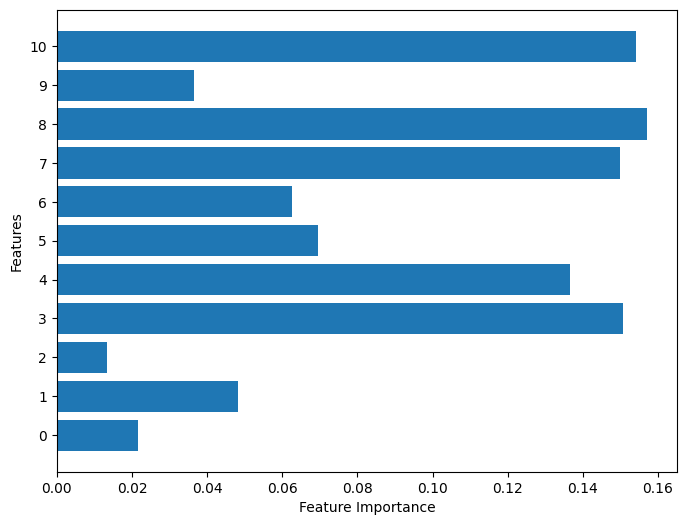

In [6]:

importance = get_feature_importance_extractor().get().cpu()
print(importance)
importance = importance.softmax(dim=0).detach().numpy()
import matplotlib.pyplot as plt
# 可视化特征重要性
plt.figure(figsize=(8, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(importance)))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()